# Notations and Data

## Notations

Several notations:

- $\mathbf{v'}$ and $\mathbf{M'}$ denote the transposes of $\mathbf{v}$ and $\mathbf{M}$, where $\mathbf{M}=[m]_{i,j}$, where $i$ and $j$ are row and column indices.
- Dependent variables: $\mathbf{y}=y_i$
- Features: $\mathbf{X}_i=(x_{i,1},...,x_{i,K})$, with dimenstion $I\times K$. This means there are $I$ observatinons and each of them has $K$ attributes.
- Discrete returns: $r_{t,n}=p_{t,n}/p_{t-1,n}-1$ where $t$ is time index and $n$ is asset index
- Time series notations: $x_{t,n}^{(k)}$ is the time-$t$ value of the $k^{th}$ attribute of asset $n$
- $\mathbf{x}_{t,n}$ is a vector of all attributes for time-$t$ and asset $n$
- $\mathbf{r}_t, \mathbf{r}_n$ and $r_{t,f}$ (riskless asset)
- $\mathbf{I}_N$ denotes the $(N \times N)$ identity matrix
- $\mathbb{E}[\cdot]$ and $\mathbb{E}_t[\cdot]$ are expectation and conditional expectation operators
- Filtration $\mathcal{F}_t$ is all information available at time $t$
- $\mathbb{V}[\cdot]$ is the variance operator
- Both $P$ and $\mathbb{P}$ are probabilities, while $f$ and $F$ are p.d.f. and c.d.f. respectively
- $X\stackrel{d}{=}Y$ (equality in distribution) means $F_X(z)=F_Y(z)$ for all $z$
- Stationarity: a random process $X_t$ satisfies $X_t \stackrel{d}{=} X_s$
- $x \propto y$ means $x$ is proportional to $y$
- $1_{\{x\}}=1$ when $x$ is true else 0
- $\phi(\cdot)$ and $\Phi(\cdot)$ are standard Gaussian pdf and cdf.
- $card(\cdot)=\#(\cdot)$ are cardinal function which evaluates the number of elements in a given set
- $\lfloor x \rfloor$ is the integer part function
- $[x]^{+}=\max(0,x)$
- $\tanh(x)=\dfrac{e^x-e^{-x}}{e^x+e^{-x}}$
- $ReLu(x)=\max(0,x)$
- $s(x)$ is the softmax function where $s(\mathbf{x})_i=\dfrac{e^{x_i}}{\sum_j e^{x_j}}$

## Dataset
The original repository can be accessed [here](https://github.com/shokru/mlfactor.github.io/tree/master/material), while the .xlsx version of data set can be accessed [here](https://drive.google.com/file/d/17wm7QOqy90s7Jy-v1ZEO-iOkZn4mdXP7/view?usp=sharing). This dataset comprises information on 1,207 stocks listed in the US (possibly originating from Canada or Mexico). The time range starts in November 1998 and ends in March 2019. For each point in time, 93 characteristics describe the firms in the sample. These attributes cover a wide range of topics including:

- **valuation** (earning yields, accounting ratios)
- **profitability** and quality (ROE, etc.)
- **momentum** and technical analysis (past returns, RSI, ...)
- **risk** (volatilities)
- **estimates** (EPS)
- **volume and liquidity** (share turnover)

In [51]:
import pandas as pd
import pyreadr
# data = pd.read_excel("./data/data_ml.xlsx") # Not Recommended. Too Slow!
result = pyreadr.read_r('./data/data_ml.RData')
data = result['data_ml']

In [52]:
data['date'] = pd.to_datetime(data['date'])
data = data[(data['date'] > "1999-12-31") & (data['date'] < "2019-01-01")].sort_values(by = ["stock_id", "date"]).reset_index().drop(columns = "index")
data.head()

stock_id       date  Advt_12M_Usd  Advt_3M_Usd  Advt_6M_Usd  \
0         1 2000-01-31          0.41         0.39         0.42   
1         1 2000-02-29          0.41         0.39         0.40   
2         1 2000-03-31          0.40         0.37         0.37   
3         1 2000-04-30          0.39         0.36         0.37   
4         1 2000-05-31          0.40         0.42         0.40   

   Asset_Turnover  Bb_Yld    Bv  Capex_Ps_Cf  Capex_Sales  ...  Total_Capital  \
0            0.19    0.65  0.63          0.5          0.9  ...           0.74   
1            0.19    0.81  0.63          0.5          0.9  ...           0.74   
2            0.20    0.68  0.65          0.5          0.9  ...           0.76   
3            0.20    0.38  0.65          0.5          0.9  ...           0.76   
4            0.20    0.60  0.65          0.5          0.9  ...           0.76   

   Total_Debt  Total_Debt_Capital  Total_Liabilities_Total_Assets  Vol1Y_Usd  \
0        0.82                0.88                            0.74       0.77   
1        0.82                0.88                            0.74       0.73   
2        0.83                0.87                            0.75       0.67   
3        0.83                0.87                            0.75       0.63   
4        0.83                0.87                            0.75       0.54   

   Vol3Y_Usd  R1M_Usd  R3M_Usd  R6M_Usd  R12M_Usd  
0       0.68   -0.036    0.196    0.255     1.044  
1       0.67    0.263    0.797    0.669     1.192  
2       0.66    0.031    0.275    0.419     0.495  
3       0.65    0.448    0.042    0.267     0.853  
4       0.67   -0.097   -0.071    0.027     0.413  

[5 rows x 99 columns]

The data has 99 columns and 268336 rows. The first two columns indicate the stock identifier and the date. The next 93 columns are the features. The last four columns are the labels. The points are sampled at the monthly frequency.

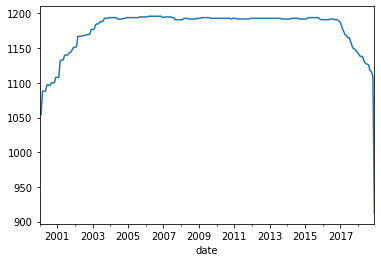

In [37]:
import matplotlib.pyplot as plt
data.groupby('date')['stock_id'].count().plot()
# data.groupby('date')['stock_id'].count().plot.bar()
# plt.xticks(list(range(2000, 2019)))
plt.show()

There are four immediate labels in the dataset: R1M_Usd, R3M_Usd, R6M_Usd and R12M_Usd, which correspond to the 1-month, 3-month, 6-month and 12-month future/forward returns of the stocks. The returns are total returns, that is, they incorporate potential dividend payments over the considered periods. This is a better proxy of financial gain compared to price returns only. We refer to the analysis of Hartzmark and Solomon (2019) for a study on the impact of decoupling price returns and dividends. These labels are located in the last 4 columns of the dataset. We provide their descriptive statistics below.

In [39]:
data[['R12M_Usd', 'R1M_Usd', 'R3M_Usd', 'R6M_Usd']].describe().T

count      mean       std    min    25%    50%    75%      max
R12M_Usd  268336.0  0.136865  0.737872 -0.991 -0.090  0.080  0.285   95.972
R1M_Usd   268336.0  0.012732  0.176431 -0.922 -0.042  0.011  0.064   30.176
R3M_Usd   268336.0  0.036901  0.328289 -0.929 -0.063  0.030  0.123   39.389
R6M_Usd   268336.0  0.072339  0.527420 -0.980 -0.079  0.050  0.186  106.929

We keep some shorter lists of predictors.

In [41]:
features = data.columns[2:]
features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]

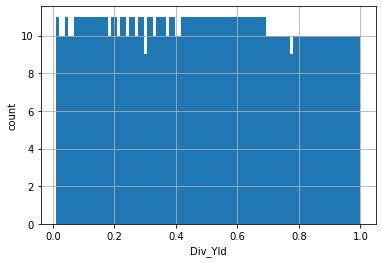

In [45]:
data[data['date'] == "2000-02-29"]["Div_Yld"].hist(bins = 100)
plt.ylabel('count')
plt.xlabel('Div_Yld')
plt.show()

The original labels (future returns) are numerical and will be used for regression exercises, that is, when the objective is to predict a scalar real number. Sometimes, the exercises can be different and the purpose may be to forecast categories (also called classes), like “buy”, “hold” or “sell”. In order to be able to perform this type of classification analysis, we create additional labels that are categorical.

In [68]:
sub_data = data[['date', 'R1M_Usd', 'R12M_Usd']]
data_median = sub_data.groupby('date').median()
data_median.columns = ['R1M_Usd_M', 'R12M_Usd_M']
data_ml = pd.merge(data, data_median, how = "left", on = "date")
data_ml['R1M_Usd_C'] = 1 * (data_ml['R1M_Usd'] > data_ml['R1M_Usd_M'])
data_ml['R12M_Usd_C'] = 1 * (data_ml['R12M_Usd'] > data_ml['R12M_Usd_M'])
data_ml

stock_id       date  Advt_12M_Usd  Advt_3M_Usd  Advt_6M_Usd  \
0              1 2000-01-31          0.41         0.39         0.42   
1              1 2000-02-29          0.41         0.39         0.40   
2              1 2000-03-31          0.40         0.37         0.37   
3              1 2000-04-30          0.39         0.36         0.37   
4              1 2000-05-31          0.40         0.42         0.40   
...          ...        ...           ...          ...          ...   
268331      1212 2018-08-31          0.85         0.84         0.85   
268332      1212 2018-09-30          0.85         0.84         0.85   
268333      1212 2018-10-31          0.86         0.87         0.86   
268334      1212 2018-11-30          0.86         0.88         0.86   
268335      1212 2018-12-31          0.86         0.87         0.86   

        Asset_Turnover  Bb_Yld    Bv  Capex_Ps_Cf  Capex_Sales  ...  \
0                 0.19    0.65  0.63          0.5         0.90  ...   
1                 0.19    0.81  0.63          0.5         0.90  ...   
2                 0.20    0.68  0.65          0.5         0.90  ...   
3                 0.20    0.38  0.65          0.5         0.90  ...   
4                 0.20    0.60  0.65          0.5         0.90  ...   
...                ...     ...   ...          ...          ...  ...   
268331            0.43    0.93  0.66          1.0         0.93  ...   
268332            0.41    0.87  0.66          1.0         0.94  ...   
268333            0.41    0.91  0.66          1.0         0.94  ...   
268334            0.41    0.91  0.66          1.0         0.94  ...   
268335            0.40    0.94  0.67          1.0         0.94  ...   

        Vol1Y_Usd  Vol3Y_Usd  R1M_Usd  R3M_Usd  R6M_Usd  R12M_Usd  R1M_Usd_M  \
0            0.77       0.68   -0.036    0.196    0.255     1.044     -0.032   
1            0.73       0.67    0.263    0.797    0.669     1.192      0.060   
2            0.67       0.66    0.031    0.275    0.419     0.495      0.021   
3            0.63       0.65    0.448    0.042    0.267     0.853     -0.006   
4            0.54       0.67   -0.097   -0.071    0.027     0.413     -0.003   
...           ...        ...      ...      ...      ...       ...        ...   
268331       0.69       0.85    0.044   -0.252   -0.144     0.000     -0.011   
268332       0.70       0.84   -0.266   -0.373    0.000     0.000     -0.079   
268333       0.87       0.87    0.013    0.043    0.000     0.000      0.036   
268334       0.88       0.87   -0.125    0.157    0.000     0.000     -0.105   
268335       0.88       0.87    0.222    0.000    0.000     0.000      0.100   

        R12M_Usd_M  R1M_Usd_C  R12M_Usd_C  
0           0.1440          0           1  
1           0.1900          1           1  
2           0.0790          1           1  
3           0.1315          1           1  
4           0.1750          0           1  
...            ...        ...         ...  
268331      0.0000          1           0  
268332      0.0000          0           0  
268333      0.0000          0           0  
268334      0.0000          0           0  
268335      0.0000          1           0  

[268336 rows x 103 columns]

The new labels are binary: they are equal to 1 (true) if the original return is above that of the median return over the considered period and to 0 (false) if not. Hence, at each point in time, half of the sample has a label equal to zero and the other half to one: some stocks overperform and others underperform.

In machine learning, models are estimated on one portion of data (**training set**) and then tested on another portion of the data (**testing set**) to assess their quality. We split our sample accordingly.

In [70]:
separation_date = pd.to_datetime('2014-01-15')
training_sample = data_ml[data_ml['date'] < separation_date]
testing_sample = data_ml[data_ml['date'] >= separation_date]

We also keep in memory a few key variables, like the list of asset identifiers and a rectangular version of returns. For simplicity, in the computation of the latter, we shrink the investment universe to keep only the stocks for which we have the maximum number of points.

In [77]:
stock_days = data_ml[['date', 'stock_id']].groupby('stock_id').count()
stock_ids = stock_days[stock_days['date'] == max(stock_days['date'])].index
returns = data_ml[data_ml['stock_id'].isin(stock_ids)]
returns.pivot(index = "date", columns = "stock_id", values = "R1M_Usd")

stock_id     1      3      4      7      9      11     12     16     17    \
date                                                                        
2000-01-31 -0.036  0.077 -0.016 -0.009  0.032  0.144 -0.110 -0.191 -0.103   
2000-02-29  0.263 -0.024  0.000  0.027  0.076  0.258  0.110  0.197 -0.053   
2000-03-31  0.031  0.018  0.153  0.000 -0.025  0.049  0.134 -0.030  0.074   
2000-04-30  0.448  0.027 -0.011 -0.017 -0.022  0.014  0.022  0.161  0.051   
2000-05-31 -0.097  0.050  0.014  0.018 -0.121 -0.116 -0.038 -0.020  0.038   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2018-08-31 -0.002 -0.049  0.036 -0.068 -0.028  0.146  0.040  0.016  0.297   
2018-09-30 -0.155 -0.070 -0.025 -0.052 -0.098 -0.291 -0.044 -0.050 -0.150   
2018-10-31  0.014  0.036  0.000  0.007 -0.018 -0.100  0.074  0.094 -0.081   
2018-11-30 -0.110 -0.070 -0.088 -0.066 -0.099 -0.251 -0.105 -0.059 -0.171   
2018-12-31  0.082  0.030  0.043  0.131  0.112  0.158  0.067  0.039  0.402   

stock_id     18    ...   1199   1200   1201   1202   1203   1204   1208  \
date               ...                                                    
2000-01-31  0.098  ... -0.509  0.039 -0.011 -0.019  0.168  0.080 -0.372   
2000-02-29 -0.001  ... -0.147  0.017 -0.148  0.118  0.177  0.161  0.143   
2000-03-31 -0.002  ...  0.083  0.006 -0.025 -0.009  0.237 -0.008  0.057   
2000-04-30 -0.037  ... -0.192  0.003 -0.061  0.053 -0.097 -0.114  0.070   
2000-05-31 -0.131  ... -0.279  0.014  0.118  0.089 -0.023 -0.089 -0.137   
...           ...  ...    ...    ...    ...    ...    ...    ...    ...   
2018-08-31  0.025  ... -0.006 -0.005 -0.048 -0.010  0.037  0.005  0.126   
2018-09-30 -0.135  ... -0.064 -0.013 -0.070 -0.024 -0.030 -0.161 -0.119   
2018-10-31  0.074  ... -0.075  0.068  0.051  0.078 -0.005  0.107  0.205   
2018-11-30 -0.215  ... -0.066 -0.054 -0.197 -0.149 -0.079 -0.050 -0.189   
2018-12-31  0.247  ... -0.005  0.071  0.184  0.095  0.061  0.147  0.227   

stock_id     1209   1210   1212  
date                             
2000-01-31 -0.560 -0.006 -0.186  
2000-02-29 -0.102 -0.057  0.104  
2000-03-31  0.144  0.085 -0.143  
2000-04-30 -0.103  0.073  0.204  
2000-05-31  0.113  0.016  0.042  
...           ...    ...    ...  
2018-08-31 -0.009 -0.011  0.044  
2018-09-30  0.000  0.028 -0.266  
2018-10-31  0.076  0.063  0.013  
2018-11-30 -0.147 -0.064 -0.125  
2018-12-31  0.092  0.108  0.222  

[228 rows x 793 columns]

# Introduction

## Context

Blossoming of machine learning:

- Data size sufficiently large
- Computational Power
- Economic Framing: non-linearity in asset pricing, etc.

## Portfolio Construction: the Workflow

The baseline equation in supervised learning $$\mathbf{y}=f(\mathbf{X})+\varepsilon$$ is translated in financial terms as $$\mathbf{r}_{t+1,n}=f(\mathbf{x}_{t,n})+\varepsilon_{t+1,n}$$ 
where $f(\mathbf{x}_{t,n})$ can be viewed as the **expected return** for time $t+1$ computed at time $t$, i.e. $\mathbb{E}_t[r_{t+1,n}]$. Note that the model is common to all assets ($f$ is not indexed by $n$), thus it shares similarity with panel approaches.

How to make accurate predictions?

- Gather better data, include some classical predictors
- The choice and engineering of inputs are important
- An integrated process

![FIGURE 2.1 Simplified workflow in ML-based portfolio construction](images/figure2-1.png)

## Machine Learning is No Magic Wand

In fact, heuristic guesses are often hard to beat. Below, we sum up some key points that we have learned through our exploratory journey in financial ML:

- **Causality** is key. If one is able to identify $X \rightarrow y$, where $y$ are expected returns, then the problem is solved. Unfortunately, causality is incredibly hard to uncover.
- Thus, researchers have most of the time to make do with simple **correlation** patterns, which are far less informative and robust.
- Relatedly, financial datasets are extremely **noisy**. It is a daunting task to extract signals out of them. No-arbitrage reasonings imply that if a simple pattern yielded durable profits, it would mechanically and rapidly vanish.
- **Data is key**. The inputs given to the models are probably much more important than the choice of the model itself.
- **Persistent** series are more likely to unveil enduring patterns.
- What matters is to learn from those lapses.

Gathering and cleaning data, coding backtests, tuning ML models, testing weighting schemes, debugging, starting all over again: these are all absolutely indispensable steps and tasks that must be repeated indefinitely. There is no sustitute to experience.

Finally, this chapter emphasizes two key points:

- **Data is key.** Better data often saves your effort for tuning models. The choice of models is probably not as important as "inputs".
- **Practice makes perfect.** TRY MORE CASES!

# Factor Investing and Asset Pricing Anomalies

## Introduction

The core aim of factor models is to understand the **drivers of asset prices**. The first essential question is which characteristics really provide independent information about average returns?

Theoretically, linear factor models can be viewed as special cases of the arbitrage pricing theory (APT) of Ross (1976), which assumes that the return of an asset $n$ can be modelled as a linear combination of underlying factors $f_k$: $$r_{t,n}=\alpha_n+\sum_{k=1}^K \beta_{n,k}f_{t,k}+\varepsilon_{t,n}$$
Usual constraints: $\mathbb{E}[\varepsilon_{t,n}]=0$, $Cov(\varepsilon_{t,n}, \varepsilon_{t,m})=0$ for $n neq m$ and $Cov(\mathbf{f}_n,\mathbf{\varepsilon}_n)=0$.

If such factors do exist, they are in contradiction with CAPM, and that's why they are called "anomalies". They are further confirmed by Fama and French (1992 and 1993).

## Detecting Anomalies

### Challenges

Researches sometimes cannot be replicated. P-hacking cannot account for all these. Publication can result in fading "anomalies": herding and alpha decay.

### Simple Portfolio Sorting

On one date, 

- Ranking firms according to a particular criterion
- Form $J \geq 2$ portfolios consisting of the same number of stocks
- Equal weighting or proportional to market capitalization
- Report the returns of the portfolios and iterate the process

Outcome $r_t^j$ time series for each grouping $j$. However, this sorting can have **a non-monotonic impact on returns**, thus a test based on two extreme portfolios can be biased. There are other procedures such as covariance structure and multiple criterions.

In the code below, we compute size portfolios (equally weighted: above versus below the median capitalization). According to the size anomaly, the firms with below median market cap should earn higher returns on average. This is verified whenever the orange bar in the plot is above the blue one (it happens most of the time).

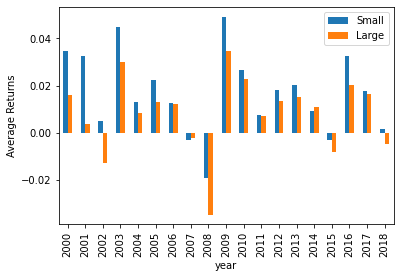

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
data_ml = pd.read_pickle("data/data_ml.pkl")

sub_data = data_ml[['date', 'Mkt_Cap_12M_Usd']]
data_median = sub_data.groupby('date').median()
data_median.columns = ['Mkt_Cap_12M_Usd_M']
data_ml = pd.merge(data_ml, data_median, how = "left", on = "date")
data_ml['large'] = 1 * (data_ml['Mkt_Cap_12M_Usd'] > data_ml['Mkt_Cap_12M_Usd_M'])

data_ml['date'] = pd.to_datetime(data_ml['date'])
data_ml['year'] = data_ml['date'].apply(lambda x: x.year)
avg_return = data_ml.groupby(['year', 'large']).agg({'R1M_Usd': 'mean'}).unstack()
avg_return.columns = ['Small', 'Large']


avg_return.plot.bar()
plt.ylabel('Average Returns')
plt.xlabel('year')
plt.show()

## Factors
Some most common factors:

- Size (**SMB** = small firms minus large firms)
- Value (**HM** = high minus low; undervalued minus 'growth' firms)
- Momentum (**WML** = winners minus losers): winners are the assets that have experienced the highest returns over the last year
- Profitability (**RMW** = robust minus weak profits)
- Investment (**CMA** = conservative minus aggresive): measured via relative growth of total assets
- Low 'risk' (sometimes, **BAB** = betting against beta)

With the notable exception of the low risk premium, the most mainstream anomalies are kept and updated in the data library of Kenneth French (https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html). Of course, the computation of the factors follows a particular set of rules, but they are generally accepted in the academic sphere. Another source of data is the AQR repository: https://www.aqr.com/Insights/Datasets.

Below, we import data from Ken French’s data library. We will use it later on in the chapter.

In [14]:
import urllib.request
import shutil

min_date = '1963-07-31'
max_date = '2020-03-28'
ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_5_Factors_2x3_CSV.zip"
urllib.request.urlretrieve(ff_url, 'data/factors/factors.zip')

shutil.unpack_archive('data/factors/factors.zip')

In [30]:
df_ff = pd.read_csv('data/factors/F-F_Research_Data_5_Factors_2x3.csv', skiprows = 3, sep = ',', quotechar = '"')
df_ff.rename(columns = {"Unnamed: 0": "date", "Mkt-RF": "MKT_RF"}, inplace = True)
df_ff = df_ff[:714] # Remove year-frequency data

# Deal with dates
df_ff['date'] = pd.to_datetime(df_ff['date'], format = "%Y%m")
df_ff['date'] = df_ff['date'].apply(lambda x: x + pd.DateOffset(months = 1) + pd.DateOffset(days = -1))

df_ff[['MKT_RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']] = df_ff[['MKT_RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']].astype('float64') / 100.0 # Scale returns
FF_factors = df_ff[(df_ff['date'] >= min_date) & (df_ff['date'] <= max_date)]
FF_factors.head()

date  MKT_RF     SMB     HML     RMW     CMA      RF
0 1963-07-31 -0.0039 -0.0041 -0.0097  0.0068 -0.0118  0.0027
1 1963-08-31  0.0507 -0.0080  0.0180  0.0036 -0.0035  0.0025
2 1963-09-30 -0.0157 -0.0052  0.0013 -0.0071  0.0029  0.0027
3 1963-10-31  0.0253 -0.0139 -0.0010  0.0280 -0.0201  0.0029
4 1963-11-30 -0.0085 -0.0088  0.0175 -0.0051  0.0224  0.0027

While these factors (i.e., long-short portfolios) exhibit time-varying risk premia and are magnified by corporate news and announcements (Engelberg, McLean, and Pontiff (2018)), it is well-documented (and accepted) that they deliver positive returns over long horizons.

With the following code, we plot the average monthly return aggregated over each calendar year for five common factors. The risk free rate (which is not a factor per se) is the most stable, while the market factor (aggregate market returns minus the risk-free rate) is the most volatile. This makes sense because it is the only long equity factor among the five series.

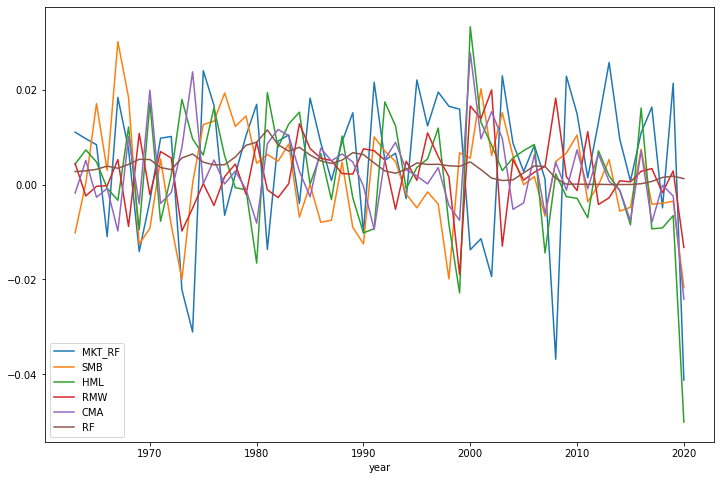

In [43]:
FF_factors['year'] = FF_factors['date'].apply(lambda x: x.year)
FF_factors.groupby('year').mean().plot(figsize = (12, 8))
plt.show()

Finally, we highlight the need of replicability of factor premia and echo the recent editorial by Harvey (2020). As is shown by Linnainmaa and Roberts (2018) and Hou, Xue, and Zhang (2020), many proclaimed factors are in fact very much data-dependent and often fail to deliver sustained profitability when the investment universe is altered or when the definition of variable changes (Clifford Asness and Frazzini (2013)).

A bayesian approach: Fama-Macbeth regression to distinguish between pervasive and superfluous factors.

Publication bias: propensity of journals to publish positive results, leading to a gap between reported returns and true returns. Estimated at roughly 12% (relatively).

### Predictive Regressions, Sorts and P-value Issues

For simplicity, we assume a simple form:
$$\mathbf{r}=a+b\mathbf{x}+\mathbf{e}$$
where the vector $\mathbf{r}$ stacks all returns of all stocks and $\mathbf{x}$ is a lagged variable so that the regression is indeed predictive. If the estimated $\hat{b}$ is significant given a specified threshold, then it can be tempting to conclude that $\mathbf{x}$ does a good job at predicting returns. Hence, long-short portfolios related to extreme values of $\mathbf{x}$ (mind the sign of $\hat{b}$) are expected to generate profits. This is unfortunately **often false** because $\hat{b}$ gives information on the past ability of $\mathbf{x}$ to forecast returns. **What happens in the future may be another story.**

Statistical tests: assuming two extreme portfolio with returns $r_t^+$ and $r_t^-$. The simplest test is $$t=\sqrt{T}\frac{m_{r_+}-m_{r_-}}{\sigma_{r_+-r_-}}$$ where $T$ is number of points, $m_{r_{\pm}}$ is mean of returns and $\sigma_{r_+-r_-}$ is s.t.d. of difference between two series.

Actually, $p$-value is **the likelyhood of your data sample given the distribution (anomaly)**, not the probability of one hypothesis given the data. Harvey introduces **Bayesianized $p$-values**:
$$\text{Bayesianized } p-\text{value}=e^{-t^2/2}\times \frac{prior}{1+e^{-t^2/2}\times prior}$$
where $t$ is the $t$-statistic obtained from the regression. The prior odds are $p/(1-p)$ suppose there is a $p\%$ chance that the null holds (i.e. $(1-p)\%$ for anomaly).

### Fama-Macbeth Regressions

A two-stage regression analysis of risk premia proposed by Fama and MacBeth (1973).

The first stage is a simple estimation of the relationship: run on a stock-by-stock basis over the corresponding time series as following: $$r_{t,n}=\alpha_n+\sum_{k=1}^K \beta_{n,k}f_{t,k}+\varepsilon_{t,n}$$
The resulting estimates $\hat{\beta}_{i,k}$ are then plugged into a second series of regressions: $$r_{t,n}=\gamma_{t,0}+\sum_{k=1}^K \gamma_{t,k}\hat{\beta}_{n,k}+\varepsilon_{t,n}$$ which are run date-by-date on cross-section of assets. The $\hat{\gamma}_{t,k}$ estimate the premia of factor $k$ at time $t$. Under suitable distributional assumptions on $\varepsilon_{t,n}$, statistical tests can be performed to test whether premia are significant. Typically, the statistic on the time-aggregated premia is $$t_k=\frac{\hat{\gamma}_k}{\hat{\sigma}_k /\sqrt{T}}$$ where $$\hat{\gamma}_k=\frac{1}{T}\sum_{t=1}^T \hat{\gamma}_{t,k}$$

There are some extensions to Fama-MacBeth regressions to attenuate "errors in variables" problems. See Jegadeesh et al. (2019) for some solutions.

The following is a Python implementation of Fama-Macbeth regressions.

In [55]:
num_factors = 5
stock_days = data_ml[['date', 'stock_id']].groupby('stock_id').count()
stock_ids = stock_days[stock_days['date'] == max(stock_days['date'])].index
returns = data_ml[data_ml['stock_id'].isin(stock_ids)][['date', 'stock_id', 'R1M_Usd']]

data_FM = pd.merge(returns, FF_factors, on = "date")
data_FM.head()

date  stock_id  R1M_Usd  MKT_RF     SMB     HML     RMW     CMA  \
0 2000-01-31         1   -0.036 -0.0474  0.0444 -0.0191 -0.0631  0.0475   
1 2000-01-31         3    0.077 -0.0474  0.0444 -0.0191 -0.0631  0.0475   
2 2000-01-31         4   -0.016 -0.0474  0.0444 -0.0191 -0.0631  0.0475   
3 2000-01-31         7   -0.009 -0.0474  0.0444 -0.0191 -0.0631  0.0475   
4 2000-01-31         9    0.032 -0.0474  0.0444 -0.0191 -0.0631  0.0475   

       RF  year  
0  0.0041  2000  
1  0.0041  2000  
2  0.0041  2000  
3  0.0041  2000  
4  0.0041  2000

In [70]:
import statsmodels.api as sm
X_variables = ['MKT_RF', 'SMB', 'HML', 'RMW', 'CMA']

def Fama_MacBeth_stage1(x: pd.DataFrame):
    y = x.copy(deep = True)
    y['R1M_Usd'] = y['R1M_Usd'].shift(1)
    y.dropna(inplace = True)
    endog = y['R1M_Usd']
    exog = y[X_variables]
    model_stage1 = sm.OLS(endog, sm.add_constant(exog)).fit()
    return model_stage1.params

# Fama_MacBeth_stage1(data_FM[data_FM['stock_id'] == 3])
betas = data_FM.groupby('stock_id').apply(Fama_MacBeth_stage1)
betas.head()

const    MKT_RF       SMB       HML       RMW       CMA
stock_id                                                            
1         0.008011  1.417200  0.528951  0.620952  0.979540 -0.379071
3        -0.002251  0.812142  1.108354  0.882340  0.300406 -0.552021
4         0.004494  0.362911  0.306251 -0.050326  0.595399  0.200277
7         0.005365  0.431449  0.674876  0.230341  0.322097  0.177394
9         0.003770  0.838136  0.677509  1.057259  0.077636  0.062131

In the table, MKT_RF is the market return minus the risk free rate. The corresponding coefficient is often referred to as the beta, especially in univariate regressions. Each line corresponds to one asset: the first 5 columns are the estimated factor loadings and the remaining ones are the asset returns (date by date).

In [74]:
ret = pd.merge(returns, betas.drop(columns = 'const'), on = 'stock_id')

def Fama_MacBeth_stage2(x: pd.DataFrame):
    endog = x['R1M_Usd']
    exog = x[X_variables]
    model_stage2 = sm.OLS(endog, sm.add_constant(exog)).fit()
    return model_stage2.params

gammas = ret.groupby('date').apply(Fama_MacBeth_stage2)
gammas.head()

const    MKT_RF       SMB       HML       RMW       CMA
date                                                                  
2000-01-31 -0.011366  0.040525  0.223281 -0.142810 -0.275522  0.033576
2000-02-29  0.014318  0.075000 -0.132978  0.051871  0.085275 -0.035886
2000-03-31  0.003675 -0.009564 -0.013232  0.049486  0.039650  0.050104
2000-04-30  0.125274 -0.147080 -0.094734  0.156546  0.075769 -0.020684
2000-05-31  0.052271 -0.010766  0.073698 -0.095570 -0.095317 -0.056322

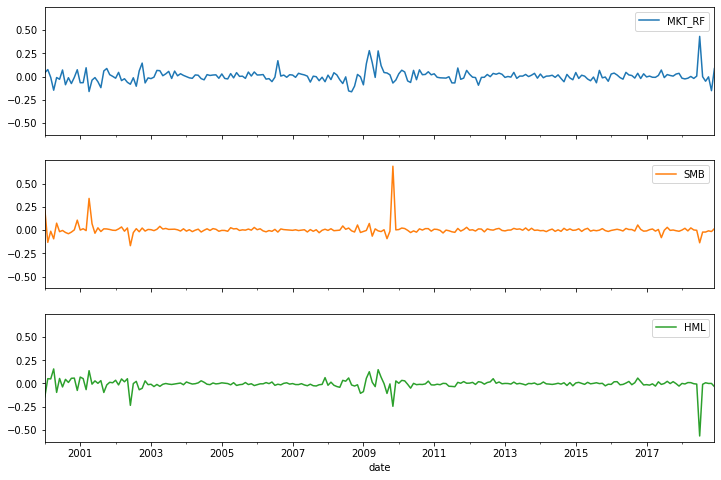

In [75]:
gammas.iloc[:, 1:4].plot(figsize = (12, 8), subplots = True, sharey = True, sharex = True)
plt.show()

The two spikes at the end of the sample signal potential colinearity issues; two factors seem to compensate in an unclear aggregate effect. This underlines the usefulness of penalized estimates.

### Factor Competition

- It's preferable if redundancies within factors are avoided (which implies collinearity).
- A simple protocol to sort out redundant factors is to run regressions of each factor against all others:
$$f_{t,k}=a_k+\sum_{j \neq k}\delta_{k,j}f_{t,j}+\varepsilon_{t,k}$$
- Preferably, $a_k$ should be statistically significant, otherwise this factor is redundant
- Below we replicate the analysis by Fama and French (2015) which shows that HML is redundant when taking into account other 4 factors (Market, SMB, RMW and CMA)

In [118]:
factors = ['MKT_RF', 'SMB', 'HML', 'RMW', 'CMA']
sub_FF_factors = FF_factors[factors]
def factor_redundancy_check(x):
    endog = x
    exog = FF_factors[list(set(factors) - set([x.name]))]
    fit = sm.OLS(endog, sm.add_constant(exog)).fit()
    
    def stars_significance(x):
        if(x < 0.001):
            return "(***)"
        elif(x < 0.01):
            return "(**)"
        elif(x < 0.05):
            return "(*)"
        return ""
    pvalues = fit.pvalues.apply(stars_significance)
    params = round(fit.params, 3).astype("str") + pvalues
    return params

params = sub_FF_factors.apply(factor_redundancy_check).T
display(params)

CMA         HML       MKT_RF          RMW          SMB  \
MKT_RF  -0.945(***)        0.12          NaN  -0.363(***)   0.257(***)   
SMB          -0.139       0.083   0.131(***)  -0.435(***)          NaN   
HML      1.027(***)         NaN        0.032   0.169(***)        0.044   
RMW     -0.319(***)  0.165(***)  -0.096(***)          NaN  -0.225(***)   
CMA             NaN   0.45(***)  -0.112(***)  -0.144(***)       -0.032   

             const  
MKT_RF  0.008(***)  
SMB       0.003(*)  
HML         -0.001  
RMW     0.004(***)  
CMA     0.002(***)

We confirm that the HML factor remains redundant when the four others are present in the asset pricing model. The figures we obtain are very close to the ones in the original paper (Fama and French (2015)), which makes sense, since we only add 5 years to their initial sample.

Sometimes, a 3-factor model may outperform a 5-factor one. See De Moor et al. (2015) that introduces a novel computation for p-values that compare the relative likelihood that two models pass a zero-alpha test. Recent researches suggests at least 15 factors.

### Advanced Techniques

The ever increasing number of factors combined to their importance in asset management has led researchers to craft more subtle methods in order to organize’’ the so-called factor zoo and, more importantly, to detect spurious anomalies and compare different asset pricing model specifications.

- Feng et al. (2020) combine LASSO selection with Fama-MacBeth regressions to test if new factor models are worth it. They quantify the gain of adding one new factor to a set of predefined factors and show that **many factors reported in papers published in the 2010 decade do not add much incremental value.**
- C. Harvey and Liu (2019): bootstrap on orthogonalized factors
- Fama and French (2018): compare asset pricing models through squared maximum Sharpe ratios
- Giglio and Xiu (2019): estimate factor risk premia using a three-pass method based on PCA
- Pukthuanthong, Roll, and Subrahmanyam (2018): disentangle priced and non-priced factors via a combination of PCA and Fama-MacBeth (1973) regressions.
- Gospodinov, Kan, and Robotti (2019): warn against factor misspecification (when spurious factors are included in the list of regressors). Traded factors (resp. macro-economic factors) seem more likely (resp. less likely) to yield robust identifications (see also Bryzgalova (2019)).

## Factors or Characteristics?

There are always debate over **whether firm returns are indeed explained by exposure to macro-economic factors** or simply by the characteristics of firms. Daniel and Titman (1997) provide evidence in favour of the former. They show that firms with high book-to-market ratios or small capitalizations display higher average returns, even if they are negatively loaded on the HML or SMB factors. Therefore, **it seems that it is indeed the intrinsic characteristics that matter, and not the factor exposure.**

See Page 28 of the original book for more reference papers.

## Hot Topics: Momentum, Timing and ESG

### Factor Momentum

A recent body of literature unveils a time series momentum property of factor returns. Gupta and Kelly (2019) report that autocorrelation patterns within these returns is statistically significant.

We may compute the ACF of factors with previous data. Recall that
$$ACF_k(\mathbf{x}_t)=\mathbb{E}[(\mathbf{x}_t-\bar{\mathbf{x}})(\mathbf{x}_{t+k}-\bar{\mathbf{x}})]$$

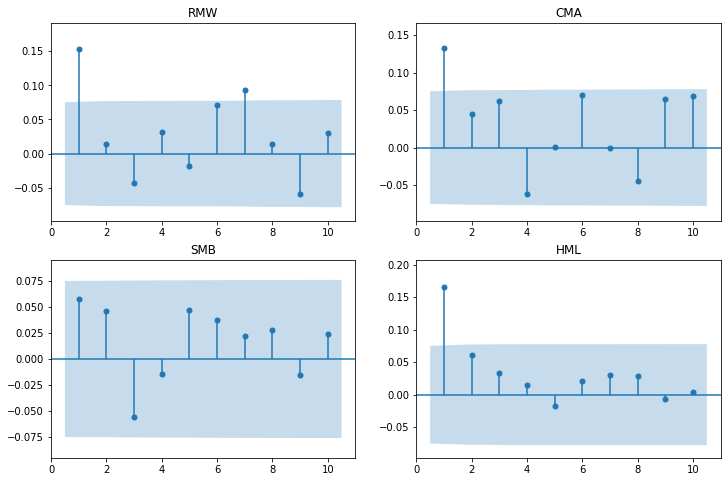

In [124]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplots(figsize = (12, 8))
ax = plt.subplot(221)
sm.graphics.tsa.plot_acf(FF_factors['RMW'], lags = np.arange(1, 11), title = 'RMW', ax = ax, auto_ylims = True)
ax = plt.subplot(222)
sm.graphics.tsa.plot_acf(FF_factors['CMA'], lags = np.arange(1, 11), title = 'CMA', ax = ax, auto_ylims = True)
ax = plt.subplot(223)
sm.graphics.tsa.plot_acf(FF_factors['SMB'], lags = np.arange(1, 11), title = 'SMB', ax = ax, auto_ylims = True)
ax = plt.subplot(224)
sm.graphics.tsa.plot_acf(FF_factors['HML'], lags = np.arange(1, 11), title = 'HML', ax = ax, auto_ylims = True)
plt.show()

Of the four chosen series, only the size factor (HML) is not significantly autocorrelated at the first order.

### Factor Timing

There is no consensus on predicting when factor will perform well or badly. **In ML-based factor investing, it is possible to resort to more granularity by combining firm-specific attributes to large-scale economic data.**

### Green Factors

Researches about whether or not characteristics related to ESG criteria (environment, social, governance) are priced. This topic is complex. However, **ESG criteria can directly be integrated into ML model**, as is for instance done in de Franco et al. (2020).

## The Links with Machine Learning

Given a large set of predictor variables ($\mathbf{X}$), the goal is to predict a proxy for future performance $y$ through a model. The general formulation is the following. At time $T$, the investor seeks to solve the following problem:
$$\max_{\mathbf{\theta}_T}\mathbb{E}_T[u(r_{p,T+1})]=\max_{\mathbf{\theta}_T}\mathbb{E}_T[u\left((\bar{\mathbf{w}}_T+\mathbf{x}_T\theta_T)'\mathbf{r}_{T+1} \right)]$$
where $u$ is some utility function, and $r_{p,T+1}=(\bar{\mathbf{w}}_T+\mathbf{x}_T\theta_T)'\mathbf{r}_{T+1}$ is the return of the portfolio, which is defined at a benchmark $\bar{\mathbf{w}}_T$ plus some deviations from this benchmark that are a linear function of features $\mathbf{x}_T\theta_T$. The aboce problems may be subject to some external constraints.

In practice, the vector $\theta_T$ must be estimated using past data (from $T-\tau$ to $T-1$). The agent seeks the solution of
$$\max_{\theta_T}\frac{1}{\tau} \sum_{t=T-\tau}^{T-1}u\left(\sum_{i=1}^{N_T} (\bar{w}_{i,t}+\theta_T^{'} \mathbf{x}_{i,t})r_{i,t+1}\right)$$
on a sample of size $\tau$ where $N_T$ is the number of assets. The above formulation can be viewed as **a learning task** in which the **parameters are chosen such that the reward (average return) is maximized**.

### A Short List of Recent References
Some ML approaches:

- Penalized Quadratic Programming
- Regularized Predictive Regressions
- Support Vector Machines (may be old-fashioned)
- Model Comparison and/or Aggregation

### Explicit Connections with Asset Pricing Models

The first and obvious link between factor investing and asset pricing is (average) return prediction. The general equation:
$$r_{t+1,n}=g(\mathbf{x}_{t,n})+\varepsilon_{t+1}$$
- Non-linear Function $g$: no reason (beyond simplicity and interpretability) to restrict the model to linear relationships
- Shift in time index: *prediction needs* instead of explanatory
- May also be interested in other predictors, like Sharpe Ratio
- $g$ can be estimated through some ML-related tools

One mainstream problem: **Stochastic Discount Factor (SDF)** $M_t$ which satisfies $\mathbb{E}_T[M_{t+1}(r_{t+1,n}-r_{t+1,f})]=0$ for any asset $n$. It's an example of the generalized method of moment: $M_t$ must be such that $$\mathbb{E}[M_{t+1}g(V_t)R_{t+1,n}]=0$$ where the instrumental variables $V_t$ are $\mathcal{F}_t$-measureable and the capital $R_{t+1,n}$ denotes the *excess* return of asset $n$. In order to reduce and simplify the estimation problem, it is customary to define the SDF as a portfolio of assets.

A second approach is to try to model asset returns as linear combinations of factors, just as above. We write in compact notation 
$$r_{t,n}=\alpha_n+\beta_{t,n}^{'}\mathbf{f}_t+\varepsilon_{t,n}$$
and we allow loadings $\beta_{t,n}$ to be time-dependent. We can incorporate market size, accounting ratios, past performance, etc. with some *long-short portfolios*. 

Feng et al. (2019) automates the process of factor construction using Deep Learning. **They apply a revised version of softmax function for long-short portfolios and use these portfolios to construct latent factors as an supplement to classical Fama-French factors.** It's a predictive model and could help explain a substantially larger proportfion of the in-sample variance in the returns.

A third approach is that of Kelly et al. (2019) with ideas that factors are **latent** and it is the betas that depend on characteristics. They estimate $\mathbf{f}_t$ and $\beta_{t,n}(\cdot)$ with some linear form.

A fourth approach introduced by Gu et al. (2020a) combines two neural network architectures. A first one takes $\mathbf{x}_{t-1}$ as inputs and generates factor loadings $\beta_{t-1}(\mathbf{x}_{t-1})$. The second one transforms returns $\mathbf{r}_t$ into factor values $\mathbf{f}_t(\mathbf{r}_t)$. The aggreagte model is $$\mathbf{r}_t=\beta_{t-1}(\mathbf{x}_{t-1})^{'}\mathbf{f}_t(\mathbf{r}_t)+\varepsilon_t$$
It's special because *the output is also present in the input*, like autoencoders.

**Conclusion**: The intersection between asset pricing and machine learning offers a rich variety of applications. However, it can be already exhaustive that it's often hard to disentangle noise from publications on these topics. **Practice and implementation is the only way forward to extricate value from hype.**

## Coding Exercises

1. Compute annual returns of the growth versus value portfolios, that is, the average return of firms with above median price-to-book ratio (the variable is called 'Pb' in the dataset)

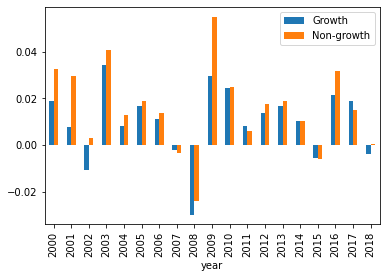

In [152]:
data_ml['Pb_rank'] = data_ml.groupby('year')['Pb'].rank(pct = True)
average_return_growth = data_ml[data_ml['Pb_rank'] >= 0.5].groupby('year')['R1M_Usd'].mean() # R1M OR R12M?
average_return_nongrowth = data_ml[data_ml['Pb_rank'] < 0.5].groupby('year')['R1M_Usd'].mean() # R1M OR R12M?
average_return = pd.DataFrame([average_return_growth, average_return_nongrowth], index = ['Growth', 'Non-growth']).T
average_return.plot.bar()
plt.show()

2. Same exercise, but compute the monthly returns and plot the value (through time) of the corresponding portfolios

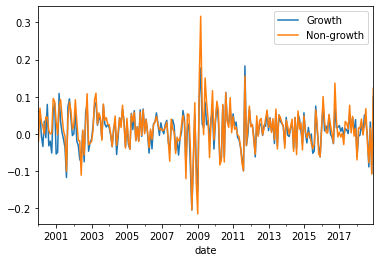

In [158]:
data_ml['Pb_rank'] = data_ml.groupby('date')['Pb'].rank(pct = True)
average_return_growth = data_ml[data_ml['Pb_rank'] >= 0.5].groupby('date')['R1M_Usd'].mean() # R1M OR R12M?
average_return_nongrowth = data_ml[data_ml['Pb_rank'] < 0.5].groupby('date')['R1M_Usd'].mean() # R1M OR R12M?
average_return = pd.DataFrame([average_return_growth, average_return_nongrowth], index = ['Growth', 'Non-growth']).T
average_return.plot()
plt.show()

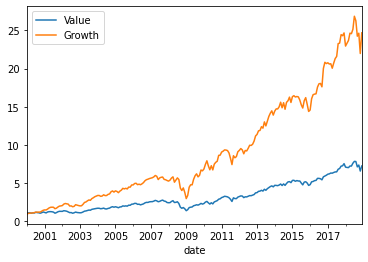

In [160]:
cum_return_growth = (1 + average_return_growth).cumprod()
cum_return_nongrowth = (1 + average_return_nongrowth).cumprod()
cum_return = pd.DataFrame([cum_return_growth, cum_return_nongrowth], index = ['Value', 'Growth']).T
cum_return.plot()
plt.show()

3. Instead of a unique threshold, compute simply sorted portfolios based on quartiles of market capitalization. Compute their annual returns and plot them.

<AxesSubplot:xlabel='year'>

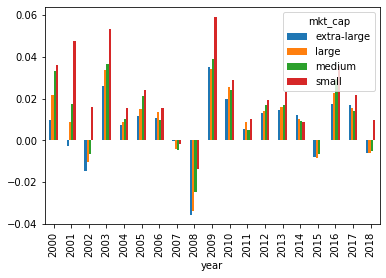

In [167]:
def mkt_cap(x):
    if(x <= 0.25):
        return "small"
    elif(x <= 0.5):
        return "medium"
    elif(x <= 0.75):
        return "large"
    else:
        return "extra-large"

data_ml['mkt_cap'] = data_ml['Mkt_Cap_12M_Usd'].apply(mkt_cap)
annual_group_return = data_ml.groupby(['year', 'mkt_cap'])['R1M_Usd'].mean().unstack()
annual_group_return.plot.bar()

# Data Preprocessing

## Know Your Data

- Make the data trustworthy, reliable provider preferred
- Summary Statistics: Ranges, averages and medians; histograms or time-series plots; correlations and variances
- Minimal verification: a small subset of predictors, check outliers

Below we show a box plot that illustrates the distribution of correlations between features and the one month ahead return. The correlations are computed on a date-by-date basis, over the whole cross-section of stocks. They are mostly located close to zero, but some dates seem to experience extreme shifts. The market capitalization has the median which is the most negative while volatility is the only predictor with positive median correlation (this particular example seems to refute the low risk anomaly).

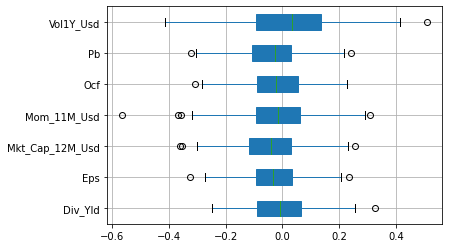

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_ml = pd.read_pickle('./data/data_ml.pkl')
features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]

cor = data_ml[features_short + ['date', 'R1M_Usd']].groupby('date').corr()['R1M_Usd']
cor = cor.unstack().drop(columns = ['R1M_Usd'])
cor.boxplot(patch_artist = True, vert = False)
plt.show()

We also care about **conditional average**. Suppose there is only one feature $X$ and we seek a model $Y=f(X)+error$, the function $f$ that minimizes the average squared error $\mathbb{E}[(Y-f(X))^2]$ is the so-called regression function $$f(x)=\mathbb{E}[Y|X=x]$$
We plot two illustrations of this function when the dependent variable ($Y$) is the one month ahead return. Both predictors have already been formalized to $[0,1]$.

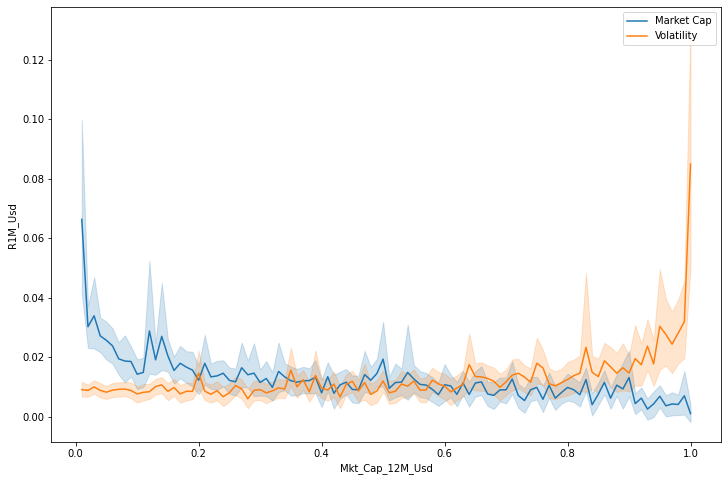

In [23]:
plt.figure(figsize = (12, 8))
sns.lineplot(x = data_ml['Mkt_Cap_12M_Usd'], y = data_ml['R1M_Usd'], label = 'Market Cap')
sns.lineplot(x = data_ml['Vol1Y_Usd'], y = data_ml['R1M_Usd'], label = 'Volatility')
plt.legend()
plt.show()

The two variables have a close to **monotonic impact on future returns**. Returns, on average, decrease with market capitalization (thereby corroborating the so-called size effect). The reverse pattern is less pronounced for volatility: the curve is rather flat for the first half of volatility scores and progressively increases, especially over the last quintile of volatility values (thereby contradicting the low-volatility anomaly).

**Autocorrelation**: high level of autocorrelation makes imputation possible, also important for prediction tasks.

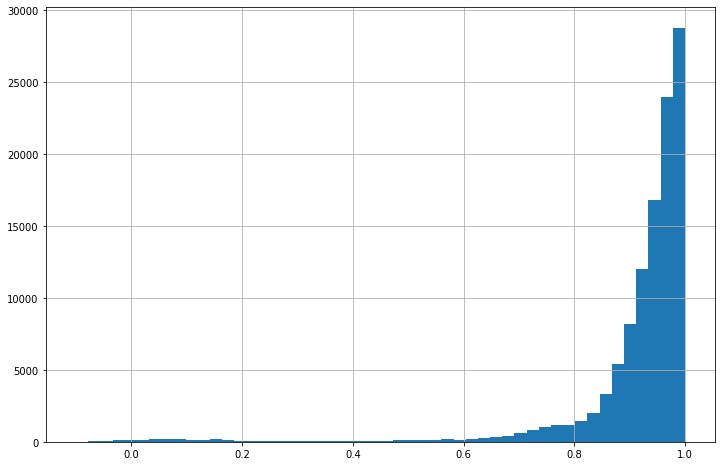

In [38]:
cols = ['stock_id'] + list(data_ml.columns[3:95])
melted_data_ml = pd.melt(data_ml[cols], id_vars = 'stock_id')
data_acf = melted_data_ml.groupby(['stock_id', 'variable']).apply(lambda x: x['value'].autocorr(lag = 1))

plt.figure(figsize=(12, 8))
data_acf.hist(bins = 50, range = [-0.1, 1])
plt.show()

The output shows that predictors are *highly autocorrelated*: most of them have a first order autocorrelation above 0.80.

## Missing Data

Two basic procedures: **removal** and **imputation**.

- Removal: agnostic but costly
- Imputation: multiple choices
  1. Median/Mean over the past available values: can cause trend alternation and forward looking problems
  2. Cross-sectional medians/means: can alter the original distribution
  3. Time-series: replace $x_t$ with $x_{t-1}$, most time make sense but can be a very bad choice in some cases, especially when data are not auto-correlated
  4. Interpolation: never use it on financial data
  5. Non-parametric approaches: advanced

An dividend example: how to fill the missing yield data in June? You may keep previous data, extrapolate from previous observations, or simply set it to 0 (with caution).

## Outlier Detection

- Outside the interval $[\mu-m\sigma, \mu+m\sigma]$, $m$ chosen from ${3,5,10}$
- Largest value is $m$ times to the second-to-largest
- A given small threshold $q$, outside the quantile range $[q,1-q]$

The latter idea was popularized by winsorization, which is
$$
\tilde{x}_i=\begin{cases}
x_i &\text{ if }x_i \in [x^{(q)}, x^{(1-q)}]\\
x^{(q)} &\text{ if }x_i <x^{(q)}\\
x^{(1-q)} &\text{ if }x_i >x^{(1-q)}
\end{cases}
$$
where $x^{(q)}$ is a quantile and $q$ is usually chosen from $(0.5\%,5\%)$, with $1\%$ and $2\%$ being most popular choices. **This must be performed on a feature-by-feature and a date-by-date basis.**

## Feature Engineering

Never do some *garbage in, garbage out* stuff!

### Feature Selection

Filter out unwanted or redundant exogenous variables.

- Correlation Matrix: ensure no absolute value above a threshold (like 0.7)
- Linear Regression: remove non-significant variables
- Clustering Analysis: over a set of features and retain only one within each cluster
- Other Choices: decision tree/random forest for non-linear relationships

### Scaling the Predictors

The choice of normalization may in fact very well matter. Common choices include:

- Standardization: $\tilde{x}_i=(x_i-\mu_x)/\sigma_x$
- Min-max Scaling: $\tilde{x}_i=(x_i-\min(x))/(\max(x)-\min(x))$
- Min-max Scaling (over $[-1,1]$): $\tilde{x}_i=2\dfrac{x_i-\min(x)}{\max(x)-\min(x)}-1$
- Uniformization: $\tilde{x}_i=F_{\mathbf{x}}(x_i)$, where $F_{\mathbf{x}}$ is the empirical c.d.f. of $\mathbf{x}$
- Other transformations: logarithms on positive variables

In factor investing, **the scaling of features must be operated separately for each date and each feature.** It makes sure that for every rebalancing date, **the predictors will have a similar shape** and do carry information on the cross-section of stocks.

**Scaling features across dates should be proscribed.** It completely alter and dilute the cross-sectional content of features.

## Labelling

### Simple Labels

Usual labels in factor investing:

- Raw Asset Returns
- Future Relative Returns
- Probability of a positive return
- Probability of outperforming a benchmark
- The binary version of above: whether or not outperforming
- Risk-adjusted version of above: sharpe ratios, information ratios

### Categorical Labels

Performance proxies: discrete investment decisions. A simple example:
$$
y_{t,i}=\begin{cases}
-1 &\text{ if }\hat{r}_{t,i} <r_{-}\\
0 &\text{ if }\hat{r}_{t,i} \in [r_{-}, r_{+}]\\
+1 &\text{ if }\hat{r}_{t,i} >r_{+}\\
\end{cases}
$$
where $\hat{r}_{t,i}$ is the performance proxy and $r_{\pm}$ are decision thresholds.

Nominal categorical variable: **one-hot encoding** (a sparse matrix).

### The Triple Barrier Method

An advanced labelling method mentioned in De Prado (2018). This idea is to consider the full dynamics instead of a simple performance proxy. Three barriers are fixed:

- One above the current level of the asset (magenta line), which measures a reasonable expected profit
- One below the current level of the asset (cyan line), which acts as a stop-loss signal to prevent large negative returns
- Finally one fixes the horizon of the strategy after which it will be terminated (black line).

Strategy dymanics are as below:
- Strategy hits the first or second barrier $=>$ $+1$ or $-1$
- Strategy hits the last $=>$ $0$ or some linear interpolation between $-1$ and $+1$
- More realistic but computationally consuming

![FIGURE 4.4: Illustration of the triple barrier method](images/figure4-4.png)

### Filtering the Sample

Extract as much **signal** as possible. More data does not mean more signals but can mean more noises!

Example: filter out the middle 60% of the distribution in a decision tree algorithm. The resulting clusters would be more balanced, and the choice of splitting variables is pushed towards the features that have a monotonic impact on the label. Both are desirable.

However, filtering too much would cause too much loss in signal.

### Return Horizons

Several horizons come into play during the whole ML-driven workflow:

- The horizon of the label
- The estimation window
- The holding periods

Combining smooth features (often highly autocorrelated) with smooth labels is probably a good idea. **1-month returns are weakly auto-correlated while 6-month and 12-month ones are better choices**. Let us assume a single feature $x$ that explains returns: $r_{t+1}=f(x_t)+e_{t+1}$. If $x_t$ is highly auto-correlated and the noise is not too large, then the two-period return $(1+r_{t+1})(1+r_{t+2})-1$ may carry more signal because the influence of $x_t$ has diffused and compounded through time.

## Handling Persistence

Consistency of persistence between features and labels.

One problematic example is when **the dataset is sampled at the monthly frequency with the labels being monthly returns and the features being risk-based or fundamental attributes.** In this case, the label is very weakly autocorrelated, while the features are often highly autocorrelated. In this situation, most sophisticated forecasting tools will arbitrage between features which will probably result in a lot of noise. In linear predictive models, this configuration is known to generate bias in estimates. Two solutions:

- Increase the autocorrelation of the label by computing performance over longer time ranges (e.g. annual)
- Get rid of autocorrelation of features: take **differences**

## Extensions

### Transforming Features

- Lagging: $\tilde{x}_{t,n}^{(k)}=x_{t-1,n}^{(k)}$, useful when features are oscillating
- Ratios or products: insufficient features, like PB, book-to-market, debt-to-equity, etc. Could bring overfitting, so choices should be economically rational
- Consider variations: like $\tilde{x}_{t,n}^{(k)}=x_{t,n}^{(k)}-x_{t-1,n}^{(k)}$

### Macro-economic Variables

Take the context (or the environment) where the data comes from into consideration by adding an exogeneous indicator $z_t$ and generate new predictors like $$\tilde{x}_{t,n}^{(k)}=z_t\times x_{t,n}^{(k)}$$
Sometimes a dynamic thresholding is also useful. An exponential term can do the tricks.

### Active Learning

- Asymmetry in the ability to gather features/labels: obtaining labels can be costly
- Active learning: a filter (often called query) is used to decide which data to label and train on. *Active* means that the learner does not passively accept data samples but actively participates in the choices of items it learns from.
- How to choose the instances to be labelled? 
  1. Heuristically by maximizing learning efficiency
  2. Other methods: estimate the fit that can be obtained when including new instances and then to optimize it. For a training set $D$ and one instance $x$, we have
  $$\mathbb{E}\left[\left.(y-\hat{f}(x;D))^2\right|\{D,x\}\right]=\mathbb{E}\left[\left.\underbrace{(y-\mathbb{E}[y|x])^2}_{\text{indep. from }D\text{ and }\hat{f}} \right|\{D,x\} \right]+(\hat{f}(x;D)-\mathbb{E}[y|x])^2$$
  2. (cont. d) The first term is irreducible as it does not depend on $\hat{f}$. Thus, we only care about the second term. If we take the average of this quantity, taken over all possible values of $D$: $$\mathbb{E}_D\left[(\hat{f}(x;D)-\mathbb{E}[y|x])^2  \right]=\underbrace{\left(\mathbb{E}_D\left[\hat{f}(x;D)-\mathbb{E}[y|x]\right]\right)^2}_{\text{squared bias}} \ + \ \underbrace{\mathbb{E}_D\left[(\hat{f}(x,D)-\mathbb{E}_D[\hat{f}(x;D)])^2\right]}_{\text{variance}}$$ If the expression is not too complicated to compute, the learner can query the $x$ that minimizes the tradeoff.
  3. For factor investing, one possible option is to provide the learner with $\mathbf{X}$ but not $\mathbf{y}$ and keep only a queried subset of observations with corresponding labels.

## Additional Code and Results

### Impact of Rescaling: Graphical Representation


We start with a simple illustration of the different scaling methods. We generate an arbitrary series and then rescale it. The series is not random so that each time the code chunk is executed, the output remains the same.

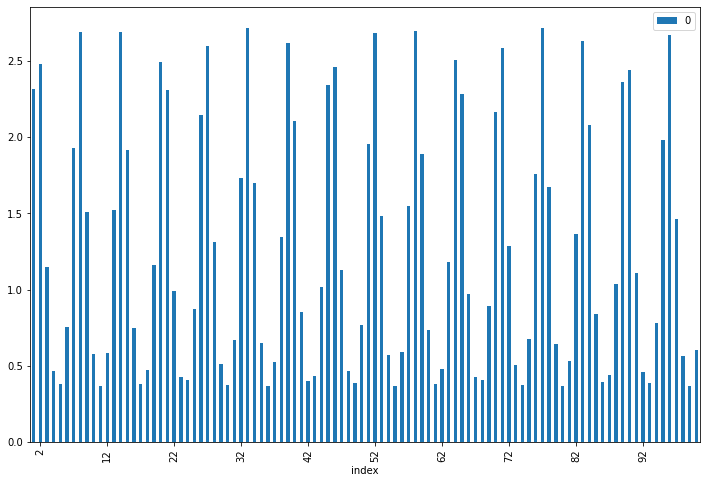

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

length = 100 + 1
x = np.exp(np.sin(np.arange(1, length)))
data_x = pd.DataFrame(x, index = list(range(1, length)))
fig, ax = plt.subplots(figsize=(12, 8))
data_x.plot.bar(ax = ax)
plt.xlabel('index')
plt.xticks(data_x.index[::10])
plt.show()

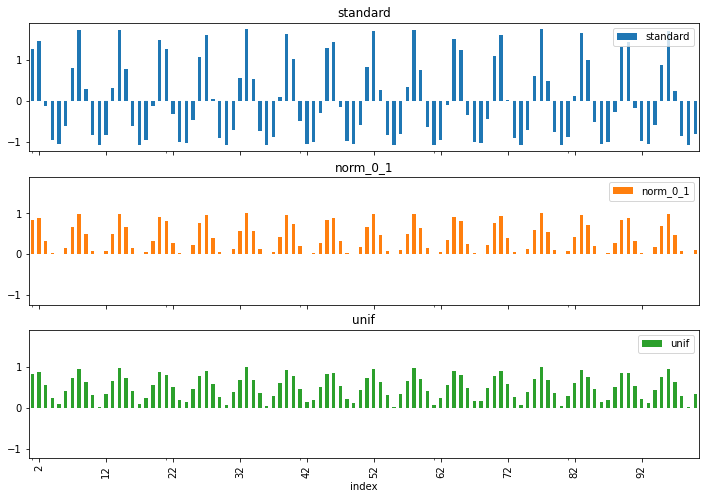

In [58]:
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.preprocessing import StandardScaler, MinMaxScaler

norm_unif = lambda x: ECDF(x)(x)
norm_0_1 = MinMaxScaler()
norm_std = StandardScaler()

data_x['standard'] = norm_std.fit_transform(data_x[0].values.reshape(-1, 1))
data_x['norm_0_1'] = norm_0_1.fit_transform(data_x[0].values.reshape(-1, 1))
data_x['unif'] = norm_unif(data_x[0])
data_x.iloc[:, 1:4].plot.bar(figsize = (12, 8), subplots = True, sharey = True, sharex = True)
plt.xlabel('index')
plt.xticks(data_x.index[::10])
plt.show()

Finally, we look at the histogram of the newly created variables.

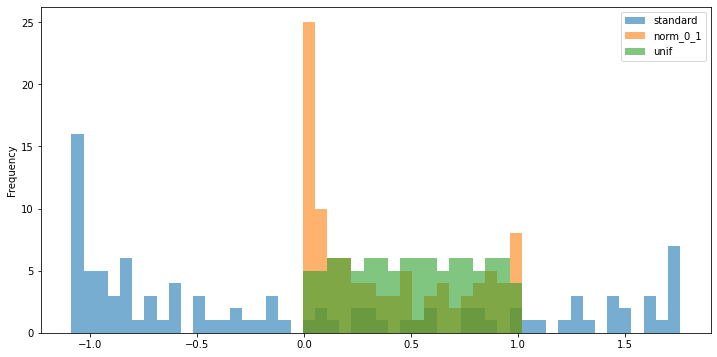

In [64]:
data_x.iloc[:,1:4].plot.hist(alpha = 0.6, bins = 50, figsize = (12, 6))
plt.show()

With respect to shape, the blue and orange distributions are close to the original one. It is only the support that changes: the min/max rescaling ensures all values lie in the $[0,1]$ interval. In both cases, the smallest values (on the left) display a spike in distribution. By construction, this spike disappears under the uniformization: the points are evenly distributed over the unit interval.

### Impact of Rescaling: a Toy Example

To illustrate the impact of choosing one particular rescaling method, we build a simple dataset, comprising 3 firms and 3 dates.

In [102]:
firm = np.array([1] * 3 + [2] * 3 + [3] * 3)
date = np.array([1, 2, 3] * 3)
cap = np.array([10, 50, 100, 15, 10, 15, 200, 120, 80])
rtn = np.array([6, 1, -6, -3, 0, 2, -4, -2, 0]) * 0.01
data_toy = pd.DataFrame([firm, date, cap, rtn], index = ['firm', 'date', 'cap', 'return']).T

data_toy['cap_0_1'] = data_toy.groupby('date')['cap'].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
data_toy['cap_u'] = np.concatenate(data_toy.groupby('date')['cap'].apply(norm_unif).values).ravel() # a little complicated to unravel a list of list
data_toy

firm  date    cap  return   cap_0_1     cap_u
0   1.0   1.0   10.0    0.06  0.000000  0.333333
1   1.0   2.0   50.0    0.01  0.363636  0.666667
2   1.0   3.0  100.0   -0.06  1.000000  1.000000
3   2.0   1.0   15.0   -0.03  0.026316  0.666667
4   2.0   2.0   10.0    0.00  0.000000  0.333333
5   2.0   3.0   15.0    0.02  0.000000  1.000000
6   3.0   1.0  200.0   -0.04  1.000000  1.000000
7   3.0   2.0  120.0   -0.02  1.000000  0.333333
8   3.0   3.0   80.0    0.00  0.764706  0.666667

Let’s briefly comment on this synthetic data. We assume that dates are ordered chronologically and far away: each date stands for a year or the beginning of a decade, but the (forward) returns are computed on a monthly basis. The first firm is hugely successful and multiplies its cap ten times over the periods. The second firm remains stable cap-wise, while the third one plummets. If we look at ‘local’ future returns, they are strongly negatively related to size for the first and third firms. For the second one, there is no clear pattern.

Date-by-date, the analysis is fairly similar, though slightly nuanced.
- On date 1,  the smallest firm has the largest return and the two others have negative returns.
- On date 2, the biggest firm has a negative return while the two smaller firms do not.
- On date 3, returns are decreasing with size. 

While the relationship is not always perfectly monotonous, there seems to be a link between size and return and, typically, investing in the smallest firm would be a very good strategy with this sample.

Now let us look at the output of simple regressions.

In [108]:
import statsmodels.api as sm
model = sm.OLS(endog = data_toy['return'], exog = sm.add_constant(data_toy['cap_0_1'])).fit()
model.summary2().tables[1]

c:\Users\SamuelZhang\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
const    0.016278  0.013735  1.185121  0.274639 -0.016201  0.048756
cap_0_1 -0.049703  0.021371 -2.325777  0.052942 -0.100237  0.000830

In [109]:
import statsmodels.api as sm
model = sm.OLS(endog = data_toy['return'], exog = sm.add_constant(data_toy['cap_u'])).fit()
model.summary2().tables[1]

c:\Users\SamuelZhang\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
const  0.033333  0.029439  1.132277  0.294808 -0.036279  0.102946
cap_u -0.060000  0.040883 -1.467599  0.185654 -0.156673  0.036673

In terms of $p$-value (column $P>|t|$), the first estimation for the cap coefficient is above 5% while the second is below 5%. One possible explanation for this discrepancy is the standard deviation of the variables. The deviations are equal to 0.34 and 0.27 for cap_norm and cap_u, respectively. Values like market capitalizations can have very large ranges and are thus subject to substantial deviations (even after scaling). Working with uniformized variables reduces dispersion and can help solve this problem.

Note that this is a **double-edged sword: while it can help avoid false negatives, it can also lead to false positives.**

## Coding Exercises

1. The Federal Reserve of Saint Louis (https://fred.stlouisfed.org) hosts thousands of time series of economic indicators that can serve as conditioning variables. Pick one and apply formula (4.3) to expand the number of predictors. If need be, use the function defined above.

Below, we import a credit spread supplied by Bank of America. Its symbol/ticker is “BAMLC0A0CM”. We apply the data expansion on the small number of predictors to save memory space. One important trick that should not be overlooked is the uniformization step after the product (4.3) is computed. Indeed, we want the new features to have the same properties as the old ones. If we skip this step, distributions will be altered, as we show in one example below.

We start with the data extraction and joining. It’s important to join early so as to keep the highest data frequency (daily) in order to replace missing points with close values. Joining with monthly data before replacing creates unnecessary lags.

In [144]:
cred_spread = pd.read_csv('data\chapter4-coding-exercises\BAMLC0A0CM.csv')
cred_spread.columns = ['date', 'spread']
cred_spread['spread'] = cred_spread['spread'].replace('.', 0).astype('float')
cred_spread['date'] = pd.to_datetime(cred_spread['date'])

data_ml = pd.read_pickle('data/data_ml.pkl')
cred_spread = pd.merge(data_ml, cred_spread, how = 'left', on = 'date')
# cred_spread['spread'] = cred_spread['spread'].ffill()
cred_spread = cred_spread.dropna().drop_duplicates().reset_index().drop(columns = 'index')
cred_spread

stock_id       date  Advt_12M_Usd  Advt_3M_Usd  Advt_6M_Usd  \
0             1 2018-03-31          0.90         0.88         0.89   
1             1 2018-04-30          0.90         0.88         0.89   
2             1 2018-05-31          0.90         0.88         0.89   
3             1 2018-06-30          0.90         0.90         0.90   
4             1 2018-07-31          0.90         0.90         0.89   
...         ...        ...           ...          ...          ...   
11037      1212 2018-08-31          0.85         0.84         0.85   
11038      1212 2018-09-30          0.85         0.84         0.85   
11039      1212 2018-10-31          0.86         0.87         0.86   
11040      1212 2018-11-30          0.86         0.88         0.86   
11041      1212 2018-12-31          0.86         0.87         0.86   

       Asset_Turnover  Bb_Yld    Bv  Capex_Ps_Cf  Capex_Sales  ...  Vol3Y_Usd  \
0                0.31    0.45  0.90          1.0         0.98  ...       0.67   
1                0.31    0.45  0.90          1.0         0.98  ...       0.67   
2                0.31    0.45  0.90          1.0         0.98  ...       0.66   
3                0.35    0.58  0.89          1.0         0.98  ...       0.66   
4                0.35    0.59  0.89          1.0         0.98  ...       0.66   
...               ...     ...   ...          ...          ...  ...        ...   
11037            0.43    0.93  0.66          1.0         0.93  ...       0.85   
11038            0.41    0.87  0.66          1.0         0.94  ...       0.84   
11039            0.41    0.91  0.66          1.0         0.94  ...       0.87   
11040            0.41    0.91  0.66          1.0         0.94  ...       0.87   
11041            0.40    0.94  0.67          1.0         0.94  ...       0.87   

       R1M_Usd  R3M_Usd  R6M_Usd  R12M_Usd  R1M_Usd_M  R12M_Usd_M  R1M_Usd_C  \
0        0.173    0.102    0.015       0.0     0.0035         0.0          1   
1       -0.042   -0.061   -0.269       0.0     0.0300         0.0          0   
2       -0.038   -0.095   -0.248       0.0    -0.0020         0.0          0   
3        0.000   -0.079   -0.304       0.0     0.0240         0.0          0   
4       -0.077   -0.221   -0.247       0.0     0.0190         0.0          0   
...        ...      ...      ...       ...        ...         ...        ...   
11037    0.044   -0.252   -0.144       0.0    -0.0110         0.0          1   
11038   -0.266   -0.373    0.000       0.0    -0.0790         0.0          0   
11039    0.013    0.043    0.000       0.0     0.0360         0.0          0   
11040   -0.125    0.157    0.000       0.0    -0.1050         0.0          0   
11041    0.222    0.000    0.000       0.0     0.1000         0.0          1   

       R12M_Usd_C  spread  
0               0    1.17  
1               0    1.14  
2               0    1.22  
3               0    1.30  
4               0    1.16  
...           ...     ...  
11037           0    1.21  
11038           0    1.13  
11039           0    1.25  
11040           0    1.45  
11041           0    1.59  

[11042 rows x 104 columns]

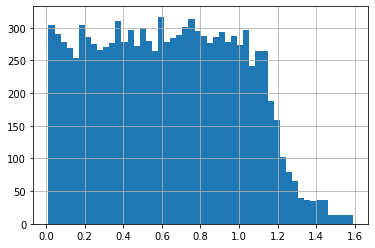

In [153]:
features_short = ['Div_Yld', 'Eps', 'Mkt_Cap_12M_Usd', 'Mom_11M_Usd', 'Ocf', 'Pb', 'Vol1Y_Usd']
names_cred_spread = [feature + "_cred_spread" for feature in features_short]
feat_cred_spread = cred_spread[features_short]
feat_cred_spread.columns = names_cred_spread
feat_cred_spread = feat_cred_spread.apply(lambda x: x * cred_spread['spread'])
feat_cred_spread['Eps_cred_spread'].hist(bins = 50)
plt.show()

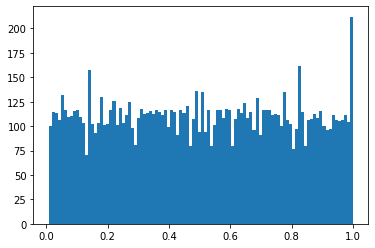

In [161]:
feat_cred_spread['date'] = cred_spread['date']
plt.hist(np.concatenate(feat_cred_spread.groupby('date')['Eps_cred_spread'].apply(norm_unif).values).ravel(), bins = 100)
plt.show()

2. Create a new categorical label based on formulae (4.4) and (4.2). The time series of the VIX can also be retrieved from the Federal Reserve’s website: https://fred.stlouisfed.org/series/VIXCLS.

In [171]:
vix = pd.read_csv('data\chapter4-coding-exercises\VIXCLS.csv')
vix.columns = ['date', 'vix']
vix['date'] = pd.to_datetime(vix['date'])
vix['vix'] = vix['vix'].replace('.', 0).astype('float')

vix = pd.merge(data_ml, vix, on = 'date', how = 'left').dropna().reset_index().drop(columns = 'index')
vix

stock_id       date  Advt_12M_Usd  Advt_3M_Usd  Advt_6M_Usd  \
0            1 2018-04-30          0.90         0.88         0.89   
1            1 2018-05-31          0.90         0.88         0.89   
2            1 2018-07-31          0.90         0.90         0.89   
3            1 2018-08-31          0.90         0.90         0.89   
4            1 2018-10-31          0.89         0.89         0.90   
...        ...        ...           ...          ...          ...   
7653      1212 2018-07-31          0.85         0.84         0.86   
7654      1212 2018-08-31          0.85         0.84         0.85   
7655      1212 2018-10-31          0.86         0.87         0.86   
7656      1212 2018-11-30          0.86         0.88         0.86   
7657      1212 2018-12-31          0.86         0.87         0.86   

      Asset_Turnover  Bb_Yld    Bv  Capex_Ps_Cf  Capex_Sales  ...  Vol3Y_Usd  \
0               0.31    0.45  0.90          1.0         0.98  ...       0.67   
1               0.31    0.45  0.90          1.0         0.98  ...       0.66   
2               0.35    0.59  0.89          1.0         0.98  ...       0.66   
3               0.35    0.60  0.89          1.0         0.98  ...       0.63   
4               0.39    0.51  0.89          1.0         0.97  ...       0.64   
...              ...     ...   ...          ...          ...  ...        ...   
7653            0.43    0.93  0.66          1.0         0.93  ...       0.85   
7654            0.43    0.93  0.66          1.0         0.93  ...       0.85   
7655            0.41    0.91  0.66          1.0         0.94  ...       0.87   
7656            0.41    0.91  0.66          1.0         0.94  ...       0.87   
7657            0.40    0.94  0.67          1.0         0.94  ...       0.87   

      R1M_Usd  R3M_Usd  R6M_Usd  R12M_Usd  R1M_Usd_M  R12M_Usd_M  R1M_Usd_C  \
0      -0.042   -0.061   -0.269       0.0      0.030         0.0          0   
1      -0.038   -0.095   -0.248       0.0     -0.002         0.0          0   
2      -0.077   -0.221   -0.247       0.0      0.019         0.0          0   
3      -0.002   -0.154   -0.194       0.0     -0.011         0.0          1   
4       0.014   -0.034    0.000       0.0      0.036         0.0          0   
...       ...      ...      ...       ...        ...         ...        ...   
7653    0.048   -0.193   -0.158       0.0      0.019         0.0          1   
7654    0.044   -0.252   -0.144       0.0     -0.011         0.0          1   
7655    0.013    0.043    0.000       0.0      0.036         0.0          0   
7656   -0.125    0.157    0.000       0.0     -0.105         0.0          0   
7657    0.222    0.000    0.000       0.0      0.100         0.0          1   

      R12M_Usd_C    vix  
0              0  15.93  
1              0  15.43  
2              0  12.83  
3              0  12.86  
4              0  21.23  
...          ...    ...  
7653           0  12.83  
7654           0  12.86  
7655           0  21.23  
7656           0  18.07  
7657           0  25.42  

[7658 rows x 104 columns]

In [172]:
vix_med = vix['vix'].median()
delta = 0.5
data_vix = vix[['stock_id', 'date', 'R1M_Usd']].copy()
data_vix['r_minus'] = -0.02 * np.exp(-delta * (vix['vix'] - vix_med))
data_vix['r_plus'] = 0.02 * np.exp(delta * (vix['vix'] - vix_med))
data_vix['R1M_Usd_Cvix'] = 1 * (data_vix['R1M_Usd'] > data_vix['r_plus']) + (-1) * (data_vix['R1M_Usd'] < data_vix['r_minus'])
data_vix

stock_id       date  R1M_Usd   r_minus    r_plus  R1M_Usd_Cvix
0            1 2018-04-30   -0.042 -0.020000  0.020000            -1
1            1 2018-05-31   -0.038 -0.025681  0.015576            -1
2            1 2018-07-31   -0.077 -0.094229  0.004245             0
3            1 2018-08-31   -0.002 -0.092827  0.004309             0
4            1 2018-10-31    0.014 -0.001413  0.283081             0
...        ...        ...      ...       ...       ...           ...
7653      1212 2018-07-31    0.048 -0.094229  0.004245             1
7654      1212 2018-08-31    0.044 -0.092827  0.004309             1
7655      1212 2018-10-31    0.013 -0.001413  0.283081             0
7656      1212 2018-11-30   -0.125 -0.006860  0.058308            -1
7657      1212 2018-12-31    0.222 -0.000174  2.300156             0

[7658 rows x 6 columns]

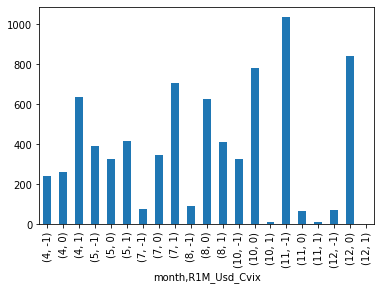

In [181]:
data_vix['month'] = data_vix['date'].apply(lambda x: x.month)
data_vix_nb = data_vix.groupby(['month', 'R1M_Usd_Cvix'])['stock_id'].count()
data_vix_nb.plot.bar()
plt.show()

3. Plot the histogram of the R12M_Usd variable. Clearly, some outliers are present. Identify the stock with highest value for this variable and determine if the value can be correct or not.

<AxesSubplot:>

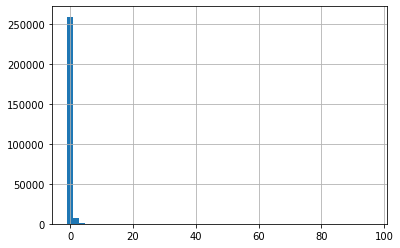

In [185]:
data_ml['R12M_Usd'].hist(bins = 50)

In [187]:
data_ml[data_ml['R12M_Usd'] == data_ml['R12M_Usd'].max()]

stock_id       date  Advt_12M_Usd  Advt_3M_Usd  Advt_6M_Usd  \
151571       683 2009-02-28          0.29         0.16         0.27   

        Asset_Turnover  Bb_Yld    Bv  Capex_Ps_Cf  Capex_Sales  ...  \
151571            0.81    0.41  0.23         0.94         0.62  ...   

        Vol1Y_Usd  Vol3Y_Usd  R1M_Usd  R3M_Usd  R6M_Usd  R12M_Usd  R1M_Usd_M  \
151571       0.98       0.98    0.472    2.861    5.778    95.972      0.093   

        R12M_Usd_M  R1M_Usd_C  R12M_Usd_C  
151571        0.63          1           1  

[1 rows x 103 columns]

The largest return comes from stock #683. Let’s have a look at the stream of monthly returns in 2009.



In [191]:
data_ml['year'] = data_ml['date'].apply(lambda x: x.year)
data_ml[(data_ml['stock_id'] == 683) & (data_ml['year'] == 2009)][["date", "R1M_Usd"]]

date  R1M_Usd
151570 2009-01-31   -0.625
151571 2009-02-28    0.472
151572 2009-03-31    1.440
151573 2009-04-30    0.139
151574 2009-05-31    0.086
151575 2009-06-30    0.185
151576 2009-07-31    0.363
151577 2009-08-31    0.103
151578 2009-09-30    9.914
151579 2009-10-31    0.101
151580 2009-11-30    0.202
151581 2009-12-31   -0.251

The returns are all very high, so the annual value is plausible. In addition, a quick glance at the Vol1Y values shows that the stock is the most volatile of the dataset.

# Penalized regressions and sparse hedging for minimum variance portfolios

Possible applications of "regularization" for linear models:

- Improve the *robustness* of factor-based predictive regressions
- Fuel an allocation scheme (Han et al., 2019; Rapach and Zhou, 2019)
- Improve the quality of mean-variance driven portfolio weights (Stevens, 1998)
- General idea: remove noises (at the cost of a possible bias)

## Penalized Regressions

### Simple Regressions

The classical linear function: $\boldsymbol{y}=\boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\varepsilon}$. 

The best choice of $\boldsymbol{\varepsilon}$ is naturally the one that *minimizes the error*. A general idea is to minimize the *square errors*: $L=\boldsymbol{\varepsilon}^{'}\boldsymbol{\varepsilon}=\sum_i \varepsilon_i^2$. The loss $L$ is called the sum of squared residuals (*SSR*). Take partial differentiation to get
\begin{align*}
\nabla_{\boldsymbol{\beta}} L&=\frac{\partial}{\partial \boldsymbol{\beta}}(\textbf{y}-\textbf{X}\boldsymbol{\beta})'(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})=\frac{\partial}{\partial \boldsymbol{\beta}}[\boldsymbol{\beta}'\boldsymbol{X}'\boldsymbol{X}\boldsymbol{\beta}-2\boldsymbol{y}'\boldsymbol{X}\boldsymbol{\beta}] \\
&=2\boldsymbol{X}'\boldsymbol{X}\boldsymbol{\beta}  -2\boldsymbol{X}'\boldsymbol{y}
\end{align*}
so that the first order condition $\nabla_{\boldsymbol{\beta}}=\boldsymbol{0}$ is satisfied if $$\boldsymbol{\beta}^*=(\boldsymbol{X}'\boldsymbol{X})^{-1}\boldsymbol{X}'\boldsymbol{y}$$
which is known as the **standard ordinary least squares (OLS)** solution of the linear model. Two issues:

- Matrix $\boldsymbol{X}$ with dimensions $I\times K$. $\boldsymbol{X}'\boldsymbol{X}$ can only be inverted if $I$ (*nbs. of rows*) is strictly superior to $K$ (*nbs. of columns*). If there are more predictors than instances then there is no unique value of $\boldsymbol{\beta}$ that minimizes the loss.
- If $\boldsymbol{X}'\boldsymbol{X}$ is non-singular, the second order condition ensures that $\boldsymbol{\beta}^{*}$ yields a global minimum for the loss $L$.

Standard assumptions for linear models:

- $\mathbb{E}[\boldsymbol{y}|\boldsymbol{X}]=\boldsymbol{X\beta}$: **linear shape**
- $\mathbb{E}[\boldsymbol{\varepsilon}|\boldsymbol{X}]=\boldsymbol{0}$: error are **indepedent of predictors**
- $\mathbb{E}[\boldsymbol{\varepsilon}\boldsymbol{\varepsilon}'|\boldsymbol{X}]=\sigma^2 \boldsymbol{I}$: homoscedasticity - errors are uncorrelated and have identical variance
- *Supplement*: random sampling, not complete multi-collinearity, $\varepsilon_i$ normally distributed

Under these hypotheses, it's possible for us to perform statistical tests.

### Forms of Penalizations

Tibshirani (1996) proposes to estimate the following model (**LASSO**):
$$y_i = \sum_{j=1}^J \beta_j x_{i,j} + \epsilon_i, \quad i =1,\dots,I, \quad \text{s.t.} \quad \sum_{j=1}^J |\beta_j| < \delta $$
for some strictly positive constant $\delta$. Under least sqaure minimization, this amounts to solve the Lagrangian formulation:
$$\underset{\boldsymbol{\beta}}{\min} \, \left\{ \sum_{i=1}^I\left(y_i - \sum_{j=1}^J \beta_jx_{i,j} \right)^2+\lambda \sum_{j=1}^J |\beta_j| \right\}$$
for some value $\lambda>0$ which depends on $\delta$ (negatively correlated).

$L^2$ regularization (ridge regression) is similar to this and in fact anterior to LASSO:
$$\underset{\boldsymbol{\beta}}{\min} \, \left\{ \sum_{i=1}^I\left(y_i - \sum_{j=1}^J\beta_jx_{i,j} \right)^2+\lambda \sum_{j=1}^J \beta_j^2 \right\}$$
which is equivalent to estimating the following model:
$$y_i = \sum_{j=1}^J \beta_jx_{i,j} + \epsilon_i, \quad i =1,\dots,I, \quad \text{s.t.} \quad \sum_{j=1}^J \beta_j^2 < \delta$$
Their differences: LASSO will penalize some coefficients "brutally" so that they **shrink to zero quickly**, while in ridge regression, zero is only reached asymptotically. They are depicted with $K=2$ predictors by the following figure. For LASSO and ridge regression, the constraints take the shape of $|\beta_1|+|\beta_2|\leq \delta$ (a square) and $\beta_1^2+\beta_2^2\leq \delta$ so that the "error" ellipsoid in LASSO usually touches the acceptable boundary at its corner.

![Schematic view of Lasso (left) versus ridge (right) regressions](images/figure5-1.png)
Both methods work when the number of exogenous variables surpasses that of observations (when classical regressions are ill-defined) since estimates in ridge regression is simply $$\hat{\boldsymbol{\beta}}=(\boldsymbol{X}'\boldsymbol{X}+\lambda \boldsymbol{I}_N)^{-1} \boldsymbol{X}'\boldsymbol{Y}$$ which ensures that the inverse matrix is well defined whenever $\lambda > 0$.

Zou and Hastie (2005) propose to benefit from the best of both worlds when **combining both penalizations in a convex manner (the elasticnet)**:
$$y_i = \sum_{j=1}^J \beta_jx_{i,j} + \epsilon_i, \quad \text{s.t.} \quad \alpha \sum_{j=1}^J |\beta_j| +(1-\alpha)\sum_{j=1}^J \beta_j^2< \delta, \quad i =1,\dots,N$$
which is associated to the optimization program
$$\underset{\boldsymbol{\beta}}{\min} \, \left\{ \sum_{i=1}^I\left(y_i - \sum_{j=1}^J\beta_jx_{i,j} \right)^2+\lambda \left(\alpha\sum_{j=1}^J |\beta_j|+ (1-\alpha)\sum_{j=1}^J \beta_j^2\right) \right\}$$
Main advantage: *maintain the selection capability of LASSO while being more effective in some cases.*

### Illustrations

In [1]:
import pandas as pd
from sklearn.linear_model import Lasso
data_ml = pd.read_pickle("./data/data_ml.pkl")

features = data_ml.columns[2:95]
y_penalized = data_ml['R1M_Usd']
x_penalized = data_ml[features].astype('float64')

fit_lasso = Lasso(alpha = 1).fit(X = x_penalized, y = y_penalized) 
fit_lasso.coef_ # alpha = 1 is too large for this case

array([-0., -0., -0.,  0., -0., -0., -0., -0., -0., -0., -0.,  0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,
        0.,  0.])

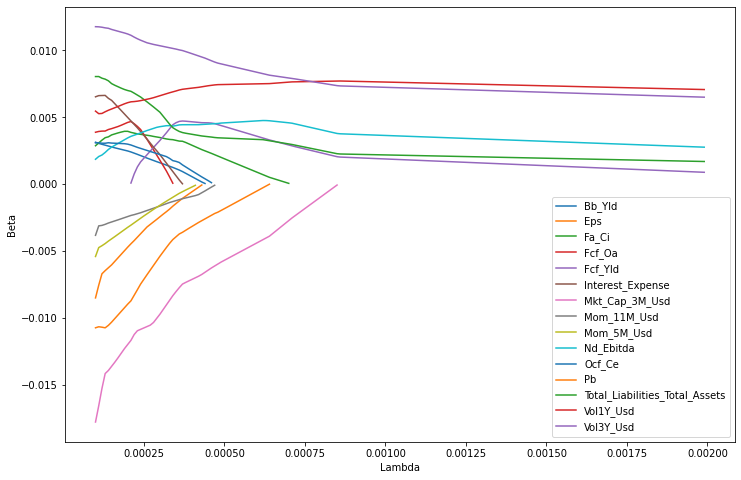

In [69]:
import numpy as np
from sklearn.linear_model import lasso_path
import matplotlib.pyplot as plt

alphas = np.arange(1e-4, 2e-3, 1e-5)
# Generate LASSO paths with different alphas
lasso_paths = lasso_path(X = x_penalized, y = y_penalized, alphas = alphas)
lasso_results = pd.DataFrame(lasso_paths[1], columns = lasso_paths[0], index = features).T.sort_index()
lasso_results.replace(0, np.nan, inplace = True)
# Select useful columns
predictors = lasso_results.abs().sum(axis = 0) > 0.05
lasso_results.loc[:, predictors].plot(figsize = (12, 8), xlabel = "Lambda", ylabel = "Beta")
plt.show()

The graph plots the evolution of coefficients as the penalization intensity ($\lambda$) increases. For some characteristics, the convergence to zero is rapid. Other variables resist the penalization longer, like `Mkt_Cap_3M_Usd`. Essentially, this means that at the first order, this variable is an important driver of future 1-month returns in our sample. Moreover, the negative sign of its coefficient is a confirmation (again, in this sample) of the size anomaly, according to which small firms experience higher future returns compared to their larger counterparts.

Next, we turn to ridge regressions.

In [72]:
from sklearn.linear_model import Ridge

n_alphas = 50
alphas = np.logspace(-3, 3, n_alphas) # Convert it into logspace!

coefs = {}
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X = x_penalized, y = y_penalized)
    coefs[alpha] = ridge.coef_

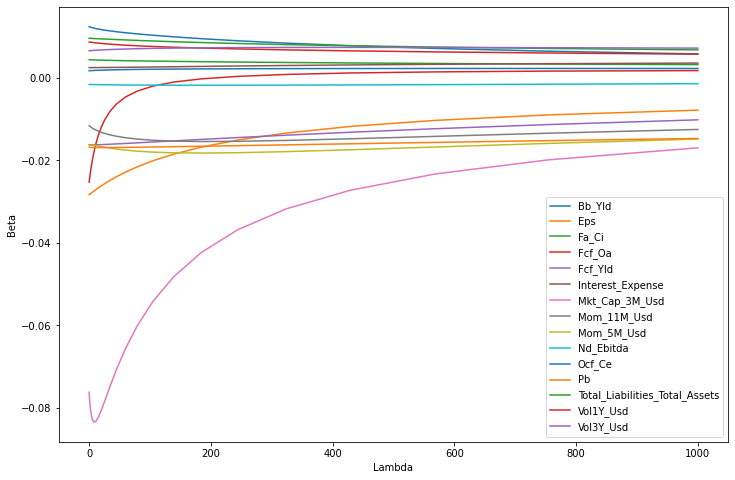

In [81]:
ridge_results = pd.DataFrame.from_dict(coefs).T
ridge_results.columns = features
# Plot the graph of the same predictors as in LASSO
ridge_results.loc[:, predictors].plot(figsize = (12, 8), xlabel = "Lambda", ylabel = "Beta")
plt.show()

In the ridge regression, the convergence to zero is much smoother. As in the previous figure, the `Mkt_Cap_3M_Usd` predictor clearly dominates, with again large negative coefficients. Nonetheless, as $\lambda$ increases, its domination over the other predictor fades. 

By definition, the elasticnet will produce curves that *behave like a blend of the two above approaches*. Nonetheless, as long as $\alpha > 0$, the *selective property of the LASSO will be preserved*: some features will see their coefficients shrink rapidly to zero. In fact, the strength of the LASSO is such that a balanced mix of the two penalizations is not reached at $\alpha=1/2$, but rather at a much smaller value (possibly below 0.1).

In [ ]:
from sklearn.linear_model import ElasticNet

alpha = 5e-4
l1_ratios = np.arange(0, 1, 0.1)

coefs = {}
for l1_ratio in l1_ratios:
    elasticnet = ElasticNet(alpha = alpha, l1_ratio = l1_ratio)
    elasticnet.fit(X = x_penalized, y = y_penalized)
    coefs[l1_ratio] = elasticnet.coef_

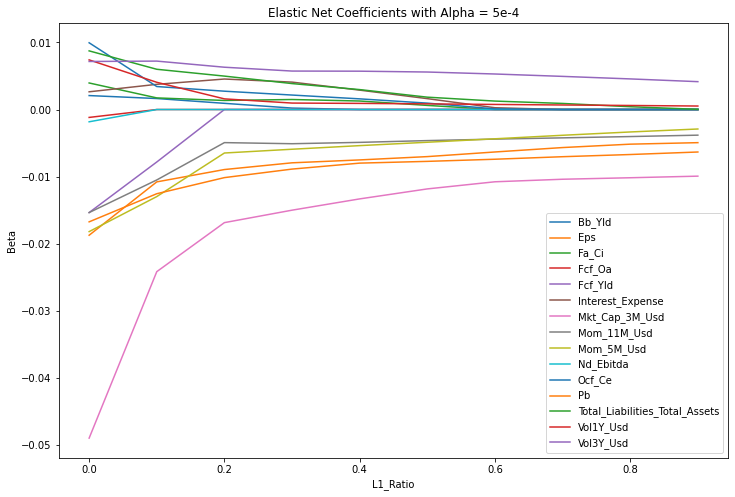

In [84]:
en_results = pd.DataFrame.from_dict(coefs).T
en_results.columns = features
# Plot the graph of the same predictors as in LASSO
en_results.loc[:, predictors].plot(figsize = (12, 8), xlabel = "L1_Ratio", ylabel = "Beta", title = "Elastic Net Coefficients with Alpha = 5e-4")
plt.show()

## Sparse Hedging for Minimum Variance Portfolios

### Presentation and Derivations

- Idea: enforce a $L^1$ norm to construct *sparse portfolios*
- Goto and Xu (2015) and Stevens (1998)

Start from the inverse covariance matrix of assets $\boldsymbol{\Sigma}^{-1}$, the maximum Sharpe Ratio portfolio is given by $$\boldsymbol{w}^{\text{MSR}}=\frac{\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}}{\boldsymbol{1}'\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}}$$
where $\boldsymbol{\mu}$ is the vector of expected (excess) returns. Taking $\boldsymbol{\mu} = \boldsymbol{1}$ yields the *minimum variance portfolio*.

Usually we estimate $\boldsymbol{\Sigma}$ first and then inverse it. We present one way to obtain $\boldsymbol{\Sigma}^{-1}$ directly. If we decompose $\boldsymbol{\Sigma}$ into
$$\boldsymbol{\Sigma}= \left[\begin{array}{cc} \sigma^2 & \boldsymbol{c}' \\
\boldsymbol{c}& \boldsymbol{C}\end{array} \right]$$
classical partitioning results (e.g., Schur complements) imply
$$\small \boldsymbol{\Sigma}^{-1}= \left[\begin{array}{cc} (\sigma^2 -\boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c})^{-1} & - (\sigma^2 -\boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c})^{-1}\boldsymbol{c}'\boldsymbol{C}^{-1} \\(\sigma^2 -\boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c})^{-1}\boldsymbol{C}^{-1}\boldsymbol{c}& \boldsymbol{C}^{-1}+ (\sigma^2 -\boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c})^{-1}\boldsymbol{C}^{-1}\boldsymbol{cc}'\boldsymbol{C}^{-1}\end{array} \right]$$
The first line: the factor $(\sigma^2 -\boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c})^{-1}$ and the line vector $\boldsymbol{c}'\boldsymbol{C}^{-1}$. $\boldsymbol{C}$ is the covariance matrix of assets 2 to N and $\boldsymbol{c}$ is the covariance between the first asset and all other assets. The first line of $\boldsymbol{\Sigma}^{-1}$ is then
$$(\sigma^2 -\boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c})^{-1} \left[1 \quad  \underbrace{-\boldsymbol{c}'\boldsymbol{C}^{-1}}_{N-1 \text{ terms}} \right]$$
We now consider the alternative setting by regressing the returns of the first assets on those of all other assets:
$$r_{1,t}=a_1+\sum_{n=2}^N\beta_{1|n}r_{n,t}+\epsilon_t, \quad \text{ i.e., } \quad  \boldsymbol{r}_1=a_1\boldsymbol{1}_T+\boldsymbol{R}_{-1}\boldsymbol{\beta}_1+\epsilon_1$$
where $\boldsymbol{R}_{-1}$ gathers the returns of all assets except the first one. The OLS estimator for $\beta_1$ is $$\hat{\beta}_1=\boldsymbol{C}^{-1}\boldsymbol{c}$$
and this is the partitioned form (when a constant is included to the regression) stemming from the Frisch-Waugh-Lovell theorem (Greene, 2018). In addition, $$(1-R^2)\sigma_{\boldsymbol{r}_1}^2=\sigma_{\boldsymbol{r}_1}^2- \boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c} =\sigma^2_{\epsilon_1}$$ **Proof.** With $\boldsymbol{X}$ being the concatenation of $\boldsymbol{1}_T$ with returns $\boldsymbol{R}_{-1}$ and with $\boldsymbol{y}=\boldsymbol{r}_1$, the classical expression of $R^2$ is
$$R^2=1-\frac{\boldsymbol{\epsilon}'\boldsymbol{\epsilon}}{T\sigma_Y^2}=1-\frac{\boldsymbol{y}'\boldsymbol{y}-\hat{\boldsymbol{\beta}'}\boldsymbol{X}'\boldsymbol{X}\hat{\boldsymbol{\beta}}}{T\sigma_Y^2}=1-\frac{\boldsymbol{y}'\boldsymbol{y}-\boldsymbol{y}'\boldsymbol{X}\hat{\boldsymbol{\beta}}}{T\sigma_Y^2}$$
with fitted values $\boldsymbol{X}\hat{\beta}=\hat{a}_1\boldsymbol{1}_T+\boldsymbol{R}_{-1}\boldsymbol{C}^{-1}\boldsymbol{c}$. Hence,
\begin{align*}
T\sigma_{\boldsymbol{r}_1}^2R^2&=T\sigma_{\boldsymbol{r}_1}^2-\boldsymbol{r}'_1\boldsymbol{r}_1+\hat{a}_1\boldsymbol{1}'_T\boldsymbol{r}_1+\boldsymbol{r}'_1\boldsymbol{R}_{-1}\boldsymbol{C}^{-1}\boldsymbol{c} \\
T(1-R^2)\sigma_{\boldsymbol{r}_1}^2&=\boldsymbol{r}'_1\boldsymbol{r}_1-\hat{a}_1\boldsymbol{1}'_T\boldsymbol{r}_1-\left(\boldsymbol{\tilde{r}}_1+\frac{\boldsymbol{1}_T\boldsymbol{1}'_T}{T}\boldsymbol{r}_1\right)'\left(\tilde{\boldsymbol{R}}_{-1}+\frac{\boldsymbol{1}_T\boldsymbol{1}'_T}{T}\boldsymbol{R}_{-1}\right)\boldsymbol{C}^{-1}\boldsymbol{c} \\
T(1-R^2)\sigma_{\boldsymbol{r}_1}^2&=\boldsymbol{r}'_1\boldsymbol{r}_1-\hat{a}_1\boldsymbol{1}'_T\boldsymbol{r}_1-T\boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c} -\boldsymbol{r}'_1\frac{\boldsymbol{1}_T\boldsymbol{1}'_T}{T}\boldsymbol{R}_{-1} \boldsymbol{C}^{-1}\boldsymbol{c} \\
T(1-R^2)\sigma_{\boldsymbol{r}_1}^2&=\boldsymbol{r}'_1\boldsymbol{r}_1-\frac{(\boldsymbol{1}'_T\boldsymbol{r}_1)^2}{T}- T\boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c} \\
(1-R^2)\sigma_{\boldsymbol{r}_1}^2&=\sigma_{\boldsymbol{r}_1}^2- \boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c} 
\end{align*}
where in the fourth equality we have plugged $\hat{a}_1=\dfrac{\boldsymbol{1'}_T}{T}(\boldsymbol{r}_1-\boldsymbol{R}_{-1}\boldsymbol{C}^{-1}\boldsymbol{c})$. The proof can also be done heuristically.

Combining previous formulas, we get the first line of $\boldsymbol{\Sigma}^{-1}$ to be $$\frac{1}{\sigma^2_{\epsilon_1}}\times \left[ 1 \quad  -\hat{\boldsymbol{\beta}}_1'\right]$$
Given the first line of $\boldsymbol{\Sigma}^{-1}$, it suffices to multiply by $\boldsymbol{\mu}$ to get the portfolio weight in the *first* asset.

The economic intuition behind it is very nice. Take the previous case as an example. The portfolio has a unit position in the first asset and $-\hat{\boldsymbol{\beta}}_1$ positions in other assets. They are to *hedge* the return of the first one. The scaling factor $\sigma_{\epsilon_1}^2$ measures *how much we trust the regression output*. The more we trust, the more we invest in the hedging portfolio.

This reasoning is easily generalized for any line of $\boldsymbol{\Sigma}^{-1}$, which can be obtained by regressing the returns of asset $i$ on the returns of all other assets. Given values of $\boldsymbol{\mu}$, the procedure is roughly the following. At each date, **For all stocks $i$**,

1. Estimate the *elasticnet* regression over $t=1,\dots,T$ samples to get the $i^{th}$ line of $\hat{\Sigma}^{-1}$:
$$\small \left[\hat{\mathbf{\Sigma}}^{-1}\right]_{i,\cdot}= \underset{\mathbf{\beta}_{i|}}{\text{argmin}}\, \left\{\sum_{t=1}^T\left( r_{i,t}-a_i+\sum_{n\neq i}^N\beta_{i|n}r_{n,t}\right)^2+\lambda \alpha ||  \mathbf{\beta}_{i|}||_1+\lambda (1-\alpha)||\mathbf{\beta}_{i|}||_2^2\right\}$$
2. To get the weights of asset $i$, we compute the $\mu$-weighted sum: $w_i= \sigma_{\epsilon_i}^{-2}\left(\mu_i- \sum_{j\neq i}\mathbf{\beta}_{i|j}\mu_j\right)$.

We recall that the vectors $\mathbf{\beta}_{i|}=[\mathbf{\beta}_{i|1},\dots,\mathbf{\beta}_{i|i-1},\mathbf{\beta}_{i|i+1},\dots,\mathbf{\beta}_{i|N}]$ are the coefficients from regressing the returns of asset $i$ against the returns of all other assets.

The introduction of **penalization norms** are beneficial twofold:

- Robustness: estimates are less subject to error in $\mu$
- Less Transaction Costs: portfolios are sparse
- You may refer to Friedman et al. (2008) for GLASSO

### Example

The vector of expected returns can be very noisy, so we can simply adopt an agnostic view by setting $\boldsymbol{\mu}=\boldsymbol{1}$.

We will apply some techniques in Chapter 12 and analysize sparse portfolios based on returns (at the end of Chapter 1).

Then, we initialize the output variables: portfolio weights and portfolio returns. We want to compare three strategies: an equally weighted (EW) benchmark of all stocks, the classical global minimum variance portfolio (GMV) and the sparse-hedging approach to minimum variance.

In [2]:
# Generate Returns
stock_days = data_ml[['date', 'stock_id']].groupby('stock_id').count()
stock_ids = stock_days[stock_days['date'] == max(stock_days['date'])].index
sub_data_ml = data_ml[data_ml['stock_id'].isin(stock_ids)]
returns = sub_data_ml.pivot(index = "date", columns = "stock_id", values = "R1M_Usd")
returns

stock_id     1      3      4      7      9      11     12     16     17    \
date                                                                        
2000-01-31 -0.036  0.077 -0.016 -0.009  0.032  0.144 -0.110 -0.191 -0.103   
2000-02-29  0.263 -0.024  0.000  0.027  0.076  0.258  0.110  0.197 -0.053   
2000-03-31  0.031  0.018  0.153  0.000 -0.025  0.049  0.134 -0.030  0.074   
2000-04-30  0.448  0.027 -0.011 -0.017 -0.022  0.014  0.022  0.161  0.051   
2000-05-31 -0.097  0.050  0.014  0.018 -0.121 -0.116 -0.038 -0.020  0.038   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2018-08-31 -0.002 -0.049  0.036 -0.068 -0.028  0.146  0.040  0.016  0.297   
2018-09-30 -0.155 -0.070 -0.025 -0.052 -0.098 -0.291 -0.044 -0.050 -0.150   
2018-10-31  0.014  0.036  0.000  0.007 -0.018 -0.100  0.074  0.094 -0.081   
2018-11-30 -0.110 -0.070 -0.088 -0.066 -0.099 -0.251 -0.105 -0.059 -0.171   
2018-12-31  0.082  0.030  0.043  0.131  0.112  0.158  0.067  0.039  0.402   

stock_id     18    ...   1199   1200   1201   1202   1203   1204   1208  \
date               ...                                                    
2000-01-31  0.098  ... -0.509  0.039 -0.011 -0.019  0.168  0.080 -0.372   
2000-02-29 -0.001  ... -0.147  0.017 -0.148  0.118  0.177  0.161  0.143   
2000-03-31 -0.002  ...  0.083  0.006 -0.025 -0.009  0.237 -0.008  0.057   
2000-04-30 -0.037  ... -0.192  0.003 -0.061  0.053 -0.097 -0.114  0.070   
2000-05-31 -0.131  ... -0.279  0.014  0.118  0.089 -0.023 -0.089 -0.137   
...           ...  ...    ...    ...    ...    ...    ...    ...    ...   
2018-08-31  0.025  ... -0.006 -0.005 -0.048 -0.010  0.037  0.005  0.126   
2018-09-30 -0.135  ... -0.064 -0.013 -0.070 -0.024 -0.030 -0.161 -0.119   
2018-10-31  0.074  ... -0.075  0.068  0.051  0.078 -0.005  0.107  0.205   
2018-11-30 -0.215  ... -0.066 -0.054 -0.197 -0.149 -0.079 -0.050 -0.189   
2018-12-31  0.247  ... -0.005  0.071  0.184  0.095  0.061  0.147  0.227   

stock_id     1209   1210   1212  
date                             
2000-01-31 -0.560 -0.006 -0.186  
2000-02-29 -0.102 -0.057  0.104  
2000-03-31  0.144  0.085 -0.143  
2000-04-30 -0.103  0.073  0.204  
2000-05-31  0.113  0.016  0.042  
...           ...    ...    ...  
2018-08-31 -0.009 -0.011  0.044  
2018-09-30  0.000  0.028 -0.266  
2018-10-31  0.076  0.063  0.013  
2018-11-30 -0.147 -0.064 -0.125  
2018-12-31  0.092  0.108  0.222  

[228 rows x 793 columns]

In [3]:
import numpy as np
separation_date = pd.to_datetime('2014-01-15')
t_oos = returns[returns.index > separation_date].index.unique()
Tt = len(t_oos)
nb_port = 3
portf_weights = np.zeros(shape = (Tt, nb_port, len(returns.columns)))
portf_returns = np.zeros(shape = (Tt, nb_port))

Next, because it is the purpose of this section, we isolate the computation of the weights of sparse-hedging portfolios. In the case of minimum variance portfolios, when $\boldsymbol{\mu}=\boldsymbol{1}$, the weight in asset 1 will simply be the sum of all terms in $\dfrac{1}{\sigma^2_{\epsilon_1}}\times \left[ 1 \quad  -\hat{\boldsymbol{\beta}}_1'\right]$ and the other weights have similar forms.

In [4]:
from sklearn.linear_model import ElasticNet
def weights_sparsehedge(returns: pd.DataFrame, l1_ratio, alpha):
    weights = []
    # def elasticnet_fit(y: pd.Series):
    #     x = returns.drop(columns = y.name)
    #     fit = ElasticNet(alpha = alpha, l1_ratio = l1_ratio).fit(x, y)
    #     err = y - fit.predict(x)
    #     w = (1 - np.sum(fit.coef_)) / np.var(err)
    #     return w
    # weights = returns.apply(elasticnet_fit)

    # NOTE: To generate the same results as R, you may have to specify some of the parameters in ElasticNet
    # By default, glmnet in R standardizes the variables
    # See https://stats.stackexchange.com/questions/206898/difference-between-elasticnet-in-scikit-learn-python-and-glmnet-in-r
    for col in returns.columns:
        y = returns[col]
        x = returns.drop(columns = col)
        fit = ElasticNet(alpha = alpha, l1_ratio = l1_ratio, selection = "random").fit(x, y)
        err = y - fit.predict(x)
        w = (1 - np.sum(fit.coef_)) / np.var(err)
        weights.append(w)
    weights = np.array(weights)
    return weights / np.sum(weights)

In [10]:
def weights_multi(returns: pd.DataFrame, j, l1_ratio, alpha):
    N = len(returns.columns)
    if(j == 0): # EW
        return np.repeat([1/N], N)
    if(j == 1): # Minimum Variance
        sigma = np.cov(returns.T) + 0.01 * np.identity(N)
        w = np.dot(np.linalg.inv(sigma), np.repeat([1], N))
        return w / np.sum(w)
    if(j == 2): # Penalised / Elasticnet
        return weights_sparsehedge(returns, l1_ratio, alpha)

Finally, we proceed to the backtesting loop. Given the number of assets, the execution of the loop takes a few minutes. At the end of the loop, we compute the standard deviation of portfolio returns (monthly volatility). This is the key indicator as minimum variance seeks to minimize this particular metric.

In [19]:
for t in range(Tt):
    tmp_data = returns[returns.index < t_oos[t]]
    realised_returns = returns[returns.index == t_oos[t]]

    for j in range(nb_port):
        portf_weights[t][j] = weights_multi(tmp_data, j, 0.1, 0.1)
        portf_returns[t][j] = (portf_weights[t][j] * realised_returns).values.sum()

portf_returns_df = pd.DataFrame(portf_returns, columns = ['EW', 'MV', 'Sparse'])
portf_returns_df.head()

EW        MV    Sparse
0  0.040376  0.023471  0.033863
1  0.010201  0.024502  0.015676
2 -0.003725  0.005594  0.000557
3  0.011663  0.025922  0.010534
4  0.033970  0.016944  0.030183

In [20]:
portf_returns_df.std()

EW        0.041804
MV        0.033504
Sparse    0.034882
dtype: float64

The aim of the sparse hedging restrictions is to *provide a better estimate of the covariance structure of assets so that the estimation of minimum variance portfolio weights is more accurate.* From the above exercise, we see that the monthly volatility is indeed reduced when building covariance matrices based on sparse hedging relationships. This is not the case if we use the shrunk sample covariance matrix because there is probably too much noise in the estimates of correlations between assets. Working with daily returns would likely improve the quality of the estimates. But the above backtest shows that the penalized methodology performs well even when the number of observations (dates) is small compared to the number of assets.

## Predictive Regressions

### Literature Review and Principle

- Stambaugh (1999), etc.: OLS estimate of autocorrelated indepedent variables are *biased*
- Dangl and Halling (2012), Kelly et al. (2019), ...: time-dependence of the coefficients in predictive regressions
- Rapach et al. (2013), Han et al. (2019) and Rapach and Zhou (2019), etc.: Penalization with predictive regressions to improve forecast combinations and single out important characteristics

A generalized predictive linear relationship with penalization terms:
$$r_{t+1,n} = \alpha_n + \sum_{k=1}^K\beta_n^kf^k_{t,n}+\epsilon_{t+1,n}, \quad \text{s.t.} \quad (1-\alpha)\sum_{j=1}^J |\beta_j| +\alpha\sum_{j=1}^J \beta_j^2< \theta$$
where we use $f_{t,n}^k$ or $x_{t,n}^k$ interchangeably and $\theta$ is some penalization intensity. The aim of regularization is to generate more robust estimates. If the patterns hold out of sample, then $$\hat{r}_{t+1,n}=\hat{\alpha}_n+\sum_{k=1}^K \hat{\beta}_n^k f_{t,n}^k$$ will be a relatively reliable proxy of future performance.

### Code and Results

In [4]:
from sklearn.linear_model import ElasticNet
separation_date = pd.to_datetime('2014-01-15')
training_sample = data_ml[data_ml['date'] < separation_date]

y_penalized_train = training_sample['R1M_Usd']
x_penalized_train = training_sample[features]

fit_pen_pred = ElasticNet(alpha = 0.1, l1_ratio = 0.1).fit(x_penalized_train, y_penalized_train)

We then report two key performance measures: the mean squared error and the hit ratio, which is the proportion of times that the prediction guesses the sign of the return correctly.

In [6]:
from sklearn.metrics import mean_squared_error
test_sample = data_ml[data_ml['date'] > separation_date]
x_penalized_test = test_sample[features]
y_penalized_test = test_sample['R1M_Usd']
mse = mean_squared_error(y_penalized_test, fit_pen_pred.predict(x_penalized_test))
mse

0.03699695809185004

In [9]:
import numpy as np
hit_ratio = np.mean(fit_pen_pred.predict(x_penalized_test) * y_penalized_test > 0)
hit_ratio

0.5460346399270738

- RMSE can be difficult to interpret: complicated to map them mentally to some intuitive financial indicator
- Hit ratio: natural, proportion of correct *signs* achieved by predictions, 0.546 can be good (but not impressive)

## Coding Exercise
On the test sample, evaluate the impact of the two elastic net parameters on out-of-sample accuracy.

In [26]:
def eval_elasticnet_prediction(data, separation_date, alpha, l1_ratio):
    training_sample = data[data['date'] < separation_date]
    test_sample = data[data['date'] > separation_date]

    y_penalized_train = training_sample['R1M_Usd']
    x_penalized_train = training_sample[features]

    fit_pen_pred = ElasticNet(alpha = alpha, l1_ratio = l1_ratio).fit(x_penalized_train, y_penalized_train)

    x_penalized_test = test_sample[features]
    y_penalized_test = test_sample['R1M_Usd']
    mse = mean_squared_error(y_penalized_test, fit_pen_pred.predict(x_penalized_test))
    hit_ratio = np.mean(fit_pen_pred.predict(x_penalized_test) * y_penalized_test > 0)
    return {'alpha': alpha, 'l1_ratio': l1_ratio, 'MSE': mse, 'Hit Ratio': hit_ratio}

In [16]:
eval_elasticnet_prediction(data_ml, separation_date, alpha = 0.1, l1_ratio = 0.1)

{'alpha': 0.1,
 'l1_ratio': 0.1,
 'MSE': 0.03699695809185004,
 'Hit Ratio': 0.5460346399270738}

In [27]:
eval_elasticnet_prediction(data_ml, separation_date, alpha = 0.001, l1_ratio = 0.1)

{'alpha': 0.001,
 'l1_ratio': 0.1,
 'MSE': 0.03702584804370461,
 'Hit Ratio': 0.5303669097538742}

In [29]:
eval_elasticnet_prediction(data_ml, separation_date, alpha = 0.001, l1_ratio = 0.05)

{'alpha': 0.001,
 'l1_ratio': 0.05,
 'MSE': 0.037034308141731254,
 'Hit Ratio': 0.5301247721057429}

In [32]:
eval_elasticnet_prediction(data_ml, separation_date, alpha = 0.01, l1_ratio = 0.05)

{'alpha': 0.01,
 'l1_ratio': 0.05,
 'MSE': 0.03698621560684778,
 'Hit Ratio': 0.543584776663628}

In [34]:
eval_elasticnet_prediction(data_ml, separation_date, alpha = 0.05, l1_ratio = 0.2)

{'alpha': 0.05,
 'l1_ratio': 0.2,
 'MSE': 0.03699695809185004,
 'Hit Ratio': 0.5460346399270738}

You can see that $\alpha=0.1$ and $\lambda =0.1$ are nearly optimal.

## Takeaways

- Penalized Regressions: for robustness. $L^1$ norm can select variables, a mixture of $L^1$ and $L^2$ norm (*ElasticNet*) can be more effective
- Sparse Hedging:
  1. We can obtain $\boldsymbol{\Sigma}^{-1}$ in traditional minimum variance portfolios with regression. Each line in $\boldsymbol{\Sigma}^{-1}$ can be obtained by regressing the returns of asset $i$ with that of all other assets and then by $\dfrac{1}{\sigma^2_{\epsilon_1}}\times \left[ 1 \quad  -\hat{\boldsymbol{\beta}}_1'\right]$.
  2. The regression can be improved through ElasticNet to improve robustness.
- Predictive Regressions: note about time-dependency and evaluation metrics

# Tree-based Methods

## Simple Trees
### Principle

Decision trees seek to partition datasets into **homonegeous clusters**. Given an exogenuous variable $\boldsymbol{Y}$ and features $\boldsymbol{X}$, trees iteratively split the sample into groups with as homogeneous in $\boldsymbol{Y}$ as possible. 

Regression trees VS classification trees: whether $\boldsymbol{Y}$ is numerical or categorical.

Our idea can be formalized by the following figure:

![FIGURE 6.1: Elementary tree scheme; visualization of the splitting process](images/figure6-1.png)

The analogy to factor investing is also simple: The analogy with factor investing is simple: the color represents performance: red for high performance and blue for mediocre performance. The features (size and complexity of stars) are replaced by firm-specific attributes, such as capitalization, accounting ratios, etc. Hence, the purpose of the exercise is to find the characteristics that allow to *split firms into the ones that will perform well versus those likely to fare more poorly*.

Technical construction of *regression* trees (Breiman et al., 1984). Given a sample of $(y_i, \boldsymbol{x}_i)$, a *regression* tree seeks the splitting points that minimize the total variation of $y_i$ inside two child clusters. Two steps:

1. For each feature $x_i^{(k)}$, find the best splitting point (so that the clusters are homogeneous in $\boldsymbol{Y}$).
2. Select the feature that achieves the highest level of homogeneity.

Total variation should **take into account the relative size of clusters**. Hence, it it the **variance times the number of elements in the clusters**. With that, the steps are:

1. Find the best split for each feature, that is, solve $\text{argmin}_{c^{(k)}} V_I^{(k)}(c^{(k)})$ with
$$V^{(k)}_I(c^{(k}))= \underbrace{\sum_{x_i^{(k)}<c^{(k)}}\left(y_i-m_I^{k,-}(c^{(k)}) \right)^2}_{\text{Total dispersion of first cluster}} + \underbrace{\sum_{x_i^{(k)}>c^{(k)}}\left(y_i-m_I^{k,+}(c^{(k)}) \right)^2}_{\text{Total dispersion of second cluster}}$$
where
\begin{align*}
m_I^{k,-}(c^{(k)})&=\frac{1}{\#\{i,x_i^{(k)}<c^{(k)} \}}\sum_{\{x_i^{(k)}<c^{(k)} \}}y_i \quad \text{ and } \\ m_I^{k,+}(c^{(k)})&=\frac{1}{\#\{i,x_i^{(k)}>c^{(k)} \}}\sum_{\{x_i^{(k)}>c^{(k)} \}}y_i
\end{align*}
are the average values of $Y$ conditional on $X^{(k)}$ being smaller or larger than $c$. The cardinal function $\#{\cdot}$ counts the number of instances of its argument. The optimal splits satisfy $c^{k,*}=\text{argmin}_{c^{(k)}} V_I^{(k)}(c^{(k)})$.

2. Of all possible splitting variables, choose one over all variables $k^*=\text{argmin}_{k} V_I^{(k)}(c^{k,*})$.
3. Repeat the procedure on the two newly formed clusters until a criteria of stopping is reached (maximum depth, minimum gain, etc.).

### Further Details on Classification

Classification tasks are somewhat more complex than regression tasks. The measure of dispersion or heterogeneity must take into account that the outcome is a vector $\tilde{\boldsymbol{y}}_i$ that contains probability that the instance belongs to the corresponding category.


The algorithm is thus seeking **purity**: it searches a splitting criterion that will lead to clusters that are as **pure** as possible, i.e., with one very dominant class, or at least just few dominant classes. There are several metrics proposed by the literature and all are *based on the proportions generated by the output*. If there are $J$ classes, we denote these proportions with $p_j$. For each leaf, the usual loss functions are:

- Gini impurity index: $1-\sum_{j=1}^J p_j^2$
- The misclassification error: $1-\max_j p_j$
- Entropy: $-\sum_{j=1}^J \log(p_j)p_j$

The gini impurity index states that *trees seek partitions that are the least diversified*. The minimum value of the Gini index is zero when one $p_j=1$ and all others are zero. The maximum value is reached when all $p_j=1/J$ at $1-1/J$. Normally we use Gini impurity or Entropy because the misclassification error is lack of differentiability.

### Pruning Criteria

A splitting process can be pursued **until**:

- all instances belong to separate leaves, and/or
- all leaves comprise instances that cannot be further segregated based on current set of features

Generally speaking, early splits are more trustworthy and deep splits only deal with peculiarities of the sample. As a result, it's imperative to limit the tree size to avoid overfitting. Criterias can be:

- Impose a minimum number of instances for each terminal node (leaf).
- Impose that a cluster has minimal size even before any further split.
- Require a certain threshold of improvement in the fit.
- Limit the depth of the tree.

### Code and Interpretation

We start from a simple tree. The label is the future 1 month return and the features are all predictors available in the sample. The tree is trained on the full sample.

In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

data_ml = pd.read_pickle('./data/data_ml.pkl')
X = data_ml[data_ml.columns[2:95]]
y = data_ml['R1M_Usd']

# Note that ccp_alpha should be less or equal than 1e-5 for the decision tree to generate useful results
fit_tree = DecisionTreeRegressor(min_samples_leaf = 3500, min_samples_split = 8000, max_depth = 3, ccp_alpha = 1e-6)
fit_tree.fit(X, y)

DecisionTreeRegressor(ccp_alpha=1e-06, max_depth=3, min_samples_leaf=3500,
                      min_samples_split=8000)

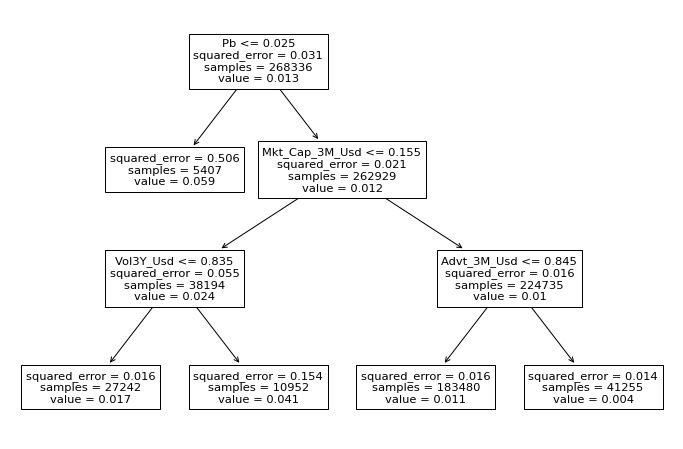

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize = (12, 8))
plot_tree(fit_tree, feature_names = X.columns, ax = ax)
plt.show()

The split is done with a Boolean expression. If the expression is true, then the instance goes to the left cluster; if not, it goes to the right cluster.

The initial split is done with price-to-book ratio. Metrics include number of samples in each node, mean squared error and average value of the label in each node. E.g. the rightmost node with lowest average return satisfy the following conditions:

- Pb score above 0.025
- A 3-month market capitalization score above 0.155
- A score of average daily volume over the past 3 months above 0.845

Note that we have set up some restrictions to avoid some peculiar groups containing a very small number of samples. The complexity of the tree (measured by the number of terminal leaves) is a decreasing function of minbucket, minsplit and cp and an increasing function of maximum depth.

Once the model has been trained, we can use it to predict:

In [34]:
fit_tree.predict(data_ml.iloc[1:6, 2:95])

array([0.01088066, 0.01088066, 0.01088066, 0.01088066, 0.01088066])

As a verification of the first splits, we plot the smoothed average of future returns, conditionally on market capitalization, past return and trading volume.

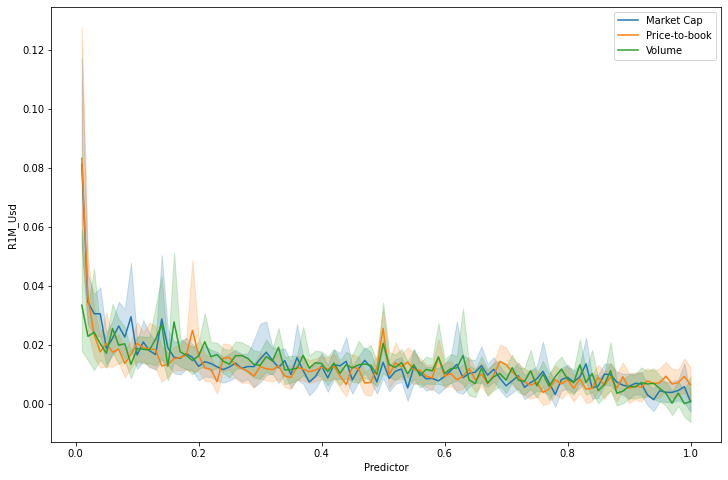

In [44]:
import seaborn as sns
plt.figure(figsize = (12, 8))
sns.lineplot(y = data_ml['R1M_Usd'], x = data_ml['Mkt_Cap_3M_Usd'], label = 'Market Cap')
sns.lineplot(y = data_ml['R1M_Usd'], x = data_ml['Pb'], label = 'Price-to-book')
sns.lineplot(y = data_ml['R1M_Usd'], x = data_ml['Advt_3M_Usd'], label = 'Volume')
plt.xlabel('Predictor')
plt.legend()
plt.show()

The graph shows us that for low values of market cap and price-to-book ratio, the average return is high.

Finally, we assess the predictive quality of a single tree on the testing set (the tree is grown on the training set). We use a deeper tree, with a maximum depth of five.

In [46]:
separation_date = pd.to_datetime('2014-01-15')
training_sample = data_ml[data_ml['date'] < separation_date]
test_sample = data_ml[data_ml['date'] > separation_date]

X_train = training_sample[training_sample.columns[2:95]]
y_train = training_sample['R1M_Usd']

In [49]:
fit_tree2 = DecisionTreeRegressor(min_samples_leaf = 1500, min_samples_split = 4000, max_depth = 5, ccp_alpha = 1e-6)
fit_tree2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=1e-06, max_depth=5, min_samples_leaf=1500,
                      min_samples_split=4000)

In [53]:
import numpy as np

X_test = test_sample[test_sample.columns[2:95]]
y_test = test_sample['R1M_Usd']
np.power(fit_tree2.predict(X_test) - y_test, 2).mean()

0.03700730671331156

In [55]:
(fit_tree2.predict(X_test) * y_test > 0).mean()

0.5416619188696444

Similarly to prediction results in Chapter 5, the mean squared error is usually hard to interpret. The hit ratio is more intuitive because it evaluates the proportion of correct guesses. It's not perfect since 55% of small gains can be mitigated by 45% large losses.

## Random Forests

Main idea: ensembles in which predicting tools are combined.

### Principle

There are two ways to create multiple predictors from simple trees, and random forests combine both:

- First, the model can be trained on similar yet different datasets. One way to achieve this is via *bootstrap*: resampling with/without replacement
- Second, the data can be altered by curtailing the number of predictors. Alternative models are built based on different sets of features. The user chooses how many features to retain and then the algorithm selects these features randomly at each try.

Idea: grow many different trees and the ensemble is simply **a weighted combination** of all trees. The idea is illustrated as following:

![FIGURE 6.4: Combining tree outputs via random forests](images/figure6-4.png)

In classification tasks, the decision is taken by a majority vote: each tree votes for a particular class and the class with the most votes wins (with possible random picks for ties). Breiman (2001) defines the margin function as
$$mg=M^{-1}\sum_{m=1}^M1_{\{h_m(\boldsymbol{x})=y\}}-\max_{j\neq y}\left(M^{-1}\sum_{m=1}^M1_{\{h_m(\boldsymbol{x})=j\}}\right)$$
where the left part is the average number of votes based on the $M$ trees $h_m$ for the correct class. The right part is the maximum average for other class. The margin reflects *the confidence that the aggregate forest will classify properly.* Breiman (2001) shows that the inaccuracy of the aggregation (as measured by generalization error) is bounded by $\bar{\rho}(1-s^2)/s^2$, where

- $s$ is the strength (average quality) of individual classifiers and
- $\bar{\rho}$ is the average correlation between the learners

Notably, Breiman (2001) also shows that as the number of trees grows to infinity, *the inaccuracy converges to some finite number* which explains why **random forests are not prone to overfitting**.

Regression trees are also discussed in Biau (2012) and Scornet et al. (2015).

### Code and Results

In [61]:
from sklearn.ensemble import RandomForestRegressor

fit_rf = RandomForestRegressor(# bootstrap = False,
                               max_samples = 10000, 
                               n_estimators = 40,
                               max_features = 30,
                               min_samples_split = 250)
fit_rf.fit(X_train, y_train)

RandomForestRegressor(max_features=30, max_samples=10000, min_samples_split=250,
                      n_estimators=40)

In [64]:
fit_rf.predict(X_test[:5])

array([0.00675203, 0.01451932, 0.00950345, 0.00570163, 0.0223777 ])

One first comment is that each instance has its own prediction, which contrasts with the outcome of simple tree-based outcomes. In the above example, each individual learner (tree) is built on 10,000 randomly chosen instances and each terminal leaf (cluster) must comprise at least 250 elements (observations). In total, 40 trees are aggregated and each tree is constructed based on 30 randomly chosen predictors (out of the whole set of features).

Unlike simple trees, the learning process of random forest is hard to illustrate. A simplified view can be obtained via variable importance. Please refer to further details in Chapter 13.

Finally, we can assess the accuracy of the model.

In [66]:
np.power(fit_rf.predict(X_test) - y_test, 2).mean()

0.03695441541183705

In [68]:
(fit_rf.predict(X_test) * y_test > 0).mean()

0.537075546946217

The MSE is smaller than 4% and the hit ratio is close to 54%, which is reasonably above both 50% and 52% thresholds.

Let’s see if we can improve the hit ratio by resorting to a classification exercise. We start by training the model on a new formula (the label is `R1M_Usd_C`).

In [70]:
from sklearn.ensemble import RandomForestClassifier
fit_rf_c = RandomForestClassifier(n_estimators = 40,
                                  min_samples_split = 250,
                                  max_features = 30,
                                  max_samples = 20000)

y_train_c = training_sample['R1M_Usd_C']
fit_rf_c.fit(X_train, y_train_c)

RandomForestClassifier(max_features=30, max_samples=20000,
                       min_samples_split=250, n_estimators=40)

In [71]:
y_test_c = test_sample['R1M_Usd_C']
(fit_rf_c.predict(X_test) == y_test_c).mean()

0.5000712169553327

The accuracy is disappointing. There are two potential explanations for this (beyond the possibility of very different patterns in the training and testing sets):

- Sample size can be too small. We only retain ~10% of the observation.
- Number of predictors is set at 30, only 1/3 of the total at our disposal. This may leave room for the algorithm to pick less pertinent predictors.

The default number of predictors by routines are $\sqrt{p}$ and $p/3$ for classification and regression tasks, where $p$ is the total number of features.

## Boosted Trees: AdaBoost

The idea of boosting is slightly more advanced compared to agnostic aggregation. In random forest, we hope that the diversification through many trees will improve the overall quality of the model. In boosting, it is sought to iteratively improve the model whenever a new tree is added. We will try `AdaBoost` (for adaptive boosting, progressively focusing on the instances that yield the largest errors) and `XGBoost` (flexible, only focused on the minimization of training sample loss).

### Methodology

Origins: Freund and Schapire (1997), Freund and Schapire (1996) and the book dedicated on boosting Schapire and Freund (2012). The algorithm is as follows:

- Set equal weights $w_i=I^{-1}$;
- For $m=1,\dots,M$, do:
  1. Find a learner $l_m$ that minimizes the weighted loss $\sum_{i=1}^I w_i L(l_m(\boldsymbol{x}_i), \boldsymbol{y}_i)$
  2. Compute a learner weight $$a_m=f_a(\boldsymbol{w}, l_m(\boldsymbol{x}), \boldsymbol{y})$$
  3. Update the instance weights $$w_i \leftarrow w_i e^{f_w(\boldsymbol{w}, l_m(\boldsymbol{x}_i), \boldsymbol{y}_i)}$$
  4. Normalize $w_i$ to sum to one.
- The output for instance $\boldsymbol{x}_i$ is a simple function of $\sum_{m=1}^M a_m l_m(\boldsymbol{x}_i)$ as following: $$\tilde{y}_i=f_y\left(\sum_{m=1}^M a_ml_m(\textbf{x}_i) \right)$$

The formulation holds for many variations and we discuss the steps as follows:

1. The first step seeks to find a learner (maybe a tree in this case) that minimizes a weighted loss. The base loss function $L$ especially *depends on the task* (regression vs classfication).
2. The second and third steps are the heart of AdaBoost: sequential adaptation. A natural property (for $f_a$) should be that *a learner that yields a smaller error should have a larger weight because it is more accurate.*
3. The third step is to change the weights of observations. $f_w$ is constructed to give more weight on observations for which the current model does not do a good job (i.e., generates the largest errors). Hence, the next learner will be incentivized to pay more attention on these pathological cases.
4. The final step is a simple scaling (unification) procedure.

Below we detail some examples of weighting functions. Interested readers can have a look at other possibilities in Schapire (2003) and Ridgeway, Madigan, and Richardson (1999).

|  | Bin. classif. (orig. AdaBoost) | Regression (Drucker, 1997) |
| :--: | :--: | :--: |
| Individual Error | $\epsilon_i = \boldsymbol{1}_{y_1\neq l_m(\boldsymbol{x}_i)}$ | $\epsilon_i=\dfrac{\|y_i-l_m(\boldsymbol{x}_i)\|}{\max_i \|y_i-l_m(\boldsymbol{x}_i)\|}$ |
| Weight of learner via $f_a$ | $\epsilon=I^{-1}\sum_{i=1}^Iw_i \epsilon_i$, with $\epsilon=I^{-1}\sum_{i=1}^Iw_i \epsilon_i$ | $\epsilon=I^{-1}\sum_{i=1}^Iw_i \epsilon_i$, with $\epsilon=I^{-1}\sum_{i=1}^Iw_i \epsilon_i$ |
| Weight of instances via $f_w(i)$ | $f_w=f_a\epsilon_i$ | $f_w=f_a\epsilon_i$ |
| Output function via $f_y$ | $f_y(x)=\text{sign}(x)$ | weighted median of predictions |

The basic error term $\epsilon_i = \boldsymbol{1}_{y_1\neq l_m(\boldsymbol{x}_i)}$ is a dummy number indicating if the prediction is correct (binary case). The average error $\epsilon \in [0,1]$ is simply a weighted average of individual errors and the weight of the $m^{th}$ learner is given by $a_m=\log(\frac{1-\epsilon}{\epsilon})$. The function $x\mapsto \log((1-x)x^{-1})$ decreases on $[0,1]$ and switches sign (from positive to negative) at $x=1/2$. Hence, when the average error is small (or large), the learner will obtain a large positive (or even negative, which is obvious since $\epsilon>1/2$ indicates a problem) weight.

The change in instance weights follows a similar logic. The new weight is proportional to $w_i (\frac{1-\epsilon}{\epsilon})^{\epsilon_i}$. If the prediction is right and $\epsilon_i=0$, then the weight will remain unchanged. If the prediction is wrong and $\epsilon_i=1$, then the weight is adjusted. If the error is small and the learner is efficient ($\epsilon<1/2$) then $(1-\epsilon)/\epsilon>1$ and the weight of the instance will increase for new learners to focus more on it.

Lastly, the final prediction of the model corresponds to the sign of the weighted sum of individual predictions: positive -> +1, otherwise -> -1.

There are two ways to deal with instance weighting. The first one works at the level of the loss functions. For regression trees, Equation (6.1) would naturally generalize to
$$V^{(k)}_N(c^{(k}), \boldsymbol{w})= \sum_{x_i^{(k)}<c^{(k)}}w_i\left(y_i-m_N^{k,-}(c^{(k)}) \right)^2 + \sum_{x_i^{(k)}>c^{(k)}}w_i\left(y_i-m_N^{k,+}(c^{(k)}) \right)^2$$
and hence an instance with a large weight $w_i$ would contribute more to the dispersion of the cluster. For classification objectives the alternation is more complex and you may refer to Ting (2002).

The second way to enforce instance weighting is via *random sampling*. If instances have weights $w_i$, then the training of learners can be performed over a sample that is randomly extracted with distribution equal to $w_i$ (in fact, the original Adaboost algorithm relies on this method).

### Illustration

Below, we test an implementation of the original adaboost classifier. As such, we work with the R1M_Usd_C variable and change the model formula. The computational cost of adaboost is high on large datasets, thus we work with a smaller sample and we only impose three iterations.

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

fit_adaboost_C = AdaBoostClassifier(DecisionTreeClassifier(
        max_depth = 3), # depth of the tree
        n_estimators = 3) # Number of trees 
fit_adaboost_C.fit(X_train, y_train_c) # Fitting the model

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=3)

In [73]:
(fit_adaboost_C.predict(X_test) == y_test_c).mean()

0.49641066545123064

The accuracy (as evaluated by the hit ratio) is clearly not satisfactory. One reason for this may be the restrictions we enforced for the training (smaller sample and only three trees).

## Boosted Trees: Extreme Gradient Boosting

The idea of tree bossting can be generalized as following: at each step $s$, the sum of models $M_S=\sum_{s=1}^{S-1} m_s+m_S$ is such that the last learner $m_S$ was precisely designed to reduce the loss of $M_S$ on the training sample.

XGBoost is originally proposed by Chen and Guestrin (2016) with incredibly accurate predictions and is highly customizable. The other popular alternative is LightGBM (Ke et al., 2017). XGBoost seeks to minimize the objective 
$$O=\underbrace{\sum_{i=1}^I \text{loss}(y_i,\tilde{y}_i)}_{\text{error term}} \quad + \underbrace{\sum_{j=1}^J\Omega(T_j)}_{\text{regularisation term}}$$
The first term (over all instances) measures the distance between the true label and the output from the model. The secon term *penalizes models that are too complex.*

For simplicity, we propose the full derivation with the simplest loss function $Loss(y, \tilde{y})=(y-\tilde{y})^2$, so that
$$O=\sum_{i=1}^I \left(y_i-m_{J-1}(\boldsymbol{x}_i)-T_J(\boldsymbol{x}_i)\right)^2+ \sum_{j=1}^J\Omega(T_j)$$

### Managing Loss

Let us assume that we have already built all trees $T_j$ up to $j=1,\dots,J-1$ (and hence model $M_{J-1}$). Then, *how to choose tree $T_j$ optimally*? We rewrite
\begin{align*}
O&=\sum_{i=1}^I \left(y_i-m_{J-1}(\mathbf{x}_i)-T_J(\mathbf{x}_i)\right)^2+ \sum_{j=1}^J\Omega(T_j) \\
&=\sum_{i=1}^I\left\{y_i^2+m_{J-1}(\mathbf{x}_i)^2+T_J(\mathbf{x}_i)^2 \right\} + \sum_{j=1}^{J-1}\Omega(T_j)+\Omega(T_J) \quad \text{(squared terms + penalisation)}\\
& \quad -2 \sum_{i=1}^I\left\{y_im_{J-1}(\mathbf{x}_i)+y_iT_J(\mathbf{x}_i)-m_{J-1}(\mathbf{x}_i) T_J(\mathbf{x}_i))\right\}\quad \text{(cross terms)} \\
&= \sum_{i=1}^I\left\{-2 y_iT_J(\mathbf{x}_i)+2m_{J-1}(\mathbf{x}_i) T_J(\mathbf{x}_i))+T_J(\mathbf{x}_i)^2 \right\} +\Omega(T_J) + c
\end{align*}
All terms known at step $J$ (i.e. indexed by $J-1$) vanish because they do not enter the optimization scheme and are embedded in the constant $c$.

Things are fairly simple with the quadratic loss. For more complicated loss functions, Taylor expansions are used.

### Penalization

For a given tree $T$, we specify its structure by $T(x)=w_{q(x)}$, where $w$ is the output value of some leaf $q(\cdot)$ is the function that maps an input to its final leaf. The function $q$ indicates the path, while the vector $\boldsymbol{w}=w_i$ codes the terminal leaf values.

![FIGURE 6.5: Coding a decision tree: decomposition between structure and node and leaf values.](images/figure6-5.png)

We write $l=1,\dots,L$ for the indices of the leaves of the tree. In XGBoost, complexity is defined as
$$\Omega(T)=\gamma L+\frac{\lambda}{2}\sum_{l=1}^Lw_l^2$$
where

- The first term penalizes the **total number of leaves**;
- The second term penalizes **the magnitude of output values** (which helps reduce variance)

The first penalization term *reduces the depth of the tree*, while the second *shrinks the size of the adjustments that will come from the latest tree*.

### Aggregation

We aggregate both sections of the objective (loss and penalization). We write $I_l$ for the set of the indices of the instances belonging to leaf $l$. Then
\begin{align*}
O&= 2\sum_{i=1}^I\left\{ -y_iT_J(\mathbf{x}_i)+m_{J-1}(\mathbf{x}_i) T_J(\mathbf{x}_i)+\frac{T_J(\mathbf{x}_i)^2}{2} \right\} + \gamma L+\frac{\lambda}{2}\sum_{l=1}^Lw_l^2 \\
&=2\sum_{i=1}^I\left\{- y_iw_{q(\mathbf{x}_i)}+m_{J-1}(\mathbf{x}_i)w_{q(\mathbf{x}_i)}+\frac{w_{q(\mathbf{x}_i)}^2}{2} \right\} + \gamma L+\frac{\lambda}{2}\sum_{l=1}^Lw_l^2 \\
&=2 \sum_{l=1}^L \left(w_l\sum_{i\in I_l}(-y_i +m_{J-1}(\mathbf{x}_i))+ \frac{w_l^2}{2}\sum_{i\in I_l}\left(1+\frac{\lambda}{2}\right)\right)+ \gamma L
\end{align*}
The function is of the form $aw_l+\frac{b}{2}w_l^2$, which has minimum values $-a^2/(2b)$ at point $w_l=-a/b$. Thus, writing $\#(.)$ for the cardinal function that counts the number of items in a set
\begin{align*}
\mathbf{\rightarrow} \quad w^*_l&=\frac{\sum_{i\in I_l}(y_i -m_{J-1}(\mathbf{x}_i))}{\left(1+\frac{\lambda}{2}\right)\#\{i\in I_l\}}, \text{ so that} \\
O_L(q)&=-\frac{1}{2}\sum_{l=1}^L \frac{\left(\sum_{i\in I_l}(y_i -m_{J-1}(\mathbf{x}_i))\right)^2}{\left(1+\frac{\lambda}{2}\right)\#\{i\in I_l\}}+\gamma L
\end{align*}
where we added the dependence of the objective both in $q$ (structure of tree) and $L$ (number of leaves). Indeed, the meta-shape of the tree remains to be determined.

### Tree Structure

Similar to simple trees: features must be tested in order to pick one that minimizes the objective for each given split. What's the best depth and when to stop growing the tree?

- Proceed node-by-node
- For each node, look at whether a split is useful or not $$\text{Gain}=\frac{1}{2}\left(\text{Gain}_L+\text{Gain}_R-\text{Gain}_O \right)-\gamma$$
- Each gain is computed with respect to the instances in each bucket (cluster): $$\text{Gain}_{\mathcal{X}}= \frac{\left(\sum_{i\in I_{\mathcal{X}}}(y_i -m_{J-1}(\mathbf{x}_i))\right)^2}{\left(1+\frac{\lambda}{2}\right)\#\{i\in I_{\mathcal{X}}\}}$$ where $I_{\mathcal{X}}$ is the set of instances within cluster $\mathcal{X}$.

$\text{Gain}_{O}$ is the original gain (without split), and $\text{Gain}_{L}$ and $\text{Gain}_{R}$ are the gains of the left and right clusters respectively. The $-\gamma$ term measures a penalization: adding a split will makes *one leaf difference*, hence $\Delta L=1$ and the penalization intensity is $\gamma$.

Lastly, we underline the fact that XGBoost also applies a **learning rate**: each new tree is scaled by a factor $\eta$ with $\eta \in [0,1]$. After each step of boosting the new tree $T_J$ sees its values discounted by multiplying them by $\eta$.

### Extensions

Several additional features are available to further prevent boosted trees to overfit.

- Rashmi and Gilad-Bachrach (2015): the *DART* (Dropout for Additive Regression Trees). Thd idea is to omit a specified number of trees (chosen randomly) during training. The full specifications can be found [here](https://xgboost.readthedocs.io/en/latest/tutorials/dart.html).
- Monotonicity constraints: one particular feature has a monotonic impact on the label. You may refer to Figure 6.6 below to see how the algorithm proceeds. If a split violates the bounds given by previous splits for acceptable values, it is *overlooked* and *another variable will be chosen instead*.

![FIGURE 6.6: Imposing monotonic constraints. The constraints are shown in bold blue in the bottom leaves.](images/figure6-6.png)

### Code and Results

For Python, we will choose the `xgboost` library. Moreover, because training times can be long, we shorten the training sample as advocated in Coqueret and Guida (2020). We retain only the 40% most extreme observations (in terms of label values: top 20% and bottom 20%) and work with the small subset of features. In all coding sections dedicated to boosted trees in this book, the models will be trained with only 7 features.

In [81]:
import xgboost as xgb

r1m_use_quantiles = (training_sample['R1M_Usd'].quantile(0.2), training_sample['R1M_Usd'].quantile(0.8))
features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]

training_samples_xgb = training_sample[(training_sample['R1M_Usd'] < r1m_use_quantiles[0]) | (training_sample['R1M_Usd'] > r1m_use_quantiles[1])].reset_index().drop(columns = 'index')

training_features_xgb = training_samples_xgb[features_short]
training_label_xgb = training_samples_xgb['R1M_Usd']
train_matrix_xgb = xgb.DMatrix(data = training_features_xgb, label = training_label_xgb)

The second (optional) step is to determine the monotonicity constraints that we want to impose. For simplicity, we will only enforce three constraints on

1. Market capitalization (negative, because large firms have smaller returns under the size anomaly);
2. Price-to-book ratio (negative, because overvalued firms also have smaller returns under the value anomaly);
3. Past annual returns (positive, because winners outperform losers under the momentum anomaly).

In [82]:
# DECREASING in market cap, price-to-book; INCREASING in past return
mono_const = (0, 0, -1, 1, 0, -1, 0)

The third step is to train the model on the formatted training data. We include the monotonicity constraints and the DART feature (via rate_drop). Just like random forests, boosted trees can grow individual trees on subsets of the data: both row-wise (by selecting random instances) and column-wise (by keeping a smaller portion of predictors). These options are implemented below with the subsample and colsample_bytree in the arguments of the function.

For compatibility with `sklearn`, in Python we will try to apply a `sklearn`-like API to complete the training task. The codes are as follows:

In [115]:
fit_xgb = xgb.XGBRegressor(learning_rate = 0.3,
                           max_depth = 4,
                           subsample = 0.6,
                           colsample_bytree = 0.7,
                           reg_lambda = 1,
                           gamma = 0.1,
                           n_estimators = 30,
                           monotone_constraints = mono_const,
                           rate_drop = 0.1,
                           booster = 'dart')
fit_xgb.fit(X = training_features_xgb, y = training_label_xgb)

XGBRegressor(base_score=0.5, booster='dart', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints=(0, 0, -1, 1, 0, -1, 0), n_estimators=30,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Finally, we evaluate the performance of the model. Note that before that, a proper formatting of the testing sample is required.

In [116]:
xgb_test = test_sample[features_short]
np.power(fit_xgb.predict(xgb_test) - test_sample['R1M_Usd'], 2).mean()

0.0373759307683367

In [118]:
(fit_xgb.predict(xgb_test) * test_sample['R1M_Usd'] >= 0).mean()

0.5079193254329991

The performance is comparable to those observed for other predictive tools. As a final exercise, we show one implementation of a classification task under XGBoost. Only the label changes. In XGBoost, labels must be coded with integer number, starting at zero exactly.

When working with categories, the loss function is usually the softmax function (see Section 2.1).

In [105]:
training_label_c = training_samples_xgb['R1M_Usd_C']

fit_xgb_c = xgb.XGBClassifier(learning_rate = 0.8,
                              objective = "multi:softmax",
                              num_class = 2,
                              max_depth = 4,
                              n_estimators = 10,
                              verbosity = 0)
fit_xgb_c.fit(training_features_xgb, training_label_c)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.8, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0, num_class=2,
              num_parallel_tree=1, objective='multi:softmax', ...)

We can then proceed to the assessment of the quality of the model. 

In [111]:
(fit_xgb_c.predict(xgb_test) == test_sample['R1M_Usd_C']).mean()

0.4956130355515041

Consistently with the previous classification attempts, the results are underwhelming, as if switching to binary labels incurred a loss of information.

### Instance Weighting

In the computation of the aggregate loss, it's possible to introduce some flexibility and assign weights to instances:
$$O=\underbrace{\sum_{i=1}^I\mathcal{W}_i \times \text{loss}(y_i,\tilde{y}_i)}_{\text{weighted error term}} \quad + \underbrace{\sum_{j=1}^J\Omega(T_j)}_{\text{regularization term (unchanged)}}$$
In factor investing, these weights can very well depend on the feature values $(\mathcal{W}_i=\mathcal{W}_i(\boldsymbol{x}_i))$. Weights can be set through some of the following ways:

- Assign more importance to assets with high values of one particular characteristic
- Increase weights when the values of the characteristic become extreme (e.g. deep value and deep growth stocks). For uniform features, you may simply set $\mathcal{W}_i(x_i^k) \propto |x_i^k-0.5|$

In XGBoost, the implementation instance weighting is done very early in the definition of the `xgb.DMatrix`. For `sklearn`-like objects, you may specify the parameter `sample_weight` in `XGBRegressor.fit(X, y, sample_weight)`.

In [121]:
inst_weights = np.random.uniform(0, 1, size = training_features_xgb.shape[0])
inst_weights /= sum(inst_weights)
fit_xgb.fit(training_features_xgb, training_label_xgb, sample_weight = inst_weights)

XGBRegressor(base_score=0.5, booster='dart', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints=(0, 0, -1, 1, 0, -1, 0), n_estimators=30,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Then, in the subsequent stages, the optimization will be performed with these hard-coded weights. The splitting points can be altered (via the total weighted loss in clusters) and the terminal weight values (6.5) are also impacted.

## Discussion

- Signals given by ML must be translated into portfolio weights
- **Simple trees appear suboptimal**: tree depth are usually set between 3 and 6, which implies between 8 and 64 terminal leaves at most, with possibly very *unbalanced clusters*. This means that when it comes to predictions, roughly 20% to 30% of the instances will be given the same value.
- This does not permit to discriminate and set a subset if the portfolio requires 100 stocks while 105 stocks have the same signal.
- **Preference to aggregate models!** In practive, random forests and booted trees are best choices.

## Coding Exercises

1. Using the formula in the chunks above, build two simple trees on the training sample with only one parameter: cp. For the first tree, take cp=0.001 and for the second take cp=0.01. Evaluate the performance of both models on the testing sample. Comment.

In [130]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

features = training_sample.columns[2:95]
X_train, y_train, X_test, y_test = training_sample[features], training_sample['R1M_Usd'], test_sample[features], test_sample['R1M_Usd']

fit_tree = DecisionTreeRegressor(ccp_alpha = 0.01)
fit_tree.fit(X_train, y_train) # 193.1s taken to fit

DecisionTreeRegressor(ccp_alpha=0.01)

In [131]:
print('Test Sample MSE:', np.power(fit_tree.predict(X_test) - y_test, 2).mean())
print('Test Sample Hit Ratio:', (fit_tree.predict(X_test) * y_test > 0).mean())

Test Sample MSE: 0.03700730671331156
Test Sample Hit Ratio: 0.5416619188696444


In [ ]:
fit_tree = DecisionTreeRegressor(ccp_alpha = 0.001)
fit_tree.fit(X_train, y_train) #  taken to fit

In [133]:
print('Test Sample MSE:', np.power(fit_tree.predict(X_test) - y_test, 2).mean())
print('Test Sample Hit Ratio:', (fit_tree.predict(X_test) * y_test > 0).mean())

Test Sample MSE: 0.03699695809184935
Test Sample Hit Ratio: 0.5460346399270738


2. With the smaller set of predictors, build random forests on the training sample. Restrict the learning on 30,000 instances and over 5 predictors. Construct the forests on 10, 20, 40, 80 and 160 trees and evaluate their performance on the training sample. Is complexity worthwhile in this case and why?

In [134]:
from sklearn.ensemble import RandomForestRegressor

n_trees = [10, 20, 40, 80, 160]
mses, hit_ratios = [], []

for n_tree in n_trees:
    fit_rf = RandomForestRegressor(max_samples = 30000, 
                                   n_estimators = n_tree,
                                   max_features = 5)
    fit_rf.fit(X_train, y_train)
    mse = np.power(fit_rf.predict(X_test) - y_test, 2).mean()
    hit_ratio = (fit_rf.predict(X_test) * y_test > 0).mean()
    mses.append(mse)
    hit_ratios.append(hit_ratio)
print('MSE:', mses)
print('Hit Ratios:', hit_ratios)

MSE: [0.04253661846926196, 0.03933268492522167, 0.03742240925663674, 0.03722276686730436, 0.036810498494703234]
Hit Ratios: [0.506324065633546, 0.5096712625341842, 0.5180463764813127, 0.523515838650866, 0.5268487921604376]


Trees are by definition random so results can vary from test to test. Overall, large numbers of trees are preferable and the reason is that each new tree tells a new story and diversifies the risk of the whole forest.

3. Plot a tree based on data from calendar year 2008 and then from 2009. Compare.

In [156]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

def plot_tree_year(sample, year):
    training_sample = sample.copy()
    training_sample = training_sample.reset_index().drop(columns = 'index')
    training_sample['year'] = training_sample['date'].apply(lambda x: x.year)
    training_sample_year = training_sample[training_sample['year'] == year]

    X_train, y_train = training_sample_year[features], training_sample_year['R1M_Usd']

    fit_tree = DecisionTreeRegressor(ccp_alpha = 1e-5, max_depth = 2)
    fit_tree.fit(X_train, y_train)

    fig, ax = plt.subplots(figsize = (12, 8))
    plot_tree(fit_tree, feature_names = training_sample_year.columns, ax = ax)
    plt.show()

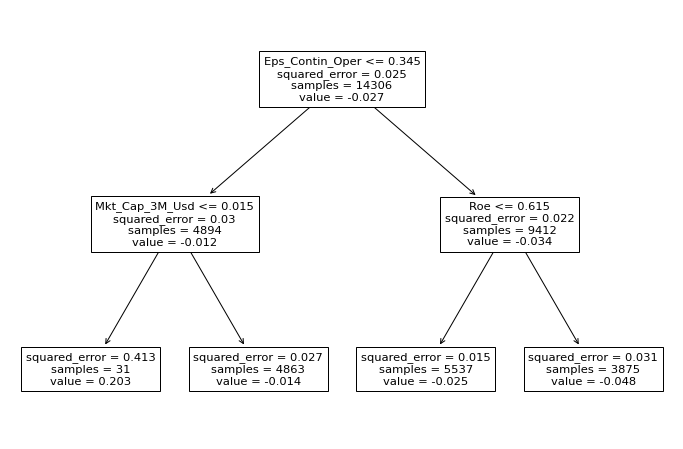

In [157]:
plot_tree_year(training_sample, 2008)

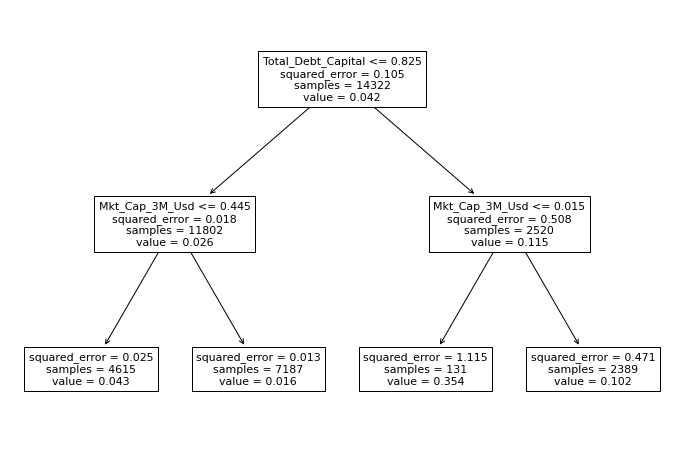

In [158]:
plot_tree_year(training_sample, 2009)

## Takeaways

- Simple Decision Trees
  - Minimize total variability (or dispersion) inside each cluster
  - Impurity metrics: Gini Index, Entropy and the misclassification error
  - Pruning: minimal number of instances within each leaf, minimal sample size for splitting, improving threshold, maximum depth, etc.

- Random Forests
  - Model Aggregation: Bagging
  - Main idea of RF: bootstrap of sample, curtailing the number of predictors, and majority vote (for classification)

- Boosted Trees: AdaBoost
  - Model Aggregation: Boosting
  - Main idea: boosting base learners, increasing the weight of those learner performing well, assigning more weights to instances with large aggregate error (by redefining error functions or random sampling)

- Boosted Trees: XGBoost
  - Boosting, with incredibly good accuracy and customization
  - Penalization for total number of leaves and magnitude of output values, and apply these to tree growth
  - DART for random dropout of trees, monotonicity constraints to constrain that one particular feature has a monotonic impact on the label

- Application in Factor Investing: random forests and boosted trees are suggested for better discrimination with stocks

# Neural Networks

- NNs: actually have little to do with human brain (of which we know not that much), and are often referred to as *artificial neural networks*. 
- ``Chains of differentiable, parameterised geometric functions, trained with gradient descent (with gradients obtained via the chain rule)``
- You may refer to the original chapter [here](https://www.mlfactor.com/NN.html) for some up-to-date researches on neural networks (on the predictive ability in financial markets).

## The original perceptron

- Rosenblatt (1958) for binary classification, a 'perceptron' model:
$$
f(\mathbf{x})=\left\{\begin{array}{lll}
1 & \text{if } \mathbf{x}'\mathbf{w}+b >0\\
0 & \text{otherwise}
\end{array}\right.
$$
The vector of weights $\mathbf{w}$ scales the variables and the bias $b$ shifts the decision barrier. Given $b$ and $w_i$, the error is $\varepsilon_i = y_i-1_{\left\{\sum_{j=1}^Jx_{i,j}w_j+w_0>0\right\}}$. As a custom, we set $b=w_0$ and add an initial column to $x$ as $x_{i,0}=1$ so that $\varepsilon_i = y_i-1_{\left\{\sum_{j=0}^Jx_{i,j}w_j>0\right\}}$.

- No closed-form solutions (as regressions), requiring approximation (by minimizing MSE)
- A simple way:
1. compute the current model value at point $\boldsymbol{x}_i: \tilde{y}_i=1_{\left\{\sum_{j=0}^Jx_{i,j}w_j>0\right\}}$
2. adjust the weight vector $w_j \leftarrow w_j + \eta(y_i-\tilde{y}_i)x_{i,j}$

The scaling factor $\eta$ is called the *learning rate*: preferable to be small to avoid overfitting (but slower convergence).

The mechanism is illustrated as the following figure:

![FIGURE 7.1: Scheme of a perceptron](images/figure7-1.png)

## Multilayer Perceptron

### Introduction and Notations

- "A linear model with activation functions"
- A popular representation can be illustrated as the following figure:

![FIGURE 7.2: Simplified scheme of a multi-layer perceptron](images/figure7-2.png)

A more faithful account of what is going on is laid out in the following figure:

![FIGURE 7.3: Detailed scheme of a perceptron with 2 intermediate layers](images/figure7-3.png)

#### Notations

- Data: $\boldsymbol{X}=x_{i,j}$ as features and $\boldsymbol{y}=y_i$ as output values. $\boldsymbol{x}$ or $\boldsymbol{x}_i$ denotes one line of $\boldsymbol{X}$.
- Number of layers: $L \geq 1$ and for each layer, the number of units $U_l \geq 1$.
- Weights for unit $k$ in layer $l$: $\boldsymbol{w}_k^{(l)}=w_{k,j}^{(l)}$ with biases $b_k^{(l)}$ with shape $(U_{l-1},1)$.
- Outputs (post-activation): $o_{i,k}^{(l)}$ for instance $i$, layer $l$ and unit $k$.

#### Process
The initial linear mapping:
$$v_{i,k}^{(1)}=\boldsymbol{x}_i'\boldsymbol{w}^{(1)}_k+b_k^{(1)},  \text{for } l=1, \quad k \in [1,U_1]$$
which is then transformed by a non-linear function $f^{(1)}$. The result of this alteration is then given as input of the next layer and so on. The linear forms will be repeated (with different weights) for each layer of the network:
$$v_{i,k}^{(l)}=(\boldsymbol{o}^{(l-1)}_i)'\boldsymbol{w}^{(l)}_k+b_k^{(l)}, \text{for } l \ge 2,  \quad k \in [1,U_l]$$
The connections between the layers are the so-called outputs, which are basically the linear mappings to which the activation functions $f^{(l)}$ have been applied. The output of layer $l$ is the input of layer $l+1$:
$$o_{i,k}^{(l)}=f^{(l)}\left(v_{i,k}^{(l)}\right)$$
Finally, the terminal stage aggregates the outputs from the last layer:
$$\tilde{y}_i =f^{(L+1)} \left((\boldsymbol{o}^{(L)}_i)'\boldsymbol{w}^{(L+1)}+b^{(L+1)}\right)$$

- Some common activation functions are illustrated as:

![FIGURE 7.4: Plot of the most common activation functions](images/figure7-4.png)

- Final activation function after the output: sometimes useful (`softmax` in classification tasks), be careful especially for *regression* tasks.

### Universal Approximator

- Given *any* bounded continuous function, there exists *a one-layer network* that can approximate this function up to arbitrary precision 
  - Cybenko (1989) for early references
  - section 4.2 in Du and Swamy (2013) and section 6.4.1 in Goodfellow et al. (2016) for more exhaustive lists of papers
  - Guliyev and Ismailov (2018) for recent results

- Formally, a one-layer perceptron is defined by
$$f_n(\boldsymbol{x})=\sum_{l=1}^nc_l\phi(\boldsymbol{x}\boldsymbol{w}_l+\boldsymbol{b}_l)+c_0$$
where $\phi$ is a (non-constant) bounded continuous function. Then, for any $\varepsilon>0$, it is possible to find one $n$ such that for any continuous function $f$ on the unit hypercube $[0, 1]^d$,
$$|f(\textbf{x})-f_n(\textbf{x})|< \epsilon, \quad \forall \textbf{x} \in [0,1]^d$$
- Intuition: add units to improve the fit
- Similar for polynomial approximation: see Costarelli et al. (2016)
- Speed of convergence: see Barron (1993), related to size
- For a neural network with only 1 intermediate layer with $n$ units and *sigmoid* activation function and MSE as the metric for the regression task. For $N$ randomly sampled i.i.d. points $y_i=f(x_i)+\varepsilon_i$ on which $f_n$ is trained, the best possible empirical MSE behaves like
$$\mathbb{E}\left[(f(x)-f_n(x))^2 \right]=\underbrace{O\left(\frac{c_f}{n} \right)}_{\text{size of network}}+\ \underbrace{O\left(\frac{nK \log(N)}{N} \right)}_{\text{size of sample}}$$
where $K$ is the dimension of the input and $c_f$ is a constant that depends on the generator function $f$. **Two components**:
1. *Complexity of the network*: the error decreases with the number of units in the network.
2. *Number of observations*: the error decreases at a slightly slower
pace with respect to the number of observations $(\log(N)/N)$ and is linear in the number of units and the size of the input.

Large sample + Small network / Small sample + Large network: both won't work!

## Learning via Back-propagation

Loss function with penalization:
$$O=\sum_{i=1}^I \text{loss}(y_i,\tilde{y}_i)+ \text{penalization}$$
where $\tilde{y}_i$ are the values obtained by the model and $y_i$ are the true values of the instances (a simple requirement is that the loss function be differentiable).

Given $y_i$ fixed, let us write $D(\tilde{y}_i(\textbf{W}))=\text{loss}(y_i,\tilde{y}_i)$, where $\textbf{W}$ denotes the entirety of weights and biases in the network. Weights are updated via *gradient descent*:
$$\textbf{W} \leftarrow \textbf{W}-\eta  \frac{\partial D(\tilde{y}_i) }{\partial \textbf{W}}$$
The mechanism (and the effect of the learning rate $\eta$) is illustrated as following:

![FIGURE 7.5: Outline of gradient descent](images/figure7-5.png)

The above task (for differentiation) can be computationally expensive if there are many layers and requires the chain rule. A possible way to approximate is the *finite difference method*. For differentiable losses:
$$\frac{\partial D(\tilde{y}_i(w_k))}{\partial w_k} = \frac{D(\tilde{y}_i(w_k+h))-D(\tilde{y}_i(w_k-h))}{2h}+O(h^2)$$
where $h>0$ is some arbitrarily small number. However, this is also computationally costly because it requires a number of operations of the magnitude of the number of weights. A small trick is to *simply follow the chain rule and recycle terms along the way*.

Let us start by recalling
$$\tilde{y}_i =f^{(L+1)} \left((\boldsymbol{o}^{(L)}_i)'\boldsymbol{w}^{(L+1)}+b^{(L+1)}\right)=f^{(L+1)}\left(b^{(L+1)}+\sum_{k=1}^{U_L} w^{(L+1)}_ko^{(L)}_{i,k} \right)$$
so that if we differentiate with the most immediate weights and biases, we get
\begin{align*}
\frac{\partial D(\tilde{y}_i)}{\partial w_k^{(L+1)}}&=D'(\tilde{y}_i) \left(f^{(L+1)} \right)'\left( b^{(L+1)}+\sum_{k=1}^{U_L} w^{(L+1)}_ko^{(L)}_{i,k}  \right)o^{(L)}_{i,k} \\
&= D'(\tilde{y}_i) \left(f^{(L+1)} \right)'\left( v^{(L+1)}_{i,k}  \right)o^{(L)}_{i,k} \\
\frac{\partial D(\tilde{y}_i)}{\partial b^{(L+1)}}&=D'(\tilde{y}_i) \left(f^{(L+1)} \right)'\left( b^{(L+1)}+\sum_{k=1}^{U_L} w^{(L+1)}_ko^{(L)}_{i,k}  \right). 
\end{align*}
Now we must go back one layer and this can only be done via the chain rule. To access layer $L$, we recall identity $v_{i,k}^{(L)}=(\boldsymbol{o}^{(L-1)}_i)'\boldsymbol{w}^{(L)}_k+b_k^{(L)}=b_k^{(L)}+\sum_{j=1}^{U_L}o^{(L-1)}_{i,j}w^{(L)}_{k,j}$. We can then proceed
\begin{align*}
\frac{\partial D(\tilde{y}_i)}{\partial w_{k,j}^{(L)}}&=\frac{\partial D(\tilde{y}_i)}{\partial v^{(L)}_{i,k}}\frac{\partial v^{(L)}_{i,k}}{\partial w_{k,j}^{(L)}} = \frac{\partial D(\tilde{y}_i)}{\partial v^{(L)}_{i,k}}o^{(L-1)}_{i,j}\\
&=\frac{\partial D(\tilde{y}_i)}{\partial o^{(L)}_{i,k}} \frac{\partial o^{(L)}_{i,k} }{\partial v^{(L)}_{i,k}}  o^{(L-1)}_{i,j} = \frac{\partial D(\tilde{y}_i)}{\partial o^{(L)}_{i,k}}  (f^{(L)})'(v_{i,k}^{(L)})  o^{(lL1)}_{i,j} \\
&=\underbrace{D'(\tilde{y}_i) \left(f^{(L+1)} \right)'\left(v^{(L+1)}_{i,k}  \right)}_{\text{computed above!}} w^{(L+1)}_k (f^{(L)})'(v_{i,k}^{(L)})  o^{(L-1)}_{i,j},
\end{align*} 

where the first part of the last line was already computed above and we can *recycle* this number and only focus on the right part of the expression. *This process holds for the computation for weights and biases for any layer $l$*. 

You may refer to the [Google developer team](https://playerground.tensorflow.org) for a nice illustration of this process. When the data is formatted using tensors, it is possible to resort to vectorization so that the number of calls is limited to an order of the magnitude of the number of nodes (units) in the network.

The back-propagation algorithm is then summarized as following:
1. **Forward pass** as described in the following figure;
2. this allows the computation of the error or loss function;
3. all derivatives of this function (w.r.t. weights and biases) are computed, starting from the last layer and diffusing to the left (hence the term back-propagation) - the green arrows show the **backward pass**;
4. all weights and biases can be updated to take the sample points into account (the model is adjusted to reduce the loss/error stemming from these points).

![FIGURE 7.6: Diagram of back-propagation](images/figure7-6.png)

The learning rate $\eta$ can be refined. One option to reduce overfitting is to impose that *after each epoch, the intensity of the update decreases*. One possible parametric form is $\eta=\alpha e^{-\beta t}$, where $t$ is the epoch and $\alpha, \beta>0$. One further sophistication is to resort to so-called momentum (Polyak, 1964):
\begin{align*}
\textbf{W}_{t+1} & \leftarrow  \textbf{W}_{t} - \textbf{m}_t \quad \text{with} \\
\boldsymbol{m}_t & \leftarrow \eta \frac{\partial D(\tilde{y}_i)}{\partial \textbf{W}_{t}}+\gamma \boldsymbol{m}_{t-1}
\end{align*}
where $t$ is the index of the weight update. The idea of momentum is to speed up the convergence by including a memory term of the last adjustment ($\mathbf{m}_{t-1}$) and going in the same direction in the current update. A common choice for $\gamma$ is 0.9.

Some more complex and enhanced methods are:
- Nesterov (1983) improves the momentum term by forecasting the future shift in parameters
- Adagrad (Duchi et al., 2011): a different $\eta$ for each parameter
- Adadelta (Zeiler, 2012) and Adam (Kingma and Ba, 2014): Adagrad + momentum

**Gradient clipping**: avoid *gradient explosion* by setting a maximum magnitude for gradients (usually expressed as a norm) and rescale the gradient surpassing the threshold.

### Further details on classification

For classification tasks with the target *one-hot* label $\boldsymbol{y}_i$, the terminal activation function is generally the so-called `softmax` function. For a total of $J$ classes:
$$\tilde{\textbf{y}}_i=s(\textbf{x})_i=\frac{e^{x_i}}{\sum_{j=1}^Je^{x_j}}$$
which can take any value as input and sums to one over any (finite-valued) output, yielding a 'probability' vector over the classes.

The loss function is usually chosen as the `cross-entropy` loss. Given the target label $\boldsymbol{y}_i=(0,0,\dots,0,1,0,\dots,0)$ and the predicted output $\tilde{\boldsymbol{y}}_i=(\tilde{y}_{i,1},\dots,\tilde{y}_{i,L})$, the cross-entropy is defined as
$$\text{CE}(\boldsymbol{y}_i,\tilde{\boldsymbol{y}}_i)=-\sum_{j=1}^J\log(\tilde{y}_{i,j})y_{i,j}$$
which is a proxy of dissimilarity between the two arguments.

## How deep we should go and other practical issues

### Architectural choices
How big (or deep) the networks should be? Let us start by calculating the number of parameters in a network.

- For the first layer, there are $(U_0+1)U_1$ parameters where $U_0$ is the number of columns in $\mathbb{X}$ and $U_1$ is the number of units in the layer.
- For layer $l \in [2,L]$, there are $(U_{l-1}+1)U_l$ parameters.
- For the final output, there are simply $U_L+1$ parameters.
- In total, we have $\mathcal{N}=\left(\sum_{l=1}^L(U_{l-1}+1)U_l\right)+U_L+1$ parameters to optimize.

It is preferable that the sample size is *at least 10 times larger than* $\mathcal{N}$. Below a ratio of 5, the risk of overfitting is high.

The number of hidden layers (in current financial applications) rarely exceeds 3 or 4. The number of units per layer $(U_k)$ often follows the geometric pyramid rule (see e.g., Masters, 1993). If there are $L$ hidden layers with $I$ features in the input and $O$ dimensions in the output (for regression tasks, $O=1$), then for the $k^{th}$ layer, a rule of thumb for $U_k$ is
$$U_k\approx \left\lfloor O\left( \frac{I}{O}\right)^{\frac{L+1-k}{L+1}}\right\rfloor$$
If there is only one intermediate layer, the recommended proxy is the integer part of $\sqrt{IO}$. Often, the number of layers is *a power of two* for networks are trained with GPUs and TPUs which work optimally when the input have sizes equal to powers of two.

Large architectures do not always perform better than shallow ones (e.g., Gu et al. (2020b) and Orimoloye et al. (2019) for high frequency data, i.e., not factor-based). Take 3-4 hidden layers should be sufficient.

### Frequency of weight updates and learning duration

If the sample size is very large, the updating according to each point is very costly. The updating is then performed on groups of instances (known as **batches**):
$$\textbf{W} \leftarrow \textbf{W}-\eta  \frac{\partial \sum_{i \in \text{batch}} D(\tilde{y}_i)/\text{card}(\text{batch}) }{\partial \textbf{W}}$$

The change in weights is computed over the average loss computed over all instances in the batch:

- **Epoch**: one epoch is reached when each instance of the sample has contributed to the training. Often, training a NN requires a few dozen epochs.
- **Batch size**: the batch size is the number of samples used for one single update of weights.
- **Iterations**: the number of iterations can mean alternatively *the ratio of sample size divided by batch size* or this ratio multiplied by the number of epochs. It’s either the number of weight updates required to reach one epoch or the total number of updates during the whole training.

**Stochastic gradient descent** (SGD): chose a random instance as a batch.
**Mini Batches**: batch size strictly above 1 and chosen randomly without replacement.

The tuning for the number of epochs can depend on the specific tasks.

### Penalization and Dropout

Just as for tree methods, **penalization** helps slow down the learning to prevent overfitting on the training sample. The mathematical form:
$$O=\sum_{i=1}^I \text{loss}(y_i,\tilde{y}_i)+ \sum_{k} \lambda_k||\textbf{W}_k||_1+ \sum_j\delta_j||\textbf{W}_j||_2^2$$
where the subscripts $k$ and $j$ pertain to the weights to which the $L^1$ and (or) $L^2$ penalization is applied. 

Additionally, two types of **constraints** that can be enforced to weights:
- **Norm constraints**: a maximum norm is fixed for weight vectors or matrices
- **Non-negativity constraints**: all weights must be positive or zero.

**Dropouts**: reduce the risk of overfitting by simply reducing the size of the model (Srivastava et al., 2014). The weights of randomly chosen units are set to 0 and all links from and to the units are ignored, which mechanically shrinks the networks (when testing, the units are back and the weights are scaled to account for the missing activations due to dropouts).

Some readings:
- Bengio (2012) and Smith (2018): how to configure neural networks
- Lee (2020): hyperparameter tuning for stock return prediction

## Code samples and comments for vanilla MLP

We will use the [`Keras`](https://keras.io) framework (which is the high level API of [`Tensorflow`](https://www.tensorflow.org)).

### Regression Example

Before we head to the core of the NN, a short stage of data preparation is required. The data must be sort into 4 parts as training VS testing and labels VS features.

In [3]:
import pandas as pd

data_ml = pd.read_pickle('./data/data_ml.pkl')
X = data_ml[data_ml.columns[2:95]]
y = data_ml['R1M_Usd']

separation_date = pd.to_datetime('2014-01-15')
training_sample = data_ml[data_ml['date'] < separation_date]
test_sample = data_ml[data_ml['date'] > separation_date]

NN_train_features = training_sample[training_sample.columns[2:95]]
NN_train_labels = training_sample['R1M_Usd']
NN_test_features = test_sample[test_sample.columns[2:95]]
NN_test_labels = test_sample['R1M_Usd']

In `Keras`, the training of NNs is performed through 3 steps:

1. Defining the structure/architecture of the network
2. Setting the loss function and learning process (options on the updating of weights)
3. Train by specifying the batch sizes and number of rounds (epochs)

In [6]:
import keras
from keras.layers import Dense, Flatten, Input
from keras import Model
import keras.backend as K

K.clear_session()
input_layer = Input((NN_train_features.shape[1], ))
x = input_layer
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='tanh')(x)
x = Dense(1)(x) # No activation means linear activation: f(x) = x
output_layer = x
model = Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 93)]              0         
                                                                 
 dense (Dense)               (None, 16)                1504      
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,649
Trainable params: 1,649
Non-trainable params: 0
_________________________________________________________________


The definition of the structure is very intuitive and as my custom I would not like to use the alternative `Sequential` syntax. The input is iteratively transformed by a layer until the last iteration which gives the output. 

The activations that are currently available are listed [here](
https://keras.io/activations/). We use `tanh` on the second-to-last layer to yield both positive and negative outputs.

In [7]:
model.compile(
    loss='mse',
    optimizer='RMSprop',
    metrics=['mae']
)

We also notice that the summary of the model which lists the layers in their order from input to output. Because we are working with 93 features, the number of parameters for the first layer (16 units) is 93 plus one (for the bias) multiplied by 16, which makes 1504. For the second layer, the number of inputs is equal to the size of the output from the previous layer (16). Hence given the fact that the second layer has 8 units, the total number of parameters is $(16+1)*8 = 136$.

We set the loss function to the standard mean squared error. Other losses are listed [here](https://keras.io/losses/), some of them work only for regressions and others only for classification. 

The RMS propragation optimizer is the classical mini-batch back-propagation implementation. For other weight updating algorithms, we refer to [this website](https://keras.io/optimizers/). 

The metrics are used to measure the quality of the model. It can be different from the loss: for instance, using entropy for training and accuracy as the performance metric.

The final stage fits the model to the data and requires some additional training parameters:

In [8]:
fit_NN = model.fit(
    NN_train_features, NN_train_labels,
    epochs = 10, batch_size = 512,
    validation_data = (NN_test_features, NN_test_labels)
)

Epoch 1/10
387/387 [==============================] - 7s 6ms/step - loss: 0.0426 - mae: 0.1015 - val_loss: 0.0370 - val_mae: 0.0669
Epoch 2/10
387/387 [==============================] - 2s 4ms/step - loss: 0.0290 - mae: 0.0839 - val_loss: 0.0370 - val_mae: 0.0668
Epoch 3/10
387/387 [==============================] - 2s 5ms/step - loss: 0.0290 - mae: 0.0839 - val_loss: 0.0372 - val_mae: 0.0680
Epoch 4/10
387/387 [==============================] - 2s 5ms/step - loss: 0.0289 - mae: 0.0838 - val_loss: 0.0370 - val_mae: 0.0669
Epoch 5/10
387/387 [==============================] - 2s 6ms/step - loss: 0.0289 - mae: 0.0839 - val_loss: 0.0370 - val_mae: 0.0668
Epoch 6/10
387/387 [==============================] - 2s 6ms/step - loss: 0.0289 - mae: 0.0839 - val_loss: 0.0370 - val_mae: 0.0665
Epoch 7/10
387/387 [==============================] - 2s 6ms/step - loss: 0.0289 - mae: 0.0838 - val_loss: 0.0369 - val_mae: 0.0667
Epoch 8/10
387/387 [==============================] - 3s 8ms/step - loss: 0.

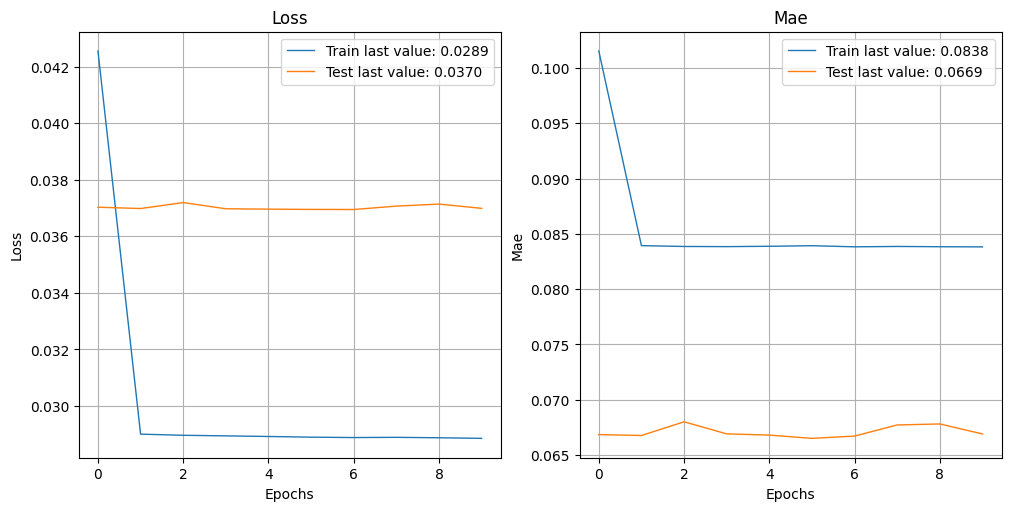

In [9]:
from plot_keras_history import show_history, plot_history

show_history(fit_NN)

You can see 4 different curves in the above figure produced by a nice designed API `plot_keras_history.show_history`. When the impact is negligible on the testing sample (the curve is flat, as is the case here), the model fails to generalize out-of-sample and seems to be learning noise.

The second graph with MAE as the metric shows the same behavior. You may use `model.get_weights()` to get the parameters of the model which is quite unnecessary here since there are thousands of weights.

Finally, from a practical point of view, the prediction is obtained via the usual `model.predict()` method. We use this method below on the testing sample to calculate the hit ratio.

In [16]:
label_prediction = model.predict(NN_test_features)

2194/2194 [==============================] - 3s 2ms/step


In [22]:
import numpy as np
np.mean(label_prediction.reshape(1, -1)[0] * NN_test_labels > 0) # Hit ratio

0.5281164539653601

Again, the hit ratio lies between 50% and 55%, which seems reasonably good. Most of the time, neural networks have their weights initialized randomly. Hence, two independently trained networks with the same architecture and same training data may well lead to very different predictions and performance. You may bypass this by using the `model.set_weights()` method.

### Classification Example

We pursue our exploration of neural networks with a much more detailed example. We will carry out a classification task on the binary label `R1M_Usd_C`.

Before we proceed, we need to format the label properly. To this purpose, we resort to one-hot encoding.

In [25]:
from keras.utils import to_categorical

NN_train_labels_C = to_categorical(training_sample['R1M_Usd_C'])
NN_test_labels_C = to_categorical(test_sample['R1M_Usd_C'])

The labels `NN_train_labels_C` and `NN_test_labels_C` have two columns: the first flags the instances with above median returns and the second flags those with below median returns. 

Below, we set the structure of the networks with many additional features compared to the first one.

In [29]:
from keras.constraints import non_neg
from keras.layers import Dropout
from keras.initializers import Constant
from keras.regularizers import L2

K.clear_session()
input_layer = Input((NN_train_features.shape[1], ))
x = input_layer
x = Dense(16, activation='tanh', 
          kernel_initializer="random_normal", 
          kernel_constraint=non_neg()
         )(x)
x = Dropout(0.25)(x)
x = Dense(8, activation='elu',
          bias_initializer=Constant(0.2),
          kernel_regularizer=L2(0.01))(x)
x = Dense(2, activation='softmax')(x) # softmax for classification
output_layer = x
model_C = Model(input_layer, output_layer)
model_C.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 93)]              0         
                                                                 
 dense (Dense)               (None, 16)                1504      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 1,658
Trainable params: 1,658
Non-trainable params: 0
_________________________________________________________________


In `Keras`, weights are referred to as the 'kernel'. The list of initializers is quite long and we suggest the interested reader has a look at the [`Keras` reference](https://keras.io/initializers/). Most of them are random, but some of them are constant.

Another family of options is the constraints and norm penalization that are applied on the weights and biases during training. In the above example, the weights of the first layer are coerced to be non-negative, while the weights of the second layer see their magnitude penalized by a factor $(0.01)$ times their $L^2$ norm.

In [30]:
from keras.optimizers import Adam

model_C.compile(loss='binary_crossentropy',
                optimizer=Adam(0.005, 0.9, 0.95),
                metrics=['categorical_accuracy'])

Note that the loss is cross-entropy (and a binary one because we work with 2 categories), but the more general form is the option `categorical_crossentropy` and works for any number of classes (strictly above 1).

For the `Adam` optimizer, the two betas (0.9 and 0.95) control decay rates for exponentially weighted moving averages used in the update of weights, which are exploited to increase the speed of learning.

In multiclass classification, the accuracy is defined as the average accuracy over all classes and all predictions, or, more detailedly, the proportion of times when the prediction is equal to the realized value.

Finally, we proceed to train the model.

In [31]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor="val_loss",
                         min_delta=0.001,
                         patience=3,
                         verbose=0)

fit_NN_C = model_C.fit(NN_train_features, 
                       NN_train_labels_C,
                       epochs=20, batch_size=512,
                       validation_data=(NN_test_features, NN_test_labels_C),
                    #    verbose=0, 
                       callbacks=[callback])

Epoch 1/20
387/387 [==============================] - 3s 6ms/step - loss: 0.7105 - categorical_accuracy: 0.5014 - val_loss: 0.6932 - val_categorical_accuracy: 0.4963
Epoch 2/20
387/387 [==============================] - 2s 5ms/step - loss: 0.6933 - categorical_accuracy: 0.4998 - val_loss: 0.6933 - val_categorical_accuracy: 0.5035
Epoch 3/20
387/387 [==============================] - 2s 5ms/step - loss: 0.6933 - categorical_accuracy: 0.5011 - val_loss: 0.6932 - val_categorical_accuracy: 0.5036
Epoch 4/20
387/387 [==============================] - 2s 4ms/step - loss: 0.6932 - categorical_accuracy: 0.5019 - val_loss: 0.6933 - val_categorical_accuracy: 0.5037


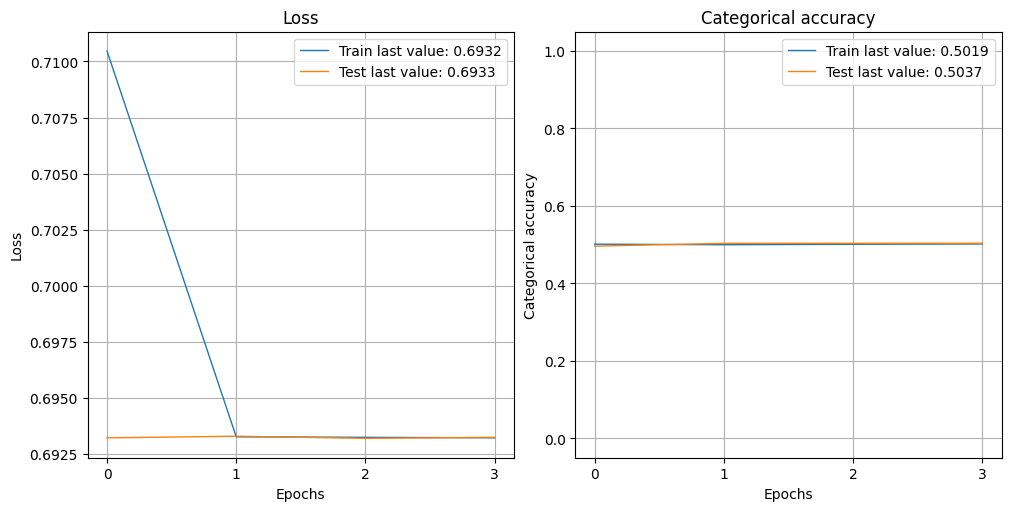

In [32]:
show_history(fit_NN_C)

In `Keras`, callbacks are functions that can be used at given stages of the learning process. In the above example, we use one such function to stop the algorithm when no progress has been made for some time.

When datasets are large, the training can be long, especially when batch sizes are small and/or the number of epochs is high. It is not guaranteed that going to the full number of epochs is useful, as the loss or metric functions may be plateauing much sooner. Hence, it can be very convenient to *stop the process if no improvement is achieved during a specified time-frame*.

In the code above, the improvement is focused on `val_acc` (the alternative is `val_loss`), and the `min_delta` sets the minimum improvement that needs to be attained for the algorithm to continue. The `patience` parameter asserts that the halting decision is made only after three consecutive epochs with no improvement.

Finally, the two graphs yield very different curves. One reason for that is the scale of the second graph. The range of accuracies is very narrow. Any change in this range does not represent much variation overall. The pattern is relatively clear on the training sample: the loss decreases, while the accuracy improves. Unfortunately, this does not translate to the testing sample which indicates that the model does not generalize well out-of-sample.

### Custom Losses

In `Keras`, it's possible to define user-specified loss functions. For instance, the quadratic error has 3 terms $y_i^2$, $\tilde{y}_i^2$ and $-2y_i\tilde{y}_i$. In practice, it can make sense to focus more on the latter term because it is the most essential: *we do want predictions and realized values to have the same sign*! 

Below we show how to optimize on a simple (product) function in `Keras`, $l(y_i,\tilde{y}_i)=(\tilde{y}_i-\tilde{m})^2-\gamma (y_i-m)(\tilde{y}_i-\tilde{m})$, where $m$ and $\tilde{m}$ are the sample averages of $y_i$ and $\tilde{y}_i$, with $\gamma>2$, we give more weight to the cross term.

In [33]:
K.clear_session()
input_layer = Input((NN_train_features.shape[1], ))
x = input_layer
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='sigmoid')(x)
x = Dense(1)(x) # No activation means linear activation: f(x) = x
output_layer = x
model_custom = Model(input_layer, output_layer)
# model.summary()

In [34]:
import tensorflow as tf
def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - tf.reduce_mean(y_pred))) - \
        5 * tf.reduce_mean((y_true - tf.reduce_mean(y_true)) * (y_pred - tf.reduce_mean(y_pred)))

model_custom.compile(
    loss = custom_loss,
    optimizer='RMSprop',
    metrics=['mae']
)

In [35]:
fit_NN_cust = model_custom.fit(
    NN_train_features, NN_train_labels,
    epochs=10, batch_size=512,
    validation_data=(NN_test_features, NN_test_labels)
)

Epoch 1/10
387/387 [==============================] - 3s 6ms/step - loss: -3.3192e-04 - mae: 0.3906 - val_loss: -1.3538e-04 - val_mae: 0.4230
Epoch 2/10
387/387 [==============================] - 2s 5ms/step - loss: -9.1937e-04 - mae: 0.4607 - val_loss: 1.3374e-04 - val_mae: 0.4700
Epoch 3/10
387/387 [==============================] - 2s 5ms/step - loss: -0.0011 - mae: 0.4792 - val_loss: -1.4585e-05 - val_mae: 0.5482
Epoch 4/10
387/387 [==============================] - 2s 5ms/step - loss: -0.0012 - mae: 0.5262 - val_loss: -2.8036e-05 - val_mae: 0.5463
Epoch 5/10
387/387 [==============================] - 2s 5ms/step - loss: -0.0013 - mae: 0.5430 - val_loss: -2.0998e-04 - val_mae: 0.5047
Epoch 6/10
387/387 [==============================] - 2s 5ms/step - loss: -0.0013 - mae: 0.5492 - val_loss: -1.4873e-04 - val_mae: 0.5479
Epoch 7/10
387/387 [==============================] - 4s 10ms/step - loss: -0.0014 - mae: 0.5695 - val_loss: 2.8296e-05 - val_mae: 0.5668
Epoch 8/10
387/387 [=======

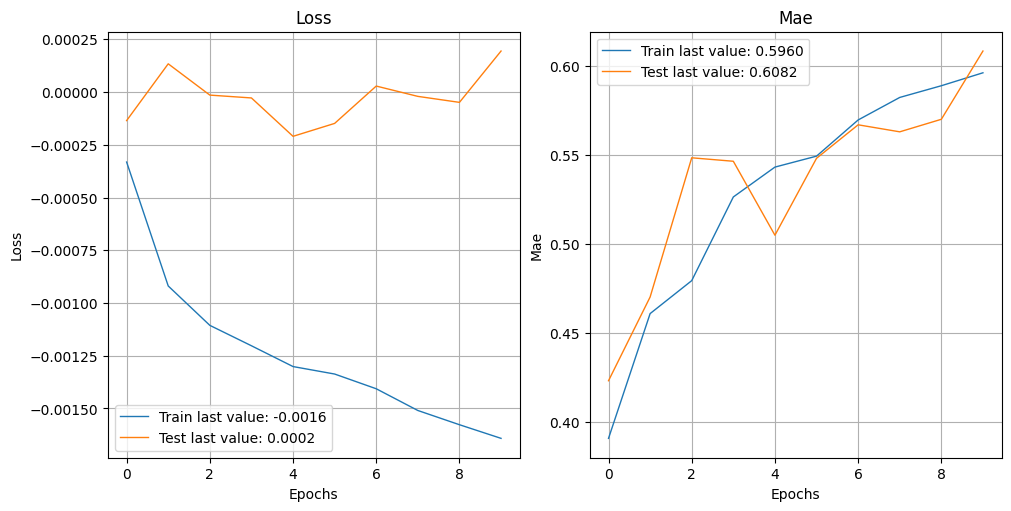

In [36]:
show_history(fit_NN_cust)

The curves may go in opposite direction. One reason for that is that while improving correlation between realized and predicted values, we are also increasing the sum of squared predicted returns.

In [37]:
np.mean(model_custom.predict(NN_test_features).reshape(1, -1)[0] * NN_test_labels > 0)

2194/2194 [==============================] - 3s 1ms/step


0.44688639471285324

The outcome could be improved. There are several directions that could help. One of them is arguably that the model should be dynamic and not static (see Chapter 12).

## Recurrent Networks

### Presentation

For some particular tasks with *sequential linkages* (e.g., time-series or speech recognition), it might be useful to *keep track of what happened with the previous sample* (i.e., there is a natural ordering).

One way to model 'memory' would be simply consider the following network with one intermediate layer:
\begin{align*}
\tilde{y}_i&=f^{(y)}\left(\sum_{j=1}^{U_1}h_{i,j}w^{(y)}_j+b^{(2)}\right) \\
\textbf{h}_{i} &=f^{(h)}\left(\sum_{k=1}^{U_0}x_{i,k}w^{(h,1)}_k+b^{(1)}+ \underbrace{\sum_{k=1}^{U_1}  w^{(h,2)}_{k}h_{i-1,k}}_{\text{memory part}} \right)
\end{align*}
where $h_0$ is customarily set at zero (vector-wise).

These kind of models are often referred to as Elman (1990) or Jordan (1997) models if the latter case $h_{i-1}$ is replaced by $y_{t-1}$ in the computation of $h_i$. Both type of models are **Recurrent Neural Networks (RNNs)**.

The $h_i$ is usually called the state or the *hidden layer*. The training of RNNs is complicated and requires unfolding the network illustrated by the following figure:

![FIGURE 7.9: Unfolding a recurrent network](images/figure7-9.png)

The main problem with RNNs is the *loss of momery* induced by **vanishing gradients**:
- Deep model
- A large number of products of derivatives of activation functions in the chain rule used in the back-propagation
  - generally smooth and smaller than 1. 
- Hence, these multiplication will lead to very small figures.
- Beyond some layers, the learning does not propagate because the adjustments are too small.

One way to prevent this was the famous **Long-Short Term Memory (LSTM) Model** introduced by Hochreiter and Schmidhuber (1997), and simplified by Chung et al. (2015). The **Gated Recurrent Unit (GRU)** is a slightly more complicated version of the vanilla RNN defined above:
\begin{align*}
\tilde{y}_i&=z_i\tilde{y}_{i-1}+ (1-z_i)\tanh \left(\textbf{w}_y'\textbf{x}_i+ b_y+ u_yr_i\tilde{y}_{i-1}\right) \quad \text{output (prediction)} \\
z_i &= \text{sig}(\textbf{w}_z'\textbf{x}_i+b_z+u_z\tilde{y}_{i-1})  \hspace{9mm} \text{`update gate'} \ \in (0,1)\\
r_i &= \text{sig}(\textbf{w}_r'\textbf{x}_i+b_r+u_r\tilde{y}_{i-1}) \hspace{9mm} \text{`reset gate'}  \ \in (0,1).
\end{align*}
In compact, this gives
$$\tilde{y}_i=\underbrace{z_i}_{\text{weight}}\underbrace{\tilde{y}_{i-1}}_{\text{past value}}+ \underbrace{(1-z_i)}_{\text{weight}}\underbrace{\tanh \left(\textbf{w}_y'\textbf{x}_i+ b_y+ u_yr_i\tilde{y}_{i-1}\right)}_{\text{candidate value (classical RNN)}}$$
where 
- $z_i$ decides the optimal mix between current and past values. 
- For the candidate value, $r_i$ decides which amount of past/memory to retain.
- $r_i$ is commonly referred to as the *reset gate* and $z_i$ to the *update gate*.

Some training issues:
- A local choice: one time-series (coherent) as a batch
- Another option: pass the final value $\tilde{y}_i$ of a batch to the next batch (as $\tilde{y}_0$) - *stateful mode*
- For portfolio prediction: careful for all above
- Up-to-date studies for LSTM in financial contexts: Fischer and Krauss (2018), Wang et al. (2020)

### Codes and Results

- Challenging in implementation for RNNs
- Serial linkages require more attention
- For asset pricing: the assets should be *separated* because the stock-specific time series cannot be bundled together

The dimensions of variables in `Keras` are defined as:
1. **The size of the batch**: *number of assets* in our case. Indeed, the recurrence relationship holds at the asset level, hence each asset will represent a new batch on which the model will learn.
2. **The time steps**: simply the number of dates in our case.
3. **The number of features**: in our case, there is only one possible figure which is the number of predictors.

For simplicity, we will use a subset of stocks as in Section 5.2.2.

In [56]:
stock_days = data_ml[['date', 'stock_id']].groupby('stock_id').count()
stock_ids_short = stock_days[stock_days['date'] == max(stock_days['date'])].index

data_rnn = data_ml[data_ml.stock_id.isin(stock_ids_short)]
training_sample_rnn = data_rnn[data_rnn.date < separation_date]
testing_sample_rnn = data_rnn[data_rnn.date > separation_date]

n_stocks = len(stock_ids_short)
n_feats = NN_train_features.shape[1]
n_dates_train = training_sample_rnn.shape[0] // n_stocks
n_dates_test = testing_sample_rnn.shape[0] // n_stocks

# Note that since we have applied a subset of the data
# The features should be re-defined
# WHICH WAS NOT DONE IN THE ORIGINAL BOOK
# AND FAILING TO RE-DEFINE THE FEATURES AND LABELS WILL LIKELY RESULT IN AN ERROR WHEN RESHAPING
train_features_rnn = training_sample_rnn[training_sample_rnn.columns[2:95]]
test_features_rnn = testing_sample_rnn[testing_sample_rnn.columns[2:95]]
train_labels_rnn = training_sample_rnn['R1M_Usd']
test_labels_rnn = testing_sample_rnn['R1M_Usd']

Then, we construct the variables we will pass as arguments. We recall that the data file was ordered first by stocks and then by date.

In [82]:
# Formats the data into array and a tricky order
train_features_rnn = np.reshape(train_features_rnn, (n_stocks, n_dates_train, n_feats)) 
test_features_rnn = np.reshape(test_features_rnn, (n_stocks, n_dates_test, n_feats))

train_labels_rnn = np.reshape(train_labels_rnn, (n_stocks, n_dates_train, 1))
test_labels_rnn = np.reshape(test_labels_rnn, (n_stocks, n_dates_test, 1))

Finally, we move towards the training part. For simplicity, we only consider a simple RNN with only one layer. In terms of recurrence structure, we pick a Gated Recurrent Unit (GRU).

In [73]:
from keras.layers import GRU

K.clear_session()
input_layer = Input((n_dates_train, n_feats))
x = input_layer
x = GRU(16, batch_input_shape = (n_stocks, n_dates_train, n_feats),
        activation='tanh', return_sequences=True)(x)
x = Dense(1)(x) # No activation means linear activation: f(x) = x
output_layer = x
model_rnn = Model(input_layer, output_layer)

model_rnn.compile(
    loss='mse',
    optimizer='RMSprop',
    metrics=['mae']
)

- For the argument `return_sequences`, we require the entirety of the sequence to avoid the problem in the dimensionality because the label is indeed a full sequence.

In [83]:
fit_RNN = model_rnn.fit(
    train_features_rnn, 
    train_labels_rnn,
    epochs=10, batch_size=n_stocks,
)

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.1620 - mae: 0.3113
Epoch 2/10
1/1 [==============================] - 0s 229ms/step - loss: 0.2910 - mae: 0.4376
Epoch 3/10
1/1 [==============================] - 0s 42ms/step - loss: 0.1370 - mae: 0.2819
Epoch 4/10
1/1 [==============================] - 0s 39ms/step - loss: 0.1118 - mae: 0.2476
Epoch 5/10
1/1 [==============================] - 0s 40ms/step - loss: 0.1025 - mae: 0.2353
Epoch 6/10
1/1 [==============================] - 0s 40ms/step - loss: 0.0956 - mae: 0.2243
Epoch 7/10
1/1 [==============================] - 0s 35ms/step - loss: 0.0896 - mae: 0.2151
Epoch 8/10
1/1 [==============================] - 0s 39ms/step - loss: 0.0845 - mae: 0.2066
Epoch 9/10
1/1 [==============================] - 0s 34ms/step - loss: 0.0800 - mae: 0.1990
Epoch 10/10
1/1 [==============================] - 0s 32ms/step - loss: 0.0761 - mae: 0.1921


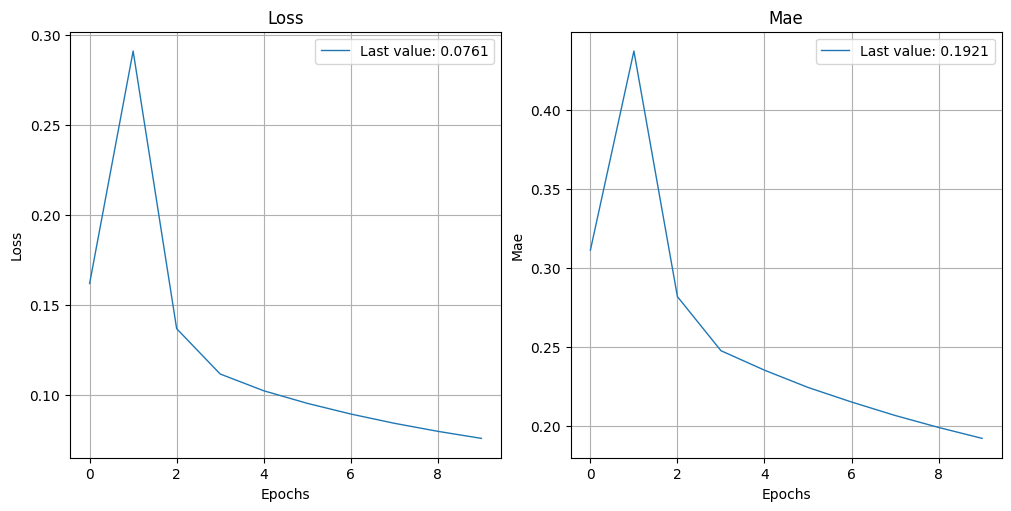

In [84]:
show_history(fit_RNN)

You may find that the validation data is missing for `Keras` is very restrictive on RNNs and imposes that both the training and testing samples share the same dimensions. We must bypass this by duplicating the model.

In [87]:
input_layer = Input((n_dates_test, n_feats)) # reset the input shape
x = input_layer
x = GRU(16,
        activation='tanh', return_sequences=True)(x)
x = Dense(1)(x) # No activation means linear activation: f(x) = x
output_layer = x
model_rnn_new = Model(input_layer, output_layer)
model_rnn_new.set_weights(model_rnn.get_weights())

In [88]:
pred_rnn = model_rnn_new.predict(test_features_rnn, batch_size=n_stocks)

1/1 [==============================] - 0s 319ms/step


In [97]:
np.mean(pred_rnn.reshape(1, -1)[0] * test_labels_rnn.reshape(1, -1)[0] > 0)

0.49968474148802017

The hit ratio is close to 50%, hence the model does hardly better than coin tossing.

Before we close this section on RNNs, we mention a new type architecture, called $\alpha$-RNN which are simpler compared to LSTMs and GRUs:
- Vanilla RNNs with a simple autocorrelation to generate long memory
- Dixon (2020) for details

## Other Common Architectures
The following structures are less mainstream and often hard to implement, thus we only stick to theorectical introductions.

### Generative Adversarial Networks (GANs)

- Idea: improve the accuracy of a classical NN by trying to *fool* it
  - Example: 'Fool' a Picasso painting expert with counterfeiter
- Two networks: the first one to learn (network $D$) and the second one to fool the first (network $G$)
- Two sets of data: one $(\boldsymbol{x})$ is true, stemming from $D$ and the other one $(\boldsymbol{z})$ fake, generated by $G$
- Input for $D$: classical training sample; Input for $G$: arbitrary noise
- $D$ and $G$ play the following *minimax* game:
$$\min_G \ \max_D \ \left\{ \mathbb{E}[\log(D(\boldsymbol{x}))]+\mathbb{E}[\log(1-D(G(\boldsymbol{z})))] \right\}$$
The first part $(\max)$ is the classical one to maximize the probability of assigning the correct label to all examples it seeks to classify (in the form of a utility-like function as in finance for $D(\boldsymbol{x})$).

Meanwhile, the expectation is evaluated over the fake instances, thus the right classification is the decreasing with $G(\boldsymbol{z})$, i.e., $1-D(G(\boldsymbol{z}))$.

The second, overarching, part $(\min)$ seeks to minimize the performance of the algorithm on the simualted data: shrinking the odds that $D$ finds out the data is indeed corrupt. A summarized version:
$$
\left. \begin{array}{rlll} 
\text{training sample}  = \boldsymbol{x} = \text{true data} && \\
\text{noise}= \boldsymbol{z} \quad \overset{G}{\rightarrow} \quad  \text{fake data}  &
\end{array} \right\} \overset{D}{\rightarrow} \text{output = probability for label}
$$
In ML-based asset pricing, the most notable application was introduced by Chen et al. (2020) to make use of the moment expression
$$\mathbb{E}[M_{t+1}r_{t+1,n}g(I_t,I_{t,n})]=0$$

- $I_{t,n}$ are firm-dependent (characteristics \& attributes)
- $I_t$ are macro-economic variables (e.g. credit/term spread, etc.)
- $g$ yields a $d-$dimensional output, leading to $d$ moment conditions
- Model the SDF as an unknown combination of assets $M_{t+1}=1-\sum_{n=1}^Nw(I_t,I_{t,n})r_{t+1,n}$.
- Network $D$ approximates the SDF via $w(I_t,I_{t,n})$.
- Network $G$ creates the moment condition through $g(I_t,I_{t,n})$ in the above equation.

The full specification of the network:
$$\min_w \ \max_g \ \sum_{j=1}^N \left\| \mathbb{E} \left[\left(1-\sum_{n=1}^Nw(I_t,I_{t,n})r_{t+1,n} \right)r_{t+1,j}g(I_t,I_{t,j})\right] \right\|^2$$
where the $L^2$ norm applies on the $d$ values generated via $g$. Intuitively,
- Network $D$ defined by $\boldsymbol{w}$ is the *asset pricing modeler*.
- Network $G$ defined by $\boldsymbol{g}$ seeks to find the *worst possible conditions* so that the model performs badly.
You may refer to Chen et al. (2020) for more details. GANs can also be used to generate artificial financial data (see Efimov and Xu (2019), Marti (2019), Wiese et al. (2020), Ni et al. (2020), and, relatedly, Buehler et al. (2020)).

### Autoencoders

Recent literatures involing `Autoencoders (AEs)`:
- Huck (2019): portfolio management
- Gu et al. (2020a): asset pricing

Characteristics of AEs:
- non-supervised algorithms
- Two networks
  - The first encodes the input into some intermediary input (*code*)
  - The second decodes the code into a modified version of the input
$$
\begin{array}{ccccccccc}
\boldsymbol{x} & &\overset{E}{\longrightarrow} && \boldsymbol{z} && \overset{D}{\longrightarrow} && \boldsymbol{x}' \\
\text{input} && \text{encoder} && \text{code} && \text{decoder} && \text{modified input}
\end{array}
$$
See Section 15.2.3 for further details. Gu et al. (2020a) add assumptions to the simple specification of the asset pricing model $r_t=\boldsymbol{\beta}_{t-1}\boldsymbol{f}_t+e_t$ that 
- *The betas depend on firm characteristics*
- The factors are possibly *non-linear* functions of the returns
$$r_{t,i}=\textbf{NN}_{\textbf{beta}}(\textbf{x}_{t-1,i})+\textbf{NN}_{\textbf{factor}}(\textbf{r}_t)+e_{t,i}$$
where $\textbf{NN}_{\textbf{beta}}$ and $\textbf{NN}_{\textbf{factor}}$ are two neural networks. The above *looks* like an autoencoder and you may see the coding of this structure in the exercise.

### A word on convolutional networks

- Why CNNs are useful? Because they allow to progressively *reduce the dimension of a large dataset by keeping local information*.
  - A **convolutional layer** will reduce the dimension of inputs.
  - Visually, this simplification is done by scanning and altering the values using rectangles with arbitrary weights.

An illustration of this process is sketched by the following figure (7.11):

![FIGURE 7.11: Scheme of a convolutional unit. Note: the dimensions are general and do not correspond to the number of squares.](images/figure7-11.png)

- The original data: a $(I\times K) x_{i,k}$ matrix
- Weights: matrix $w_{j,l}$ with size $(J\times L)$ with $J<I$ and $L<K$
- Scanning: transform size $(J\times L)$ into one real number
- Output size: $(I-J+1)\times (K-L+1)$
- Output values: $o_{i,k}=\sum_{j=1}^J\sum_{l=1}^Lw_{j,l}x_{i+j-1,k+l-1}$

Iteratively reducing the dimension with convolutional layers would be costly in computation and could cause overfitting. Thus, **pooling layers** are often used to *simplify the matrices by reducing them to a simple minimum/maximum or average* of the matrix:
$$o_{i,k}=f(x_{i+j-1,k+l-1}, 1\leq j\leq J, 1 \leq l\leq L)$$

The process is shown in the following figure (7.12):

![FIGURE 7.12: Scheme of pooling units](images/figure7-12.png)

It's possible to add a *stride* $v$ to omit cells: perform the operation only every $v$ value. You may refer to the illustration by the figure above.

Hoseinzade and Haratizadeh (2019) uses a CNN to predict the sign of price variations with price quotes, technical indicators and macro-economic data. It is worth noting that while this is clearly an interesting computer science exercise, *the deep economic motivation behind this choice of architecture remains unclear*.

### Advanced Architectures

In many ML tournaments in the 2010 decade, NNs have often been surpassed by tree-based models when dealing with *tabular data*. You may refer to
- Arik and Pfister (2019)
- Popov et al. (2019)
- Nuti et al. (2019)
for some novel NN structures or adapted trees methods.

## Coding Exercise

Autoencoder described in Gu et al. (2020a). The scheme of the model is illustrated by the following figure:

![FIGURE 7.13: Scheme of the autoencoder pricing model](images/figure7-13.png)

In order to harness the full potential of Keras, it is imperative to switch to more general formulations of NNs. This can be done via the so-called [functional API](https://keras.io/guides/functional_api/).

In [101]:
stock_days = data_ml[['date', 'stock_id']].groupby('stock_id').count()
stock_ids_short = stock_days[stock_days['date'] == max(stock_days['date'])].index

data_exercise = data_ml[data_ml.stock_id.isin(stock_ids_short)]
training_sample_exercise = data_exercise[data_exercise.date < separation_date]
testing_sample_exercise = data_exercise[data_exercise.date > separation_date]

n_stocks = len(stock_ids_short)
n_feats = NN_train_features.shape[1]
n_dates_train = training_sample_exercise.shape[0] // n_stocks
n_dates_test = testing_sample_exercise.shape[0] // n_stocks

# Note that since we have applied a subset of the data
# The features should be re-defined
# WHICH WAS NOT DONE IN THE ORIGINAL BOOK
# AND FAILING TO RE-DEFINE THE FEATURES AND LABELS WILL LIKELY RESULT IN AN ERROR WHEN RESHAPING
train_features_exercise = training_sample_exercise[training_sample_exercise.columns[2:95]]
test_features_exercise = testing_sample_exercise[testing_sample_rnn.columns[2:95]]
train_labels_exercise = training_sample_exercise['R1M_Usd']
test_labels_exercise = testing_sample_exercise['R1M_Usd']

In [102]:
# Formats the data into array and a tricky order
train_features_exercise = np.reshape(train_features_exercise, (n_dates_train, n_stocks, n_feats))
test_features_exercise = np.reshape(test_features_exercise, (n_dates_test, n_stocks, n_feats))

train_labels_exercise = np.reshape(train_labels_exercise, (n_dates_train, n_stocks, 1))
test_labels_exercise = np.reshape(test_labels_exercise, (n_dates_test, n_stocks, 1))

In [116]:
from keras.layers import Permute, Dot
# The factor model
K.clear_session()
factor_input = Input(shape=(n_stocks, ), name='factor_input')
x = factor_input
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='tanh')(x)
factor_output = x

# The beta model
beta_input = Input(shape=(n_stocks, n_feats), name='beta_input')
y = beta_input
y = Dense(16, activation='relu')(y)
y = Dense(8, activation='tanh')(y)
y = Permute((2, 1))(y) # Permutation to align the dimensions
beta_output = y

main_output = Dot(axes=1)([beta_output, factor_output])
model_exercise = Model(inputs=(factor_input, beta_input), outputs=main_output)
model_exercise.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 beta_input (InputLayer)        [(None, 793, 93)]    0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 793, 16)      1504        ['beta_input[0][0]']             
                                                                                                  
 factor_input (InputLayer)      [(None, 793)]        0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 793, 8)       136         ['dense_2[0][0]']                
                                                                                              

In [117]:
model_exercise.compile(
    optimizer='RMSprop',
    loss='mse',
    metrics=['mae']
)

model_exercise.fit(
    x=(train_labels_exercise, train_features_exercise),
    y=train_labels_exercise,
    batch_size=49, 
    epochs=10,
    verbose=2
)

Epoch 1/10
4/4 - 1s - loss: 0.0839 - mae: 0.1915 - 888ms/epoch - 222ms/step
Epoch 2/10
4/4 - 0s - loss: 0.0451 - mae: 0.1217 - 161ms/epoch - 40ms/step
Epoch 3/10
4/4 - 0s - loss: 0.0397 - mae: 0.1086 - 48ms/epoch - 12ms/step
Epoch 4/10
4/4 - 0s - loss: 0.0373 - mae: 0.1015 - 40ms/epoch - 10ms/step
Epoch 5/10
4/4 - 0s - loss: 0.0358 - mae: 0.0972 - 40ms/epoch - 10ms/step
Epoch 6/10
4/4 - 0s - loss: 0.0348 - mae: 0.0941 - 41ms/epoch - 10ms/step
Epoch 7/10
4/4 - 0s - loss: 0.0339 - mae: 0.0912 - 40ms/epoch - 10ms/step
Epoch 8/10
4/4 - 0s - loss: 0.0335 - mae: 0.0899 - 40ms/epoch - 10ms/step
Epoch 9/10
4/4 - 0s - loss: 0.0333 - mae: 0.0889 - 31ms/epoch - 8ms/step
Epoch 10/10
4/4 - 0s - loss: 0.0349 - mae: 0.0917 - 48ms/epoch - 12ms/step


## Takeaways

- **Neural Networks**: ANN, chains of differentiable, parameterised geometric functions, trained with gradient descent
- **Multilayer Perceptron**: building blocks connected with non-linear activation functions
  - A one-layer perceptron can serve as an universal approximation
  - Loss function: MSE for regression and cross-entropy for classification
  - Learning process: back-propagation with chains rules, the gradient will have two parts, one recycable part and another local part
  - Hyperparameters tuning and optimizers
  - `Softmax` activation function for classification
- Training Issues
  - Architecture Choices
    - The number of units (nodes): usually power of 2
  - **Epochs, batch size and iterations** for weight updating
  - **Penalizations and Dropout**: avoid overfitting
- **RNNs**: often used for "series"
  - Feed the output of the last layer as a 'memory' to the following layers
  - Problem: vanishing gradients
  - One improved architecture: **LSTM** Model (and GRU)
- Other architectures
  - GANs: two networks with one learner and another one to 'fool'
  - Autoencoders: non-supervised, two networks to "code" and "decode"
  - CNNs: dimension reduction

# Support Vector Machines

The origins of SVMs are old (go back to Vapnik and Lerner (1963)). However, their modern treatment was initiated in Boser et al. (1992) and Cortes and Vapnik (1995) (binary classification) and Drucker et al. (1997) (regression). We refer to [these books](http://www.kernel-machines.org/books) for an exhaustive bibliography.

## SVM for Classification

Let's consider a simple case for binary classification. In the following figure (8.1), the goal is to find a model that correctly classifies points.

A model consists of two weights $\boldsymbol{w}=(w_1,w_2)$ that load on the variables and create a natural linear separation in the plane.

![FIGURE 8.1: Diagram of binary classification with support vectors](images/figure8-1.png)

- The red line: a bad classifier (not discriminating different marks)
- The blue line: good
- The green line: good, but with larger margin

What about the grey star?
- Given its location, should be a circle
- Blue line fails to recognize it
- Grey dotted lines: "margins"

The two margins are computed as the parallel lines that *maximize* the distance between the model and the *closest* points that are correctly classified (on both sides). These points are called **support vectors**, which justifies the name of the technique.

The core idea of SVMs is to **maximize the margin**, under the constraint that the classifier does not make any mistake (tries to find the most robust model).

Formally, if we numerically define circles as $+1$ and squares as $-1$, a good linear model is expected to satisfy
$$
\left\{\begin{array}{lll}
\sum_{k=1}^Kw_kx_{i,k}+b \ge +1 & \text{ when } y_i=+1 \\
\sum_{k=1}^Kw_kx_{i,k}+b \le -1 & \text{ when } y_i=-1
\end{array}\right.
$$
which can be summarized in compact form as $y_i \times \left(\sum_{k=1}^K w_kx_{i,k}+b \right)\ge 1$. 

Now, the margin between a green model and a support vector on the dashed grey line is equal to $||\boldsymbol{w}||^{-1}=\left(\sum_{k=1}^Kw_k^2\right)^{-1/2}$.
-  This value comes from the fact that the distance between a point $(x_0,y_0)$ and a line parametrized by $ax+by+c=0$ is $d=\frac{|ax_0+by_0+c|}{\sqrt{a^2+b^2}}$.
Thus, the final problem is
$$\underset{\boldsymbol{w}, b}{\text{argmin}} \ \frac{1}{2} ||\boldsymbol{w}||^2 \ \text{ s.t. } y_i\left(\sum_{k=1}^Kw_kx_{i,k}+b \right)\ge 1$$
The dual form of this program (see chapter 5 in Boyd and Vandenberghe (2004)) is
$$L(\textbf{w},b,\boldsymbol{\lambda})=
 \frac{1}{2}||\textbf{w}||^2 + \sum_{i=1}^I\lambda_i\left(y_i\left(\sum_{k=1}^Kw_kx_{i,k}+b \right)- 1\right)$$
where either $\lambda_i=0$ or $y_i\left(\sum_{k=1}^Kw_kx_{i,k}+b \right)= 1$. Thus, **only some points** will matter in the solution (the so-called **support vectors**).

The first order conditions:
$$\frac{\partial L}{\partial \boldsymbol{w}}L(\boldsymbol{w},b,\boldsymbol{\lambda})=\textbf{0}, \quad \frac{\partial L}{\partial b}L(\boldsymbol{w},b,\boldsymbol{\lambda})=0$$
where the first condition leads to
$$\boldsymbol{w}^*=\sum_{i=1}^I \lambda_i u_i \boldsymbol{x}_i$$
The solution is indeed a linear form of the features, but only some points are taken into account.

Naturally, this problem becomes *infeasible* whenever the condition cannot be satisfied (a simple line cannot perfectly separate the labels), i.e., logically, *not linearly separable*. This complicates the process and it's possible to resort to a trick by **adding correction variables** that allow the conditions to be met:
$$\left\{\begin{array}{lll}
\sum_{k=1}^Kw_kx_{i,k}+b \ge +1-\xi_i & \text{ when } y_i=+1 \\
\sum_{k=1}^Kw_kx_{i,k}+b \le -1+\xi_i & \text{ when } y_i=-1,
\end{array}\right.$$
where the $\xi_i$ are positive so-called **slack variables** that make the conditions feasible and illustrated by the following figure:

![FIGURE 8.2: Diagram of binary classification with SVM - linearly inseparable data](images/figure8-2.png)

The optimization program then becomes
$$\underset{\boldsymbol{w},b, \boldsymbol{\xi}}{\text{argmin}} \ \frac{1}{2} ||\boldsymbol{w}||^2+C\sum_{i=1}^I\xi_i \ \text{ s.t. } \left\{ y_i\left(\sum_{k=1}^Kw_k\phi(x_{i,k})+b \right)\ge 1-\xi_i \ \text{ and } \ \xi_i\ge 0, \ \forall i  \right\},$$
where the parameter $C>0$ tunes the cost of mis-classification: as $C$ increases, errors become more penalizing.

The program can also be generalized to *non-linear* models with kernel $\phi$ applied to the input points $x_{i,k}$. The following figures show non-linear kernels can help cope with patterns more complex than straight lines. 

Once the weights $\boldsymbol{w}$ and bias $b$ are set via training, a prediction for a new vector $\boldsymbol{x}_j$ is simply made by $\sum_{k=1}^K w_k \phi(x_{j,k})+b$ and choosing the class based on the sign.

![FIGURE 8.3: Examples of nonlinear kernels](images/figure8-3.png)

## SVM for Regression

The ideas of SVM for classification can be transposed to regression but the role of the margin is different. One general formulation is
\begin{align*}
\underset{\boldsymbol{w},b, \boldsymbol{\xi}}{\text{argmin}} \  & \frac{1}{2} ||\boldsymbol{w}||^2+C\sum_{i=1}^I\left(\xi_i+\xi_i^* \right)\\
 \text{ s.t. }&  \sum_{k=1}^Kw_k\phi(x_{i,k})+b -y_i\le \varepsilon+\xi_i \\
&  y_i-\sum_{k=1}^Kw_k\phi(x_{i,k})-b \le \varepsilon+\xi_i^* \\
&\xi_i,\xi_i^*\ge 0, \ \forall i
\end{align*}
as illustrated in the following figure. The user specifies a **margin** $\varepsilon$ and the model will try to find the linear (or kernel transformation) relationship between the labels $y_i$ and the input $\boldsymbol{x}_i$. Just as in the classification task, if the data points are inside the 'strip', the slack variables $\xi_i$ and $\xi_i^*$ are 0.

When the points violate the threshold, the objective function is penalized (by $\xi_i$ and $\xi_i^*$), and setting a large $\varepsilon$ leaves room for more error. Once the model has been trained, a prediction for $\boldsymbol{x}_j$ is simply $\sum_{k=1}^K w_k \phi(x_{j,k})+b$.

![FIGURE 8.4: Diagram of regression SVM](images/figure8-4.png)

The algorithm
- Minimizes the sum of squared weights $||\boldsymbol{w}||^2$ subject to the error being small enough.
- The "opposite" of the penalized linear regressions which seek to minimize the error, subject to the weights being small enough.

One may refer to Chang and Lin (2011) for more details on the SVM zoo.
Another reference library coded by `C` and `C++` IS `LIBSVM`.

## Practice

For the sake of consistency we will use `scikit-learn`'s implementation of SVM in the following codes. In the implementation of `LIBSVM`, the package requires to specify the label and features separately. For this reason, we recycle the variables used for the boosted trees. Moreover, the training being slow, we perform it on a subsample of these sets (first thousand instances).

In [7]:
# Prepare data as in Chapter 6
import pandas as pd

data_ml = pd.read_pickle('./data/data_ml.pkl')
X = data_ml[data_ml.columns[2:95]]
y = data_ml['R1M_Usd']

separation_date = pd.to_datetime('2014-01-15')
training_sample = data_ml[data_ml['date'] < separation_date]
test_sample = data_ml[data_ml['date'] > separation_date]

r1m_use_quantiles = (training_sample['R1M_Usd'].quantile(0.2), training_sample['R1M_Usd'].quantile(0.8))
features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]

training_samples_svm = training_sample[(training_sample['R1M_Usd'] < r1m_use_quantiles[0]) | (training_sample['R1M_Usd'] > r1m_use_quantiles[1])].reset_index().drop(columns = 'index')

training_features_svm = training_samples_svm[features_short][:1000]
training_label_svm = training_samples_svm['R1M_Usd'][:1000]
test_features_svm = test_sample[features_short]

In [8]:
from sklearn.svm import SVR

fit_svm = SVR(kernel='rbf', C=0.1, epsilon=0.1, gamma=0.5)
fit_svm.fit(training_features_svm, training_label_svm)

SVR(C=0.1, gamma=0.5)

In [11]:
import numpy as np

np.mean(np.power(fit_svm.predict(test_features_svm) - test_sample['R1M_Usd'], 2))

0.03720290963990271

In [12]:
np.mean(fit_svm.predict(test_features_svm) * test_sample['R1M_Usd'] > 0)

0.5270339562443026

The results are slightly better than those of the boosted trees. All parameters are completely arbitrary, especially the choice of the kernel. We finally turn to a classification example.

In [15]:
from sklearn.svm import SVC

training_label_svm_C = training_samples_svm['R1M_Usd_C'][:1000]

fit_svm_C = SVC(kernel='sigmoid', gamma=0.5, coef0=0.3, C=0.2)
fit_svm_C.fit(training_features_svm, training_label_svm_C)

SVC(C=0.2, coef0=0.3, gamma=0.5, kernel='sigmoid')

In [18]:
np.mean(fit_svm_C.predict(test_features_svm) == test_sample['R1M_Usd_C'])

0.49628247493163175

Both the small training sample and the arbitrariness in our choice of the parameters may explain why the predictive accuracy is so poor.

## Coding Exercises

1. From the simple example shown above, extend SVM models to other kernels and discuss the impact on the fit.

In [24]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
def evaluate_kernel_fit(kernel, 
                        training_features_svm, training_label_svm, 
                        test_features_svm, test_label_svm):
    # Fit a SVM for regression with the specified kernel
    fit_svm = SVR(kernel=kernel, C=0.1, epsilon=0.1, gamma=0.5)
    fit_svm.fit(training_features_svm, training_label_svm)

    mse = np.mean(np.power(fit_svm.predict(test_features_svm) - test_label_svm, 2))
    hit_ratio = np.mean(fit_svm.predict(test_features_svm) * test_label_svm > 0)
    return mse, hit_ratio

In [21]:
fit_results = {kernel: evaluate_kernel_fit(kernel, training_features_svm, 
               training_label_svm, test_features_svm, test_sample['R1M_Usd']) 
               for kernel in kernels}
fit_results

{'linear': (0.03705349279047895, 0.5292701686417502),
 'poly': (0.037330909903200316, 0.5269769826800365),
 'rbf': (0.03720290963990271, 0.5270339562443026),
 'sigmoid': (0.2903700864598458, 0.49175307657247036)}

The first two kernels yield the best fit, while the last one should be avoided. Note that apart from the linear kernel, all other options require parameters. We have used the default ones, which may explain the poor performance of some nonlinear kernels.

2. Train a vanilla SVM model with labels being the 12-month forward (i.e., future) return and evaluate it on the testing sample. Do the same with a simple random forest. Compare.

In [26]:
training_label_svm_12 = training_samples_svm['R12M_Usd'][:1000]
evaluate_kernel_fit('linear', training_features_svm, training_label_svm_12,
                    test_features_svm, test_sample['R12M_Usd'])

(0.24691967843508394, 0.48504443938012765)

The vanilla model seems unsatisfying when dealing with 12-month forward return. Let's try a simple random forest.

In [27]:
from sklearn.ensemble import RandomForestRegressor

fit_rf_12 = RandomForestRegressor(n_estimators=100)
fit_rf_12.fit(training_features_svm, training_label_svm_12)

mse_rf = np.mean(np.power(fit_rf_12.predict(test_features_svm) - test_sample['R12M_Usd'], 2))
hit_ratio_rf = np.mean(fit_rf_12.predict(test_features_svm) * test_sample['R12M_Usd'] > 0)
mse_rf, hit_ratio_rf

(0.3208760528389372, 0.48817798541476753)

The MSE from the simple random forest seems to be more unsatisfying than a vanilla SVM with linear kernel. However, the hit ratio does improve a little. It's clear that the small training sample, the arbitrariness in the choice of the parameters, and the forecasting horizon could explain the poor performances of both models.

# Bayesian Methods

Good references for Bayesian analysis are
- Gelman et al. (2013)
- Kruschke (2014)

## The Bayesian Framework

- "Rely on data only" -> **"frequentist"**
  - Dataset -> Optimal parameters
- "Datasets as **snapshots of reality**" -> "Bayesians"
  - Parameters are "random"
  - Try to determine the **whole distribution** of the parameter
- **Conditional Probability**
  - Two random sets: $A$ and $B$
  - The probability of $A$ knowing $B$ is $$P[A|B]=\frac{P[A \cap B]}{P[B]}$$
- Likewise, the probability that both events occur is $P[A \cap B] = P[A]P[B|A]$. 
- Given $n$ disjoint events $A_i, i=1,\dots,n$ such that $\sum_{i=1}^nP(A_i)=1$, then for any event $B$, the **law of total probabilities** is $$P(B)=\sum_{i=1}^nP(B \cap A_i)= \sum_{i=1}^nP(B|A_i)P(A_i)$$
- A **general version of Bayes' theorem** $$P(A_i|B)=\frac{P(A_i)P(B|A_i)}{P(B)}= \frac{P(A_i)P(B|A_i)}{\sum_{i=1}^nP(B|A_i)P(A_i)}$$
- The **core topic**: the estimation of some parameter $\boldsymbol{\theta}$ (possibly a vector) given a dataset, which we denote with $\boldsymbol{y}$.
- In Bayesian analysis, a fact is that the data is not *almighty*. The distribution of the parameter $\boldsymbol{\theta}$ will be a *mix* between some **prior** distribution set by the statistician and the empirical distribution from the data: $$p(\boldsymbol{\theta}| \boldsymbol{y})=\frac{p(\boldsymbol{\theta})p(\boldsymbol{y} |\boldsymbol{\theta})}{p(\boldsymbol{y})} \propto p(\boldsymbol{\theta})p(\boldsymbol{y} |\boldsymbol{\theta})$$
The interpretation: the distribution of $\boldsymbol{\theta}$ knowing the data $\boldsymbol{y}$ is proportional to the distribution of $\boldsymbol{\theta}$ times the distribution of $\boldsymbol{y}$ knowing $\boldsymbol{\theta}$, and $p(\boldsymbol{y})$ is often omitted because it's simply a scaling number (constant).
- The purpose for a Bayesian analysis is to compute the so-called **posterior** distribution $p(\boldsymbol{\theta}|\boldsymbol{y})$ via the **prior** distribution $p(\boldsymbol{\theta})$ and the **likelihood function** $p(\boldsymbol{y}|\boldsymbol{\theta})$. The simplest way to define a non-informative prior is to set a uniform distribution over some realistic interval(s).
- The most challenging part is usually the likelihood function. The easiest way to solve the problem is to resort to a specific distribution and then consider the observations to be i.i.d. Assuming the parameters of the distributions $\boldsymbol{\lambda}$, then the likelihood can be written as $$p(\boldsymbol{y} |\boldsymbol{\theta}, \boldsymbol{\lambda})=\prod_{i=1}^I f_{\boldsymbol{\lambda}}(y_i; \boldsymbol{\beta})$$
**Hierarchical Models**: Here the problem is more complex because adding $\boldsymbol{\lambda}$ changes the posterior distribution to $p(\boldsymbol{\theta}, \boldsymbol{\lambda}|\boldsymbol{y})$ - a joint distribution of $\boldsymbol{\theta}$ and $\boldsymbol{\lambda}$ given $\boldsymbol{y}$ must be found.
- **Application of Bayesian methods**: widely used in **portfolio choice**. The distribution of asset returns depends on some parameter and the main issue is to determine the posterior distribution. Some literature:
  - Asset allocation: Lai et al. (2011, stochastic optimization), Guidolin and Liu (2016), Dangl and Weissensteiner (2020)
  - Shrinkage techniques (of means and covariances matrices): Frost and Savarino (1986), Kan and Zhou (2007) and DeMiguel et al. (2015)
  - Asset pricing theories: Tu and Zhou (2010)
  - Bayesian optimal frontier: Bauder et al. (2020)

## Bayesian Sampling

### Gibbs Sampling

**Simulation**: suppose we want to simulate the multivariate distribution of a random vector $\boldsymbol{X}$ given by its density $p=p(x_1,\dots,x_J)$. The full distribution can be complex, but we only need a more accessible *marginal* one which *depends on only one variable*: $$p(X_j=x_j|X_1= x_1,\dots,X_{j-1}=x_{j-1},X_{j+1}=x_{j+1},\dots,X_J=x_J)=p(X_j=x_j|\boldsymbol{X}_{-j}=\boldsymbol{x}_{-j})$$
where the compact notation $\boldsymbol{X}_{-j}$ denotes all variables except $X_j$. One way to generate samples is **Markov Chain Monte Carlo (MCMC)**, and is iterative, with $p(x_j|\boldsymbol{x}_{-j})$ known.

We write $x_j^m$ for the $m^{th}$ sample of the $j^{th}$ variable $X_j$. The simulation starts with a prior (or fixed, or random) sample $\boldsymbol{x}^0=(x_1^0,\dots,x_J^0)$. Then, for a sufficient large number of times $T$, new samples are drawn according to
\begin{align*}
x_1^{m+1} &= p(X_1|X_2=x_2^{m}, \dots ,X_J=x_J^m) ;\\
x_2^{m+1} &=p(X_2|X_1=x_1^{m+1}, X_3=x^{m}_3, \dots, X_J=x_J^m); \\
\dots& \\
x_J^{m+1}&= p(X_J|X_1=x_1^{m+1}, X_2=x_2^{m+1}, \dots, X_{J-1}=x_{J-1}^{m+1}).
\end{align*}
After each line, the value of the variable is *updated*. For line $j$, all variables $X_1, X_2, \dots, X_{j-1}$ are updated to their $(m+1)^{th}$ state. The above algorithm is called **Gibbs sampling**, which relates to Markov chains because each new iteration depends only on the previous one.

Under some technical assumptions, as $T$ increases, the distribution of $\boldsymbol{x}_T$ converges to that of $p$. These have been widely discussed in literature as Tierney (1994), Roberts and Smith (1994), as well as at section 11.7 of Gelman et al. (2013).

Sometimes, *the full distribution is complex*, and *the conditional laws are also hard to determine and to sample*. A more general method called *Metropolis-Hastings* can be used.

### Metropolis-Hastings Sampling

The Gibbs algorithm can be considered as a particular case of the Metropolis-Hastings (MH) method (Metropolis and Ulam, 1949). It also aims to simulate ranomd variables that follow $p(\boldsymbol{x})$ with the ability to sample from a simpler form $p(\boldsymbol{x}|\boldsymbol{y})$.

Once an initial value for $\boldsymbol{x}$ has been sampled as $\boldsymbol{x}_0$, each new iteration $m$ takes place in 3 stages:
1. Generate a candidate value $\boldsymbol{x}_{m+1}^{'}$ from $p(\boldsymbol{x}|\boldsymbol{x}_m)$.
2. Compute the acceptance ratio $\alpha=\min\left(\frac{p(\boldsymbol{x}'_{m+1})p(\boldsymbol{x}_{m}|\boldsymbol{x}'_{m+1})}{p(\boldsymbol{x}_{m})p(\boldsymbol{x}'_{m+1}|\boldsymbol{x}_{m})} \right)$.
3. Pick $\boldsymbol{x}_{m+1}=\boldsymbol{x}_{m+1}^{'}$ with probability $\alpha$ or stick with the previous value $(\boldsymbol{x}_{m+1}=\boldsymbol{x}_m)$ with probability $1-\alpha$.

The interpretation of the acceptance ratio is not straightforward. 
When the sampling generator is symmetric $(p(\boldsymbol{x}|\boldsymbol{y})=p(\boldsymbol{y}|\boldsymbol{x}))$: 
- The candidate is always chosen whenever $p(\boldsymbol{x}_{m+1}^{'})\geq p(\boldsymbol{x}_{m})$.
- If the reverse holds $(p(\boldsymbol{x}_{m+1}^{'})< p(\boldsymbol{x}_{m}))$, then the candidate is retained with odds $p(\boldsymbol{x}_{m+1}^{'})/p(\boldsymbol{x}_{m})$.
- The more likely the new proposal, the higher odds of retaining it.

Often the first (few) simulations are discarded to leave time to the chain to converge to a high probablity region (called '*burn in*'), and ensured that the first retained samples are representative.

Some additional details are outlined in Section 11.2 of Gelman et al. (2013) and in Chapter 7 of Kruschke (2014).

## Bayesian Linear Regression

Because Bayesian concepts are rather abstract, it is useful to illustrate the theoretical notions with a simple example. In a linear model, 
- $y_i=\boldsymbol{x}_i \boldsymbol{b}+\varepsilon_i$
- $\varepsilon_i$ i.i.d. assumed
- $\varepsilon_i$ normally distributed with zero mean and variance $\sigma^2$
The likelihood $p(\boldsymbol{y}|\boldsymbol{\theta}, \boldsymbol{\lambda})$ translates into $$p(\boldsymbol{\varepsilon}|\boldsymbol{b}, \sigma)=\prod_{i=1}^I\frac{e^{-\frac{\varepsilon_i^2}{2\sigma}}}{\sigma\sqrt{2\pi}}=(\sigma\sqrt{2\pi})^{-I}e^{-\sum_{i=1}^I\frac{\varepsilon_i^2}{2\sigma^2}}$$
In a regression analysis, the data is given both by $\boldsymbol{y}$ and by $\boldsymbol{X}$, hence both are reported in the notations. Simply acknowledging that $\boldsymbol{\varepsilon}=\boldsymbol{y}-\boldsymbol{X}\boldsymbol{b}$, we get 
\begin{align*}
p(\textbf{y},\textbf{X}|\textbf{b}, \sigma)&=\prod_{i=1}^I\frac{e^{-\frac{\varepsilon_i^2}{2\sigma}}}{\sigma\sqrt{2\pi}}\\
&=(\sigma\sqrt{2\pi})^{-I}e^{-\sum_{i=1}^I\frac{\left(y_i-\textbf{x}_i'\textbf{b}\right)^2}{2\sigma^2}}=(\sigma\sqrt{2\pi})^{-I} e^{-\frac{\left(\textbf{y}-\textbf{X}\textbf{b}\right)' \left(\textbf{y}-\textbf{X}\textbf{b}\right)}{2\sigma^2}}\\
&=\underbrace{(\sigma\sqrt{2\pi})^{-I} e^{-\frac{\left(\textbf{y}-\textbf{X}\hat{\textbf{b}}\right)' \left(\textbf{y}-\textbf{X}\hat{\textbf{b}}\right)}{2\sigma^2}}}_{\text{depends on } \sigma, \text{ not } \textbf{b}}\times \underbrace{e^{-\frac{(\textbf{b}-\hat{\textbf{b}})'\textbf{X}'\textbf{X}(\textbf{b}-\hat{\textbf{b}})}{2\sigma^2}}}_{\text{ depends on both } \sigma, \text{ and } \textbf{b} }.
\end{align*}
In the last line, the second term is a function of the difference $\textbf{b}-\hat{\textbf{b}}$, where $\hat{\textbf{b}}=(\textbf{X}^{'}\textbf{X})^{-1}\textbf{X}^{'}\textbf{y}$, since $\hat{\textbf{b}}$ is a natural benchmark for the mean of $\textbf{b}$.

The above expression is the frequentist block of the posterior: the likelihood. If we want to obtain a tractable expression for the posterior, we need to find a prior component that has a form that will combine well with this likelihood - **conjugate priors**. A natural candidate for the right part is the *multivariate Gaussian density*: $$p[\boldsymbol{b}|\sigma]=\sigma^{-k}e^{-\frac{(\boldsymbol{b}-\boldsymbol{b}_0)'\boldsymbol{\Lambda}_0(\boldsymbol{b}-\boldsymbol{b}_0)}{2\sigma^2}}$$
where we are obliged to condition with respect to $\sigma$. The density has prior mean $\boldsymbol{b}_0$ and prior covariance matrix $\boldsymbol{\Lambda}_0^{-1}$. This prior gets us one step closer to the posterior because
\begin{align*}
p[\boldsymbol{b},\sigma|\boldsymbol{y},\boldsymbol{X}]& \propto p[\boldsymbol{y},\boldsymbol{X}|\boldsymbol{b},\sigma]p[\boldsymbol{b},\sigma] \\
&\propto p[\boldsymbol{y},\boldsymbol{X}|\boldsymbol{b},\sigma]p[\boldsymbol{b}|\sigma]p[\sigma].
\end{align*}
In order to fully specify the cascade of probabilities, we need to take care of $\sigma$ and set a density of the form $$p[\sigma^2]\propto (\sigma^2)^{-1-a_0}e^{-\frac{b_0}{2\sigma^2}}$$
which is close to that of the left part of the regression expression. This corresponds to an inverse *gamma distribution* for the variance with prior parameters $a_0$ and $b_0$.

Now, we can simplify $p[\boldsymbol{b}, \sigma|\boldsymbol{y},\boldsymbol{X}]$ with previous expressions:
\begin{align*}
p[\boldsymbol{b},\sigma|\boldsymbol{y},\boldsymbol{X}]& \propto
(\sigma\sqrt{2\pi})^{-I} \sigma^{-2(1+a_0)} e^{-\frac{\left(\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{b}}\right)' \left(\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{b}}\right)}{2\sigma^2}} \\
&\quad \times e^{-\frac{(\boldsymbol{b}-\hat{\boldsymbol{b}})'\boldsymbol{X}'\boldsymbol{X}(\boldsymbol{b}-\hat{\boldsymbol{b}})}{2\sigma^2}}\sigma^{-k}e^{-\frac{(\boldsymbol{b}-\boldsymbol{b}_0)'\boldsymbol{\Lambda}_0(\boldsymbol{b}-\boldsymbol{b}_0)}{2\sigma^2}}e^{-\frac{b_0}{2\sigma^2}} \\
\end{align*}
which can be rewritten as
\begin{align*}
p[\boldsymbol{b},\sigma|\boldsymbol{y},\boldsymbol{X}]& \propto  \sigma^{-I-k-2(1+a_0)} \\
&\times  \exp\left(-\frac{\left(\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{b}}\right)' \left(\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{b}}\right) + (\boldsymbol{b}-\hat{\boldsymbol{b}})'\boldsymbol{X}'\boldsymbol{X}(\boldsymbol{b}-\hat{\boldsymbol{b}}) + (\boldsymbol{b}-\boldsymbol{b}_0)'\boldsymbol{\Lambda}_0(\boldsymbol{b}-\boldsymbol{b}_0)+b_0}{2\sigma^2} \right) .
\end{align*}
The above expression is simply *a quadratic form* in $\boldsymbol{b}$ and can be rewritten in a much more compact manner:
$$p(\boldsymbol{b}|\boldsymbol{y},\boldsymbol{X},\sigma) \propto \left[\sigma^{-k}e^{-\frac{(\boldsymbol{b}-\boldsymbol{b}_*)'\boldsymbol{\Lambda}_*(\boldsymbol{b}-\boldsymbol{b}_*)}{2\sigma^2}}\right] \times \left[ (\sigma^2)^{-1-a_*}e^{-\frac{b_*}{2\sigma^2}}  \right]$$
where
\begin{align*}
\boldsymbol{\Lambda}_* &= \boldsymbol{X}'\boldsymbol{X}+\boldsymbol{\Lambda}_0  \\
\boldsymbol{b}_*&=  \boldsymbol{\Lambda}_*^{-1}(\boldsymbol{\Lambda}_0\boldsymbol{b}_0+\boldsymbol{X}'\boldsymbol{X}\hat{\boldsymbol{b}}) \\
a_* & = a_0 + I/2  \\
b_* &=b_0+\frac{1}{2}\left(\boldsymbol{y}'\boldsymbol{y}+ \boldsymbol{b}_0'\boldsymbol{\Lambda}_0\boldsymbol{b}_0+\boldsymbol{b}_*'\boldsymbol{\Lambda}_*\boldsymbol{b}_* \right)\\
\end{align*}
The exponents has two parts:
1. The Gaussian component which relates mostly to $\boldsymbol{b}$
2. The inverse gamma component entirely dedicated to $\sigma$.

The mix between the prior and the data:
- The posterior covariance matrix of the Gaussian part ($\boldsymbol{\Lambda}_*$) is the *sum* between the prior and a quadratic form from the data.
- The posterior mean $\boldsymbol{b}_*$ is a *weighted average* between the prior $\boldsymbol{b}_0$ and the sample estimator $\hat{\boldsymbol{b}}$.
- Such blends are often called **shrinkages** ($\boldsymbol{X}^{'}\boldsymbol{X}$ shrunk towards the prior $\boldsymbol{\Lambda}_0$).
- A **regularization procedure**: pure fit from data + 'external' ingredient for final estimation.
- Interested readers may refer to Section 16.3 of Greene (2018).

To simplify the code and curtail computation times, we consider 2 predictors: market capitalization (size anomaly) and price-to-book ratio. In statistics, the **precision matrix** is the inverse of the covariance matrix. In the parameters, the first two priors relate to the Gaussian law and the last two to the inverse gamma distribution:
$$f_\text{invgamma}(x, \alpha, \beta)=\frac{\beta^\alpha}{\Gamma(\alpha)}x^{-1-\alpha}e^{-\frac{\beta}{x}}$$
where $\alpha$ is the shape and $\beta$ is the scale.

**In Python**, `pyMC3` and `bambi` packages provide us with some advanced solutions for the Bayesian analysis and regressions. However, to replicate the case in the textbook, I recommend a simple package `conjugate_bayes` with its homepage [here](https://github.com/tonyduan/conjugate-bayes). This package, however, is with poor maintenance and *a simple `pip install` command* would not even be able to pull down the source code. To achieve this and run this notebook, you may visit the source code [here](https://github.com/tonyduan/conjugate-bayes/blob/master/conjugate_bayes/models.py) and manually pull it into your local Python package library. For your convenience, I have copied the source code for the implementation into this notebook. See the following for details.

In [1]:
# import bambi as bmb
# import pymc3 as pm
import numpy as np
import pandas as pd

data_ml = pd.read_pickle('./data/data_ml.pkl')
X = data_ml[data_ml.columns[2:95]]
y = data_ml['R1M_Usd']

separation_date = pd.to_datetime('2014-01-15')
training_sample = data_ml[data_ml['date'] < separation_date]
test_sample = data_ml[data_ml['date'] > separation_date]

In [2]:
import scipy as sp
class NIGLinearRegression(object):
    """
    The normal inverse-gamma prior for a linear regression model with unknown
    variance and unknown relationship. Specifically,
        1/σ² ~ Γ(a, b)
        β ~ N(0, σ²V)

    Parameters
    ----------
    mu: prior for N(mu, v) on the model β
    v:  prior for N(mu, v) on the model β
    a:  prior for Γ(a, b) on the inverse sigma2 of the distribution
    b:  prior for Γ(a, b) on the inverse sigma2 of the distribution
    """
    def __init__(self, mu, v, a, b):
        self.__dict__.update({"mu": mu, "v": v, "a": a, "b": b})

    def fit(self, x_tr, y_tr):
        m, _ = x_tr.shape
        mu_ast = np.linalg.inv(np.linalg.inv(self.v) + x_tr.T @ x_tr) @ \
                 (np.linalg.inv(self.v) @ self.mu + x_tr.T @ y_tr)
        v_ast = np.linalg.inv(np.linalg.inv(self.v) + x_tr.T @ x_tr)
        a_ast = self.a + 0.5 * m
        b_ast = self.b + 0.5 * (y_tr - x_tr @ self.mu).T @ \
                np.linalg.inv(np.eye(m) + x_tr @ self.v @ x_tr.T) @ \
                (y_tr - x_tr @ self.mu.T)
        self.__dict__.update({"mu": mu_ast, "v": v_ast, "a": a_ast, "b": b_ast})

    def predict(self, x_te):
        scales = np.array([x.T @ self.v @ x for x in x_te]) + 1
        scales = (self.b / self.a * scales) ** 0.5
        return sp.stats.t(df=2 * self.a, loc=x_te @ self.mu, scale=scales)

    def get_conditional_beta(self, sigma2):
        return sp.stats.multivariate_normal(mean=self.mu, cov=sigma2 * self.v)

    def get_marginal_sigma2(self):
        return sp.stats.invgamma(self.a, scale=self.b)

In [3]:
# You may download the source code for this module at https://github.com/tonyduan/conjugate-bayes/blob/master/conjugate_bayes/models.py

# from conjugate_bayes.models import NIGLinearRegression

n_samples = 10000 # n_samples are set at 10k to balance between accuracy and speed
X_tr = np.array(test_sample[['Mkt_Cap_3M_Usd', 'Pb']])[:n_samples]
X_tr = np.hstack((X_tr, np.ones((n_samples, 1)))) # add a constant
y_tr = np.array(test_sample['R1M_Usd'])[:n_samples]
# The following settings are copied from the original R code
prior_mean = np.array([0.1, 0.1, 0.01])
cov_matrix = np.diag(np.power(prior_mean, 2))
# fit the model
model = NIGLinearRegression(mu=prior_mean, v=cov_matrix, a=0.5, b=0.5)
model.fit(X_tr, y_tr)

In [4]:
# Get the marginal sigma and conditional beta
sigma2 = model.get_marginal_sigma2()
beta = model.get_conditional_beta(sigma2=sigma2.mean())

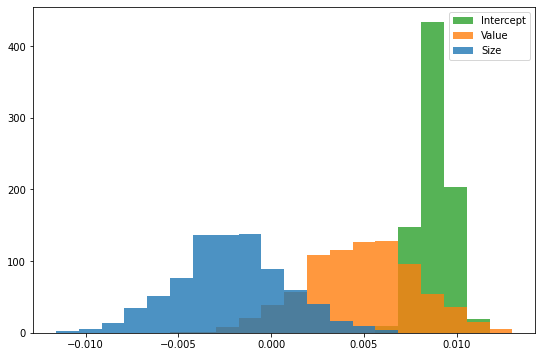

In [5]:
import matplotlib.pyplot as plt

r = beta.rvs(size=1000) # get 10000 samples from the distribution for beta
plt.figure(figsize=(9, 6))
plt.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.8, label=['Size', 'Value', 'Intercept'])
plt.legend()
plt.show()

You may see that the result is similar to that (Figure 9.1) in the textbook. 

- The distribution of the constant in Figure 9.1 is firmly to the right with a small dispersion,hence it is solidly positive. 
- For the size coefficient, it is the opposite; it is negative (small
firms are more profitable). 
- With regard to value, it is hard to conclude, the distribution is balanced around zero: there is no clear exposition to the price-to-book ratio variable.

## Naive Bayes Classifier

Bayes’ theorem can also be easily applied to **classification**. We have
$$P[\boldsymbol{y} | \boldsymbol{X}] = \frac{P[ \boldsymbol{X} | \boldsymbol{y}]P[\boldsymbol{y}]}{P[\boldsymbol{X}]} \propto P[ \boldsymbol{X} | \boldsymbol{y}]P[\boldsymbol{y}]$$
and then split the input matrix into its column vectors $\boldsymbol{X}=(\boldsymbol{x}_1, \dots, \boldsymbol{x}_K)$. This yields
$$P[\boldsymbol{y}|\boldsymbol{x}_1, \dots, \boldsymbol{x}_K]\propto P[\boldsymbol{x}_1, \dots, \boldsymbol{x}_K|\boldsymbol{y}]P[\boldsymbol{y}]$$
The ‘naive’ qualification of the method comes from a simplifying assumption on the features - if they are all *mutually independent*, the likelihood in the above expression can be expanded into
$$P[\boldsymbol{y} | \boldsymbol{x}_1,\dots,\boldsymbol{x}_K] \propto P[\boldsymbol{y}]\prod_{k=1}^K P[\boldsymbol{x}_k| \boldsymbol{y}]$$
The likelihood can be done non-parametrically (via kernel estimation) or with common distributions (Gaussian for continuous data, Bernoulli for binary data). For factor investing with continuous features, the Gaussian law is more adequate:
$$P[x_{i,k}=z|\boldsymbol{y}_i= c]=\frac{e^{-\frac{(z-m_c)^2}{2\sigma_c^2}}}{\sigma_c\sqrt{2\pi}}$$
where $c$ is the value of the classes taken by $y$ and $\sigma_c$ and $m_c$ are the standard error and mean of $x_{i,k}$ conditional on $y_i=c$.

In practice, each class is spanned and $\sigma_c$ and $m_c$ are taken to be the sample statistics. This Gaussian parametrization is probably *ill-suited* to our dataset because the features are uniformly distributed. Technically, we can make a **double-transformation**. Given a vector of features $\boldsymbol{x}_k$ with empirical cdf $F_{\boldsymbol{x}_k}$, the variable
$$\tilde{\boldsymbol{x}}_k=\Phi^{-1}\left(F_{\boldsymbol{x}_k}(\boldsymbol{x}_k) \right)$$
will have a standard normal law whenever $F_{\boldsymbol{x}_k}$ is not pathological (continuous and strictly increasing and observations lie in the open interval $(0,1)$). Otherwise, you may refer to the literature on the NORmal-To-Anything (NORTA) method (see, e.g., Chen (2001) and Coqueret (2017)).

Lastly, the prior $P[y]$ in is often either taken to be uniform across the classes ($1/K$ for all $k$) or equal to the sample distribution.

For Python implementation, we will directly apply the `BernoulliNB` classifier in `sklearn.naive_bayes` package to complete the classification as well as perform a transformation as the original notebook.

In [6]:
from sklearn.naive_bayes import BernoulliNB
features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]
fit_NB_ber = BernoulliNB()
fit_NB_ber.fit(training_sample[features_short], training_sample['R1M_Usd_C'])

BernoulliNB()

In [8]:
# Hit Ratio
np.mean(fit_NB_ber.predict(test_sample[features_short]) == test_sample['R1M_Usd_C'])

0.5037175250683683

In [9]:
# Transformation to gaussian distribution
from sklearn.naive_bayes import GaussianNB
gauss_features_train = sp.stats.norm.ppf(training_sample[features_short] * 0.999 + 0.0001)
gauss_features_test = sp.stats.norm.ppf(test_sample[features_short] * 0.999 + 0.0001)
fit_NB_gauss = GaussianNB()
fit_NB_gauss.fit(gauss_features_train, training_sample['R1M_Usd_C'])

GaussianNB()

In [11]:
np.mean(fit_NB_gauss.predict(gauss_features_test) == test_sample['R1M_Usd_C'])

0.4956984958979034

It seems that the Bernoulli Naive Bayes classifier does better in terms of the hit ratio. Let's make some plots as the R code.

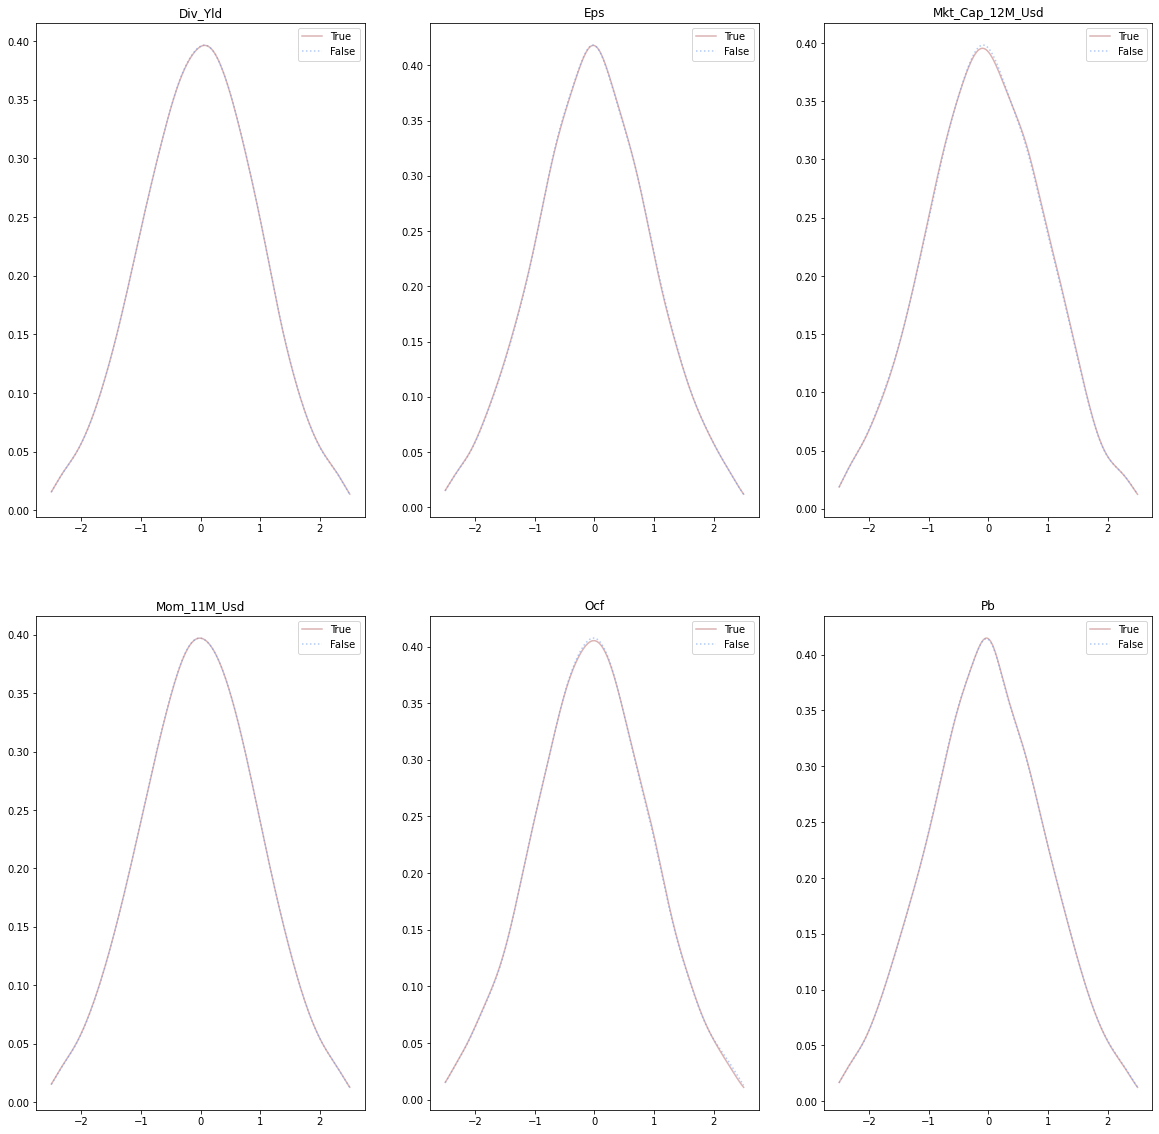

In [17]:
from scipy.stats import gaussian_kde

# pos/neg index
pos = training_sample[training_sample['R1M_Usd_C'] == 1].reset_index(drop=True).index.tolist()
neg = training_sample[training_sample['R1M_Usd_C'] == 0].reset_index(drop=True).index.tolist()

# select data
plt.subplots(figsize=(20, 20))
for idx in range(len(features_short) - 1):
    pos_density = gaussian_kde(gauss_features_train[:, idx][pos, ])
    neg_density = gaussian_kde(gauss_features_train[:, idx][neg, ])
    # modify shape
    pos_density.covariance_factor = lambda: 0.2
    pos_density._compute_covariance()
    neg_density.covariance_factor = lambda: 0.2
    neg_density._compute_covariance()

    # construct x_axis
    xs = np.linspace(-2.5,2.5,500)

    plt.subplot(2, 3, idx + 1)
    plt.plot(xs, pos_density(xs),
             color="darkred", linestyle=None, alpha=0.3, label="True")
    plt.plot(xs, neg_density(xs),
             color="cornflowerblue", linestyle=':', alpha=0.5, label="False")
    plt.legend(loc="best")
    plt.title(features_short[idx])
plt.show()

## Bayesian Additive Trees

### General Formulation

Bayesian additive regression trees (BARTs) are an **ensemble** technique that mixes Bayesian thinking and regression trees. In BARTs like in Bayesian regressions, the regularization comes from the prior.

Formally, the model is an aggregation of $M$ models, which we write as
$$y=\sum_{m=1}^M \mathcal{T}_m(q_m, \boldsymbol{w}_m, \boldsymbol{x})+\varepsilon$$
where $\varepsilon$ is a Gaussian noise with variance $\sigma^2$ and the $\mathcal{T}_m=\mathcal{T}_m(q_m, \boldsymbol{w}_m, \boldsymbol{x})$ are decision trees with structure $q_m$ (splits) and weight vectors $\boldsymbol{w}_m$ (w.r.t. leaf values) (see Chapter 6 and Figure 6.5 for boosted trees).

At the macro-level, BARTs can be viewed as traditional Bayesian objects where the parameters $\boldsymbol{\theta}$ are all of the unknowns coded through $q_m, \boldsymbol{w}_m$ and $\sigma^2$ and the focus is set on *determining posterior* $$\left(q_m,\textbf{w}_m,\sigma^2\right) | (\textbf{X}, \textbf{Y})$$
Given particular forms of priors for $\left(q_m,\textbf{w}_m,\sigma^2\right)$, the algorihm draws the parameters using a combination of Metropolis-Hastings and Gibbs samplers.

### Priors

- **Independence**
  - Between $\sigma^2$ and other parameters
  - Between trees
  - Between couples $(q_m, \boldsymbol{w}_m)$ and $(q_n, \boldsymbol{w}_n)$ for $m\neq n$
  This entails $$P(\left(q_1,\textbf{w}_1\right),\dots,\left(q_M,\textbf{w}_M\right),\sigma^2)=P(\sigma^2)\prod_{m=1}^MP\left(q_m,\textbf{w}_m\right)$$

- **Tree structure**
  Moreover, it's customary (for simplicity) to separate the structure of the tree $(q_m)$ and the terminal weights $(\boldsymbol{w}_m)$, so that by a Bayesian conditioning $$P(\left(q_1,\boldsymbol{w}_1\right),\dots,\left(q_M,\boldsymbol{w}_M\right),\sigma^2)=\underbrace{P(\sigma^2)}_{\text{noise term}}\prod_{m=1}^M\underbrace{P\left(\boldsymbol{w}_m|q_m\right)}_{\text{tree weights}}\underbrace{P(q_m)}_{\text{tree struct}}$$

Three parts for the assumptions:
- Tree's structures $q_m$ defined by their splits which are characterized by the splitting variable and the splitting level. The size of trees is parametrized such that a node at depth $d$ is nonterminal with probability given by $$\alpha(1+d)^{-\beta}, \quad \alpha \in (0, 1), \quad \beta>0$$
The authors recommend to set $\alpha=0.95$ and $\beta=2$ to force relatively shallow structures.
- The choice of splitting variables is driven by a *generalized Bernoulli distribution* which defines the odds of picking one particular feature.
  - In the original paper by Chipman et al. (2010), each predictor has the same odds of being chosen for the split.
  - The vector can also be random and sampled from a flexible Dirichlet distribution.
- $q_m \rightarrow (\boldsymbol{w}_m|q_m):$ The weights at all leaves are assumed to follow a Gaussian distribution $\mathcal{N}(\mu_\mu, \sigma_{\mu}^2)$, where $\mu_\mu=(y_{\min}+y_{\max})/2$ is the center of the range of the label values. The variance $\sigma_\mu^2$ is chosen such that $[\mu_\mu-2\sigma_\mu^2, \mu_\mu+2\sigma_\mu^2]$ covers $95\%$ of the range observed in the training set (can be altered, nonetheless).
- Lastly, for computational purposes similar to those of linear regressions, the parameter $\sigma^2$ is assumed to follow an inverse Gamma law $\text{IG}(\nu/2, \lambda \nu/2)$ akin to that used in Bayesian regressions (computed from the data).
- In sum, in addition to $M$ (number of trees), the prior depends on a small number of parameters $\alpha$ and $\beta$ (for the tree structure), $\mu_\mu$ and $\sigma_\mu^2$ (for the tree weights) and $\nu$ and $\lambda$ (for the noise term).

### Sampling and Predictions

The posterior $\left(q_m,\textbf{w}_m,\sigma^2\right) | (\textbf{X}, \textbf{Y})$ can not be obtained analytically but simulations can be efficient (to converge to the sought posterior). After some burn-in sample, a prediction for a newly observed set $\boldsymbol{x}_*$ will simply be the average (or median) of the predictions from the simulations. Assuming $S$ simulations, the average is $$\tilde{y}(\textbf{x}_*):=\frac{1}{S}\sum_{s=1}^S\sum_{m=1}^M\mathcal{T}_m\left(q_m^{(s)},\textbf{w}_m^{(s)}, \textbf{x}_*\right)$$
Each tree is sampled using the *Metropolis-Hastings* method: a tree is proposed, but it replaces the existing one only under some (possibly random) criterion. This procedure is then repeated in a Gibbs-like fashion.

Let us start with the MH building block. We seek to simulate the conditional distribution $$(q_m,\boldsymbol{w}_m) \ | \ (q_{-m},\boldsymbol{w}_{-m},\sigma^2, \boldsymbol{y}, \boldsymbol{x})$$ One tour de force in BART is to simplify the above Gibbs draws to $$(q_m,\boldsymbol{w}_m)|(\boldsymbol{R}_m, \sigma^2)$$ where $\boldsymbol{R}_m=\boldsymbol{y}-\sum_{l\neq m} \mathcal{T}_l(q_l, \boldsymbol{w}_l, \boldsymbol{x})$ is the partial residual on a prediction that excludes the $m^{th}$ tree.

The new MH proposition for $q_m$ is based on the previous tree and there are three possible alterations to the tree:
- Growing a terminal node (increase the complexity of the tree by adding a supplementary leaf);
- Pruning a pair of terminal nodes (the opposite operation: reducing complexity);
- Changing splitting rules (for simplitiy, excluded).

Once the tree structure is defined, the terminal weights are independently drawn according to a Gaussian distribution $\mathcal{N}(\mu_\mu, \sigma_\mu^2)$.

Affter the tree is sampled, the MH principle requires that it be accepted or rejected based on some probability. This probability increases with the odds that the new tree increases the likelihood of the model. You may refer to Section 2.2 in Sparapani et al. (2019) for some details.

We now outline the overarching Gibbs procedure.
- First, the algorithm starts with trees that are simple nodes.
- Then, a specified number of loops include the following *sequential* steps:

| Step | Task |
| :--: | :--: |
| 1 | sample $(q_1, \boldsymbol{w}_1) \| (\boldsymbol{R}_1, \sigma^2)$ |
| 2 | sample $(q_2, \boldsymbol{w}_2) \| (\boldsymbol{R}_2, \sigma^2)$ |
| $\dots$ | $\dots$ |
| $m$ | sample $(q_m, \boldsymbol{w}_m) \| (\boldsymbol{R}_m, \sigma^2)$ |
| $\dots$ | $\dots$ |
| $M$ | sample $(q_M, \boldsymbol{w}_M) \| (\boldsymbol{R}_M, \sigma^2)$ (last tree) |
| $M+1$ | sample $\sigma^2$ given the full residual $\boldsymbol{R}=\boldsymbol{y}-\sum_{l=1}^M\mathcal{T}_l(q_l,\boldsymbol{w}_l, \boldsymbol{x})$|

At each step $m$, the residual $\boldsymbol{R}_m$ is updated with the values from step $m-1$. You may refer to the following figure for a 3-step process.

![FIGURE 9.3: Diagram of the MH/Gibbs sampling of BARTs. At step 2, the proposed tree is not validated.](images/figure9-3.png)

### Code

There are several Python packages that implement BART methods. For example, `pymc_bart` and `xbart`. But the former API is a little bit difficult to use and the latter one requires Visual Studio C++ tools during installation. With such, we will use a simple API, `BartPy`[^1] for the coding implementation in Python. It provides us with a `sklearn`-style modelling API and is relatively easier to use. 

[^1]: Please use this command to install the `BartPy` package to avoid from the following [issues #37](https://github.com/JakeColtman/bartpy/issues/37) and [#51](https://github.com/JakeColtman/bartpy/issues/51): `pip install git+https://github.com/JakeColtman/bartpy.git@pytorch --upgrade`.

In [2]:
from bartpy.sklearnmodel import SklearnModel

fit_bart = SklearnModel(n_trees=20, # R code `ntree`, number of trees
                        n_burn=100, # R code `nskip`, size of burn-in sample
                        n_samples=200, # R code `ndpost`, number of posteriors drawn
                        alpha=0.95, beta=2) # R code `base` and `power`
fit_bart.fit(np.array(training_sample[features_short]), np.array(training_sample['R1M_Usd']))

SklearnModel(beta=2, n_burn=100, n_trees=20)

Once the model is trained, we evaluated its performance. We simply compute the hit ratio.

In [3]:
np.mean(fit_bart.predict(test_sample[features_short]) * test_sample['R1M_Usd'] > 0)

0.5460346399270738

The performance seems reasonable but is by no means not impressive. The data from all sampled trees is available in the `fit_bart` variable. It has nonetheless a complex structure (as is often the case with trees), but the simplest information we can extract is the value of $\sigma$.

In [34]:
fit_bart.sigma.current_unnormalized_value()

28.155

# Validating and Tuning

As is shown in Chapters 5 to 9, ML models require *user-specified* choices before they can be trained - which encompass *parameter values* (learning rate, penalization intensity, etc.) or *architectural choices* (e.g. the structure of a network).

We refer to the work of Probst et al. (2018) for a study on the impact of hyperparameter tuning on model performance.

For some models, the number of degrees of freedom is so large that finding the right parameters can become complicated and challenging.

This chapter addresses these issues but the reader must be aware that there is no shortcut to building good models. Crafting an effective model is time-consuming and often the result of many iterations.

## Learning Metrics

The parameter values that are set before training are called **hyperparameters**. However, the evaluation (of the model performance) requires *metrics*. 

- Two main tasks: regressions (numbers) and classicifications (categories).
- Li et al. (2020) propose to assess the performance of a forecasting method compared to a given benchmark, **conditional** on some external variable.

### Regression Analysis

Errors in regression analyses are usually evaluated with the $L^1$ and $L^2$ norms - both easy to interpret and to compute. 
- The first one is the mean absoluate error, which gives the average distance to the realized value (but is not differetiable at zero).
- The second one is the **root mean squared error (RMSE)** and is differentiable everywhere but harder to grasp and gives more weight to outliers. Formally,

\begin{align*}
\text{MAE}(\textbf{y},\tilde{\textbf{y}})&=\frac{1}{I}\sum_{i=1}^I|y_i-\tilde{y}_i|, \\
\text{MSE}(\textbf{y},\tilde{\textbf{y}})&=\frac{1}{I}\sum_{i=1}^I(y_i-\tilde{y}_i)^2
\end{align*}
and the RMSE is simply the square root of the MSE. 

It's always possible to generalize these formulae by adding weights $w_i$ to produce heterogeneity in the importance of instances.

Let us briefly comment on the MSE, which is by far the most common lost function, but is *not* necessarily the exact best choice for return prediction. If we decompose the loss into 3 terms, we get
1. The sum of squared realized returns
2. The sum of squared predicted returns
3. The product between the two (a roughly covariance term assuming zero means)

The third term is the most interesting from the allocator's standpoint: the negativity of the cross-product $-2y_i \tilde{y}_i$ is always *to the investor's benefit*: both positive for a profitable asset or both negative for a bad opportunity. It is when $y_i$ and $\tilde{y}_i$ don't have the same sign that problems arise. Thus, compared to the $\tilde{y}_i^2$, the cross-term is *more important*. Nonetheless, algorithms *do not optimize* with respect to this indicator.

These metrics (MSE and RMSE) are widely used outside ML to assess forecasting errors. Below, we present other indicators that are also sometimes used to quantify the quality of a model. In line with the linear regressions, the $R^2$ can be computed in any predictive exercise:
$$R^2(\textbf{y},\tilde{\textbf{y}})=1- \frac{\sum_{i=1}^I(y_i-\tilde{y}_i)^2}{\sum_{i=1}^I(y_i-\bar{y})^2}$$
where $\bar{y}$ is the sample average. 

One important difference with the classical $R^2$ is that the above quantity can be computed on the **testing sample** and not on the **training sample**. In this case, the $R^2$ *can be negative* when the MSE in the numerator is larger than the (biased) variance of the testing sample. 

Sometimes, the average value $\bar{y}$ is omitted in the denominator (as in Gu et al. (2020b) for instance). The benefit is that it compares the predictions of the model to a zero prediction. This is particularly relevant with returns *because the simplest prediction of all is the constant zero value* and the $R^2$ can then *measure if the model beats this naive benchmark*. *A zero prediction is always preferable* to a sample average because the latter can be very much period dependent. Also,  removing $\bar{y}$ in the denominator makes the metric more *conservative* as it mechanically reduces the $R^2$.

Other exotic extensions:
1. Mean Absolute Percentage Error (MAPE)
2. Mean Square Percentage Error (MSPE)

They compute the error relative to the original value and is expressed in a percentage score:
\begin{align*}
\text{MAPE}(\textbf{y},\tilde{\textbf{y}})&=\frac{1}{I}\sum_{i=1}^I\left|\frac{y_i-\tilde{y}_i}{y_i}\right|\\
\text{MSPE}(\textbf{y},\tilde{\textbf{y}})&=\frac{1}{I}\sum_{i=1}^I\left(\frac{y_i-\tilde{y}_i}{y_i}\right)^2
\end{align*}
while the latter can be scaled by a square root if needed.

When the label is positive with possibly large values, it is possible to *scale the magnitude of errors*, which can be very large. One way to do this is the Root Mean Squared Logarithmic Error (RMSLE):
$$\text{RMSLE}(\textbf{y},\tilde{\textbf{y}})=\sqrt{\frac{1}{I}\sum_{i=1}^I\log\left(\frac{1+y_i}{1+\tilde{y}_i}\right)}$$
where it is obvious that when $y_i=\tilde{y}_i$, the error metric is 0.

Before we move on to categorical losses, we briefly comment on one shortcoming of the MSE. A simple decomposition yields:
$$\text{MSE}(\textbf{y},\tilde{\textbf{y}})=\frac{1}{I}\sum_{i=1}^I(y_i^2+\tilde{y}_i^2-2y_i\tilde{y}_i)$$
The model can do nothing for $y_i^2$, hence will focus on the minimization of the other two. The second term is the dispersion of model values. The third term is a cross-product, which is by far the most important. This product is indeed positive when the two terms have the same sign, which is exactly what an investor is looking for: **correct directions** for the bets. For some algorith,s, it's possible to manually specify custom losses (see Section 7.4.3, maximizing the sum of $y_i\tilde{y}_i$ may be a good alternative to vanilla quadratic optimization.)

### Classification Analysis

We present the concepts pertaining to these metrics in an increasing order of complexity. In binary classification, it is convenient to think in terms of *true versus false*. In an investment setting, true can be related to a positive return, or a return being above that of a benchmark - false being the opposite.

There are 4 types of possible results for a prediction:
- Frequency of *true positive*: $TP=I^{-1}\sum_{i=1}^I 1_{y_i=\tilde{y}_i=1},$
- Frequency of *true negative*: $TN=I^{-1}\sum_{i=1}^I 1_{y_i=\tilde{y}_i=0},$
- Frequency of *false positive*: $FP=I^{-1}\sum_{i=1}^I 1_{y_i=0,\tilde{y}_i=1},$
- Frequency of *false negative*: $FN=I^{-1}\sum_{i=1}^I 1_{y_i=1,\tilde{y}_i=0},$

where true is conventionally encoded into 1 and false into 0. The sum of the four figures is 1. These four numbers have very different impacts on out-of-sample results, as shown in the following figure. In this table (also called a **confusion matrix**), it is assumed that some proxy for future profitability is forecast by the model. Each row stands for the model's prediction and each column for the realization of the profitability. 

![FIGURE 10.1: Confusion matrix: summary of binary outcomes.](images/figure10-1.png)

Among the two types of errors, **type I** is the most daunting for investors because it has a direct effect on the portfolio. The **type II** error is a simply missed opportunity and is somewhat less impactful. Finally, true negatives are those assets which are correctly excluded from the portfolio.

From the 4 baseline rates, it's possible to derive other interesting metrics:
- **Accuracy** $=TP+TN$ is the percentage of correct forecasts
- **Recall** $=\frac{TP}{TP+FN}$ measures the ability to detect a winning strategy/asset (left column), also known as *sensitivity* or *true positive rate (TPR)*;
- **Precision** $=\frac{TP}{TP+FP}$ computes the probability of good investments (top row);
- **Specificity** $=\frac{TN}{TN+FP}$ measures the proportion of actual negatives that are correctly identified (right column);
- **Fallout** $=\frac{FP}{TN+FP}=1-\text{Specificity}$ is the probability of false alarm (or false positive rate), i.e., the frequency at which the algorithm detects falsely performing assets (right column);
- **F-score**, $F_1=2\times \frac{\text{recall} \times \text{precision}}{\text{recall} + \text{precision}}$ is the harmonic average of recall and precision.

All these metrics lie in the unit interval and is deemed to perform better when they increase (except fallout). Other indicators also exist, like the false discovery rate or false omission rate but less mainstream.

A metric that is popular but more complex is the Area Under the (ROC) Curve, often referred to as *AUC*. The complicated part is the *ROC curve* where ROC stands for Receiver Operating Characteristic (comes from signal theory).

As seen in Chapters 6 and 7, classifiers generate output that are probabilities that one instance belongs to one class. These probabilities are then translated into a class by choosing the class that has the highest value. In binary classification, the class with a score *above 0.5* basically wins.

In practice, this 0.5 threshold *may not be optimal* and the model could very well correctly predict false instances when the probability is below 0.4 and true ones otherwise. Hence, it is a natural idea to test what happens if the decision threshold changes. The ROC curve does just that and plots the recall as a function of the fallout when the threshold increases from zero to one.

- When the threshold is 0: TP is always 0 because the model never forecasts positive values - both recall and fallout are 0.
- When the threshold is 1: FP shrinks to 0 and TN too, hence recall and fallout are 1.
- The behaviour of their relationship between two extremes is the **ROC curve**. See the following figure 10.2 for a stylized example.

![FIGURE 10.2: Stylized ROC curves.](images/figure10-2.png)

An algorithm with a ROC curve above the 45° angle is performing better than an average classifier. Indeed, the curve can be seen as a tradeoff between benefits (probability of detecting good strategies on the $y$ axis) minus costs (odds of selecting the wrong assets on the $x$ axis).

The best possible classifier has a ROC curve that goes from point $(0,0)$ to point $(0,1)$ to point $(1,1)$. At point $(0,1)$, fallout is null, hence there are no false positives, and recall is 1 so that there are no false negatives: the model is always right. The opposite is true: at point $(1,0)$, the model is always wrong.

Below, we will use the `sklearn` package to comupute a ROC curve for a given set of predictions on the testing sample.

In [1]:
import numpy as np
import pandas as pd

data_ml = pd.read_pickle('./data/data_ml.pkl')
X = data_ml[data_ml.columns[2:95]]
y = data_ml['R1M_Usd']

separation_date = pd.to_datetime('2014-01-15')
training_sample = data_ml[data_ml['date'] < separation_date]
test_sample = data_ml[data_ml['date'] > separation_date]

In [2]:
from sklearn.ensemble import RandomForestClassifier
fit_rf_c = RandomForestClassifier(n_estimators = 40,
                                  min_samples_split = 250,
                                  max_features = 30,
                                  max_samples = 20000)

fit_rf_c.fit(training_sample[training_sample.columns[2:95]], training_sample['R1M_Usd_C'])

RandomForestClassifier(max_features=30, max_samples=20000,
                       min_samples_split=250, n_estimators=40)

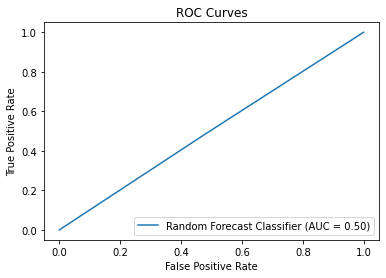

In [4]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(test_sample['R1M_Usd_C'].values,
                                 fit_rf_c.predict(test_sample[test_sample.columns[2:95]]))
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                          estimator_name='Random Forecast Classifier')
display.plot()
plt.title("ROC Curves")
plt.show()

In [6]:
roc_auc

0.5027044855719038

In the previous figure, the curve is very close to the 45° angle and the model seems rather as bad as a random classifier.

For comparison purpose, having one entire curve is not practical, hence the information of the whole curve is synthesized into the area below the curve, i.e., the integral of the corresponding function. The 45° angle (quadrant bisector) has an area of 0.5. Thus, any good model is expected to have an AUC above 0.5. A perfect model has an AUC of 1.

We end this subsection with a word on *multiclass* data. Things are more complex in this case. It is still possible to compute a confusion matrix, but the dimension is larger and harder to interpret, and TP, TN, etc. must be generalized in a non-standard way. The simplest metric is the *cross-entropy* defined in Chapter 7. We refer to Section 6.1.2 for more details on losses related to categorical labels.

## Validation
Validation is the stage at which a model is tested and tuned before it starts to be deployed on real or live data (for trading purposes).

### The variance-bias tradeoff: theory

The **variance-bias tradeoff** is one of the core concepts in supervised learning. To explain it, let us assume that the data is generated by the simple model $$y_i=f(\textbf{x}_i)+\epsilon_i, \quad   \mathbb{E}[\boldsymbol{\epsilon}]=0, \quad \mathbb{V}[\boldsymbol{\epsilon}]=\sigma^2$$
but the model that is estimated yields $$y_i=\hat{f}(\boldsymbol{x}_i)+\hat{\epsilon}_i$$
Given an unknown sample $\boldsymbol{x}$, the decomposition of the average squared error is 
\begin{align*}
\mathbb{E}[\hat{\epsilon}^2]&=\mathbb{E}[(y-\hat{f}(\textbf{x}))^2]=\mathbb{E}[(f(\textbf{x})+\epsilon-\hat{f}(\textbf{x}))^2]   \\
&= \underbrace{\mathbb{E}[(f(\textbf{x})-\hat{f}(\textbf{x}))^2]}_{\text{total quadratic error}}+\underbrace{\mathbb{E}[\epsilon^2]}_{\text{irreducible error}}\\
&= \mathbb{E}[\hat{f}(\textbf{x})^2]+\mathbb{E}[f(\textbf{x})^2]-2\mathbb{E}[f(\textbf{x})\hat{f}(\textbf{x})]+\sigma^2\\
&=\mathbb{E}[\hat{f}(\textbf{x})^2]+f(\textbf{x})^2-2f(\textbf{x})\mathbb{E}[\hat{f}(\textbf{x})]+\sigma^2\\
&=\left[ \mathbb{E}[\hat{f}(\textbf{x})^2]-\mathbb{E}[\hat{f}(\textbf{x})]^2\right]+\left[\mathbb{E}[\hat{f}(\textbf{x})]^2+f(\textbf{x})^2-2f(\textbf{x})\mathbb{E}[\hat{f}(\textbf{x})]\right]+\sigma^2\\
&=\underbrace{\mathbb{V}[\hat{f}(\textbf{x})]}_{\text{variance of model}}+ \quad \underbrace{\mathbb{E}[(f(\textbf{x})-\hat{f}(\textbf{x}))]^2}_{\text{squared bias}}\quad +\quad\sigma^2
\end{align*}

In the above derivation, $f(x)$ is not random but $\hat{f}(x)$ is. Also, in the second line, we assumed that $\mathbb{E}[\varepsilon(f(x)-\hat{f}(x))]=0$, which may not always hold (though it's a very common assumption).

The average squared error has 3 components:
- The variance of the model (over its predictions);
- The squared bias of the model;
- And one **irreducible error** (independent from the choice of a particular model).

The last one is immune to change in models, so the challenge is to minimize the *sum of the first two*. This is known as the **variance-bias tradeoff** because reducing one often leads to increasing the other. The goal is thus to access when a small increase in either one can lead to a larger decrease in the other.

Below in the following figure we present two of them. The first one relates to archery (see the following figure) below. The top left and the bottom right cases are the best and worst cases possible. However, the most often encountered cases in ML are the other two configurations:
- The arrows are concentrated in a small parameter but not the center of the target;
- The arrows are on average well distributed but on average far from the center.

![FIGURE 10.4: First representation of the variance-bias tradeoff.](images/figure10-4.png)

The second way this tradeoff is often depicted is via the notion of **model complexity**.
- The most simple model: a constant one (or the average value of the label in the training set) - zero variance but large bias.
- On the other side, a decision tree with as many leaves as there are instances has a very complex structure - a very small bias but not compensating the increase in variance.

As shown in the following figure 10.5, good models often lie somewhere in the middle, but the best mix is hard to find.

![FIGURE 10.5: Second representation of the variance-bias tradeoff.](images/figure10-5.png)

The most tractable theoretical form of the variance-bias tradeoff is the ridge regression.[^1] The coefficient estimates in this type of regression are $\hat{\textbf{b}}_{\lambda}=(\textbf{X}^{'}\textbf{X}+\lambda \textbf{I}_N)^{-1}\textbf{X}^{'}\textbf{Y}$ (see section 5.1.1), where $\lambda$ is the penalization intensity. Assuming a *true* linear form for the data generating process ($\textbf{y}=\textbf{X}\textbf{b}+\boldsymbol{\epsilon}$ where $\textbf{b}$ is the unknown and $\sigma^2$ is the variance of errors, this yields)
\begin{align*}  
\mathbb{E}[\hat{\textbf{b}}_\lambda]&=\textbf{b}-\lambda(\textbf{X}'\textbf{X}+\lambda \textbf{I}_N)^{-1} \textbf{b}, \\
\mathbb{V}[\hat{\textbf{b}}_\lambda]&=\sigma^2(\textbf{X}'\textbf{X}+\lambda \textbf{I}_N)^{-1}\textbf{X}'\textbf{X}   (\textbf{X}'\textbf{X}+\lambda \textbf{I}_N)^{-1}.
\end{align*}
Basically, this means that the bias of the estimator is $-\lambda(\textbf{X}'\textbf{X}+\lambda \textbf{I}_N)^{-1} \textbf{b}$, which is 0 in the absense of penalization (classical regression), and converges to some finite number when $\lambda \rightarrow \infty$, i.e., when the model becomes constant. Note that if the estimator has a zero bias, then the predictions too: $\mathbb{E}[\textbf{X}(\textbf{b}-\hat{\textbf{b}})]=\textbf{0}$.

The variance (of estimates) in the case of an unconstrained regression is $\mathbb{V}[\hat{\textbf{b}}]=\sigma(\textbf{X}'\textbf{X})^{-1}$. In the above equation, the $\lambda$ *reduces* the magnitude of figures in the inverse matrix. The overall effect is that as $\lambda$ increases, the variance decreases and in the limit $\lambda\rightarrow \infty$, the variance is *zero*. The variance of the prediction is
\begin{align*}
\mathbb{V}[\textbf{X}\hat{\textbf{b}}]&=\mathbb{E}[(\textbf{X}\hat{\textbf{b}}-\mathbb{E}[\textbf{X}\hat{\textbf{b}}])(\textbf{X}\hat{\textbf{b}}-\mathbb{E}[\textbf{X}\hat{\textbf{b}}])'] \\
&= \textbf{X}\mathbb{E}[(\hat{\textbf{b}}-\mathbb{E}[\hat{\textbf{b}}])(\hat{\textbf{b}}-\mathbb{E}[\hat{\textbf{b}}])']\textbf{X}' \\
&= \textbf{X}\mathbb{V}[\hat{\textbf{b}}]\textbf{X}
\end{align*}
The ridge regression is very handy with a single parameter and are able to provide a cursor that directly tunes the variance-bias tradeoff.

In the example below, we recycle the ridge model trained in Chapter 5.

[^1]: Another angle, critical of neural networks is provided in Geman et al. (1992).

In [2]:
from sklearn.linear_model import Ridge

features = data_ml.columns[2:95]
y_penalized_train = training_sample['R1M_Usd']
x_penalized_train = training_sample[features].astype('float64')
x_penalized_test = test_sample[features].astype('float64')

In [7]:
n_alphas = 50
alphas = np.logspace(-3, 3, n_alphas) # Convert it into logspace!

ridge_biases, ridge_vars = [], []
for alpha in alphas:
    fit_ridge = Ridge(alpha = alpha)
    fit_ridge.fit(X = x_penalized_train, y = y_penalized_train)
    ridge_bias = np.mean(np.square(fit_ridge.predict(x_penalized_test) - test_sample['R1M_Usd']))
    ridge_var = np.var(fit_ridge.predict(x_penalized_test))
    ridge_biases.append(ridge_bias)
    ridge_vars.append(ridge_var)

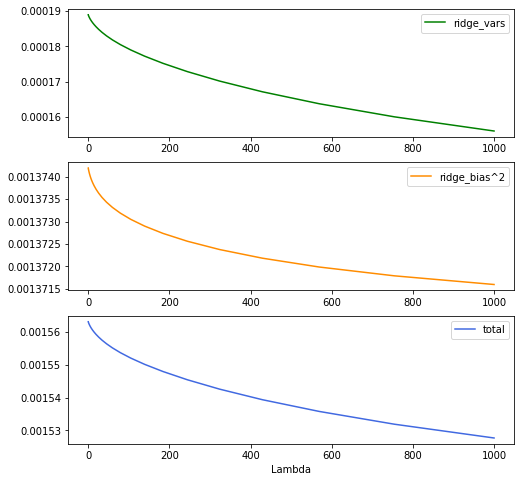

In [25]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(8, 8))
plt.subplot(311)
plt.plot(alphas, ridge_vars, label='ridge_vars', c='g')
plt.legend()
plt.subplot(312)
plt.plot(alphas, np.square(ridge_biases), label='ridge_bias^2', c='darkorange')
plt.legend()
plt.subplot(313)
plt.plot(alphas, ridge_vars + np.square(ridge_biases), label='total', c='royalblue')
plt.legend()
plt.xlabel("Lambda")
plt.show()

In the figure above, the pattern is different from the one depicted in Figure 10.5. When the intensity lambda increases, the magnitude of parameters shrinks and the model becomes simpler. Hence, the most simple seems like the best choice: adding complexity increases variance but *does not improve the bias*! One possible reason for that is that features don't actually carry much predictive value and hence a constant model is just as good as more sophisticated ones based on irrelevant variables.

### The variance-bias tradeoff: illustration

It's nonetheless useful to demonstrate how the tradeoff operates on true algorithmic choices. Below, we take the example of trees because their complexity is easy to evaluate. Basically, a tree with many terminal nodes is more complex than a tree with a handful of clusters.

We start with the parsimonious model, which we train below.

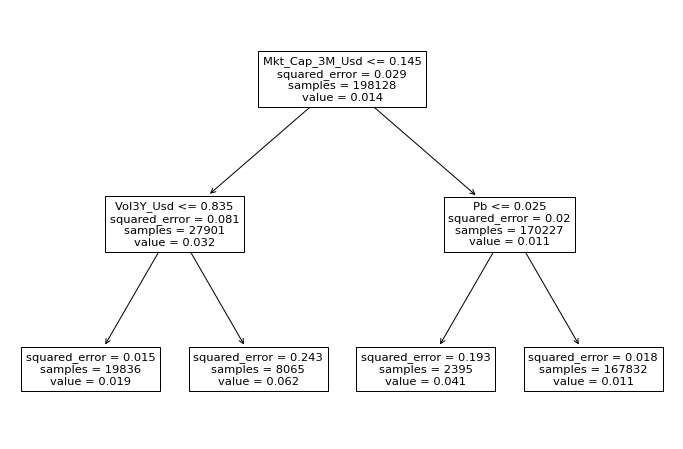

In [61]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

fit_tree_simple = DecisionTreeRegressor(ccp_alpha=0.00001, max_depth=2) # NOTE: smaller ccp_alpha than that in R coding
fit_tree_simple.fit(training_sample[features], training_sample['R1M_Usd'])
plt.figure(figsize=(12, 8))
plot_tree(fit_tree_simple, feature_names=features)
plt.show()

The model depicted in the figure above only has 4 clusters, which means that the predictions can only take 4 values. The smallest one is 0.011 and encompasses a large portion of the sample (about 85\%) and the largest one is 0.062 and corresponds to only 4% of the training sample.

We are then able to compute the bias and variance of the predictions on the *testing* set.

In [34]:
np.mean(fit_tree_simple.predict(test_sample[features]) - test_sample['R1M_Usd'])

0.004973916538330343

In [35]:
np.var(fit_tree_simple.predict(test_sample[features]))

0.00013979828544752204

On average, the error is slightly positive, with an overall overestimation of 0.005. As expected, the variance is very small $(10^{-4})$.

For the complex model, we take the boosted tree that was obtained in Section 6.4.6 (`fit_xgb`) which aggregates 40 trees with a maximum depth 4.

In [2]:
import xgboost as xgb

r1m_use_quantiles = (training_sample['R1M_Usd'].quantile(0.2), training_sample['R1M_Usd'].quantile(0.8))
features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]

training_samples_xgb = training_sample[(training_sample['R1M_Usd'] < r1m_use_quantiles[0]) | (training_sample['R1M_Usd'] > r1m_use_quantiles[1])].reset_index().drop(columns = 'index')

training_features_xgb = training_samples_xgb[features_short]
training_label_xgb = training_samples_xgb['R1M_Usd']
train_matrix_xgb = xgb.DMatrix(data = training_features_xgb, label = training_label_xgb)

In [57]:
mono_const = (0, 0, -1, 1, 0, -1, 0)
fit_xgb = xgb.XGBRegressor(learning_rate = 0.3,
                           max_depth = 4,
                           subsample = 0.6,
                           colsample_bytree = 0.7,
                           reg_lambda = 1,
                           gamma = 0.1,
                           n_estimators = 40,
                           monotone_constraints = mono_const,
                           booster = 'gbtree')
fit_xgb.fit(X = training_features_xgb, y = training_label_xgb)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints=(0, 0, -1, 1, 0, -1, 0), n_estimators=40,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [58]:
xgb_test = test_sample[features_short]
np.mean(fit_xgb.predict(xgb_test) - test_sample['R1M_Usd'])

0.002358097505734665

In [59]:
np.var(fit_xgb.predict(xgb_test))

0.0033260083

The bias is indeed smaller compared to that of the simple model, but in exchange, the variance increases substantially. The net effect (via the *squared bias*) is in favor of the simpler model.

### The Risk of Overfitting: Principle

The notion of **overfitting** is one of the most important in machine learning. When a model overfits, the accuracy of its predictions will be disappointibng, thus it is one major reason why *some* strategies fail out-of-sample. Overall, we should understand *how to mitigate its effects*.

Recent reference: Hsu et al. (2018) for portfolio strategies, which builds on the work of White (2000). Both of these references do not deal with ML models, but the principle is the same - whether patterns detected are spurious.

In the following figure 10.8, we illustrate this idea with a simple visual example. A model maps $x$ into $y$ trains on data with small black circles:
- The simplest model is a constant (with only 1 parameter)
- With 2 parameters the fit is already quite good (the blue line). 
- With a sufficient number of parameters, it's possible to build a model that flows through all the points (one example with the red line). 

Now there seems to be a strange point in the dataset and the complex model fits closely to match this point.

![FIGURE 10.8: Illustration of overfitting: a model closely matching training data is rarely a good idea.](images/figure10-8.png)

A new point is added in light green which fairly follows the general pattern of the other points. The simple model is not perfect and the error is non-negligible. Nevertheless, the error stemming from the complex model (dotted gray line) is approximately twice as large - which catch *idiosyncracies* that will not occur in other datasets. These idiosyncracies should be overlooked.

### The Risk of Overfitting: Some Solutions

Obviously, the easiest way to avoid overfitting is to "avoid" complicated models.

The complexity of models is often proxied via two measures:
- The number of parameters
- Their magnitude (often synthesized through their norm)

These proxies are not perfect because some *complex* models may only require a small number of parameters (or even small parameter values), but at least they are straightforward and easy to handle. Thus, there is no universal way to handle overfitting. Below, we detail a few tricks for some families of ML tools.

For **regressions**, there are two simple ways to deal with overfitting.
- *Select a subsample of features* to reduce the number of parameters (predictors), especially highly-correlated ones (with correlation >70\%).
- *Penalization* (via LASSO, ridge or elasticnet) to reduce the magnitude of estimates and thus the variance of predictions.

For **tree-based methods**, when dealing with **simple trees**, the only way is to limit the number of leaves by:
- *Imposing a maximum depth* $d$ so that the tree can have at most $2^d$ terminal nodes. Usually we impose $d\leq 6$.
- *Shrink the size of trees* with `ccp_alpha`
- Imposes that any new split must lead to a reduction in loss greater than some `cp`
- Minimum number of instances required in each leaf
- Minimum number of instances per cluster to continue the splitting process

For **random forests**, theoretically (Breiman, 2001), control *the number of trees* only help reduce the total error via diversification rather than avoid overfitting. In practice, and for the sake of computation times, it's not recommended to go beyond 1000 trees. Other choices are the subsample size and the number of features retained for learning.

**Boosted trees** have other options that can help alleviate the risk of overfitting. The most obvious one is the *learning rate* which discounts the impact of each new tree by $\eta \in (0,1)$. When the learning rate is high, the algorithm learns too quickly and is prone to sticking close to the training data, while with low learning rate the model learns very progressively which can be efficient if there are sufficiently many trees in the ensemble. Indeed, the learning rate and the number of trees must be chosen synchronously (not both low or both large). Besides, *the penalizations, both of score values and of the number of leaves*, are naturally a tool of preventing overfitting.

Finally, constraints of monotonicity like those mentioned in Section 6.4.5 are also an efficient way to impose some structure on the model and force it to detect particular patterns.

Lastly, **neural networks** also have many options aimed at protecting from overfitting.
- Learning rate
- Penalization of weights and biases
- Constraints, e.g., non-negativity
- Dropout

## The Search for Good Hyperparameters

### Methods

Let us assume that there are $p$ parameters defined. The simplest way to proceed is to test different values and choose the one that yields the best results - *independently or sequentially*.

Independent tests are easy and come in two families: 
- *Grid (deterministic) Search*: no corners are omitted but computationally expensive. For example, each parameter is tested for 5 values which gives $5^p$ combinations. When $p$ is large (say, over 5), this may become prohibitive.
- *Random Exploration*: specifies the number of tests upfront and the parameters are drawn randomly. This can omit some optimal parameters, but Bergstra and Bengio (2012) showed that random exploration is preferable to grid search.

Note that both of them can be *suboptimal* because they are likely to spend time in zones where the parameter space is irrelevant, thereby wasting computation time. It's preferable to focus the search in areas *where the best points are most likely*. This is possible via an interative process that adapts the search after eaqc new point has been tested.

One other popular approach in this direction is **Bayesian optimization** (BO). The central object is the objective function of the learning process. We call this function $O$ which can be widely seen as a loss function possibly combined with penalization and constraints. For simplicity here, we will consider training/testing samples as fixed. The variable of interest is the vector $\boldsymbol{p}=(p_1,\dots,p_l)$ which synthesizes the hyperparameters that have an impact on $O$. The program we are interested in is $$\boldsymbol{p}_*=\arg\min_{\boldsymbol{p}}O(\boldsymbol{p})$$
The main problem with this optimization is that the computation of $O(\boldsymbol{p})$ is very costly. Therefore, it's critical to choose each trial for $\boldsymbol{b}$ wisely. One key assumption of BO is that the distribution of $O$ is *Gaussian* and that $O$ *can be proxied by a linear combination* of $p_l$ - the aim is to build a Bayesian linear regression between the input $\boldsymbol{p}$ and the output $O$. Once a model has been estimated, the information that is concentrated in the posterior density of $O$ is used to make an educated guess at where to look for new values of $\boldsymbol{p}$.

This educated guess is made based on a so-called **acquisition function**. Suppose we have tested $m$ values for $\boldsymbol{p}$, which we write $\boldsymbol{p}^{(m)}$. The current best parameter is $\boldsymbol{p}_m^*=\arg\min_{1\leq k\leq m} O(\boldsymbol{p}^{(k)})$. If we test a new point $\boldsymbol{p}$, then it will lead to an improvement only if $O(\boldsymbol{p}) < O(\boldsymbol{p}^{*}_{m})$, that is the new objective improves the minimum value that we already know. The average value of this improvement is $$\textbf{EI}_m(\boldsymbol{p})=\mathbb{E}_m[[O(\boldsymbol{p}_m^*)-O(\boldsymbol{p})]_+]$$
where the positive part $[\cdot]_+$ emphasizes that when $O(\boldsymbol{p}) \geq O(\boldsymbol{p}^{*}_{m})$ the gain is zero. The best choice for the next sample $\boldsymbol{p}^{m+1}$ is then $$\boldsymbol{p}^{m+1}=\arg\max_{\boldsymbol{p}}\textbf{EI}_m(\boldsymbol{p})$$
which corresponds to the maximum location of the expected improvement. Instead of the EI, the optimization can be performed on other measures, like the probability of improvement, which is $\mathbb{P}_m[O(\boldsymbol{p})<O(\boldsymbol{p}_m^*)]$.

In compact form, the process can be outlines as follows:
- **Step 1:** Compute $O(\boldsymbol{p}^{(m)})$ for $m=1,\dots,M_0$ values of parameters.
- **Step 2a:** Compute sequentially the posterior density of $O$ on all available points.
- **Step 2b:** Compute the optimal new point to test $\boldsymbol{p}^{m+1}$ given in $\boldsymbol{p}^{m+1}=\arg\max_{\boldsymbol{p}}\textbf{EI}_m(\boldsymbol{p})$.
- **Step 2c:** Compute the new objective value $O(\boldsymbol{p}^{m+1})$.
- **Step 3:** Repeat steps 2a to 2c as much asa deemed reasonable and return the $\boldsymbol{p}^m$ that yields the smallest objective value.

Interested readers can refer to Snock et al. (2012) and Frazier (2018) for more details on the numerical facets of this method.

Finally, for the sake of completeness, we mention a last way to tune hyperparameters. Since the optimization scheme is $\arg\min_{\boldsymbol{p}} O(\boldsymbol{p})$, a nutral way wuold be to use the sensitivity of $O$ w.r.t. $\boldsymbol{p}$. Indeed, if the gradient $\frac{\partial O}{\partial p_l}$ is known, then a *gradient descent* will always improve the objective value. The problem is that it is hard to compute a reliable gradient (finite differences can become costly). We refer to Maclaurin et al. (2015) to ways that successfully optimize over large dimensional parameter spaces.

We conclude by mentioning the survey Bouthillier and Varoquaux (2020), which spans 2 major AI conferences that took place in 2019. It shows that most papers resort to hyperparameter tuning. The two most often cited methods are *manual turning* (hand-picking) and *grid search*.

### Example: Grid Search

In order to illustrate the process of grid search, we will try to find the best parameters for a boosted tree. We seek to quantify the impact of three parameters:
- **ETA** $\eta$, the learning rate;
- **N_ROUNDS** or **`N_estimators`**, the number of trees that are grown;
- **Lambda** or $\lambda$, the weight regularizer which penalizes the objective function through the total sum of squared weights/scores.

Below, we create a grid with the values we want to test for these parameters.

In [14]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grids = {
    "learning_rate": [0.1, 0.3, 0.5, 0.7, 0.9],
    "n_estimators": [10, 50, 100],
    "reg_lambda": [0.01, 0.1, 1, 10, 100]
}

xgb_tmp_model = XGBRegressor(max_depth=5, objective="reg:squarederror", gamma=0.1)
xgb_grid_search = GridSearchCV(xgb_tmp_model, param_grid=param_grids, 
                               scoring='neg_mean_squared_error',
                               verbose=1)
xgb_grid_search.fit(training_features_xgb, training_label_xgb)
print(f'Best Parameters using grid search: {xgb_grid_search.best_params_}')

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best Parameters using grid search: {'learning_rate': 0.1, 'n_estimators': 50, 'reg_lambda': 100}


Once the squared mean errors have been gathered, it is possible to plot them. We chose to work with 3 parameters on purpose because their influence can be simultaneuously plotted on one graph.

In [16]:
def facet_visualization(cv_results):
    res_df = pd.DataFrame(cv_results, 
                          columns = ["param_n_estimators","param_learning_rate","param_reg_lambda","mean_test_score"])
    color_list = ['darkorange', 'olive', 'seagreen', 'cornflowerblue', 'crimson']
    # Note, MAE is made negative in the scikit-learn library so that it can be maximized. 
    # As such, we can ignore the sign and assume all errors are positive.
    res_df['mean_test_score'] = -res_df['mean_test_score'].values

    fig, axes = plt.subplots(figsize=(20, 12), nrows=3, ncols=5)
    ax_all = plt.gca()

    cnt = 0
    for param, tmp in res_df.groupby(["param_n_estimators", "param_reg_lambda"]):
        ax = axes[cnt//5][cnt%5] # get the ax
        np.round(tmp[["param_learning_rate","mean_test_score"]], 2).plot.bar(ax=ax, x="param_learning_rate", y="mean_test_score", alpha=0.5,legend=None, color=color_list)
        ax.set_xlabel("") # no xlabel
        ax.set_ylim(0, 0.1) # set y range
        # adjust xtick labels / adjust ytick labels
        if cnt // 5 < 2:
            ax.xaxis.set_ticklabels("")
        else:
            for label in ax.get_xticklabels():
                label.set_rotation(0);
        if cnt % 5 > 0:
            ax.yaxis.set_ticklabels("")
        # set title
        ax.set_title(f"num_trees={param[0]},\n reg_lambda={param[1]}",fontsize=10)
        cnt += 1
    # fig.subplots_adjust(wspace=0.1, hspace=0.25)
    fig.supxlabel('Eta', x=0.5, y=0.05, fontsize=30)
    fig.supylabel('Error', x=0.08, y=0.5, fontsize=30)
    plt.show()

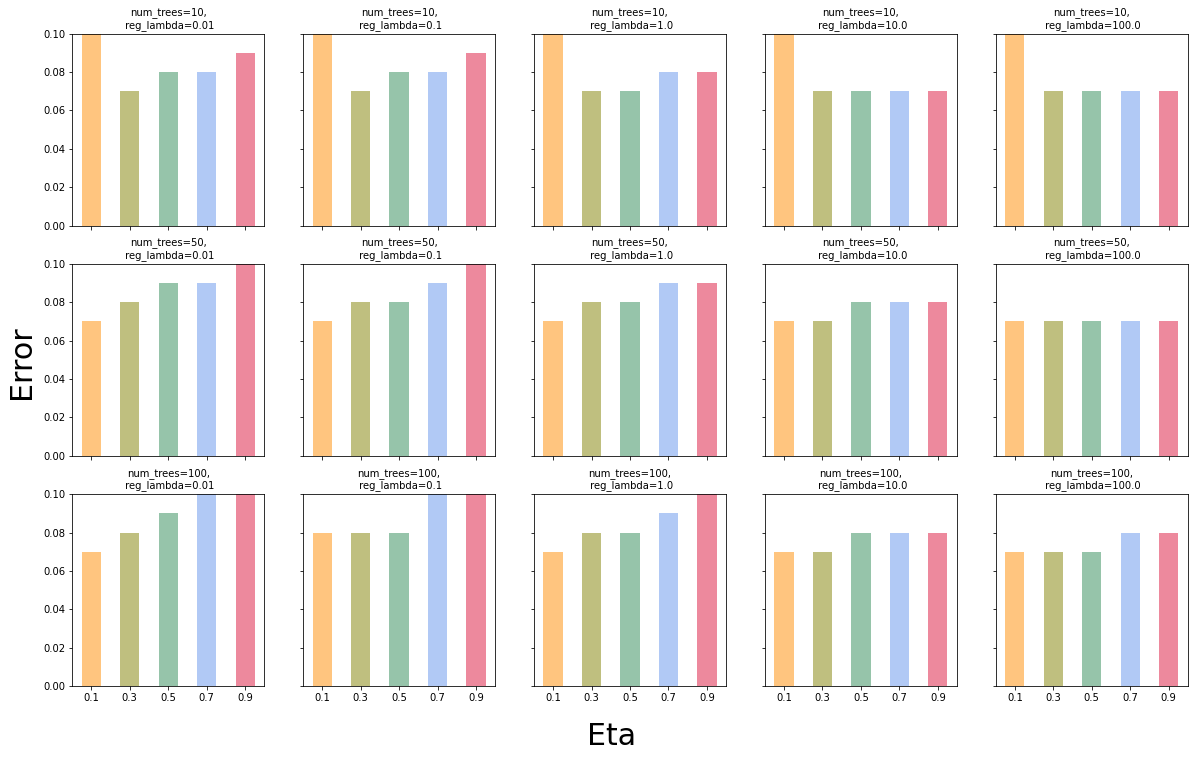

In [15]:
cv_results = xgb_grid_search.cv_results_
facet_visualization(cv_results)

In Figure 10.9, the main information is that a small learning rate $(\eta=0.1)$ is detrimental to the quality when the number of trees is small (`n_estimators`$=10$), which means that the algorithm does not learn enough.

Grid search can be performed in two stages: 
- The first helps locates the zones of interest
- The second zoom in on those zones with refined values for the parameter

With the results above, you would consider in this case:
- many learners (more than 50, possibly more than 100)
- avoid large learning rates such as $\eta=0.9$ or $\eta=0.8$.

### Example: Bayesian Optimization

There are several Python packages relate to Bayesian optimization, such as `PyMC`, `skopt` or `HyperOpt`, etc. We work with `Scikit-Optimize` or `skopt` as an example.

Just as for the grid search, we need to code the objective function on which the hyperparameters will be optimized.

In [7]:
from skopt import BayesSearchCV
xgb_bayes_search = BayesSearchCV(xgb_tmp_model, search_spaces=param_grids, 
                                 scoring='neg_mean_squared_error')
xgb_bayes_search.fit(training_features_xgb, training_label_xgb)

c:\Users\SamuelZhang\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BayesSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.1, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bi...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
              scoring='neg_mean_squared_error',
              search_spaces={'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
                             'n_estimators': [10, 50, 100],
                             'reg_lambda': [0.01, 0.1, 1, 10, 100]})

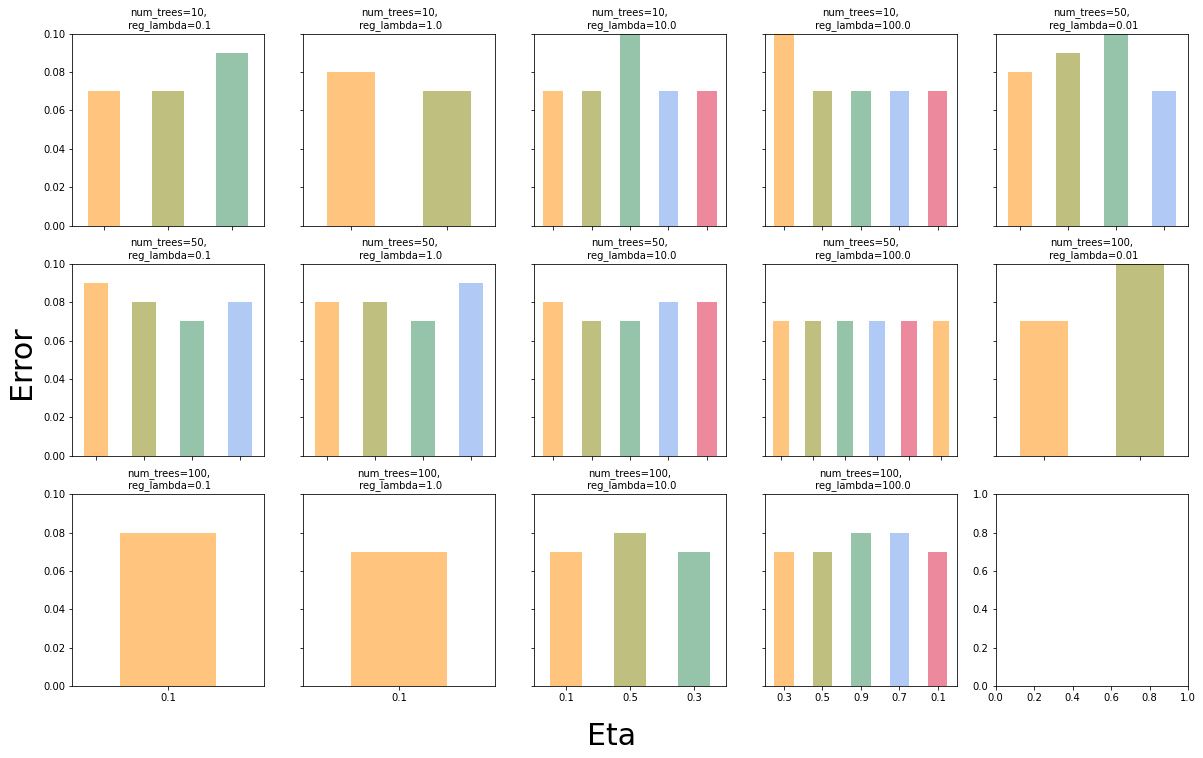

In [13]:
cv_results_bayes = xgb_bayes_search.cv_results_
facet_visualization(cv_results_bayes)

In [17]:
xgb_bayes_search.best_params_

OrderedDict([('learning_rate', 0.1),
             ('n_estimators', 50),
             ('reg_lambda', 100.0)])

## Short Discussion on Validation in Backtests

The topic of validation in backtests is more complex than it seems.

(Option 1 as follows)

Let us start with building a unique model and to test it on different time periods. There is ongoing debate on how to validate a model in that case. Usually, it makes sense to test the model on successive dates, moving forward posterior to the training, which would replicate what would happen in a live situation.

In machine learning, a popular approach is to split the data into $K$ partitions and to test $K$ different models on one partition but trained on the $K-1$ others. This so-called **cross-validation (CV)** is proscribed by most experts for simply, most of time, the training set encompasses data from future dates and tests on past values. Nonetheless, some advocate one particular form of CV aiming at making sure that there is no informational overlap between the training and testing set - if the structure of the cross-section of returns is constant over time, then training on future while testing on past data is not problematic as long as there is no overlap. You may refer to Schnaubelt (2019) for a comprehensive tour in validation schemes.

One example cited in De Prado (2018) is the reaction to a model to an unseen crisis - no major financial shake since 2008, so one option is to test a model trained with recent years (say 2015-2019) and test in on various months in 2008 to see how it performs.

The advantage of a fixed model is that validation is easy and can be easily repeated for different sets of parameters.

(Option 2 as follows)

The second major option is when the model is updated (retrained) at each rebalancing - the structure of returns may evolve through time and a dynamic model will capture the most recent trends. The drawback is that validation should be rerun at each rebalancing date.

Let us recall the dimensions of backtests:
- Number of **strategies**: possibly dozens or hundreds, or even more
- Number of trading **dates**: hundreds for monthly rebalancing
- Number of **assets**: hundreds of thousands
- Number of **features**: dozens or hundreds

Even with a lot of computational power, training many models over many dates is time-consuming, especially when it comes to hyperparameter tuning when the parameter space is large. Thus, validating models at each trading date of the out-of-sample period is not realistic.

One solution is to keep an early portion of the training data and to perform a smaller scale validation on this subsample. Hyperparameters are tested on a limited number of dates and most of the time, they exhibit stability: satisfactory parameters for one date are usually acceptable for the next one and following ones as well. Thus, the full backtest can be carried out with these values when updating the models at each period. The backtest nonetheless remains compute-intensive because the model has to be retrained with the most recent data for each rebalancing date.

## Takeaways

- Learning Metrics
  - Aim: measuring model performance (with different sets of *hyperparameters*)
  - Regression Analysis
    - MAE, MSE(RMSE), $R^2$, MAPE, MASE, RMSLE
    - MSE may not be optimal for factor investing because the cross-sectional term is most important and always to the investor's benefit
  - Classification Analysis
    - TP, TN, FP, FN, confusion matrix
    - Accuracy, Recall, Precision, Specificity, Fallout, F-score
    - ROC curve: specificity and sensitivity under different thresholds
    - AUC: Area Under (ROC) Curve, usually greater than 0.5
- Validation
  - Variance-bias tradeoff
    - Decompose $\mathbb{E}[\hat{\epsilon}^2]$ into variance and squared bias part
    - Model complexity: trade-off with error (e.g. ridge regression)
  - Overfitting
    - Spurious patterns (or "idiosyncracies") in the training data
    - Solutions: less complicated models
      - Regression: number of predictors, penalization
      - Simple Trees: number of leaves, max depth, minimum loss reduction, minimum instances per leaf, minimum instances per cluster for future splitting, etc.
      - Random Forests: number of trees, subsample size, number of features
      - Boosted Trees: learning rate, penalizations (on score values and number of leaves)
      - Neural Networks: learning rate, penalization, constraints, dropout
- The Search for Good Hyperparameters
  - Grid Search: Exhaustive but computationally expensive
  - Random Search: More efficient but can omit optimal parameters
  - Bayesian Optimization: Gaussian distribution assumption, acquisition function, expected improvement
- Validation in Backtests
  - Option 1: model fixed and cross-validation
    - Debate on whether training with future data while testing with historical data is fine
    - May be useful to test the model against crisis
    - Easier validation
  - Option 2: model updated at each rebalancing
    - Validation is time-consuming
    - A smaller scale validation on a subsample of training data

# Ensemble Models

A natural and tempting alternative is to **combine** several algorithms (or the predictions that result from them) to try to extract value out of each engine (or learner). This intention is not new and contributions towards this goal go back at least to Bates and Granger (1969).

Below we outline a few books on the topic of *ensembles*, or synonyms, such as **forecast aggregation, model averaging, mixture of experts or prediction combination**:
- Zhou (2012): a very didactic book that covers the main ideas of ensembles
- Schapire and Freund (2012): the main reference for boosting (and hence, ensembling) with many theoretical results and thus strong mathematical groundings;
- Seni and Elder (2010): an introduction dedicated to tree methods mainly;
- Claeskens and Hjort (2008): an overview of model selection techniques with a few chapters focused on model averaging;
- Zhang and Ma (2012): a collection of thematic chapters on ensemble learning;
- Okun et al. (2011): examples of applications of ensembles.

In this chapter, we cover the basic ideas and concepts behind the notion of ensembles. For deeper treatments, you may refer to the above books (indeed, random forests and boosted trees discussed in Chapter 6 are examples of ensembles).

## Linear Ensembles

### Principles

In this chapter we adopt the following notations. We work with 
- $M$ models where $\tilde{y}_{i,m}$ is the prediction of model $m$ for instance $i$ and 
- Errors $\epsilon_{i,m}=y_i-\tilde{y}_{i,m}$ are stacked into a $(I \times M)$ matrix $\textbf{E}$
- A linear combination of models has sample error equal to $\textbf{Ew}$, where $\textbf{w}=w_m$ are weights assigned to each model such that $\textbf{w}'\textbf{1}_M=1$.
- Minimize the total (squared) error is thus a simple quadratic program with unique constraint. The Lagrange function is $L(\textbf{w})=\textbf{w}'\textbf{E}'\textbf{Ew}-\lambda(\textbf{w}'\textbf{1}_M-1)$ and hence $$\frac{\partial}{\partial \textbf{w}}L(\textbf{w})=\textbf{E}'\textbf{E}\textbf{w}-\lambda \textbf{1}_M=0 \quad \Leftrightarrow \quad \textbf{w}=\lambda(\textbf{E}'\textbf{E})^{-1}\textbf{1}_M$$
and the constraint imposes that $$\textbf{w}^*=\frac{(\textbf{E}'\textbf{E})^{-1}\textbf{1}_M}{(\textbf{1}_M'\textbf{E}'\textbf{E})^{-1}\textbf{1}_M}$$ This form is similar to that of minimum variance portfolios. If errors are unbiased $(\textbf{1}_I'\textbf{E}=\textbf{0}_M')$, then $\textbf{E}'\textbf{E}$ is the covariance matrix of errors.

This expression shows an important feature of optimized linear ensembles: they can only add value *if the models tell different stories*. If two models are redundant, $\textbf{E}'\textbf{E}$ will be close to singular and $\textbf{w}^*$ will arbitrage one against the other in a spurious fashion. This is the exact same problem as when mean-variance portfolios are constituted with highly correlated assets: diversification will fail because when things go wrong, all assets go down.

In the limit when correlations increase to 1, the above formulation becomes highly unstable and ensembles cannot be trusted. One heuristic way to see this is when $M=2$ and
$$\textbf{E}'\textbf{E}=\left[
\begin{array}{cc} \sigma_1^2 & \rho\sigma_1\sigma_2 \\
\rho\sigma_1\sigma_2 & \sigma_2^2 \\
\end{array}
\right] \quad \Leftrightarrow  \quad 
(\textbf{E}'\textbf{E})^{-1}=\frac{1}{1-\rho^2}\left[
\begin{array}{cc} \sigma_1^{-2} & -\rho(\sigma_1\sigma_2)^{-1} \\
-\rho(\sigma_1\sigma_2)^{-1} & \sigma_2^{-2} \\
\end{array}
\right]$$
so that when $\rho \rightarrow 1$, the model with minimum $\sigma_i^2$ will see its weights towards *infinity* while the model model will have a similarly large **negative weight**: the model arbitrage between them. That seems like a very bad idea.

There is another illustration of the issues caused by correlations. Let’s assume we face $M$ correlated errors $\epsilon_m$ with pairwise correlation $\rho$, zero mean and variance $\sigma^2$. The variance of errors is 
\begin{align*}
\mathbb{E}\left[\frac{1}{M}\sum_{m=1}^M \epsilon_m^2 \right]&=\frac{1}{M^2}\left[\sum_{m=1}^M\epsilon_m^2+\sum_{m\neq n}\epsilon_n\epsilon_m\right] \\
&=\frac{\sigma^2}{M}+\frac{1}{M^2}\sum_{n\neq m} \rho \sigma^2 \\
& =\rho \sigma^2 +\frac{\sigma^2(1-\rho)}{M}
\end{align*}
where while the second term converges to 0 as $M$ increases, the *first* term remains and is **linearly increasing** with $\rho$. In passing, because variances are always positive, this result implies that the *common pairwise correlation between $M$ variables is bounded below by $-(M-1)^{-1}$*. This result is interesting but rarely found in textbooks.

One improvement to circumvent this is to *enforce positivity constraints* on the weights (by Breiman, 1996):
$$\underset{\textbf{w}}{\text{argmin}} \ \textbf{w}'\textbf{E}'\textbf{E}\textbf{w} , \quad \text{s.t.} \quad \left\{ 
\begin{array}{l} \textbf{w}'\textbf{1}_M=1 \\ w_m \ge 0 \quad \forall m \end{array}\right.$$

Mechanically, if several models are highly correlated, the constraint will impose that only one of them will have a non-zero weight - *selection* of models. Jagannathan and Ma (2003) have shown the benefits of this constraint in portfolio optimization and construction of mean-variance allocations, and also of use to select *best* models in our case.

Some literature regarding forecast combination and model averaging (ensembles):
- Von Holstein (1972)
- Trimmed opinion pools compute *averages* over the predictions that are not too extreme (Grushka-Cockayne et al., 2016)
- Gaba et al. for a exhaustive list of combinations as well as an empirical study of their respective efficiency

Overall, findings are mixed and the heuristic simple average is, as usual, hard to beat. (see, e.g., Genre et al., 2013)

### Example

In order to build an example, we will gather some predictions and the corresponding errors into the $\textbf{E}$ matrix.

We will work with 5 models trained in previous chapters:
1. Penalized regression
2. Simple tree
3. Random forest
4. XGBoost
5. Feed-forward neural network

The training errors have zero means, hence $\textbf{E}'\textbf{E}$ is the covariance matrix of errors between the models.

In [1]:
import numpy as np
import pandas as pd

data_ml = pd.read_pickle('./data/data_ml.pkl')
separation_date = pd.to_datetime('2014-01-15')

training_sample = data_ml[data_ml['date'] < separation_date]
test_sample = data_ml[data_ml['date'] > separation_date]

In [2]:
from sklearn.linear_model import ElasticNet

features = data_ml.columns[2:95]
y_train = training_sample['R1M_Usd']
X_train = training_sample[features]

fit_pen_pred = ElasticNet(alpha = 0.1, l1_ratio = 0.1).fit(X_train, y_train)

In [3]:
from sklearn.tree import DecisionTreeRegressor
fit_tree = DecisionTreeRegressor(min_samples_leaf = 3500, min_samples_split = 8000, max_depth = 3, ccp_alpha = 1e-6)
fit_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=1e-06, max_depth=3, min_samples_leaf=3500,
                      min_samples_split=8000)

In [4]:
from sklearn.ensemble import RandomForestRegressor

fit_rf = RandomForestRegressor(max_samples = 10000, 
                               n_estimators = 40,
                               max_features = 30,
                               min_samples_split = 250)
fit_rf.fit(X_train, y_train)

RandomForestRegressor(max_features=30, max_samples=10000, min_samples_split=250,
                      n_estimators=40)

In [5]:
import xgboost as xgb

mono_const = (0, 0, -1, 1, 0, -1, 0)
fit_xgb = xgb.XGBRegressor(learning_rate = 0.3,
                           max_depth = 4,
                           subsample = 0.6,
                           colsample_bytree = 0.7,
                           reg_lambda = 1,
                           gamma = 0.1,
                           n_estimators = 30,
                           monotone_constraints = mono_const,
                           rate_drop = 0.1,
                           booster = 'dart')
fit_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='dart', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints=(0, 0, -1, 1, 0, -1, 0), n_estimators=30,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [10]:
import keras
from keras.layers import Dense, Flatten, Input
from keras import Model
import keras.backend as K

K.clear_session()
input_layer = Input((X_train.shape[1], ))
x = input_layer
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='tanh')(x)
x = Dense(1)(x) # No activation means linear activation: f(x) = x
output_layer = x
model = Model(input_layer, output_layer)
model.compile(
    loss='mse',
    optimizer='RMSprop',
    metrics=['mae']
)
model.fit(
    X_train, y_train,
    epochs = 10, batch_size = 512,
    verbose=0
)

In [13]:
# save these models so that you can use 
# fit_pen_pred = joblib.load('models/fit_pen_pred.pkl')
# to load the models instead of re-training them
import joblib
joblib.dump(fit_pen_pred, 'models/fit_pen_pred.pkl')
joblib.dump(fit_tree, 'models/fit_tree.pkl')
joblib.dump(fit_rf, 'models/fit_rf.pkl')
joblib.dump(fit_xgb, 'models/fit_xgb.pkl')
model.save('/models/fit_NN.pkl')

INFO:tensorflow:Assets written to: /models/fit_NN.pkl\assets


In [17]:
err_pen_train = fit_pen_pred.predict(X_train) - y_train
err_tree_train = fit_tree.predict(X_train) - y_train
err_RF_train = fit_rf.predict(X_train) - y_train
err_XGB_train = fit_xgb.predict(X_train) - y_train
err_NN_train = model.predict(X_train).reshape((1, -1))[0] - y_train

6192/6192 [==============================] - 6s 1ms/step


In [24]:
E = pd.DataFrame([err_pen_train, err_tree_train, err_RF_train, err_XGB_train, err_NN_train], 
                 index=['Pen_reg', 'Tree', 'RF', 'XGB', 'NN']).T
E.corr()

Pen_reg      Tree        RF       XGB        NN
Pen_reg  1.000000  0.997285  0.996307  0.967744  0.996733
Tree     0.997285  1.000000  0.996878  0.968973  0.997258
RF       0.996307  0.996878  1.000000  0.969068  0.996573
XGB      0.967744  0.968973  0.969068  1.000000  0.969135
NN       0.996733  0.997258  0.996573  0.969135  1.000000

As is shown by the correlation matrix, the models fail to generate heterogeneity in their predictions. The minimum correlation (though above 95%!) is obtained by the boosted tree models. Below, we compare the training accuracy of models by computing the average absolute value of errors.

In [25]:
E.abs().mean()

Pen_reg    0.083459
Tree       0.083689
RF         0.083390
XGB        0.083461
NN         0.084237
dtype: float64

The best performing ML engine is the random forest. The NN model (in Python here) is the worst by far. Below we compute the optimal (non-constrained) weights for the combination of models.

In [30]:
w_ensemble = np.linalg.inv(np.dot(E.T, E)).dot(np.ones(5))
w_ensemble /= w_ensemble.sum()
w_ensemble

array([-0.5353979 , -0.52706913,  0.26167191,  1.75265629,  0.04813884])

Because of the high correlations, the optimal weights are not balanced and diversified: they load heavily on the XGB and RF learner and "short" a few models in order to compensate. The model with the largest negative weights (`pen_reg`) has a very high correlation with the XGB algorithm.

Note that the weights are of course computed with **training errors**. The optimal combination is then tested on the testing sample. Below, we compute out-of-sample (testing) errors and their average absolute value.

In [31]:
y_test = test_sample['R1M_Usd']
X_test = test_sample[features]

err_pen_test = fit_pen_pred.predict(X_test) - y_test
err_tree_test = fit_tree.predict(X_test) - y_test
err_RF_test = fit_rf.predict(X_test) - y_test
err_XGB_test = fit_xgb.predict(X_test) - y_test
err_NN_test = model.predict(X_test).reshape((1, -1))[0] - y_test

2194/2194 [==============================] - 2s 1ms/step


In [33]:
E_test = pd.DataFrame([err_pen_test, err_tree_test, err_RF_test, err_XGB_test, err_NN_test], index=['Pen_reg', 'Tree', 'RF', 'XGB', 'NN']).T
E_test.abs().mean()

Pen_reg    0.066182
Tree       0.066911
RF         0.067125
XGB        0.068281
NN         0.067351
dtype: float64

In this case the boosted tree model is the worst performing algorithm while simple models (regression and simple tree) are the ones that fare the best. The most naive combination is the simple average of model and predictions.

In [35]:
err_EW_test = E_test.mean(axis=1)
err_EW_test.abs().mean()

0.0666100436921366

Because the errors are very correlated, the equally weighted combination of forecasts yields an average error which lies 'in the middle' of individual errors. The diversification benefits are too small. Let us now test the 'optimal' combination $\textbf{w}^*=\frac{(\textbf{E}'\textbf{E})^{-1}\textbf{1}_M}{(\textbf{1}_M'\textbf{E}'\textbf{E})^{-1}\textbf{1}_M}$.

In [38]:
err_opt_test = np.dot(E_test, w_ensemble)
np.mean(np.abs(err_opt_test))

0.0707978219972395

Again, the result is disappointing because of the lack of diversification across models. The correlations between errors are high not only on the training sample, but also on the testing sample, as shown below.

In [39]:
E_test.corr()

Pen_reg      Tree        RF       XGB        NN
Pen_reg  1.000000  0.997301  0.996819  0.973308  0.996442
Tree     0.997301  1.000000  0.997636  0.975154  0.997548
RF       0.996819  0.997636  1.000000  0.975311  0.997167
XGB      0.973308  0.975154  0.975311  1.000000  0.975152
NN       0.996442  0.997548  0.997167  0.975152  1.000000

The leverage from the optimal solution only exacerbates the problem and underperforms the heuristic uniform combination. We end this section with the constrained formulation of Breiman (1996) with the `CVXPY` package. If we write $\boldsymbol{\Sigma}$ for the covariance matrix of errors, we seek
$$\mathbf{w}^*=\underset{\mathbf{w}}{\text{argmin}} \ \mathbf{w}'\mathbf{\Sigma}\mathbf{w}, \quad \mathbf{1}'\mathbf{w}=1, \quad w_i\ge 0$$
The constraints will be handled as:

\begin{align*}
\mathbf{A} \mathbf{w}=\begin{bmatrix} 
1 & 1 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \end{bmatrix} \mathbf{w} \hspace{9mm} \text{ compared to} \hspace{9mm} \mathbf{b}= \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
\end{align*}

where the first line will be an equality (weights sum to one) and the last three will be inequalities (weights are all positive).

In [45]:
import cvxpy as cp

Sigma = np.dot(E.T, E)
n_mods = Sigma.shape[1]

# Ensure non-negativity for weights
weights = cp.Variable(shape=(n_mods, ), nonneg=True)
# The weights should sum to 1
constraints = [np.ones(n_mods) @ weights == 1.0]
# define the problem as a quadratic form
problem = cp.Problem(cp.Minimize(cp.quad_form(weights, Sigma)),
                     constraints)
# You may also solve the problem with a open-source solver like `ECOS`
problem.solve(solver='MOSEK')
weights.value

array([4.16114830e-09, 2.60512423e-09, 2.67502324e-09, 9.99999988e-01,
       2.57353829e-09])

Compared to the unconstrained solution, the weights are sparse and concentrated in one or two models, usually those with small training sample errors.

## Stacked Ensembles

### Two-stage Training

**Stacked ensembles** are a natural generalization of linear ensembles. The idea of generalizing linear ensembles goes back at least to Wolpert (1992b). In the general casse, the training is performed in two stages:
1. First, train $M$ models independently, yielding the predictions $\tilde{y}_{i,m}$ for instance $i$ and model $m$.
2. The second step is to consider the output of the trained models as input for a new level of ML optimization, i.e., train a new learner $h$ for $\breve{y}_i=h(\tilde{y}_{i,1},\dots,\tilde{y}_{i,M})$.

Linear ensembles are of course stacked ensembles in which the second layer is a linear regression.

The same techniques are then applied to minimize the error between the true values $y_i$ and the predicted ones $\breve{y}_i$.

![FIGURE 11.1: Scheme of stacked ensembles.](images/figure11-1.png)

### Codes and Results

Below, we create a low-dimensional neural network which takes in the individual predictions of each model and compiles them into a synthetic forecast.

In [69]:
K.clear_session()
input_layer = Input((n_mods, ))
x = input_layer
x = Dense(8, activation='relu')(x)
x = Dense(4, activation='tanh')(x)
x = Dense(1)(x) # No activation means linear activation: f(x) = x
output_layer = x
model_stack = Model(input_layer, output_layer)
model_stack.compile(
    loss='mse',
    optimizer='RMSprop',
    metrics=['mae']
)
model_stack.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense (Dense)               (None, 8)                 48        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [70]:
model_names = ['Pen_reg', 'Tree', 'RF', 'XGB', 'NN']
# train preds
y_tilde = E + pd.DataFrame([y_train] * n_mods, index=model_names).T
# testing preds
y_test = E_test + pd.DataFrame([test_sample['R1M_Usd']] * n_mods, index=model_names).T
fit_NN_stack = model_stack.fit(y_tilde, y_train, 
                               epochs=12, batch_size=512,
                               validation_data=(y_test, test_sample['R1M_Usd']))

Epoch 1/12
387/387 [==============================] - 2s 4ms/step - loss: 0.0280 - mae: 0.0837 - val_loss: 0.0371 - val_mae: 0.0679
Epoch 2/12
387/387 [==============================] - 1s 3ms/step - loss: 0.0273 - mae: 0.0837 - val_loss: 0.0374 - val_mae: 0.0684
Epoch 3/12
387/387 [==============================] - 1s 3ms/step - loss: 0.0269 - mae: 0.0837 - val_loss: 0.0376 - val_mae: 0.0684
Epoch 4/12
387/387 [==============================] - 1s 3ms/step - loss: 0.0267 - mae: 0.0837 - val_loss: 0.0376 - val_mae: 0.0682
Epoch 5/12
387/387 [==============================] - 1s 3ms/step - loss: 0.0266 - mae: 0.0836 - val_loss: 0.0379 - val_mae: 0.0688
Epoch 6/12
387/387 [==============================] - 1s 3ms/step - loss: 0.0265 - mae: 0.0837 - val_loss: 0.0379 - val_mae: 0.0687
Epoch 7/12
387/387 [==============================] - 1s 3ms/step - loss: 0.0263 - mae: 0.0837 - val_loss: 0.0378 - val_mae: 0.0683
Epoch 8/12
387/387 [==============================] - 1s 3ms/step - loss: 0.

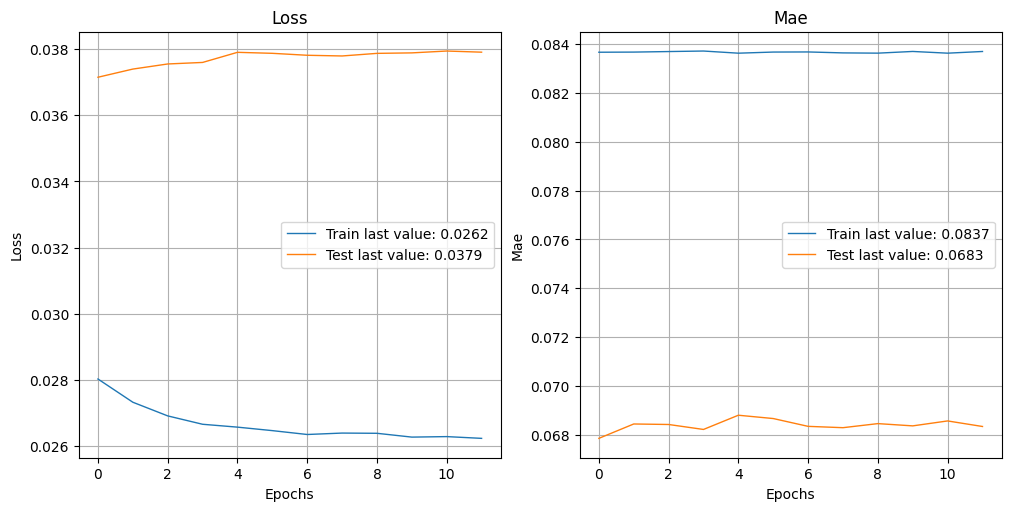

In [71]:
from plot_keras_history import show_history
show_history(fit_NN_stack)

The performance of the ensemble is again disappointing: the learning curve is flat, hence the rounds of back-propagation are useless. The training adds little value which means that the new overarching layer of ML does not enhance the original predictions. Again, this is because all ML engines seem to be capturing the same patterns and both their linear and non-linear combinations fail to improve their performance.

## Extensions

### Exogeneous Variables

In a financial context, macro-economic indicators could add value to the process. It's possible some models can perform better by introducing a flavor of **economic-driven conditionality** in the predictions.

Adding macro-variables to the set of predictors (here, predictions) $\tilde{y}_{i,m}$ could seem like one way to achieve this. However, this would amount to mix predicted values with (possibly scaled) economic indicators, which would not make much sense.

One alternative outside the perimeter of ensembles is to train *simple trees* on a set of macro-economic indicators. If the labels are the (possibly absolute) errors stemming from the original predictions, then the trees will create clusters of homogeneous error values. This will hint towards which conditions lead to best or worst forecasts.

We will test this idea below using aggregate data from the Federal Reserve of Saint Louis. A simple downloader in Python is the `pandas_datareader` package and we download and format the data next. `CPIAUCSL` is a code for consumer price index and `T10Y2YM` is a code for the term spread (10Y minus 2Y).

In [81]:
import pandas_datareader as pdr
fred_df = pdr.DataReader(['CPIAUCSL','T10Y2YM'], 'fred', "2010-01-01", "2021-12-31")
fred_df['inflation'] = fred_df['CPIAUCSL'] / fred_df['CPIAUCSL'].shift(1) - 1
fred_df = fred_df.rename(columns={'T10Y2YM': 'termspread'})
fred_df

CPIAUCSL  termspread  inflation
DATE                                       
2010-01-01   217.488        2.80        NaN
2010-02-01   217.281        2.83  -0.000952
2010-03-01   217.353        2.77   0.000331
2010-04-01   217.403        2.79   0.000230
2010-05-01   217.290        2.59  -0.000520
...              ...         ...        ...
2021-08-01   272.870        1.06   0.004070
2021-09-01   274.028        1.13   0.004244
2021-10-01   276.522        1.19   0.009101
2021-11-01   278.711        1.05   0.007916
2021-12-01   280.887        0.78   0.007807

[144 rows x 3 columns]

In [99]:
# The first day of the month
test_sample['Index'] = test_sample['date'].apply(lambda x: x + pd.DateOffset(days=1) + pd.DateOffset(months=-1))

ens_data = pd.merge(test_sample[['date', 'Index']], fred_df, left_on='Index', right_index=True, how='left')
ens_data['err_NN_test'] = err_NN_test
ens_data

C:\Users\SamuelZhang\AppData\Local\Temp\ipykernel_43564\3905439756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sample['Index'] = test_sample['date'].apply(lambda x: x + pd.DateOffset(days=1) + pd.DateOffset(months=-1))


date      Index  CPIAUCSL  termspread  inflation  err_NN_test
168    2014-01-31 2014-01-01   235.288        2.47   0.002424    -0.162756
169    2014-02-28 2014-02-01   235.547        2.38   0.001101     0.061890
170    2014-03-31 2014-03-01   236.028        2.32   0.002042    -0.025036
171    2014-04-30 2014-04-01   236.468        2.29   0.001864    -0.095926
172    2014-05-31 2014-05-01   236.918        2.17   0.001903    -0.092876
...           ...        ...       ...         ...        ...          ...
268331 2018-08-31 2018-08-01   251.663        0.25   0.001787    -0.044632
268332 2018-09-30 2018-09-01   252.182        0.23   0.002062     0.264800
268333 2018-10-31 2018-10-01   252.772        0.29   0.002340    -0.014334
268334 2018-11-30 2018-11-01   252.594        0.26  -0.000704     0.128499
268335 2018-12-31 2018-12-01   252.767        0.15   0.000685    -0.217466

[70208 rows x 6 columns]

We can now build a tree that tries to explain the accuracy of models as a function of macro-variables.

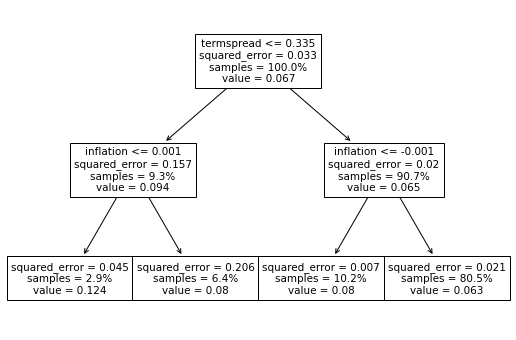

In [115]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

fit_ens = DecisionTreeRegressor(ccp_alpha=0.00001, max_depth=2)
fit_ens.fit(ens_data[['inflation', 'termspread']], ens_data['err_NN_test'].abs())
plt.figure(figsize=(9, 6))
plot_tree(fit_ens, feature_names=['inflation', 'termspread'], proportion=True)
plt.show()

The tree creates clusters with homogeneous values of absolute errors. One big cluster gathers 80.5% of the predictions (the rightmost one) and is the one with the smallest average. It corresponds to the periods when the termspread is greater than 0.335 (in percentage points). 
The second layers of splits are determined according to the level of inflation. If the latter smaller than 0.001, the mean absolute error is about 12%. If not, the value is about 8%.

This indicates that when the term spread is low and inflation negative, the model's predictions are not trustworthy because their errors have a magnitude twice as large as in other methods. Under these circumstances (which seem to be linked to a dire economic enviornment), it may be wiser not to use ML-based forecasts.

### Shrinking Inter-model Correlations

As shown earlier, a major problem with ensembles arises when the first layer of predictions is *highly correlated*. There are several tricks to help reduce this correlation, but the simplest and the best is probably to *alter training samples*. If algorithms do not see the same data, they will probably infer different patterns.

There are several ways to split the training data for different subsets of training samples.
- Random splits: easy and require only the target sample size to be fixed. If the original sample has $I$ instance and the ensemble requires $M$ models, then a subsample size of $\lfloor I/M \rfloor$ may be too conservative especially if the training sample is not very large. In this case, $\lfloor I/\sqrt{M} \rfloor$ may be a better alternative. Random forests are one example of ensembles built in random training samples.
- Deterministic splits: easy to reproduce and their outcome does not depend on the random seed. By the nature of *factor-based* training samples, we may split between *time and assets*.
  - Split in assets: train each model on a different set of stocks (randomly splitted or by some factor-based criterion, e.g., size, momentum, book-to-market ratio, etc.)
  - Split in dates: each model may stand for a particular kind of market condition.
  
Below we train 4 models on 4 different years to see if this helps reduce the inter-model correlations. Note that the third sample works on the small subset of features, hence the sample is smaller.

In [123]:
features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]

training_sample_2007 = training_sample[(training_sample.date >= '2007-01-01') & (training_sample.date <= '2007-12-31')]
training_sample_2009 = training_sample[(training_sample.date >= '2009-01-01') & (training_sample.date <= '2009-12-31')]
training_sample_2011 = training_sample[(training_sample.date >= '2011-01-01') & (training_sample.date <= '2011-12-31')][features_short + ['R1M_Usd']]
training_sample_2013 = training_sample[(training_sample.date >= '2013-01-01') & (training_sample.date <= '2013-12-31')]

Then, we proceed to the training of the models. We start with a penalized regression. In all predictions below, the original testing sample is used *for all models*.

In [120]:
from sklearn.linear_model import ElasticNet

y_ens_2007 = training_sample_2007['R1M_Usd']
x_ens_2007 = training_sample_2007[features]
fit_ens_2007 = ElasticNet(alpha = 0.1, l1_ratio = 0.1).fit(x_ens_2007, y_ens_2007)
err_ens_2007 = fit_ens_2007.predict(test_sample[features]) - test_sample['R1M_Usd']

We continue with a random forest.

In [121]:
from sklearn.ensemble import RandomForestRegressor

fit_ens_2009 = RandomForestRegressor(max_samples=4000, bootstrap=True,
                                     n_estimators=40, max_features=30,
                                     min_samples_leaf=100)
fit_ens_2009.fit(training_sample_2009[features], training_sample_2009['R1M_Usd'])
err_ens_2009 = fit_ens_2009.predict(test_sample[features]) - test_sample['R1M_Usd']

The third model is a boosted tree.

In [125]:
from xgboost import XGBRegressor

fit_ens_2011 = XGBRegressor(learning_rate = 0.4, 
                            objective = 'reg:squarederror',
                            max_depth = 4,
                            n_estimators = 18)
fit_ens_2011.fit(training_sample_2011[features_short], training_sample_2011['R1M_Usd'])
err_ens_2011 = fit_ens_2011.predict(test_sample[features_short]) - test_sample['R1M_Usd']

Finally, the last model is a simple neural network.

In [128]:
K.clear_session()
input_layer = Input((training_sample_2013[features].shape[1], ))
x = input_layer
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='tanh')(x)
x = Dense(1)(x)
output_layer = x
model_ens_2013 = Model(input_layer, output_layer)
model_ens_2013.compile(
    loss='mse',
    optimizer='RMSprop',
    metrics=['mae']
)
model_ens_2013.fit(
    training_sample_2013[features], training_sample_2013['R1M_Usd'],
    epochs = 9, batch_size = 512,
    verbose = 0
)

In [130]:
err_ens_2013 = model_ens_2013.predict(test_sample[features]).reshape((1, -1))[0] - test_sample['R1M_Usd']

2194/2194 [==============================] - 2s 952us/step


In [132]:
E_subtraining = pd.DataFrame([err_ens_2007, err_ens_2009, err_ens_2011, err_ens_2013], 
                             index=['err_ens_2007', 'err_ens_2009', 'err_ens_2011', 'err_ens_2013']).T
E_subtraining.corr()

err_ens_2007  err_ens_2009  err_ens_2011  err_ens_2013
err_ens_2007      1.000000      0.980763      0.646009      0.999284
err_ens_2009      0.980763      1.000000      0.641003      0.983698
err_ens_2011      0.646009      0.641003      1.000000      0.646517
err_ens_2013      0.999284      0.983698      0.646517      1.000000

The results are overall disappointing. Only one model manages to extract patterns that are somewhat different from the other ones, resulting in a 65% correlation across the board. Neural networks (on 2013 data) and penalized regressions (2007) remain highly correlated. One possible explanation could be that the models capture mainly noise and little signal. Working with *long-term labels* like annual returns could help improve diversification across models.

## Exercise

Build an integrated ensemble on top of 3 neural networks trained entirely with Keras. Each network obtains one third of predictors as input. The three networks yield a classification (yes/no or buy/sell). The overarching network aggregates the three outputs into a final decision. Evaluate its performance on the testing sample. Use the functional API.

In [140]:
training_features_1 = training_sample[features[:len(features) // 3]]
training_features_2 = training_sample[features[len(features) // 3:len(features) // 3 * 2]]
training_features_3 = training_sample[features[len(features) // 3 * 2:]]

test_features_1 = test_sample[features[:len(features) // 3]]
test_features_2 = test_sample[features[len(features) // 3:len(features) // 3 * 2]]
test_features_3 = test_sample[features[len(features) // 3 * 2:]]

In [150]:
from keras.layers import Dense, Flatten, Input, Concatenate
from keras import Model
import keras.backend as K

K.clear_session()
input_layer_1 = Input((training_features_1.shape[1], ))
x_1 = input_layer_1
x_1 = Dense(16, activation='relu')(x_1)
x_1 = Dense(8, activation='relu')(x_1)
x_1 = Dense(2, activation='softmax')(x_1)

input_layer_2 = Input((training_features_2.shape[1], ))
x_2 = input_layer_2
x_2 = Dense(16, activation='relu')(x_2)
x_2 = Dense(8, activation='relu')(x_2)
x_2 = Dense(2, activation='softmax')(x_2)

input_layer_3 = Input((training_features_3.shape[1], ))
x_3 = input_layer_3
x_3 = Dense(16, activation='relu')(x_3)
x_3 = Dense(8, activation='relu')(x_3)
x_3 = Dense(2, activation='softmax')(x_3)

layer_concatenate = Concatenate()([x_1, x_2, x_3])
output_layer = Dense(2, activation='softmax')(layer_concatenate)
model_ens_exercise = Model([input_layer_1, input_layer_2, input_layer_3], output_layer)
model_ens_exercise.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 31)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 31)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 31)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           512         ['input_1[0][0]']                
                                                                                              

In [151]:
from keras.utils import to_categorical
model_ens_exercise.compile(
    loss='categorical_crossentropy', # classification task
    optimizer='Adam',
    metrics=['accuracy'] # use accuracy as a metric
)

NN_train_labels = to_categorical(training_sample['R1M_Usd_C'])
NN_test_labels = to_categorical(test_sample['R1M_Usd_C'])
fit_NN_exercise = model_ens_exercise.fit(
    [training_features_1, training_features_2, training_features_3], NN_train_labels,
    epochs = 10, batch_size = 512,
    validation_data=([test_features_1, test_features_2, test_features_3], NN_test_labels)
)

Epoch 1/10
387/387 [==============================] - 2s 5ms/step - loss: 0.6931 - accuracy: 0.5051 - val_loss: 0.6938 - val_accuracy: 0.4997
Epoch 2/10
387/387 [==============================] - 2s 4ms/step - loss: 0.6925 - accuracy: 0.5139 - val_loss: 0.6943 - val_accuracy: 0.4952
Epoch 3/10
387/387 [==============================] - 2s 5ms/step - loss: 0.6922 - accuracy: 0.5160 - val_loss: 0.6943 - val_accuracy: 0.4943
Epoch 4/10
387/387 [==============================] - 2s 4ms/step - loss: 0.6918 - accuracy: 0.5192 - val_loss: 0.6943 - val_accuracy: 0.4969
Epoch 5/10
387/387 [==============================] - 2s 4ms/step - loss: 0.6916 - accuracy: 0.5213 - val_loss: 0.6943 - val_accuracy: 0.5008
Epoch 6/10
387/387 [==============================] - 2s 4ms/step - loss: 0.6914 - accuracy: 0.5234 - val_loss: 0.6951 - val_accuracy: 0.4989
Epoch 7/10
387/387 [==============================] - 2s 4ms/step - loss: 0.6913 - accuracy: 0.5239 - val_loss: 0.6947 - val_accuracy: 0.4991
Epoch 

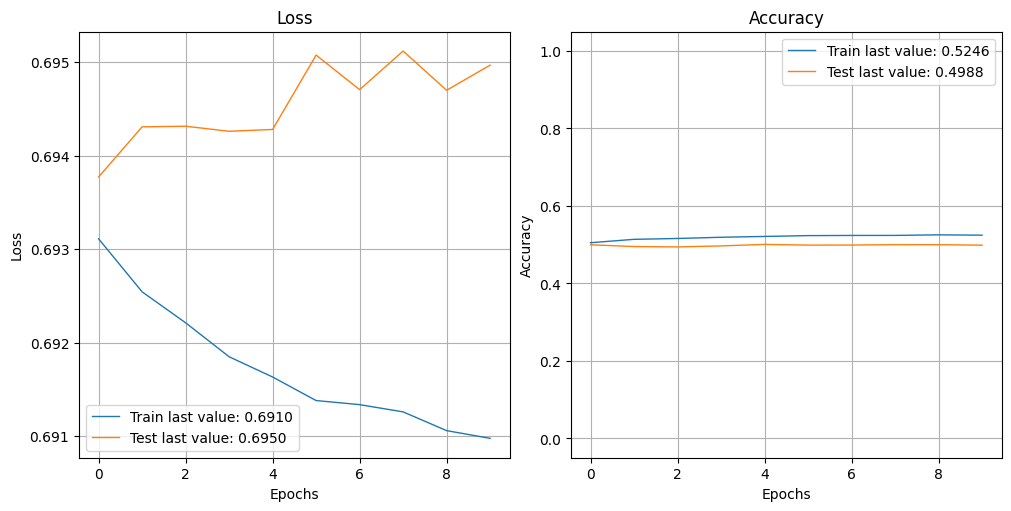

In [153]:
from plot_keras_history import show_history
show_history(fit_NN_exercise)

The result is also disappointing since the validation accuracy literally does not improve from random guess.

## Takeaways

Model ensembles: an "aggregation" or "averaging" of models and predictions, **combination** of algorithms

- Linear Ensembles
  - Minimizing the total (squared) error with a linear combination of the predictions from multiple models
  - Problem arises when the predictions are highly correlated: models *arbitrages* from each other
  - One improvement: enforce positivity constraints on the model weights
- Stacked Ensembles
  - Generalization for linear ensembles
  - Train a learner $h$ on the predictions of the previous models
- Extensions
  - Exogeneous variables: use macro-variables to tell under what circumstances ensembles are useful
  - Shrinking inter-model correlations: split training samples (according to dates or features)

# Portfolio Backtesting

Portfolio backtesting is often conceived and perceived as a quest to find the best strategy - or at least a solid profitable one. When carried out thoroughly, this possibly long endeavor may entice the layman to confuse a fluke for a robust policy.

Two papers published back-to-back warn against the **perils of data snooping**, which is related to $p$-hacking. In both cases, researchers will torture the data until the sought result is found.

Fabozzi and de Prado (2018) and Arnott et al. (2016) stressed the importance to avoid **false positives** whereby strategies are found (often by cherrypicking) to outperform in one very particular setting but will likely to fail in live implementation.

Arnott et al. (2019a) also warn against the hazards of blindly investing in smart beta products related to academic factors. Another takeaway from their article is that **economic cycles** have a strong impact on factor returns: correlations change quickly and drawdowns can be magnified in times of major downturns.

Backtesting is more complicated than it seems and it is easy to make small mistakes that lead to apparently good portfolio policies. This chapter lays out a rigorous approach to this exercise, discusses a few caveats, and proposes a lengthy example.

## Setting the Protocol
We consider a dataset with 3 dimensions:
1. Time $t=1,\dots, T$
2. Assets $n=1,\dots,N$
3. Characteristics $k=1,\dots,K$

Some important characteristics:
- The price of asset $n$ at time $t$ which we will denote $p_{t,n}$
- The arithmetic return $r_{t,n}=p_{t,n}/p_{t-1,n}-1$
- Assuming each point in time $t$ has data available for all assets, this dataset has $I=T\times N$ rows.

The dataset is first split in two:
1. The **initial buffer period**: to train models and for the first portfolio composition.
  - can be fixed (usually 2 to 10 years) and expanding
  - Fixed: training sample rolling over time
  - Expanding: models built on all of the available data - can create problems since the first models are built on a much smaller dataset
  - Whether or not to include the full history of returns is advantageous? Unknown, some argue that this allows models to see many different **market conditions**, while others claim that old data can be outdated and possibly misleading.
2. The out-of-sample period

Henceforth, we choose the rolling period option for the training sample, as depicted in the following figure.

![FIGURE 12.1: Backtesting with rolling windows. The training set of the first period is simply the buffer period.](images/figure12-1.png)

Two crucial design choices are the **rebalancing frequency** and the **horizon** at which the label is computed. It can seem right to train on a 12-month forward label (which captures longer trends) and invest monthly or quarterly (so that they may not be equal). However, it seems odd to do the opposite and train on short-term movements (monthly) and invest at a long horizon.

These choices have a direct impact on how the backtest is carried out. If we note:
- $\Delta_h$ for the holding period between 2 rebalancing dates (in days or months)
- $\Delta_s$ for the size of the desired training sample (in days or months - not taking the number of assets into consideration)
- $\Delta_l$ for the hoziron at which the label is computed (in days or months).

Then the total length of the training sample should be $\Delta_s+\Delta_l$. Indeed, at any moment $t$, the training sample *should stop at* $t-\Delta_l$ so that the last point corresponds to a label that is calculated until time $t$, highlighted in the following figure 12.2 in the form of a *red danger zone*, naming from that any observation which has a time index $s$ inside the interval $(t-\Delta_l,t]$ will engender a forward looking bias. The feature generated by $s\in (t-\Delta_l,t]$ will cover the period $[s,s+\Delta_l]$ with $s+\Delta_l>t$, which requires unrealistic future knowledge.

![FIGURE 12.2: The subtleties in rolling training samples.](images/figure12-1.png)

## Turning Signals into Portfolio Weights

The predictive tools outlined in Chapters 5 to 11 are only meant to provide a *signal* that is expected to give some information on the future profitability of assets. There are many ways that this signal can be integrated in an investment decision (see Snow (2020) for ways to integrate ML tools into this task).

First and foremost, there are at least two steps in the portfolio construction process where the signal can be used. Note that relying on signals for both steps puts a lot of emphasis on the predictions and should only be considered when the level of confidence in the forecasts is high.

- Step 1: **Selection**. For long-only portfolios, it would make sense to take advantage of the signal to exclude those assets that are likely to underperform in the future.
  - A fixed-size portfolio with most favorable assets
  - This idea is often used in asset pricing literature: **sorted portfolios** (e.g., high average return for high quantiles)
  - An efficient way to test the relevance of the signal
  - If $Q$ portfolios $q=1,\dots,Q$ are formed according to the rankings of the assets with respect to the signal, the out-of-sample performance of portfolios are expected to be *monotonic* with $q$.
  - Mostly extreme portfolios suffice: if the difference between portfolio $\#1$ and $\#Q$ is substantial, then the signal is valuable.
  - Could make a dollar neutral strategy by shorting assets
- Step 2: **Weighting**.
  - Equally weighted portfolios are known to be hard to beat (see DeMiguel et al. (2009b)), especially compared to their cap-weighted alternative, as is shown in Plyakha et al. (2016).
  - More advanced techniques: equal risk contributions (Maillard et al., 2010), constrained minimum variance (Coqueret, 2015)
  - Both only rely on the covariance matrix of the assets and not on any proxy for the vector of expected returns.

For the sake of completeness, we explicitize a generalization of Coqueret (2015) which is a generic constrained quadratic program:
$$\underset{\textbf{w}}{\text{min}} \ \frac{\lambda}{2} \textbf{w}'\boldsymbol{\Sigma}\textbf{w}-\textbf{w}'\boldsymbol{\mu} , \quad \text{s.t.} \quad \begin{array}{ll} \textbf{w}'\textbf{1}=1, \\ (\textbf{w}-\textbf{w}_-)'\boldsymbol{\Lambda}(\textbf{w}-\textbf{w}_-) \le \delta_R,\\
\textbf{w}'\textbf{w} \le \delta_D,
\end{array}$$
where it's easy to recognize the usual **mean-variance optimization** in the left-hand side. We impose 3 constraints on the right-hand side:
1. Budget constraint: weights sum to 1.
2. Variation in weights penalization (compared to the current allocation $\textbf{w}_{-}$) via a diagonal matrix $\boldsymbol{\Lambda}$ that penalizes trading costs - reflects a usual case as **portfolio adjustments** from existing positions to reduce the orders and transaction costs. \
In this case above, the deviations from the current positions is $\textbf{w}-\textbf{w}_-$ and the term $(\textbf{w}-\textbf{w}_-)'\boldsymbol{\Lambda}(\textbf{w}-\textbf{w}_-)$ is an expression that characterizes the sum of squared deviations weighted by the diagonal coefficients $\Lambda_{n,n}$. This reduces costs induced by trading and liquidity with $\delta_R$.
3. The last constraint enforces **diversification** via the Herfindhal-Hirschmann index of the portfolio: smaller $\delta_D$ for a more diversified portfolio.
  
Recalling that there are N assets in the universe, the Lagrange form of the optimization problem is:
$$L(\textbf{w})= \frac{\lambda}{2} \textbf{w}'\boldsymbol{\Sigma}\textbf{w}-\textbf{w}'\boldsymbol{\mu}-\eta (\textbf{w}'\textbf{1}_N-1)+\kappa_R ( (\textbf{w}-\textbf{w}_-)'\boldsymbol{\Lambda}(\textbf{w}-\textbf{w}_-) - \delta_R)+\kappa_D(\textbf{w}'\textbf{w}-\delta_D)$$
and the first order condition
$$\frac{\partial}{\partial \textbf{w}}L(\textbf{w})= \lambda \boldsymbol{\Sigma}\textbf{w}-\boldsymbol{\mu}-\eta\textbf{1}_N+2\kappa_R \boldsymbol{\Lambda}(\textbf{w}-\textbf{w}_-)+2\kappa_D\textbf{w}=0$$
yields
$$\textbf{w}^*_\kappa=  (\lambda \boldsymbol{\Sigma}+2\kappa_R \boldsymbol{\Lambda} +2\kappa_D\textbf{I}_N)^{-1} \left(\boldsymbol{\mu} + \eta_{\lambda,\kappa_R,\kappa_D} \textbf{1}_N+2\kappa_R \boldsymbol{\Lambda}\textbf{w}_-\right)$$
with
$$\eta_{\lambda,\kappa_R,\kappa_D}=\frac{1- \textbf{1}_N'(\lambda\boldsymbol{\Sigma}+2\kappa_R \boldsymbol{\Lambda}+2\kappa_D\textbf{I}_N)^{-1}(\boldsymbol{\mu}+2\kappa_R\boldsymbol{\Lambda}\textbf{w}_-)}{\textbf{1}'_N(\lambda \boldsymbol{\Sigma}+2\kappa_R \boldsymbol{\Lambda}+2\kappa_D\textbf{I}_N)^{-1}\textbf{1}_N}.$$

This parameter ensures that the budget constraint is satisfied. The optimal weights depend on three tuning parameters: $\lambda, \kappa_R$ and $\kappa_D$:
- When $\lambda$ is large: the focus is set more on risk reduction than on profit maximization (which is often a good idea given that risk is easier to predict).
- When $\kappa_R$ is large, the importance of transaction costs is high and thus, in the limit when $\kappa_R \rightarrow \infty$, the optimal weights are equal to the old ones $\textbf{w}_-$ (for finite vaues of the other parameters).
- When $\kappa_D$ is large, the portfolio is more diversified and (all other things equal) when $\kappa_D \rightarrow \infty$, the weights are all equal (to $1/N$).
- When $\kappa_R=\kappa_D=0$, we recover the classical mean-variance weights which are a mix between the maximum Sharpe ratio portfolio proportional to $\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}$ and the minimum variance portfolio proportional to $\boldsymbol{\Sigma}^{-1}\boldsymbol{1}_N$.

This seemingly complex formula is in fact very flexible and tractable. It requires some tests and adjustments before finding realistic values for $\lambda, \kappa_R$ and $\kappa_D$. In Pedersen et al. (2020), the authors recommend a similar form, except that the covariance matrix is shrunk towards the diagonal matrix of sample variances and the expected returns are mix between a signal and an anchor portfolio. The authors argue that
their general formulation has links with robust optimization (see also Kim et al. (2014)), Bayesian inference (Lai et al. (2011)), matrix denoising via random matrix theory, and, naturally, shrinkage. In fact, shrunk expected returns have been around for quite some time (Jorion (1985), Kan and Zhou (2007) and Bodnar et al. (2013)) and simply seek to diversify and reduce estimation risk.

## Performance Metrics

The evaluation of performance is a key stage in a backtest. This section, while not exhaustive, is intended to cover the most important facets of portfolio assessment.

### Discussion

Portfolio returns are the ultimate yardstick during a backtest. One essential element in such an exercise is a **benchmark** because raw and absolute metrics don't mean much on their own.

A benchmark is also essential at the ML engine level - the MSE of the models in previous chapters revolves around 0.037, which is also the MSE of a constant prediction of 0 all the time. This means that the sophisticated algorithms don't really improve on a naive heuristic.
This benchmark is the one used in the out-of-sample R2 of Gu et al. (2020b).

In portfolio choice, the most elementary allocation is the uniform one, whereby each asset receives the same weight. This seemingly simplistic solution is in fact an incredible benchmark, one that is *hard to beat consistently*. Theoretically, uniform portfolios are optimal when uncertainty, ambiguity or estimation risk is high (Pflug et al. (2012), Maillet et al. (2015)) and empirically, it cannot be outperformed even at the factor level (Dichtl et al. (2020b)). 

Below, we will pick an **equally weighted** (EW) portfolio of all stocks as our benchmark.

### Pure Performance and Risk Indicators

We write $r^P=(r_t^P)_{1\leq t \leq T}$ and $r^B=(r_t^B)_{1\leq t \leq T}$ for the returns of the portfolio and those of the benchmark, respectively. When referring to some generic returns, we simply write $r_t$. There are many ways to analyze them and most of them rely on their distribution.

The simplest indicator is the average return:
$$\bar{r}_P=\mu_P=\mathbb{E}[r^P]\approx \frac{1}{T}\sum_{t=1}^T r_t^P, \quad \bar{r}_B=\mu_B=\mathbb{E}[r^B]\approx \frac{1}{T}\sum_{t=1}^T r_t^B$$
where, obviously, the portfolio is noteworthy if $\mathbb{E}[r^P]>\mathbb{E}[r^B]$. Note that we use the arithmetic average above but the geometric one is also an option, in which case:
$$\tilde{\mu}_P\approx \left(\prod_{t=1}^T(1+r^P_t) \right)^{1/T}-1 , \quad \tilde{\mu}_B \approx  \left(\prod_{t=1}^T(1+r^B_t) \right)^{1/T}-1$$
The benefit of an geometric average is that it takes the *compounding of returns* into account and hence compensates for volatility pumping. To see this, consider a very simple two-period model with returns $-r$ and $+r$, with arithmetic average as zero but the geometric average $\sqrt{1-r^2}-1$ negative.

The hit ratio measures the proportion of times when the position is in the right position (long - positive return, short - negative return) and evaluates the propensity to *make good guesses*. This can be computed at the asset level or at the portfolio level (also known as the *win rate*). In all cases, the computation can be performed on raw returns or on relative returns (relative to a benchmark). Hit ratio can be sometimes insuffcieint as many small gains can be offset by a few large losses.

Lastly, one important *precision*. In all examples of supervised learning tools in the book, we compared the hit ratios to 0.5. This is in fact problematic because if an investor is *bullish*, he or she may always bet on the upward moves. In this case, the hit ratio should be the percentage of time that *returns are positive*. Over the long run, this probability is above 0.5. In our sample, the ratio is 0.556, and this could be viewed as a benchmark to be surpassed.

Pure performance measures are almost always accompanied by **risk measures**. The second moment of returns is usually used to quantify the magnitude of fluctuations of the portfolio. A large variance implies sizable movements in returns, and hence in portfolio values. This is why the standard deviation of returns is called the **volatility** of the portfolio.
$$\sigma^2_P=\mathbb{V}[r^P]\approx \frac{1}{T-1}\sum_{t=1}^T (r_t^P-\mu_P)^2, \quad \sigma^2_B=\mathbb{V}[r^B]\approx \frac{1}{T-1}\sum_{t=1}^T (r_t^B-\mu_B)^2$$
In this case, the portfolio can be preferred if it's less risky compared to the benchmark, i.e., when $\sigma_P^2<\sigma_B^2$ and when average returns are equal (or comparable).

Higher order moments of returns are sometimes used (skewness and kurtosis), but are far less common. We refer to Harvey et al. (2010) for one method that takes them into account in the portfolio construction process.

For some people, the volatility is an incomplete measure of *risk*. It can be argued that it should be decomposed into '*good*' volatility (when prices go up) versus '*bad*' volatility when they go down. The *downward semi-variance* is computed as the variance taken over the negative returns: $$\sigma^2_-\approx \frac{1}{\text{card}(r_t<0)}\sum_{t=1}^T (r_t-\mu_P)^21_{\{r_t<0\}}$$

Other risk indicators rely on different aspects of the distribution of returns with a focus on *tails and extreme events*. The **Value-at-Risk** (VaR) is one such example. If $F_r$ is the empirical cdf of the returns, the VaR at a level of confidence $\alpha$ (often taken to be 95%) is $$\text{VaR}_\alpha(\textbf{r}_t)=F_r(1-\alpha)$$

It is equal to the realization of a bad scenario (of return) that is expected to happen $(1-\alpha)\%$ of the time on average. An even more conservative measure is the so-called **Conditional Value at Risk** (CVaR), also known as expected shortfall, which computes the average loss
of the worst $(1 − \alpha)\%$ scenarios. Its empirical evaluation is $$\text{CVaR}_\alpha(\textbf{r}_t)=\frac{1}{\text{Card}(r_t < \text{VaR}_\alpha(\text{r}_t))}\sum_{r_t < \text{VaR}_\alpha(\text{r}_t)}r_t$$

Going crescendo in the severity of risk measures, the ultimate evaluation of loss is the **maximum drawdown**, equal to the maximum loss suffered from the peak value of the strategy. If we write $P_t$ for the time-$t$ value of a portfolio, the drawdown is $$D_T^P=\max_{0\leq t\leq T} P_t-P_T$$ and the maximum drawdown is $$MD_T^P=\max_{0\leq s\leq T} \left(\max_{0\leq t\leq T} P_t-P_T, 0\right)$$
This quantity evalutes the greatest loss over the time frame $[0,T]$ and is thus the most conservative risk measure of all.

### Factor-based Evaluation

In the spirit of factor models, performance can also be assessed through the lens of *exposures*. The original formulation of a factor model is
$$r_{t,n}= \alpha_n+\sum_{k=1}^K\beta_{t,k,n}f_{t,k}+\epsilon_{t,n}$$
then the estimated $\hat{\alpha}_n$ is the performance that cannot be explained by the other factors.

When returns are *excess* returns and there is only one market factor, then this $\hat{\alpha}_n$ is called Jensen's alpha (Jensen, 1968), or simply referred to as *alpha*. The other estimate $\hat{\beta}_{t,M,n}$ ($M$ for market), is the market beta.

Because of the rise of factor investing, it has become customary to also report the alpha of more exhaustive regressions. Adding the size and value premium (as in Fama and French, 1993) and even momentum (Carhart, 1997) helps understand if a strategy generates value beyond that which can be obtained through the usual factors.

### Risk-adjusted Measures

Now, the tradeoff between the average return and the volatility is a cornerstone in modern finance, since Markowitz (1952). The simplest way to synthesize both metrics is via the **information ratio**:
$$IR(P,B)=\frac{\mu_{P-B}}{\sigma_{P-B}}$$
where the index $P-B$ implies that the mean and standard deviations are computed on the long-short portfolio with the returns $r_t^P-r_t^B$. The denominator $\sigma_{P-B}$ is sometimes called the **tracking error**.

The most widespread information ratio is the **Sharpe ratio** (Sharpe, 1966) for which the benchmark is some *riskless* asset. It is often customary to compare the Sharpe Ratios between two portfolios or strategies instead of directly computing the information ratio. Simple comparisons can benefit from statistical tests (see, e.g., Ledoit and Wolf, 2008).

More extreme risk measures can serve as denominator in risk-adjusted indicators. The *Managed Account Report* (MAR) ratio, is computed as $$MAR^P=\frac{\tilde{\mu}_P}{MD^P}$$
while the Treynor ratio is $$\text{Treynor}=\frac{\tilde{\mu}_P}{\hat{\beta}_M}$$
i.e. the (excess) return divided by the market beta (see Treynor, 1965). This definition was generalized to multifactor expositions by Hübner (2005) into the generalized Treynor ratio:
$$\text{GT}=\mu_P \frac{\sum_{k=1}^K \bar{f}_k}{\sum_{k=1}^K \hat{\beta}_k\bar{f}_k}$$
where the $\bar{f}_k$ are the sample average of the factors $f_{t,k}$. We refer to the original article for a detailed account of the analytical properties of this ratio.

### Transaction Costs and Turnover

Updating portfolio composition is not free. In all generality, the total cost of one rebalancing at time $t$ is proportional to $C_t=\sum_{n=1}^N | \Delta w_{t,n}|c_{t,n}$, where $\Delta w_{t,n}$ is the change in position for asset $n$ and $c_{t,n}$ is the corresponding fee. The fee is often hard to predict, thus it is customary to use a proxy that depends for instance on market capitalization (large stocks have more liquid shares and thus require smaller fees) or bid-ask spreads (smaller spreads -> smaller fees).

As a first order approximation, it is often useful to compute the average turnover: $$\text{Turnover}=\frac{1}{T-1}\sum_{t=2}^T\sum_{n=1}^N|w_{t,n}-w_{t-,n}|$$
where $w_{t,n}$ are the desired $t$-time weights in the portfolio and $w_{t-,n}$ are the weights just before the rebalancing. The positions of the first period (launching weights) are exluded from the computation by convention. Transaction costs can then be proxied as a multiple of turnover (times some average or median cost in the cross-section of firms). This is a first order estimate of realized costs that does not take into consideration the evolution of the scale of the portfolio. 

Once transaction costs (TCs) have been annualized, then can be deducted from average returns to yield a more realistic picture of profitability. In the same vein, the transaction cost-adjusted Sharpe Ratio of a portfolio $P$ is $$SR_{TC}=\frac{\mu_P-TC}{\sigma_P}$$

Transaction costs are often overlooked in academic articles but can have a *sizable impact* in real life trading to combine and offset positions and reduce overall fees.

## Common Errors and Issues

### Forward Looking Data

It is for instance easy to fall in the trap of the danger zone depicted in Figure 12.2. In this case, the labels used at time $t$ are computed with knowledge of what happens at times $t+1,t+2$, etc. It is worth triple checking every step in the code to make sure that strategies are ont built on prescient data.

### Backtest Overfitting

Backtest overfitting is a well-known issue and was formalized for instance in White (2000) and Romano and Wolf (2005). In portfolio choice, we refer to Bajgrowicz and Scaillet (2012) and Bailey and de Prado (2014) and the references therein.

At any given moment, a backtest depends on *only one* particular dataset. Often, the result of the first backtest will not be satisfactory - for many possible reasons. Hence, it is tempting to have another try, when altering some parameters that were probably not optimal. The second may be better, and a third with a new weighting scheme... Iteratively, the backtester can only end up with a strategy that performs well enough with just a matter of time and trials.

One consequence of backtest overfitting is that it is illusory to hope for the same Sharpe ratios in live trading as those obtained in the backtest. In Bailey and de Prado (2014), they even propose a statistical test for Sharpe ratios with the history of all tested strategies. The formula for deflated Sharpe Ratios is:
$$t = \phi\left((SR-SR^*)\sqrt{\frac{T-1}{1-\gamma_3SR+\frac{\gamma_4-1}{4}SR^2}} \right)$$
where $SR$ is the Sharpe Ratio obtained by the best strategy among all tested, and $$SR^*=\mathbb{E}[SR]+\sqrt{\mathbb{V}[SR]}\left((1-\gamma)\phi^{-1}\left(1-\frac{1}{N}\right)+\gamma \phi^{-1}\left(1-\frac{1}{Ne}\right)  \right)$$
is the theoretical average maximum SR. Moreover,
- $T$ is the number of trading dates;
- $\gamma_3$ and $\gamma_4$ are the *skewness* and *kurtosis* of the returns of the chosen (best) strategy;
- $\phi$ is the cdf of the standard normal distribution and $\gamma\approx 0.577$ is the Euler-Mascheroni constant;
- $N$ refers to the number of strategy trials.

If the $t$-statistic is below a certain threshold (e.g., 0.95), then the SR cannot be deemed significant: **the best strategy is not outstanding** compared to all of those that were tested. Most of the time, sadly, *that is the case*. In the above equation, the realized SR must be above the theoretical maximum $SR^*$ and the scaling factor must be sufficiently large to push the argument inside $\phi$ close enough to 2, so that $t$ surpasses 0.95.

In the scientific community, test overfitting is also known as $p$-hacking. This is common in financial economics or most fields that use statistical tests. There are several ways to cope with $p$-hacking:
1. Don't rely on $p$-values (Amrhein, et al., 2019)
2. Use detection tools (Elliott et al., 2019)
3. Or, finally, use advanced methods that process arrays of statistics (e.g., the Bayesianized versions of $p$-values to include some prior assessment from Harvey (2017), or other tests such as those proposed in Romano and Wolf (2005) and Simonsohn et al. (2014)).

The first option is wise, but the drawback is that the decision process is then left to another arbitrary yardstick.

### Simple Safeguards

As is mentioned at the beginning of the chapter, two common sense references for backtesting are Fabozzi and de Prado (2018) and Arnott et al. (2019b).

One additional comment pertains to the output of the backtest. One simple, intuitive and widespread metric is the transaction cost-adjusted Sharpe ratio defined above. In the backtest, let us call $SR_{TC}^B$ the corresponding value for the benchmark, which we like to define as the equally-weighted portfolio of all assets in the trading university (in our dataset, roughly 1,000 US equities). 

If the $SR_{TC}^P$ of the best strategy is above $2 \times SR_{TC}^B$, then there is probably a glitch somewhere in the backtest.

This criterion holds under two assumptions:
1. A sufficiently long enough out-of-sample period
2. Long-only portfolios

It is *unlikely* that any realistic strategy can outperform a solid benchmark by a very wide margin over the long term. Being able to improve the benchmark's annualized return by 150 basis point (1.5\%, with comparable volatility) is already a great achievement. Backtests that deliver returns more than 5% above those of the benchmark are dubious.

## Implication of Non-stationarity: Forecasting is hard

In this subsection we discuss
1. The reason that makes forecasting such a difficult task
2. An important theoretical result that sheds light on any discipline confronted with out-of-sample tests

Farmer et al. (2019) assess the predictive fit of linear models through time: they show that the fit is strongly *varying*: sometimes very well while sometimes not so much. There is no reason why this should not be the case for ML algorithms as well.

### General Comments

You may find throughout Chapters 5 to 11 that the performance of ML engines is underwhelming. These disappointing results are there on purpose and highlight the crucial truth that *most ML-based forecasts fail*. This is both true for enhanced and simpler techniques, which again underlines the need to *replicate results* to challenge their validity.

One reason for that is that datasets are *full of noise* and extracting the slightest amount of signal is a tough challenge (see Timmermann, 2018). One rationale for that is the ever *time-varying nature* of factor analysis in the equity space. Some factors can perform very well during one year and then poorly the next year and these reversals can be costly in the context of fully automated data-based allocation processes.

A major difference that ML has made is that it has found the *invariance* (Arjovsky et al., 2019) which is nonetheless the key to the great improvement both in CV and NLP.

In factor investing, there does *not* seem to be such invariance (Cornell, 2020). There is no factor and no (possibly nonlinear) combination of factors that can explain and accurately forecast returns over long periods of several decades. The academic literature has yet to find such a model; but even if it did, a simple arbitrage reasoning would logically invalidate its conclusions in future datasets.

### The No Free Lunch Theorem

We start by underlying that the no free lunch theorem in machine learning has nothing to do with the asset pricing condition with the same name (see, e.g., Delbaen and Schachermayer (1994), or, more recently, Cuchiero, Klein, and Teichmann (2016)). The original formulation was given by Wolpert (1992a) but we also recommend a look at the more recent reference Ho and Pepyne (2002). There are in fact several theorems and two of them can be found in Wolpert and Macready (1997).

The statement of the theorem is very abstract and requires some notational conventions. We assume that 
- Any training sample $S=(\{\textbf{x}_1,y_1\}, \dots, \{\textbf{x}_I,y_I\})$ is such that 
- There exists an oracle function $f$ that perfectly maps the features to the labels: $y_i=f(\textbf{x}_i)$. 
- The oracle function $f$ belongs to a very large set of functions $\mathcal{F}$. 
- In addition, we write $\mathcal{H}$ for the set of functions to which the forecaster will resort to approximate $f$. 
  - For instance, $\mathcal{H}$ can be the space of feed-forward neural networks, or the space of decision trees, or the unions of both.
  - Elements of $\mathcal{H}$ are written as $h$
  - $\mathbb{P}[h|S]$ stands for the (laregly unknown) distribution of $h$ knowing the sample $S$. Similarly, $\mathbb{P}[f|S]$ is the distribution of oracle functions knowing $S$.
- Finally, the features have a given law $\mathbb{P}[\textbf{x}]$.

Let us now consider two models, say $h_1$ and $h_2$. The statement of the theorem is usually formulated with respect to a classification task. Knowing $S$, the error when choosing $h_k$ induced by samples outside of the training sample $S$ can be quantified as:
$$E_k(S)= \int_{f,h}\int_{\textbf{x}\notin S} \underbrace{ (1-\delta(f(\textbf{x}),h_k(\textbf{x})))}_{\text{error term}} \underbrace{\mathbb{P}[f|S]\mathbb{P}[h|S]\mathbb{P}[\textbf{x}]}_{\text{distributional terms}}$$
where $\delta(\cdot, \cdot)$ is the delta Kronecker function:
$$\delta(x,y)=\begin{cases} 0 & \text{if } x\neq y \\ 1 & \text{if } x = y \end{cases}$$
One of the no free lunch theorems states that $E_1(S)=E_2(S)$, that is, that with the sole knowledge of $S$, there can be no superior algorithm, *on average*. In order to build a performing algorithm, one should have prior views on the *structure of the relationship* between $y$ and $\textbf{x}$ and integrate these views in the construction of the model. Unfortunately, this can also yield underperforming models if the views are incorrect.

## First Example: A Complete Backtest

We finally propose a full detailed example of one implementation of a ML-based strategy run on a careful backtest. What follows is a generalization of the content of Section 5.2.2. In the same spirit, we split the backtest in four parts:
1. The creation / initialization of variables;
2. The definition of the strategies in one main function;
3. The backtesting loop itself;
4. The performance indicators.

Accordingly, we start with initializations.

In [2]:
import pandas as pd
import numpy as np

data_ml = pd.read_pickle('./data/data_ml.pkl')

stock_days = data_ml[['date', 'stock_id']].groupby('stock_id').count()
stock_ids = stock_days[stock_days['date'] == max(stock_days['date'])].index
sub_data_ml = data_ml[data_ml['stock_id'].isin(stock_ids)]
returns = sub_data_ml.pivot(index = "date", columns = "stock_id", values = "R1M_Usd")

In [52]:
sep_oos = pd.to_datetime('2007-01-01')

ticks = data_ml['stock_id'].unique()
N = len(ticks)
t_oos = returns[returns.index > sep_oos].index.unique()
Tt = len(t_oos)
nb_port = 2
portf_weights = np.zeros(shape=(Tt, nb_port, np.max(ticks) + 1)) # slightly different
portf_returns = np.zeros(shape=(Tt, nb_port))

This first step is crucial which lays the groundwork for the core of the backtest. We consider only two strategies: one ML-based and the EW (1/N) benchmark. The ML-based weights are derived from XGBoost predictions with 80 trees, a learning rate of 0.3 and a maximum tree depth of 4. This makes the model complex but not exceedingly so. 

Once the predictions are obtained, the weighting scheme is simple: it is an EW portfolio over the *best half* of the stocks (those with above median prediction).

In the function below, all parameters are hard-coded. They can easily be passed in arguments next to the data inputs. 

One very important detail is that in contrast to the rest of the book, the label is the 12-month future return. The reason is discussed in Chapter 4.6 (to match the auto-correlation characteristics between the features and the label).

Also, to speed up the computations, we remove the bulk of the distribution of the labels and keep only the top 20% and bottom 20%, as is advised in Coqueret and Guida (2020). The filtering levels could also be passed as arguments.

In [53]:
from xgboost import XGBRegressor
def weights_xgb(train_data: pd.DataFrame, test_data: pd.DataFrame, features):
    train_features = train_data[features]
    train_label = train_data['R12M_Usd'] / np.exp(train_data['Vol1Y_Usd'])
    ind = (train_label < train_label.quantile(0.2)) | (train_label > train_label.quantile(0.8)) # Filter

    train_features = train_features[ind]
    train_label = train_label[ind]

    fit_xgb = XGBRegressor(n_estimators=80, max_depth=4, 
                           objective='reg:squarederror',
                           learning_rate=0.3)
    fit_xgb.fit(train_features, train_label)

    xgb_test = test_data[features]
    pred = fit_xgb.predict(xgb_test)
    w = pred > np.median(pred)
    w = w / np.sum(w) # equally weighted!
    w_names = test_data['stock_id']
    return w, w_names

Compared to the structure proposed in Section 6.4.6, the differences are that the label is not only based on **long-term returns**, but it also relies on a *volatility* component. Even though the denominator in the label is the exponential quantile of the volatility, it seems fair to say that it is inspired by the Sharpe ratio and that the model seeks to explain and forecast a *risk-adjusted return* instead of a raw return. A stock with very low volatility will have its return unchanged in the label, while a stock with very high volatility will see its return divided by a factor close to three $(\exp(1)=2.718)$.

This function is then embedded in the global weighting function which only wraps two schemes: the EW benchmark and the ML-based policy.

In [54]:
def portf_compo(train_data, test_data, features, j):
    if(j == 0):
        N = len(test_data['stock_id'].unique())
        w = np.ones(shape=(N, )) / N
        w_names = test_data['stock_id']
        return w, w_names
    if(j == 1):
        return weights_xgb(train_data, test_data, features)

Equipped with this function, we can turn to the main backtesting loop. Given the fact that we use a large-scale model, the computation time for the loop is large (possibly a few hours on a slow machine with CPU). Resorting to functional programming can speed up the loop (see exercise at the end of the chapter).

In [55]:
m_offset = 12
train_size = 5
features = data_ml.columns[2:95]

for t in range(len(t_oos) - 1):
    if((t + 1) % 12 == 0):
        print(t_oos[t])
    train_data = data_ml[(data_ml['date'] < t_oos[t] + pd.DateOffset(days=-m_offset * 30)) & \
                         (data_ml['date'] > t_oos[t] + pd.DateOffset(days=-m_offset * 30 - 365 * train_size))]
    test_data = data_ml[data_ml['date'] == t_oos[t]]
    realized_returns = test_data['R1M_Usd'] # 1M holding period

    for j in range(nb_port):
        tmp_weights, stocks = portf_compo(train_data, test_data, features, j)
        portf_weights[t, j, stocks] = tmp_weights
        portf_returns[t, j] = np.sum(tmp_weights * realized_returns)

2007-12-31 00:00:00
2008-12-31 00:00:00
2009-12-31 00:00:00
2010-12-31 00:00:00
2011-12-31 00:00:00
2012-12-31 00:00:00
2013-12-31 00:00:00
2014-12-31 00:00:00
2015-12-31 00:00:00
2016-12-31 00:00:00
2017-12-31 00:00:00


There are two important comments to be made on the above code. The parameters refer to the size of the training sample (5 years) and the length of the buffer period shown in Figure 12.2. **This buffer period is imperative** because the label is based on a long-term (12-month) return. This lag is compulsory to avoid any forward-looking bias in the backtest.

Below, we create a function that computes the turnover (variation in weights). It requires both the weight values as well as the returns of all assets because the weights just before a rebalancing depend on the weights assigned in the previous period, as well as on the returns of the assets that have altered these original weights during the holding period.

In [137]:
def turnover_func(weights, asset_returns, t_oos):
    turn = 0
    for t in range(1, len(t_oos)):
        # BUG for the original code HERE
        # should be `asset_returns`
        realized_returns = asset_returns[asset_returns.index == t_oos[t]].values
        prior_weights = weights[t - 1, ] * (1 + realized_returns)
        turn += np.sum(np.abs(weights[t, ] - prior_weights / np.sum(prior_weights)))
    return turn / (len(t_oos) - 1)

Once turnover is defined, we embed it into a function that computes several key indicators.

In [140]:
def perf_met(portf_returns, weights, asset_returns, t_oos):
    avg_ret = np.nanmean(portf_returns) # nan remove
    vol = np.nanstd(portf_returns, ddof=1)
    Sharpe_ratio = avg_ret / vol
    VaR_5 = np.quantile(portf_returns, 0.05)
    turn = turnover_func(weights, asset_returns, t_oos)
    met = [avg_ret, vol, Sharpe_ratio, VaR_5, turn]
    return met

Lastly, we build a function that loops on the various strategies.

In [139]:
def perf_met_multi(portf_returns, weights, asset_returns, t_oos, strat_name):
    J = weights.shape[1] # number of strategies
    met = [perf_met(portf_returns[:, j], weights[:, j, :], asset_returns, t_oos) for j in range(J)]
    met_result = pd.DataFrame(met, index=strat_name, columns = ['avg_ret', 'vol', 'Sharpe_ratio', 'VaR_5', 'turn'])
    return met_result

Given the weights and returns of the portfolios, it remains to compute the returns of the assets to plug them in the aggregate metrics function.

In [141]:
asset_returns = data_ml[['date', 'stock_id', 'R1M_Usd']].pivot(index = "date", columns = "stock_id", values = "R1M_Usd")
idx = list(set(range(np.max(asset_returns.columns) + 1)).difference(asset_returns.columns))
asset_returns[idx] = 0
asset_returns = asset_returns.sort_index(axis=1).fillna(0)

met = perf_met_multi(portf_returns, portf_weights,
                     asset_returns, t_oos, ["EW", "XGB_SR"])
met

avg_ret       vol  Sharpe_ratio     VaR_5      turn
EW      0.009697  0.056429      0.171848 -0.077125  0.071451
XGB_SR  0.012589  0.063774      0.197406 -0.083359  0.568124

The ML-based strategy performs finally well! The gain is mostly obtained by the average return, while the volatility is higher than that of the benchmark. The net effect is that the Sharpe ratio is improved compared to the benchmark. The augmentation is not breathtaking, but (hence?) it seems reasonable. It is noteworthy to underline that turnover is substantially higher for the sophisticated strategy. Removing costs in the numerator (say, 0.005 times the turnover, as in Goto and Xu (2015), which is a conservative figure) only mildly reduces the superiority in Sharpe ratio of the ML-based strategy.

Finally, it is always tempting to plot the corresponding portfolio values and we display two related graphs as the following.

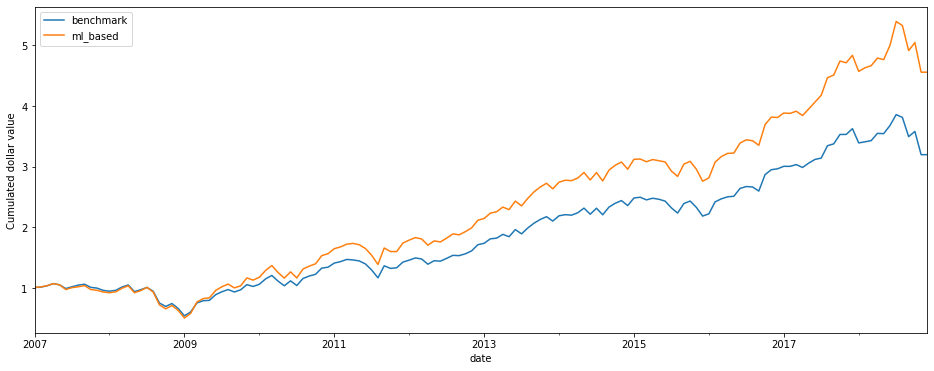

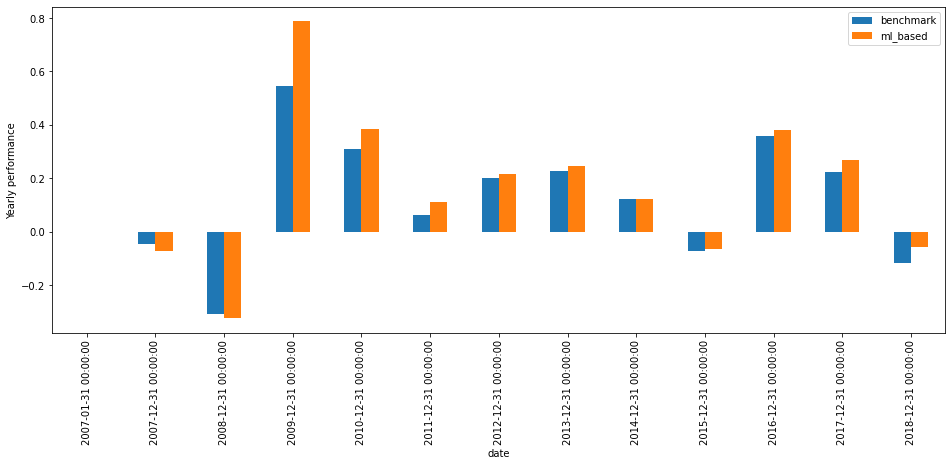

In [143]:
import matplotlib.pyplot as plt
g1 = pd.DataFrame([t_oos, np.cumprod(1 + portf_returns[:,0]), np.cumprod(1 + portf_returns[:,1])], index = ["date", "benchmark", "ml_based"]).T
g1.reset_index(inplace = True)
g1['date_month'] = pd.to_datetime(g1['date']).dt.month
g1.set_index('date', inplace = True)
g2 = g1[g1['date_month'] == 12]
g2 = pd.concat([g2, g1.iloc[[0]]])
g2.sort_index(inplace = True)
g1[["benchmark","ml_based"]].plot(figsize=[16, 6], ylabel='Cumulated dollar value')
g2[["benchmark","ml_based"]].pct_change(1).plot.bar(figsize=[16, 6],ylabel='Yearly performance')
plt.show()

Out of the 12 years of the backtest, the advanced strategy outperforms the benchmark during 10 years. It is less hurtful in two of the four years of aggregate losses (2015 and 2018). This is a satisfactory improvement because the EW benchmark is tough to beat!

## Second Example: Backtest Overfitting

To end this chapter, we quantify the concepts of Section 12.4.2. First, we build a function that is able to generate performance metrics for simple strategies that can be evaluated in batches. The strategies are pure factor bets and depend on three inputs: the chosen characteristic (e.g., market capitalization), a threshold level (quantile of the characteristic) and a direction (long position in the top or bottom of the distribution).

In [165]:
def strat(data: pd.DataFrame, feature: str, thresh, direction):
    data_tmp = data[[feature] + ['date', 'R1M_Usd']].reset_index().drop(columns='index')
    data_tmp['decision'] = direction * data_tmp[feature] > direction * thresh
    p_return = data_tmp.groupby('date').apply(
        lambda x: np.sum(x['decision'] / np.sum(x['decision']) * x['R1M_Usd'])
    )
    avg = np.nanmean(p_return)
    sd = np.nanstd(p_return, ddof=1)
    SR = avg / sd
    result = pd.DataFrame([avg, sd, SR], index=['avg', 'sd', 'SR']).T
    return result

Then, we test the function on a triplet of arguments. We pick the price-to-book (Pb) ratio. The position is positive and the threshold is 0.3, which means that the strategy buys the stocks that have a Pb value above the 0.3 quantile of the distribution.

In [166]:
strat(data_ml, "Pb", 0.3, 1)

avg        sd        SR
0  0.010235  0.049553  0.206538

The output keeps three quantities that will be useful to compute the t-statistic (12.5). We must now generate these indicators for many strategies. We start by creating the grid of parameters.

In [170]:
import itertools
feature = ["Div_Yld", "Ebit_Bv", "Mkt_Cap_6M_Usd", "Mom_11M_Usd", "Pb", "Vol1Y_Usd"]
thresh = np.arange(0.2, 0.8, 0.1)
direction = [1, -1]
pars = list(itertools.product(feature, thresh, direction)) # Riccard Product
pars[:10]

[('Div_Yld', 0.2, 1),
 ('Div_Yld', 0.2, -1),
 ('Div_Yld', 0.30000000000000004, 1),
 ('Div_Yld', 0.30000000000000004, -1),
 ('Div_Yld', 0.4000000000000001, 1),
 ('Div_Yld', 0.4000000000000001, -1),
 ('Div_Yld', 0.5000000000000001, 1),
 ('Div_Yld', 0.5000000000000001, -1),
 ('Div_Yld', 0.6000000000000001, 1),
 ('Div_Yld', 0.6000000000000001, -1)]

In [172]:
pars_df = pd.DataFrame(pars, columns=['feature', 'thresh', 'direction'])

This makes 84 strategies in total. We can proceed to see how they fare. We plot the corresponding Sharpe ratios below. The top plot shows the strategies that invest in the bottoms of the distributions of characteristics while the bottom plot pertains to the portfolios that are long in the lower parts of these distributions.

In [198]:
grd = pd.DataFrame()
for idx, (feature, thresh, direction) in enumerate(pars):
    tmp_result = strat(data_ml, feature, thresh, direction)
    tmp_result['feature'] = feature
    tmp_result['thresh'] = thresh
    tmp_result['direction'] = direction
    grd = pd.concat([grd, tmp_result], ignore_index=True)
grd

avg        sd        SR    feature  thresh  direction
0   0.011862  0.049947  0.237485    Div_Yld     0.2          1
1   0.016763  0.064708  0.259052    Div_Yld     0.2         -1
2   0.011307  0.048788  0.231760    Div_Yld     0.3          1
3   0.016360  0.063365  0.258194    Div_Yld     0.3         -1
4   0.011234  0.047990  0.234095    Div_Yld     0.4          1
..       ...       ...       ...        ...     ...        ...
79  0.009586  0.041122  0.233109  Vol1Y_Usd     0.6         -1
80  0.019774  0.081275  0.243292  Vol1Y_Usd     0.7          1
81  0.009932  0.043200  0.229917  Vol1Y_Usd     0.7         -1
82  0.023036  0.093037  0.247600  Vol1Y_Usd     0.8          1
83  0.010365  0.045285  0.228876  Vol1Y_Usd     0.8         -1

[84 rows x 6 columns]

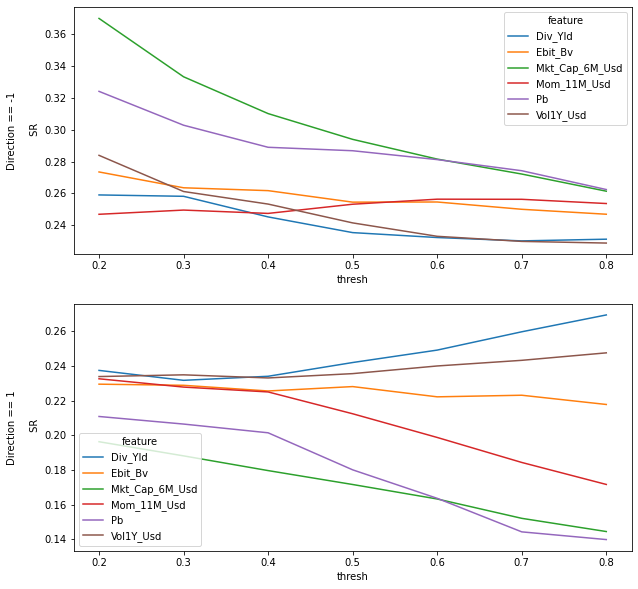

In [208]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 10))
ax1 = plt.subplot(211)
grd[grd['direction'] == -1].pivot(index='thresh', columns='feature', values='SR').plot(ax=ax1, ylabel='Direction == -1\n\n SR')
ax2 = plt.subplot(212)
grd[grd['direction'] == 1].pivot(index='thresh', columns='feature', values='SR').plot(ax=ax2, ylabel='Direction == 1\n\n SR')
plt.show()

The last step is to compute the statistic (12.5). We code it here:

In [222]:
from scipy.special import digamma
from scipy.stats import norm
def DSR(SR, Tt, M, g3, g4, SR_m, SR_v):
    gamma = -digamma(1) # Euler-Mascheroni Constant
    SR_star = SR_m + np.sqrt(SR_v) * ((1 - gamma) * norm.ppf(1 - 1 / M) + gamma * norm.ppf(1 - 1 / (M * np.exp(1))))
    num = (SR - SR_star) * np.sqrt(Tt - 1)
    den = np.sqrt(1 - g3 * SR + (g4 - 1) / 4 * np.square(SR))
    return norm.cdf(num / den)

All that remains to do is to evaluate the arguments of the function. The "best" strategy is the one on the top left corner of Figure 12.4 (above) and it is based on market capitalization.

In [224]:
import scipy.stats

M = grd.shape[0] # num of strategies tested
SR = np.max(grd['SR'])
SR_m = np.mean(grd['SR'])
SR_v = np.var(grd['SR'], ddof=1)
# Below, we compute the returns of the strategy by recycling the code of the strat() function

data_tmp = data_ml[['Mkt_Cap_6M_Usd', 'date', 'R1M_Usd']].reset_index().drop(columns='index')
data_tmp['decision'] = data_tmp['Mkt_Cap_6M_Usd'] < 0.2
p_return = data_tmp.groupby('date').apply(
    lambda x: np.sum(x['decision'] / np.sum(x['decision']) * x['R1M_Usd'])
)
g3 = scipy.stats.skew(p_return)
g4 = scipy.stats.kurtosis(p_return) + 3
Tt = p_return.shape[0]
DSR(SR, Tt, M, g3, g4, SR_m, SR_v)

0.665844894000408

The value 0.6658 is not high enough (to reach the 90% or 95% threshold) to make the strategy significantlly superior to the other ones that were considered in the batch of tests.

## Coding Exercises

1. Code the returns of the EW portfolio without loop.

In [226]:
rtn_EW = data_ml.groupby('date')['R1M_Usd'].mean()
rtn_EW.head()

date
2000-01-31    0.021098
2000-02-29    0.064126
2000-03-31    0.013529
2000-04-30   -0.007193
2000-05-31    0.017420
Name: R1M_Usd, dtype: float64

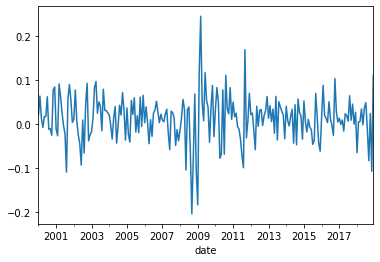

In [229]:
rtn_EW.plot()
plt.show()

2. Code the advanced weighting function defined in Equation (12.3).
3. Test it in a small backtest and check its sensitivity to the parameters.

$$\textbf{w}^*_\kappa=  (\lambda \boldsymbol{\Sigma}+2\kappa_R \boldsymbol{\Lambda} +2\kappa_D\textbf{I}_N)^{-1} \left(\boldsymbol{\mu} + \eta_{\lambda,\kappa_R,\kappa_D} \textbf{1}_N+2\kappa_R \boldsymbol{\Lambda}\textbf{w}_-\right)$$

$$\eta_{\lambda,\kappa_R,\kappa_D}=\frac{1- \textbf{1}_N'(\lambda\boldsymbol{\Sigma}+2\kappa_R \boldsymbol{\Lambda}+2\kappa_D\textbf{I}_N)^{-1}(\boldsymbol{\mu}+2\kappa_R\boldsymbol{\Lambda}\textbf{w}_-)}{\textbf{1}'_N(\lambda \boldsymbol{\Sigma}+2\kappa_R \boldsymbol{\Lambda}+2\kappa_D\textbf{I}_N)^{-1}\textbf{1}_N}$$

In [247]:
def advanced_weighting(Sigma: np.ndarray, Mu: np.ndarray, Lambda: np.ndarray, weights_org: np.ndarray, pen_lambda, kappa_r, kappa_d):

    idt = np.ones_like(Mu)
    den = pen_lambda * Sigma + 2 * kappa_r * Lambda + 2 * kappa_d * np.identity(Sigma.shape[0])
    den = np.linalg.inv(den)
    
    eta_num = 1 - np.linalg.multi_dot([idt.T, den, (Mu + 2 * kappa_r * np.dot(Lambda, weights_org))])
    eta_den = np.linalg.multi_dot([idt.T, den, idt])
    eta = eta_num / eta_den

    num = (Mu + eta * idt + 2 * kappa_r * np.dot(Lambda, weights_org))
    weights = np.dot(den, num)
    return weights

Now we will have a small numerical test for the function. We will use the return pivot table (defined in Chapter 1 and also in the first code trunk in this Chapter) as an example to calculate the $\boldsymbol{\Lambda}$ and $\boldsymbol{\mu}$. This may not be a good idea but again, we use this only for illustration purposes.

In [249]:
Sigma = returns.cov()
Mu = returns.mean(axis=0)
Lambda = np.diag(Sigma) # Use variance of returns as a proxy of the transaction cost
pen_lambda, kappa_r, kappa_d = 1, 1, 1
weights_org = np.ones_like(Mu) / Mu.shape[0] # Equal weights as original
weights_adv = advanced_weighting(Sigma, Mu, Lambda, weights_org, pen_lambda, kappa_r, kappa_d)
weights_adv[:10]

array([ 4.96942500e-03, -1.92729935e-03,  1.20691433e-03,  1.59937183e-03,
        1.89415245e-03, -2.11229191e-03, -1.28550341e-05, -1.29890094e-03,
        4.09919128e-03,  2.16529832e-03])

We will, following the official solution manual, examine 3 key indicators:
- **Diversification**, which we measure via the inverse of the sum of squared weights (inverse Hirschman-Herfindhal index);
- **Leverage**, which we assess via the absolute sum of negative weights;
- **In-sample Volatility**, which we compute as $\textbf{w}'\boldsymbol{\Sigma}\textbf{w}$.

In [277]:
def sensi(Sigma: np.ndarray, Mu: np.ndarray, Lambda: np.ndarray, weights_org: np.ndarray, pen_lambda, kappa_r, kappa_d):

    weights_adv = advanced_weighting(Sigma, Mu, Lambda, weights_org, pen_lambda, kappa_r, kappa_d)
    div = 1 / np.sum(np.square(weights_adv))
    lev = np.sum(np.abs(weights_adv[weights_adv < 0]))
    vol = np.linalg.multi_dot([weights_adv.T, Sigma, weights_adv])
    sensi_result = pd.DataFrame([div, lev, vol, pen_lambda, kappa_r, kappa_d], 
    index=['Diversification', 'Leverage', 'In-sample Volatility', 'lambda', 'kappa_r', 'kappa_d']).T
    return sensi_result

In [278]:
pen_lambdas = np.float_power(10, np.arange(-3, 2))
kappa_ds = 2 * pen_lambdas
kappa_rs = pen_lambdas.copy()
grids = list(itertools.product(pen_lambdas, kappa_ds, kappa_rs))

res = pd.DataFrame()
for pen_lambda, kappa_d, kappa_r in grids:
    res = pd.concat([res, sensi(Sigma, Mu, Lambda, weights_org, pen_lambda, kappa_d, kappa_r)], ignore_index=True)
res

Diversification    Leverage  In-sample Volatility  lambda  kappa_r   
0           0.000110  857.605287           6181.100438   0.001    0.002  \
1           0.006098   96.161500            256.433268   0.001    0.002   
2           0.530817    9.297117              3.388459   0.001    0.002   
3          49.044611    0.485776              0.041724   0.001    0.002   
4         688.406825    0.000000              0.003474   0.001    0.002   
..               ...         ...                   ...     ...      ...   
120         0.000519  486.948561              0.005797  10.000   20.000   
121         0.050919   48.752295              0.004424  10.000   20.000   
122         3.947423    5.025991              0.001857  10.000   20.000   
123       140.053115    0.426701              0.001141  10.000   20.000   
124       683.616372    0.001378              0.002012  10.000   20.000   

     kappa_d  
0      0.001  
1      0.010  
2      0.100  
3      1.000  
4     10.000  
..       ...  
120    0.001  
121    0.010  
122    0.100  
123    1.000  
124   10.000  

[125 rows x 6 columns]

We will try to plot some of them to see the sensitivity of weights to the parameters.

First, we will keep $\kappa_r$ and $\kappa_d$ fixed while $\lambda$ changing.

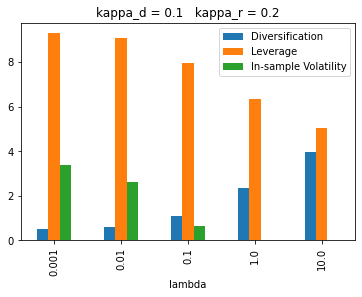

In [289]:
res_sub = res[(res['kappa_r'] == 0.2) & (res['kappa_d'] == 0.1)].drop(columns=['kappa_r', 'kappa_d'])
res_sub.set_index('lambda').plot.bar(figsize=(6, 4))
plt.title('kappa_d = 0.1   kappa_r = 0.2')
plt.show()

As $\lambda$ increases, the goal is set more on risk reduction, thus the diversification will reduce, and the leverage decreases, while volatility logically reduces.

Now, we will keep the $\lambda$ and $\kappa_d$ fixed.

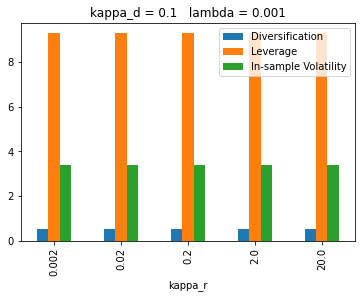

In [299]:
res_sub = res[(res['lambda'] == 0.001) & (res['kappa_d'] == 0.1)].drop(columns=['lambda', 'kappa_d'])
res_sub.set_index('kappa_r').plot.bar(figsize=(6, 4))
plt.title('kappa_d = 0.1   lambda = 0.001')
plt.show()

The effect of $\kappa_r$ seems minor in our case. Theoretically, when $\kappa_r$ is large, the importance of transaction costs is high.

Finally, we will explore the effect of $\kappa_d$.

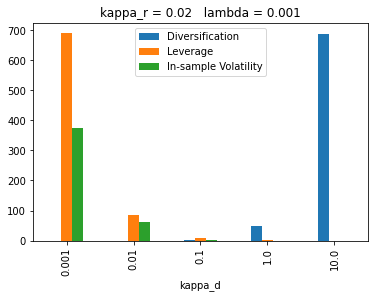

In [314]:
res_sub = res[(res['lambda'] == 0.01) & (res['kappa_r'] == 0.002)].drop(columns=['lambda', 'kappa_r'])
res_sub.set_index('kappa_d').plot.bar(figsize=(6, 4))
plt.title('kappa_r = 0.002   lambda = 0.01')
plt.show()

The effect of $\kappa_d$ seems to be very significant: the leverage and in-sample volatility reduces *drastically* with $\kappa_d$, while diversification increases drastically, corresponding to the theory.

## Takeaways

Portfolio backtesting: a quest to find the best (or at least a solidly profitable) strategy. **Data snooping** (or $p$-hacking) and **false positives** are major issues in portfolio backtesting.

- Protocol
  - Data splitting: the **initial buffer period** choices
    - Fixed: rolling training set
    - Expanding: balance between different market conditions and useless data
  - **Rebalancing frequency and horizon**: avoid the 'danger zone' and the forward looking bias
- Turning Signals into Portfolio Weights
  - **Selection**: select assets that are likely to perform well
    - **Sorted portfolios** according to factors, take 'extreme' portfolios or make dollar neural strategy
  - **Weighting**: equally weighted VS other techniques
    - Coqueret (2015): a constrained mean-variance optimization
- Performance Metrics
  - Discussion: set a **benchmark** case (probably with a EW portfolio)
  - Pure performance and risk indicators
    - **Average return** (arithmetic or geometric)
    - Accuracy or **win rate** (VS benchmark)
    - Precision (win rate on upward moves, VS benchmark)
    - Risk measures: **volatility**, downward semi-variance, (Conditional) Value-at-Risk, **maximum drawdown**
  - Factor-based Evaluation
    - Factor exposures
    - **Jensen's alpha** and market beta
  - Risk-adjusted Measures
    - Information ratio (and tracking error)
    - **Sharpe Ratio**
  - Transaction Costs and Turnover
    - **Turnover**
    - **Cost-adjusted Sharpe Ratio**
- Common Errors and Issues
  - Forward looking: carefully check!!
  - Backtest overfitting
    - Bailey and de Prado (2014): a statistical test for "outstanding" Sharpe ratios
    - Don't rely on $p$-values or some advanced techniques
  - Simple safeguards
    - Compare the cost-adjusted Sharpe ratio between the tested strategy and a benchmark with a sufficiently long enough out-of-sample period and long-only portfolios
- Implication of Non-stationarity: Forecasting is Hard
  - General Comments
    - Machine learning is no philosopher's stone or magic wand
    - Reasons: noise in datasets or (and) non-stationarity of factor analysis
    - ML techniques requires *invariance*, which factor investing does not seem to have
  - The no free lunch theorem
    - In order to build a performing algorithm, one must have prior views on the structure of the relationship between $y$ and $\textbf{x}$

# Interpretability

This chapter is dedicated to the techniques that help understand the way models process inputs into outputs. We recommend to read a recent book [Molnar (2019)](https://christophm.github.io/interpretable-ml-book/) which is entirely devoted to this topic and a less technical reference Hall and Gill (2019). We will mainly be *factor-investing orientated* in this chapter and discuss examples with a financial dataset.

Quantitative tools that aim for interpretability of ML models are required to satisfy two simple conditions:

1. That they provide information about the model.
2. That they are highly comprehensible.

Often, these tools generate graphical outputs which are easy to read and yield immediate conclusions.

In attempts to white-box complex machine learning models, one dichotomy stands out:

- **Global models** seek to determine the relative role of features in the construction of the predictions once the model has been trained. This is done at the global level, so that the patterns that are shown in the interpretation hold on average over the *whole training set*.
- **Local models** aim to characterize how the model behaves around *one particular instance* by considering small variations around this instance. The way these variations are processed by the original model allows to simplify it by approximating it, e.g., in a linear fashion. This approximation can for example determine the sign and magnitude of the impact of each relevant feature in the vicinity of the original instance.

Molnar (2019) proposes another classification of interpretability solutions by splitting interpretations that depend on one particular model (e.g., linear regression or decision tree) versus the interpretations that can be obtained for any kind of model. In the sequel, we present the methods according to the global versus local dichotomy.

## Global Interpretations

### Simple Models as Surrogates

Let us start with the simplest example of all. In a linear model,
$$y_i=\alpha+\sum_{k=1}^K \beta_k x_i^k+\epsilon_i$$
The following elements are usually extracted from the estimation of the $\beta_k$:

- The $R^2$, which appreciates the **global fit** of the model (possibly penalized to prevent overfitting with many regressors). The $R^2$ is usually computed in-sample;
- The sign of the estimates $\hat{\beta}_k$, which indicates the direction of the impact of each **feature** $x^k$ on $y$;
- The $t$-statistics $t_{\hat{\beta}_k}$, which evaluate the **magnitude** of this impact: large statistics in absolute value reveal prominent variables. Often, the $t$-statistics are translated into $p$-values which are computed under some suitable distributional assumptions.

The last two indicators are useful because they inform the user on which features matter the most and on the sign of the effect of each predictor. Most tools that aim to explain black boxes follow the same principles.

Decision trees, because they are easy to picture, are also great models for interpretability. Recently, Vidal et al. (2020) propose a method to reduce an ensemble of trees into a unique tree. The aim is to propose a simpler model that behaves exactly like the complex one.

More generally, it is an intuitive idea to resort to simple models to proxy more complex algorithms. One simple way to do so is to build so-called surrogate models. The process is simple:

1. Train the original model $f$ on features $\textbf{X}$ and labels $\textbf{y}$;
2. Train a simpler model $g$ to explain the predictions of the trained model $\hat{f}$ given the features $\textbf{X}$:
$$\hat{f}(\textbf{X})=g(\textbf{X})+\textbf{error}$$

The estimated model $\hat{g}$ explains how the initial model $\hat{f}$ maps the features into the labels.

In [1]:
import pandas as pd
import numpy as np
import joblib

data_ml = pd.read_pickle('./data/data_ml.pkl')
separation_date = pd.to_datetime('2014-01-15')

training_sample = data_ml[data_ml['date'] < separation_date]
test_sample = data_ml[data_ml['date'] > separation_date]
features = data_ml.columns[2:95]

fit_RF = joblib.load('./models/fit_rf.pkl')
fit_RF

RandomForestRegressor(max_features=30, max_samples=10000, min_samples_split=250,
                      n_estimators=40)

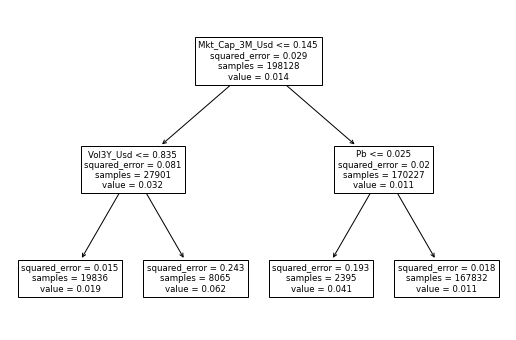

In [7]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

dt = DecisionTreeRegressor(max_depth=2)
train_prediction = fit_RF.predict(training_sample[features])
dt.fit(training_sample[features], training_sample['R1M_Usd'])

plt.figure(figsize=(9, 6))
plot_tree(dt, feature_names=features)
plt.show()

The representation of the tree is quite different, compared to those seen in Chapter 6, but managed to do a proper job in capturing the main complexty of the model which it mimicks.

### Variable Importance (Tree-based)

Decision trees are favorable for its interpretability and clear visual representation. They are easy to comprehend and is often associates with more sophisticated tools.

Indeed, both random forests and boosted trees fail to provide perfectly accurate accounts of what is happening inside the engine. In contrast, it is possible to compute the aggregate share (or importance) of each feature in the determination of the structure of the tree once it has been trained.

After training, it is possible to compute at each node $n$ the gain $G(n)$ obtained by the subsequent split if there are any, i.e., if the node is not a terminal leaf. It is also easy to determine which variable is chosen to perform the split, hence we write $\mathcal{N}_k$ the set of nodes for which feature $k$ is chosen for the partition. Then, the global importance of each feature is given by $$I(k)=\sum_{n\in \mathcal{N}_k} G(n)$$
and it is often rescaled so that the sum of $I(k)$ across all $k$ is equal to 1. In this case, $I(k)$ measures the relative contribution of feature $k$ in the reduction of loss during the training. A variable with high importance will have a greater impact on predictions. Generally, these variables are those that are located close to the root of the tree.

Below we take a look at the results obtained from the tree-based models trained in Chapter 6. Notice that each fitted output has its own structure and importance vectors have different names.

In [13]:
fit_tree = joblib.load("./models/fit_tree.pkl")
fit_RF = joblib.load("./models/fit_rf.pkl")
fit_xgb = joblib.load("./models/fit_xgb.pkl")

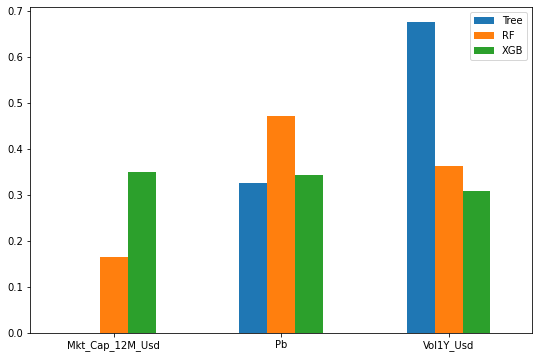

In [26]:
tree_vi = pd.DataFrame(fit_tree.feature_importances_, index=features).T
rf_vi = pd.DataFrame(fit_RF.feature_importances_, index=features).T
xgb_vi = pd.DataFrame(fit_xgb.feature_importances_, index=features).T

vi_trees = pd.concat([tree_vi, rf_vi, xgb_vi], ignore_index=True)
vi_trees.index = ['Tree', 'RF', 'XGB']
# No global regularization needs since sklearn package has done this job
vi_trees_sub = vi_trees[['Mkt_Cap_12M_Usd','Pb','Vol1Y_Usd']].apply(lambda x: x / np.sum(x), axis=1).T

fig, ax = plt.subplots(figsize=(9, 6))
vi_trees_sub.plot.bar(ax=ax)
plt.xticks(rotation = 0)
plt.show()

Indeed, by construction, the simple tree model only has a small number of features with nonzero importance: we show 3 features above. In contrast, random forests and boosted trees are much more complex, and they give some importance to many predictors. For scale reasons, the normalization is performed *after* the subset of features is chosen. We preferred to limit the number of features shown on the graph for obvious readability concerns.

There are differences in the way the models rely on the features. For instance, the simple tree may give the most importance to volatility while random forests bet more on price-to-book ratio.

One defining property of random forests is that they give a chance to all features. Indeed, by randomizing the choice of predictors, each individual exogenous variable has a shot at explaining the label. Along with boosted trees, the allocation of importance is more balanced across predictors, compared to the simple tree which puts most of its eggs in just a few baskets.

### Variable Importance (agnostic)

We refer to the papers mentioned in the study by Fisher et al. (2019) to extend the feature importances to nontree-based methods. The aim is to quantify to what extent one feature contributes to the learning process.

One way to track the added value of one particular feature is to look at what happens if its values inside the training set are entirely *shuffled*. If the original feature plays an important role in the explanation of the dependent variable, then the shuffled version of the feature will lead to a much higher loss.

The baseline method to assess feature importance in the general case is the following:

1. Train the model on the original data and compute the associated loss $l^*$;
2. For each feature $k$, create a new training dataset in which the feature's values are randomly *permuted*. Then evaluate the loss $l_k$ of the model based on this altered sample.
3. Rank the variable important of each feature computed as a difference $VI_k=l_k-l^*$ or a ratio $VI_k=l_k/l^*$.

Whether to compute the losses on the training set or the testing set is an open question. The above procedure is of course random
and can be *repeated* so that the importances are averaged over several trials which improves the stability of the results.

Below, we implement this algorithm manually so to speak for the features appearing in Figure 13.2. We test this approach on ridge regressions and recycle the variables used in Chapter 5. We start by the first step: computing the loss on the original training sample.

In [31]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

y_train = training_sample['R1M_Usd']
X_train = training_sample[features]

fit_ridge_0 = ElasticNet(alpha = 0.01, l1_ratio = 0.01).fit(X_train, y_train) # For python, no penalization (i.e., alpha=0) is unrecommended!
l_star = mean_squared_error(fit_ridge_0.predict(X_train), y_train)
l_star

0.0289130000719163

Next, we evaluate the loss when each of the predictors has been sequentially shuffled. To reduce computation time, we only make one round of shuffling.

In [36]:
l = []
for feat_name in vi_trees.columns:
    tmp_data = X_train.copy()
    tmp_data[feat_name] = np.random.permutation(tmp_data[feat_name])
    # No re-training?
    tmp_l = mean_squared_error(fit_ridge_0.predict(tmp_data), y_train)
    l.append(tmp_l - l_star)

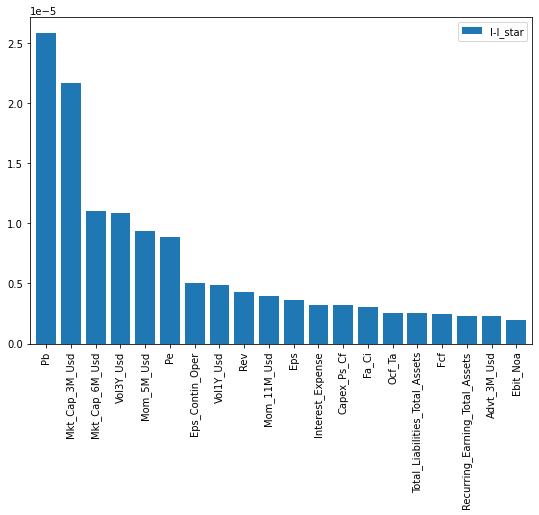

In [51]:
l_diff_df = pd.DataFrame(l, index=features, columns=['l-l_star']).sort_values(by='l-l_star', ascending=False)
_, ax = plt.subplots(figsize=(9, 6))
l_diff_df[:20].plot.bar(ax=ax, width=0.8)
plt.show()

The resulting importances are in line with thoses of the tree-based models: the most prominent variables are volatility-based, market capitalization-based, and the price-to-book ratio; Note that in some cases the score can even be *negative*, which means that the predictions are more accurate than the baseline model when the values of the predictor are shuffled!

### Partial Dependence Plot

Partial dependence plots (PDPs) aim at showing the relationship between the output of a model and the value of a feature.

Let us fix a feature $k$. We want to understand the **average impact** of $k$ on the predictions of the trained model $\hat{f}$. In order to do so, we assume that the feature space is random and we split it in two: $k$ versus $-k$, which stands for all features except for $k$. The partial dependence plot is defined as 
$$\bar{f}_k(x_k)=\mathbb{E}[\hat{f}(\textbf{x}_{-k},x_k)]=\int \hat{f}(\textbf{x}_{-k},x_k)d\mathbb{P}_{-k}(\textbf{x}_{-k})$$
where $d\mathbb{P}_{-k}(\cdot)$ is the (multivariate) distribution of the non-$k$ features $\textbf{x}_{-k}$. The above function takes the feature values $x_k$ as argument and keeps all other features frozen via their sample distributions: this shows the impact of feature $k$ solely. In practice, the average is evaluated using Monte-Carlo simulations:
$$\bar{f}_k(x_k)\approx \frac{1}{M}\sum_{m=1}^M\hat{f}\left(x_k,\textbf{x}_{-k}^{(m)}\right)$$
where $\textbf{x}_{-k}^{(m)}$ are independent samples of the non-$k$ features.

Theoretically, PDPs could be computed for more than one feature at a time. In practice, this is only possible for two features (yielding a 3D surface) and is more computationally intense.

We illustrate this concept below, with the help of the `sklearn` package in Python. The model we seek to explain is the random forest built in Section 6.2. We recycle some variables used therein. We choose to test the impact of the *price-to-book ratio* on the outcome of the model.

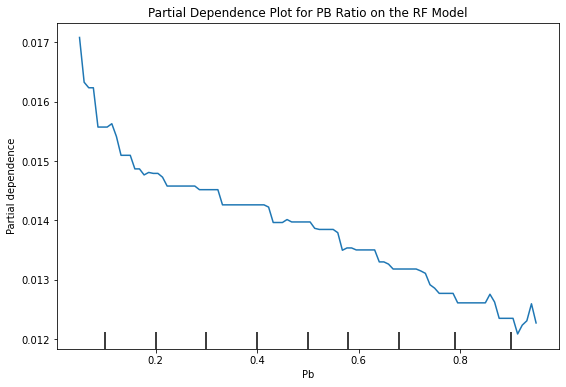

In [56]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(9, 6))
pdp_PB = PartialDependenceDisplay.from_estimator(fit_RF, training_sample[features], ["Pb"], ax=ax)
plt.title("Partial Dependence Plot for PB Ratio on the RF Model")
plt.show()

The average impact of the price-to-book ratio on the predictions is decreasing. This was somewhat expected, given the conditional average of the dependent variable given the price-to-book ratio. This latter function is depicted in Figure 6.3 and shows a behavior comparable to the above curve: strongly decreasing for small value of P/B and then relatively flat. When the price-to-book ratio is low, firms are undervalued. Hence, their higher returns are in line with the *value* premium.

Finally, we refer to Zhao and Hastie (2020) for a theoretical discussion on the *causality* property of PDPs. Indeed, a deep look at the construction of the PDPs suggests that they could be interpreted as a *causal representation* of the feature on the model's output.

## Local Interpretations

Whereas global interpretations seek to assess the impact of features on the output *overall*, local methods try to quantify the behavior of the model on particular instances or the neighborhood thereof. Local interpretability has recently gained traction and many papers have been published on this topic. Below, we outline the most widespread methods.

### LIME

LIME (Local Interpretable Model-Agnostic Explanations) is a methodology originally proposed by Ribeiro, Singh, and Guestrin (2016). Their aim is to provide a faithful account of the model under two constraints:

- **Simple interpretability**, which implies a limited number of variables with visual or textual representation. This makes sure that any human can easily understand the outcome;
- **Local Faithfulness**: the explanation holds for the vicinity of the instance.

The original (black-box) model is $f$ and we assume we want to approximate its behavior around instance $x$ with the interpretable model $g$. The simple function $g$ belongs to a larger class $G$. The vicinity of $x$ is denoted $\pi_x$ and the complexity of $g$ is written $\Omega(g)$. LIME seeks an interpretation of the form 
$$\xi(x)=\underset{g \in G}{\text{argmin}} \, \mathcal{L}(f,g,\pi_x)+\Omega(g)$$
where $\mathcal{L}(f,g,\pi_x)$ is the loss function (error/imprecision) induced induced by $g$ in the vicinity $\pi_x$ of $x$. The penalization $\Omega(g)$ is for instance the number of leaves or depth of a tree, or the number of predictors in a linear regression.

It now remains to define some of the above terms. The vicinity of $x$ is defined by $\pi_x(z)=e^{-D(x,z)^2/\sigma^2}$, where $D$ is some distance measure and $\sigma^2$ some scaling constant. We underline that this function decreases when $z$ shifts away from $x$.

The tricky part is the loss function. In order to minimize it, LIME generates artificial samples close to $x$ and averages/sums the error on the label that the simple representation makes. For simplicity, we assume a scalar output for $f$, hence the formulation is the following:
$$\mathcal{L}(f,g,\pi_x)=\sum_z \pi_x(z)(f(z)-g(z))^2$$

and the errors are weighted according to their distance from the initial instance $x$: the closest points get the largest weights. In its most basic implementation, the set of models $G$ consists of all linear models.

In the following Figure 13.5, we provide a simplified diagram of how LIME works.

![FIGURE 13.5: Simplistic explanation of LIME: the explained instance is surrounded by a red square. Five points are generated (the triangles) and a weighted linear model is fitted accordingly (dashed grey line).](images/figure13-5.png)

For expositional clarity, we work with only one dependent variable. 

- The original training sample is shown with the black points.
- The fitted (trained) model is represented with the blue line (smoothed conditional average).
Wanted: how the model works around one particular instance (the red circle).
- Sampling: 5 new points around the instance (5 red triangles).
- Each triangle lies on the blue line (model predictions) and has a weight proportional to its size: the triangle closest to the instance has a bigger weight.
- A linear model is built with these 5 points with a WLS - two parameters (the intercept and the slope) can be evaluated with standard statistical tests.

The sign of the slope is important. It is fairly clear that if the instance had been taken closer to $x=0$, the slope would have probably been almost flat and hence the predictor could be locally discarded.

Another important detail is the number of sample points. In our explanation, we take only five, but in practice, a robust estimation usually requires one thousand points or more. Indeed, when too few neighbors are sampled, the estimation risk is high and the approximation may be rough.

We proceed with an example of implementation. There are several steps:

1. Fit a model on some training data.
2. Wrap everything with the lime function.
3. Focus on a few predictors and see their impact over a few particular instances.

We start with the first step. This time, we work with a boosted tree model.

In [3]:
import lime
from xgboost import XGBRegressor

xgb_model = XGBRegressor(max_depth=5, learning_rate=0.5,
                         gamma=0.1, colsample_bytree=1,
                         min_child_weight=10, subsample=1.0)
xgb_model.fit(training_sample[features], training_sample['R1M_Usd'])

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

Then, we head on to steps two and three. We will use the package `lime` with the submodule `lime_tabular`.

In [25]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(training_sample[features].values, mode='regression',
                                 feature_names=features,
                                 verbose=True)
explanation = explainer.explain_instance(data_row=training_sample[features].iloc[0].values,
                                         predict_fn=xgb_model.predict,
                                         labels=(training_sample['R1M_Usd'].iloc[0], ),
                                         num_features=6,
                                         distance_metric='euclidean',
                                         num_samples=900)

Intercept 0.09639734584246004
Prediction_local [0.13510569]
Right: 0.2636147


In [ ]:
explanation.show_in_notebook()

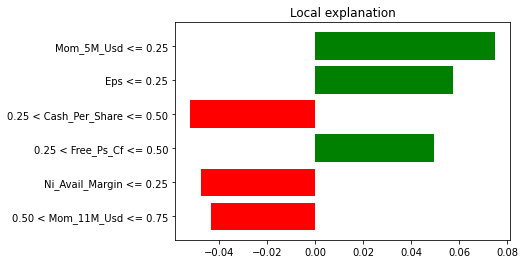

In [27]:
fig = explanation.as_pyplot_figure()

There are two types of information: the sign of the impact and the magnitude of the impact. The sign is revealed with the color (positive in green or yellow, negative in red or blue) and the magnitude is shown with the size of the rectangles.

The values to the left of the graphs show the ranges of the features with which the local approximations were computed.

Lastly, we briefly discuss the choice of distance function chosen in the code. It is used to evaluate the discrepancy between the true instance and a simulated one to give more or less weight to the prediction of the sampled instance. Our dataset comprises only numerical data; hence, the Euclidean distance is a natural choice:
$$\text{Euclidean}(\textbf{x}, \textbf{y})=\sqrt{\sum_{n=1}^N(x_i-y_i)^2}.$$
Another possible choice would be the Manhattan distance:
$$\text{Manhattan}(\textbf{x}, \textbf{y})=\sum_{n=1}^N|x_i-y_i|.$$

The problem with these two distances is that they fail to handle categorical variables. This is where the *Gower distance* steps in (Gower (1971)). The distance imposes a different treatment on features of different types (classes versus numbers essentially, but it can also handle missing data!). For categorical features, the Gower distance applies a binary treatment: the value is 1 if the features are equal and 0 if not (i.e., $1_{\{x_n=y_n \}}$). For numerical features, the spread is quantified as $1-\frac{|x_n-y_n|}{R_n}$, where $R_n$ is the maximum absolute value the feature can take. All similarity measurements are then aggregated to yield the final score. Note that in this case, the logic is reversed, $\textbf{x}$ and $\textbf{y}$ are very close if the Gower distance is close to 1, and they are far away if the distance is close to 0.

### Shapley Values

The approach of Shapley values is somewhat different compared to LIME and closer in spirit to PDPs. It originates from cooperative game theory (Shapley, 1953). One way to assess the impact (or usefulness) of a variable is to look at what happens if we *remove* this variable from the dataset. If this is very detrimental to the quality of the model (i.e., to the accuracy of its predictions), then it means that the variable is substantially valuable.

The simplest way to proceed is to take all variables and remove one to evaluate its predictive ability. Shapley values are computed on a larger scale because they consider all possible combinations of variables to which they add the target predictor. Formally, this gives:
$$\phi_k=\sum_{S \subseteq \{x_1,\dots,x_K \} \backslash x_k}\underbrace{\frac{\text{Card}(S)!(K-\text{Card}(S)-1)!}{K!}}_{\text{weight of coalition}}\underbrace{\left(\hat{f}_{S \cup \{x_k\}}(S \cup \{x_k\})-\hat{f}_S(S)\right)}_{\text{gain when adding } x_k}$$

$S$ is any subset of the **coalition** that doesn't include feature $k$ and its size is $\text{Card}(S)$.

In the equation above, the model $f$ must be altered because it's impossible to evaluate $f$ when features are missing. In this case, there are several possible options:

- Set the missing value to its average or median value (in the whole sample) so that its effect is some 'average' effect;
- Directly compute an average value $\int_{\mathbb{R}} f(x_1,\dots,x_k,\dots,x_K)d\mathbb{P}_{x_k}$, where $d\mathbb{P}_{x_k}$ is the empirical distribution of $x_k$ in the sample.

Obviously, Shapley values can take a lot of time to compute if the number of predictors is large. We refer to Chen et al. (2018) for a discussion on a simplifying method that reduces computation times in this case. Extensions of Shapley values for interpretability are studied in Lundberg and Lee (2017).

In python, we will use the `shap` package to implement the Shapley values. We start by fitting a random forest model.

In [9]:
from sklearn.ensemble import RandomForestRegressor

features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]
fit_RF_short = RandomForestRegressor(n_estimators=40,
                                     max_samples=10000,
                                     bootstrap=True,
                                     max_features=4,
                                     min_samples_leaf=250)
fit_RF_short.fit(training_sample[features_short], training_sample['R1M_Usd'])

RandomForestRegressor(max_features=4, max_samples=10000, min_samples_leaf=250,
                      n_estimators=40)

We can then analyze the behavior of the model around the first instance of the training sample.

In [10]:
import shap

explainer = shap.explainers.Exact(model=fit_RF_short.predict,
                                  masker=training_sample[features_short].values,
                                  feature_names=features_short)
shap_values = explainer(training_sample[features_short].iloc[:1].values) # on the first instance
shap_values

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


.values =
array([[ 0.00351467,  0.00166742, -0.00071621, -0.00118842,  0.00213526,
         0.00133457,  0.00101373]])

.base_values =
array([0.0143331])

.data =
array([[0.01, 0.01, 0.52, 0.59, 0.7 , 0.21, 0.77]])

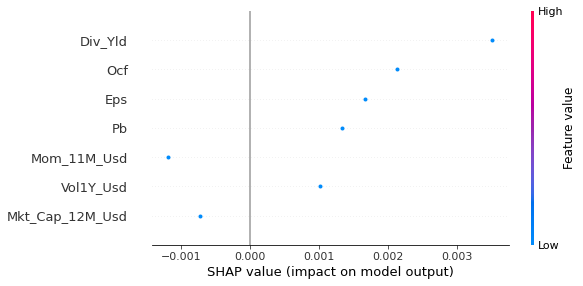

In [20]:
import matplotlib.pyplot as plt
shap.plots.beeswarm(shap_values)
plt.show()

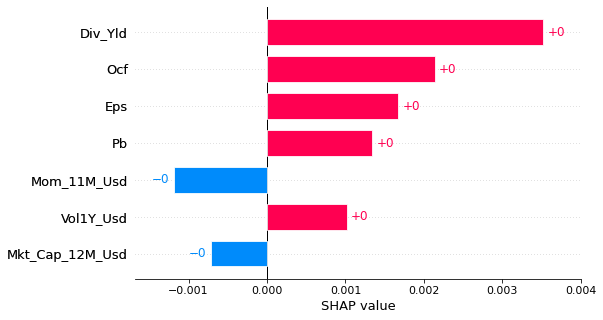

In [25]:
fig = shap.plots.bar(shap_values[0])

In the output shown, we again obtain the two crucial insights: **sign** of the impact of the feature and **relative importance** (compared to other features).

### Breakdown

Breakdown (see, e.g., Staniak and Biecek (2018)) is a mixture of ideas from PDPs and Shapley values. The core of breakdown is the so-called **relaxed model prediction** defined in the following equation:

$$\tilde{f}_{\boldsymbol{k}}(x^*)=\frac{1}{M}\sum_{m=1}^M \hat{f}\left(x^{(m)}_{-\boldsymbol{k}},x^*_{\boldsymbol{k}} \right)$$

It is close in spirit to Equation (13.1) for PDP. The difference is that we are working at the local level, i.e., on one particular observation, say $x^*$. We want to measure the impact of a set predictors on the prediction associated to $x^*$; hence, we fix two sets $\boldsymbol{k}$ (fixed features) and $-\boldsymbol{k}$ (free features) and evaluate a **proxy** for the average prediction of the estimated model $\hat{f}$ when the set $\boldsymbol{k}$ of predictors is fixed at the values of $x^*$ (equal to $x_{\boldsymbol{k}}^*$).

The $x^{(m)}$ in the above expression are either simulated values of instances or simple sampled values from the dataset. The notation implies that the instance has some values replaced by those of $x^*$, namely those that correspond to the indices $\boldsymbol{k}$. When $\boldsymbol{k}$ consists of all features, then $\tilde{f}_{\boldsymbol{k}}(x^*)$ is equal to the raw model prediction $\hat{f}(x^*)$ and when $\boldsymbol{k}$ is empty, it is equal to the average sample value of the model (constant prediction).

The quantity of interest is the so-called contribution of feature $j \notin \boldsymbol{k}$ with respect to data points $x^*$ and set $\boldsymbol{k}$:
$$\phi_{\boldsymbol{k}}^j(x^*)=\tilde{f}_{\boldsymbol{k} \cup j}(x^*)-\tilde{f}_{\boldsymbol{k}}(x^*)$$

Just as for Shapley values, the above indicator computes an average impact when augmenting the set of predictors with feature $j$. By definition, it depends on the set $\boldsymbol{k}$, so this is one notable difference with Shapley values (that span *all* permutations).

In Staniak and Biecek (2018), the authors devise a procedure that incrementally increases or decreases the set $\boldsymbol{k}$. This greedy idea helps alleviate the burden of computing all possible combinations of features. Moreover, a very convenient property of their algorithm is that the sum of all contributions is equal to the predicted value: $$\sum_j \phi_{\boldsymbol{k}}^j(x^*)=f(x^*).$$

The visualization makes that very easy to see. In order to illustrate one implementation of breakdown, we train a random forest on a limited number of features, as shown below. This will increase the readability of the output of the breakdown.

In [26]:
fit_RF_short = RandomForestRegressor(n_estimators=12,
                                     max_samples=10000,
                                     bootstrap=True,
                                     max_features=5,
                                     min_samples_leaf=250)
fit_RF_short.fit(training_sample[features_short], training_sample['R1M_Usd'])

RandomForestRegressor(max_features=5, max_samples=10000, min_samples_leaf=250,
                      n_estimators=12)

In [34]:
import dalex as dx

explainer = dx.Explainer(fit_RF_short, training_sample[features_short], training_sample['R1M_Usd'])
explain_break = explainer.predict_parts(pd.DataFrame(training_sample.loc[0, features_short]).T, type='break_down')
explain_break.plot()

Preparation of a new explainer is initiated

  -> data              : 198128 rows 7 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 198128 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x0000028187C168C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.0182, mean = 0.0129, max = 0.0589
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.932, mean = 0.00106, max = 27.2
  -> model_info        : package sklearn

A new explainer has been created!


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


The graphical output is intuitively interpreted. 

- The purple bar is the prediction of the model at the chosen instance.
- Green bars signal a positive contribution and the red rectangles show the variables with negative impact. 
- The relative sizes indicate the importance of each feature.

## Takeaways

Interpretability (tools): informative and comprehensible.

- **Global models** and global interpretations: *average* over the training set.
  - Simple models as surrogates: simple models as a proxy to complex algorithms
  - Variable importance
    - Tree-based: frequency of a feature used to perform the split
    - Agnostic: randomly permute a feature's values and compare the loss difference
  - Partial dependence plot (PDPs)
    - Fix a feature $k$ and predict the **average impact** of $k$ on the predictions of the trained model
- **Local interpretations**
  - **LIME** (Local Interpretable Model-Agnostic Explanations): an interpretation to minimize a specific loss function with the vicinity of $x$
    - Distance metrics choices: Euclidean, Manhattan, Gower (to handle classification tasks)
  - Shapley Values: loss differences when removing a particular variable considering all possible combinations
  - Breakdown: a mixture from PDPs and Shapley values but depending on only one set $\boldsymbol{k}$ instead of all permutations

# Two key concepts: Causality and Non-stationarity

Most ML tools fail to cover **causality** relationships between features and labels because they are mostly focused to capture *correlations*, which are weaker because they characterize a two-way relationship $(\textbf{X} \leftrightarrow \textbf{y})$, which causality specifies a direction $\textbf{X} \rightarrow \textbf{y}$ or $\textbf{X} \leftarrow \textbf{y}$.

A fashionable example is sentiment (and its relationship with returns). A high sentiment may increase the demand and push its price while returns may well cause sentiment. A long period of market return will probably result in the increasing sentiment. In Coqueret (2020), it is found (in opposition to most findings in this field), that the latter reshionship (returns $\rightarrow$ sentiment) is more likely and backed by causality driven tests (see Section 14.1.1).

Statistical causality is a large field and we refer to Pearl (2009) for a deeper discussion. Recently, researchers have sought to link causality with ML approaches (see, e.g., Peters et al. (2017), Heinze-Deml et al. (2018), Arjovsky et al. (2019)). The key notion in their work is **invariance**.

Often, data is collected not at once, but from different sources at different moments. Some relationships found in these different sources will change, while others may remain the same. The relationships that are **invariant to changing environments** are likely to stem from (and signal) causality. 

One counter-example is the following: training a CV algorithm to discriminate between cows and camels will lead the algorithm to focus on grass VS sand! This is because most camels are pictured in the desert while cows are shown in green fields of grass. Thus, a picture of a camel on grass will be classified as cow, while a cow on sand would be labelled “camel”. It is only with pictures of these two animals in *different contexts (environments)* that the learner will end up truly finding what makes a cow and a camel. The representation of the camel becomes invariant over all datasets and the learner has discovered causality, i.e., the true attributes that make the camel a camel (overall silhouette, shape of the back, face, color (possibly misleading!), etc.).

his search for invariance makes sense for many disciplines like CV and NLP. In finance, it is not obvious that invariance may exist. Market conditions are known to be time-varying and the relationships between firm characteristics and returns also change from year to year. One solution to this issue may simply be to embrace **non-stationarity**. In Chapter 12, we advocate to do that by updating models as frequently as possible with rolling training sets: this allows the predictions to be based on the most recent trends. In Section 14.2 below, we introduce other theoretical and practical options.

## Causality

Traditional machine learning models aim to uncover relationships between variables but do not usually specify *directions* for these relationships. One typical example is the linear regression. If we write $y=a+bx+\varepsilon$, then it is also true that $x=b^{-1}(y-a-\varepsilon)$, which is of course also a linear relationship (w.r.t. $y$). These equations do not define causation whereby $x$ could be a clear determinant of $y$ ($x\rightarrow y$, but the opposite could be false).

### Granger Causality
The most notable tool first proposed by Granger (1969) is probably the simplest. For simplicity, we consider only two stationary processes $X_t$ and $Y_t$. A strict definition of causality could be the following. $X$ can be said to cause $Y$ whenever, for some integer $k$,
$$(Y_{t+1},\dots,Y_{t+k})|(\mathcal{F}_{Y,t}\cup \mathcal{F}_{X,t}) \quad  \overset{d}{\neq} \quad (Y_{t+1},\dots,Y_{t+k})|\mathcal{F}_{Y,t}$$
that is, when the distribution of future values of $Y_t$, conditionally on the knowledge of both processes is not the same as the distribution with the sole knowledge of the filtration $\mathcal{F}_{Y,t}$. Hence, $X$ does have an impact on $Y$ because its trajectory alters that of $Y$.

Now, this formulation is too vague and impossible to handle numerically, thus we simplify the setting via a linear formulation. We keep the same notatoins as Section 5 of the original paper by Granger (1969). The test consists of two regressions:
\begin{align*}
X_t&=\sum_{j=1}^ma_jX_{t-j}+\sum_{j=1}^mb_jY_{t-j} + \epsilon_t \\
Y_t&=\sum_{j=1}^mc_jX_{t-j}+\sum_{j=1}^md_jY_{t-j} + \nu_t
\end{align*}
where for simplity it is assumed that both processes have zero mean. The usual assumptions apply: the Gaussian noises $\epsilon_t$ and $\nu_t$ are uncorrelated in every possible way (mutually and through time). The test is the following: if one $b_j$ is non-zero, then it is said that $Y$ Granger-causes $X$ and if one $c_j$ is non-zero, $X$ Granger-causes $Y$. The two are not mutually exclusive and it is widely accepted that feedback loops can very well occur.

Statistically, under the null hypothesis, $b_1=\cdots=b_m=0$ (*resp.* $c_1=\cdots=c_m=0$), which can be tested using the usual Fischer distribution. Obviously, the linear restriction can be dismissed but the tests are then much more complex. The main financial article in this direction is Hiemstra and Jones (1994).

We will use the tools in the package `statsmodels` in Python to conduct the Granger causality test. We test if market capitalization averaged over the past 6 months Granger-causes 1 month ahead returns for one particular stock (the first in the sample).

In [1]:
import pandas as pd
import numpy as np
import joblib

data_ml = pd.read_pickle('./data/data_ml.pkl')
separation_date = pd.to_datetime('2014-01-15')

training_sample = data_ml[data_ml['date'] < separation_date]
test_sample = data_ml[data_ml['date'] > separation_date]
features = data_ml.columns[2:95]
features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]

In [13]:
from statsmodels.tsa.stattools import grangercausalitytests

x_granger = training_sample[training_sample['stock_id'] == 1]['Mkt_Cap_6M_Usd']
y_granger = training_sample[training_sample['stock_id'] == 1]['R1M_Usd']
fit_granger = grangercausalitytests(pd.DataFrame([x_granger, y_granger]).T, maxlag=[6], verbose=1)


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=14.0957 , p=0.0000  , df_denom=149, df_num=6
ssr based chi2 test:   chi2=91.9534 , p=0.0000  , df=6
likelihood ratio test: chi2=72.8278 , p=0.0000  , df=6
parameter F test:         F=14.0957 , p=0.0000  , df_denom=149, df_num=6


The test is directional and only tests if $X$ Granger-causes $Y$. In order to test the reverse effect, it is required to inverse the arguments in the function. In the output above, the $p$-value is very low, hence the probability of observing samples similar to ours knowing that $H_0$ is negligible. Thus is seems that market capitalization does Granger-cause one-month returns. 

We nonetheless underline that Granger causality is arguably weaker than the one defined in the next subsection. A process that Granger-causes another one simply contains useful predictive information, which is *not* proof of causality in a strict sense. Moreover, our test is limited to a linear model and including nonlinearities may alter the conclusion. Lastly, including other regressors (possibly omitted variables) could also change the results (see, e.g., Chow et al. (2002)).

### Causal Additive Models

One central tool in causal models is the **do-calculus** developed by Pearl. Whereas traditional probabilities $P[Y|X]$ link the odds of $Y$ conditionally on **observing** $X$ take some value $x$, the $\text{do}(\cdot)$ **forces** $X$ to take value $x$. This is a *looking* versus *doing* dichotomy. One classical example is the following. Observing a barometer gives a clue what the weather will be because high pressures are more often associated with sunny days:
$$P[\text{sunny weather}|\text{barometer says ``high''} ]>P[\text{sunny weather}|\text{barometer says ``low''} ]$$
but if you hack the barometer (force it to display some value),
$$P[\text{sunny weather}|\text{barometer hacked to ``high''} ]=P[\text{sunny weather}|\text{barometer hacked ``low''} ]$$
because hacking the barometer will have no impact on the weather. In short notation, when there is an intervention on the barometer, $P[\text{weather}|\text{do(barometer)}]=P[\text{weather}]$. This is an interesting example related to causality. The overarching variable is pressure. Pressure impacts both the weather and the barometer and this joint effect is called *confounding*. However, it may not be true that the barometer impacts the weather. The interested reader who wants to dive deeper into these concepts should have a closer look at the work of Judea Pearl. Do-calculus is a very powerful theoretical framework, but it is not easy to apply it to any situation or dataset (see for instance the book review Aronow and Sävje (2019)).

While we do not formally present an exhaustive tour of the theory behind causal inference, we wish to show some practical implementations because they are easy to interpret. It is always hard to single out one type of model in particular so we choose one that can be explained with simple mathematical tools. We start with the simplest definition of a *structural causal model* (SCM), where we follow here chapter 3 of Peters et al. (2017). The idea behind these models is to introduce some hierarchy (i.e., some additional structure) in the model. Formally, this gives
\begin{align*}
X&=\epsilon_X \\ 
Y&=f(X,\epsilon_Y),
\end{align*}
where the $\epsilon_X$ and $\epsilon_Y$ are independent noise variables. Plainly, a realization of $X$ is drawn randomly and has then an impact on the realization of $Y$ via $f$. Now this scheme could be more complex if the number of observed variables was larger. Imagine a third variable comes in so that
\begin{align*}
X&=\epsilon_X \\ 
Y&=f(X,\epsilon_Y),\\
Z&=g(Y,\epsilon_Z)
\end{align*}
In this case, $X$ has a causation effect on $Y$ and then $Y$ has a causation effect on $Z$. We thus have the following connections:
$$
\begin{array}{ccccccc} X & &&&\\
&\searrow & &&\\
&&Y&\rightarrow&Z. \\
&\nearrow &&\nearrow& \\
\epsilon_Y & &\epsilon_Z 
\end{array}
$$
The above representation is called a graph. The variables are often referred to as *vertices* (or *nodes*) and the arrows as *edges*. Because arrows have a direction, they are called *directed* edges. When two vertices are connected via an edge, they are called *adjacent*. A sequence of adjacent vertices is called a *path*, and it is directed if all edges are arrows. Within a directed path, a vertex that comes first is a parent node and the one just after is a child node.

Graphs can be summarized by *adjacency matrices*. An adjacency matrix $\textbf{A}=A_{ij}$ is a matrix filled with zeros and ones. $A_{ij}=1$ whenever there is an edge from vertex $i$ to vertex $j$. Usually, self-loops $(X\rightarrow X)$ are prohibited so that adjacency matrices have zeros on diagonal. If we consider a simplified version of the above graph like $X\rightarrow Y \rightarrow Z$, the corresponding adjacency matrix is 
$$
\textbf{A}=\begin{bmatrix} 
0 & 1 & 0 \\
0 & 0 & 1 \\
0 & 0 & 0 \\
\end{bmatrix}
$$
where letters $X, Y$ and $Z$ are natually ordered alphabetically. There are only two arrows: from $X$ to $Y$ (first row, second column) and from $Y$ to $Z$ (second row, third column).

A **cycle** is a particular type of path that creates a loop, i.e., when the first vertex is also the last. The sequence $X \rightarrow Y \rightarrow Z \rightarrow X$ is a cycle. Technically, cycles pose problems. Consider the simple sequence $X \rightarrow Y \rightarrow X$. This would imply a realization of $X$ causes $Y$ which in turn would cause the realization of $Y$. While Granger causality can be viewed as allowing this kind of connection, general causal models usually avoid cycles and work with **directed acyclic graphs** (DAGs).

We can explicitize a very general form of models:
$$X_j=f_j\left(\textbf{X}_{\text{pa}_D(j)},\epsilon_j  \right)$$
where the noise variables are mutually independent. The notation $\text{pa}_D(j)$ refers to the set of parent nodes of vertex $j$ within the graph structure $D$. Hence, $X_j$ is a function of all of its parents and some noise term $\epsilon_j$. An additive causal model is a mild simplification of the above specification:
$$X_j=\sum_{k\in \text{pa}_D(j)}f_{j,k}\left(\textbf{X}_{k}  \right)+\epsilon_j$$
where the nonlinear effect of each variable is cumulative, hence the term '*additive*'. Note that there is no time index there. In contrast to Granger causality, there is no natural ordering. Such models are very complex and hard to estimate. The details can be found in Bühlmann et al. (2014).[^1]

Below, we build the adjacency matrix pertaining to the small set of predictor variables plus the 1-month ahead return (on the training sample).[^2]

[^1]: The CAM package was removed from CRAN in November 2019 but can still be installed manually. First, download the content of the package [here](https://cran.r-project.org/web/packages/CAM/index.html). Second, copy it in the directory obtained by typing `.libPaths()` in the console.

[^2]: Important NOTE here. The development of python packages for causal inference is kind of poor. A useful package here is `cdt`, but this also requires the installation of R and packages `CAM`, `pcalg` or `RCIT`.

In [7]:
import networkx as nx
from cdt.causality.graph import CAM
data_caus = training_sample[['R1M_Usd'] + features_short]
fit_cam = CAM(njobs=-1)
graph_cam = fit_cam.predict(data_caus) # Time taken: ~130-140s

The adjacency matrix can be retrieved through `nx.adjacency_matrix` method, which returns a sparse matrix in Python.

In [24]:
# graph_cam.adj

In [16]:
nx.adjacency_matrix(graph_cam).todense()

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 1, 1],
       [1, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 0]], dtype=int32)

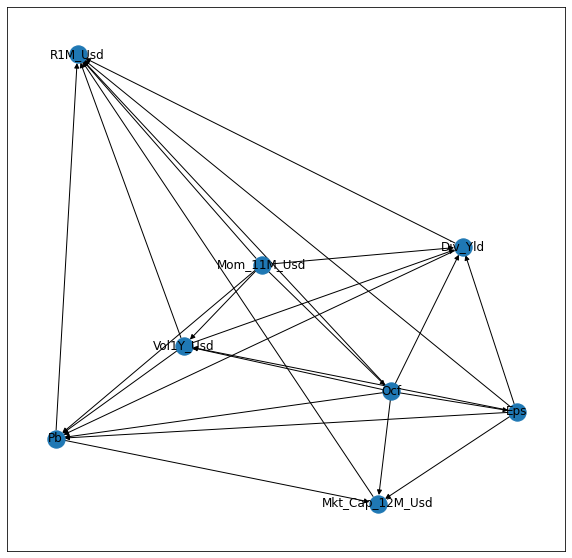

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
nx.draw_networkx(graph_cam)
plt.show()

The matrix is not too sparse, which means that the model has uncovered many relationships between the variables within the sample. The Python implementation seems to give some different results from the original book (in which the target variable is not caused by any explanatory variables but has a reverse effect). The result above is satisfying.

For the sake of completeness, we also provide an implementation of python version of the `pcalg` package (Kalisch et al. (2012)) with `cdt`. Below, an estimation via the so-called PC (named after its authors **P**eter Spirtes and **C**lark Glymour) is performed. The details of the algorithm are out of the scope of the book, and the interested reader can have a look at section 5.4 of Spirtes et al. (2000) or section 2 from Kalisch et al. (2012) for more information on this subject.

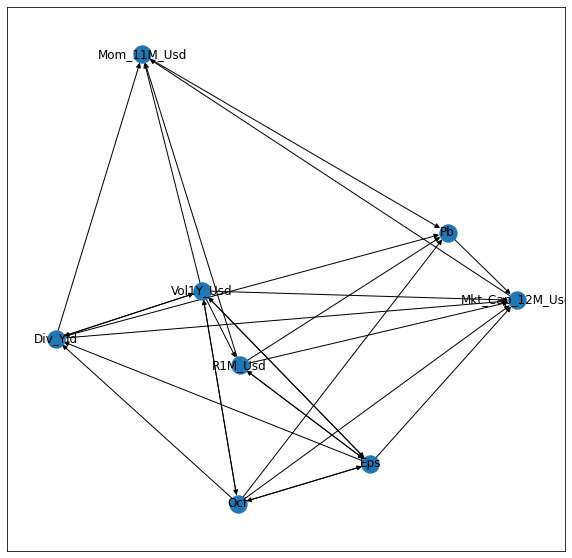

In [3]:
from cdt.causality.graph import PC

model_pc = PC(njobs=-1)
graph_pc = model_pc.predict(data_caus) # Time taken: 3.4s
fig = plt.figure(figsize=(10, 10))
nx.draw_networkx(graph_pc)
plt.show()

In [9]:
# Save the objects
# import pickle

# pickle.dump(graph_pc, open('./models/graph_pc.pkl', 'wb'))
# pickle.dump(graph_cam, open('./models/graph_cam.pkl', 'wb'))
# graph_pc_test = pickle.load(open('./models/graph_pc.pkl', 'rb'))

A bidirectional arrow is shown when the model was unable to determine the edge orientation. While the adjacency matrix is different compared to the first model, the `Eps` and `Vol1Y_Usd` seem to have a clear causal effect on the dependent variable.

### Structural Time Series Models

We end the topic of causality by mentioning a particular type of structural models: **structural time series**. Because we illustrate their relevance for a particular kind of causal inference, we closely follow the notations of Brodersen et al. (2015). The model is driven by two equations:
\begin{align*}
y_t&=\textbf{Z}_t'\boldsymbol{\alpha}_t+\epsilon_t \\
\boldsymbol{\alpha}_{t+1}& =\textbf{T}_t\boldsymbol{\alpha}_{t}+\textbf{R}_t\boldsymbol{\eta}_t.
\end{align*}
The dependent variable is expressed as a linear function of state variables $\boldsymbol{\alpha}_t$ plus an error term. These variables are in turn linear functions of their past values plus another error term which can have a complex structure (it's a product of a matrix $\boldsymbol{R}_t$ with a centered Gaussian term $\boldsymbol{\eta}_t$). This specification nests many models as special cases, like ARIMA for instance.

The goal of Brodersen et al. (2015) is to detect causal impacts via regime changes. They estimate the above model over a given training period and then predict the model’s response on some test set. If the aggregate (summed/integrated) error between the realized versus predicted values is significant (based on some statistical test), then the authors conclude that the breaking point is relevant. Originally, the aim of the approach is to quantify the effect of an intervention by looking at how a model trained before the intervention behaves after the intervention.

Below we test the $100^{th}$ date point in the sample (April 2008) is a turning point. Arguably, this date belongs to the time span of the subprime financial crisis. We use a Python version package `causalimpact`.

In [42]:
import causalimpact
from causalimpact import CausalImpact

stock1_data = data_ml[data_ml['stock_id'] == 1]
struct_data = stock1_data[['R1M_Usd'] + features_short]
pre_period = [0, 99]
post_period = [100, 199]
impact = CausalImpact(struct_data, pre_period, post_period)
impact.run()

In [43]:
impact.summary()

                                    Average           Cumulative
Actual                                    0                    1
Predicted                                 0                    0
95% CI                               [0, 0]            [-21, 21]
                                                                
Absolute Effect                           0                    1
95% CI                               [0, 0]            [23, -19]
                                                                
Relative Effect                     -593.9%              -593.9%
95% CI                  [-7055.4%, 5867.7%]  [-7055.4%, 5867.7%]
                                                                
P-value                               51.2%                     
Prob. of Causal Effect                48.8%                     


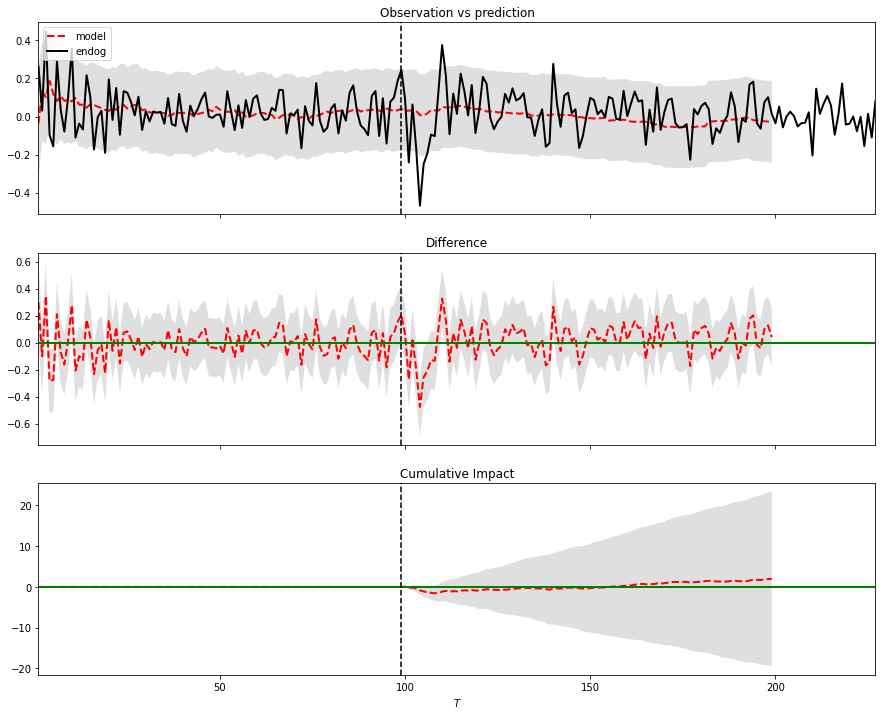

In [18]:
impact.plot()

Below, we make the report generated by the function (obtained by the commented line in the above code). The conclusions do not support a marked effect of the crisis on the model probably because the signs of the error in the post period constantly change sign.

In [24]:
impact.summary(output='report', width=150)

During the post-intervention period, the response             variable had an average value of             approx. 0.  In  the absence of an
intervention, we would have expected an average response of 0. The 95% interval of this counterfactual prediction is [0, 0]. Subtracting this
prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 0 with a
95% interval of [0, 0]. For a discussion of the significance of this effect, see below.


 Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response
variable had an overall value of 1.  Had  the intervention not taken place, we would have expected a sum of 0. The 95% interval of this prediction is
[-21, 21]


 The above results are given in terms of absolute numbers. In relative terms, the response variable showed  a decrease of  -593.9%. The 95% interval
of this percentage is [

## Dealing with Changing Environments

The most common assumption in machine learning contributions is that the samples that are studied are i.i.d. realizations of a phenomenon that we are trying to characterize. This constraint is natural because if the relationship between $X$ and $y$ always changes, then it is very hard to infer anything from observations. One major problem in Finance is that this is often the case: markets, behaviors, policies, etc., *evolve* all the time. This is at least partly related to the notion of absence of arbitrage: if a trading strategy worked all the time, all agents would eventually adopt it via herding, which would annihilate the corresponding gains. If the strategy is kept private, its holder would become infinitely rich, which obviously has never happened.

There are several ways to define changes in environments. If we denote with $\mathbb{P}_{XY}$ the multivariate distribution of all variables (features and label), with $\mathbb{P}_{XY}=\mathbb{P}_{X}\mathbb{P}_{Y|X}$, then two simple changes are possible:

- **Covariate shift**: $\mathbb{P}_{X}$ changes but $\mathbb{P}_{Y|X}$ does not: the features have a fluctuating distribution, but their relationship with $Y$ holds still;
- **Concept drift**: $\mathbb{P}_{Y|X}$ changes but $\mathbb{P}_{X}$ does not: feature distributions are stable, but their relation to $Y$ is altered.

Obviously, we omit the case when both items change, as it is too complex to handle. In factor investing, the feature engineering process (see Section 4.4) is partly designed to bypass the risk of covariate shift. Uniformization guarantees that the *marginals stay the same* but correlations between features may of course change. The main issue is probably concept drift when the way features explain the label changes through time. In Cornuejols, Miclet, and Barra (2018),31 the authors distinguish four types of drifts, which we reproduce in the following Figure 14.3. In factor models, changes are presumably a combination of all four types: they can be abrupt during crashes, but most of the time they are progressive (gradual or incremental) and never-ending (continuously recurring).

![FIGURE 14.3: Different flavors of concept change.](images/figure14-3.png)

Naturally, if we aknowledge that the environment changes, it appears logical to adapt models accordingly, i.e., dynamically. This gives rise to the so-called **stability-plasticity dilemma**. This dilemma is a trade-off between model **reactiveness** (new instances have an important impact on updates) versus **stability** (these instances may not be representative of a slower trend and they may thus shift the model in a suboptimal direction).

Practically,  there are two ways to shift the cursor with respect to this dilemma: alter the chronological depth of the training sample (e.g., go further back in time) or, allocate more weight to recent instances. We discuss the first option in Section 12.1 and the second mentioned in Section 6.3 (though the purpose in Adaboost is precisely to let the algorithm handle the weights). In neural networks, it is possible, in all generality to introduce instance-based weights in the computation of the loss function, though this option is not (yet) available in Keras (to the best of our knowledge: the framework evolves rapidly). For simple regressions, this idea is known as **weighted least squares** (WLS) wherein errors are weighted inside the loss:
$$L=\sum_{i=1}^I w_i(y_i-\boldsymbol{x}_i\boldsymbol{b})^2$$
In matrix terms, $L=(\textbf{y}-\textbf{Xb})'\textbf{W}(\textbf{y}-\textbf{Xb})$, where $\textbf{W}$ is a diagonal matrix of weights. The gradient with respect to $\textbf{b}$ is equal to $2\textbf{X}'\textbf{WX}\textbf{b}-2\textbf{X}'\textbf{Wy}$ so that the loss is minimized for $\textbf{b}^*=(\textbf{X}'\textbf{WX})^{-1}\textbf{X}'\textbf{Wy}$. The standard least-square solution is recovered for $\textbf{W}=\textbf{I}$. In order to fine-tune the reactiveness of the model, the weights must be a function that decreases as instances become older in the sample.

There is of course no perfect solution to changing financial environements. Below, we mention two routes that are taken in the ML literature to overcome the problem of non-stationarity in the data generating process. But first, we propose yet another clear verification that markets do experience time-varying distributions.

### Non-stationarity: yet another illustration

One of the most basic practices in (financial) econometrics is to work with *returns* (relative price changes). The simple reason is that returns seem to behave *consistently* through time (monthly returns are bounded, they usually lie between -1 and +1). Prices shift often and are harder to study.

Stationarity is a key notion in financial econometrics: it is much easier to characterize a phenomenon with distributional properties that remain the same through time (this makes them possible to capture). Sadly, the *distribution of returns is not stationary*: both the mean and the variance of returns change along cycles.

Below, we illustrate this fact by computing the average monthly return for all calendar years in the whole dataset.

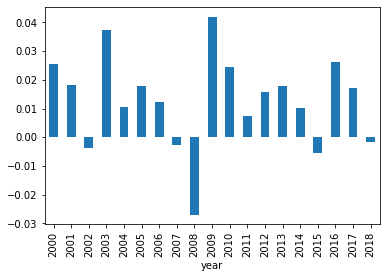

In [49]:
data_ml['year'] = data_ml['date'].apply(lambda x: x.year)
data_ml.groupby('year')['R1M_Usd'].mean().plot.bar()
plt.show()

These changes in the mean are also accompanied by variations in the second moment (variance / volatility). This effect, known as *volatility clustering*, has been widely documented ever since the theoretical breakthrough of Engle (1982). We refer for instance to Cont (2007) for more details on this topic. 

In terms of machine learning models, this is also true. Below, we estimate a pure characteristic regression with one predictor, the market capitalization averaged over the past 6-months ($r_{t+1,n}=\alpha+\beta x_{t,n}^{\text{cap}}+\epsilon_{t+1,n}$). The label is the 6-month forward return and the estimation is performed over every calendar year.

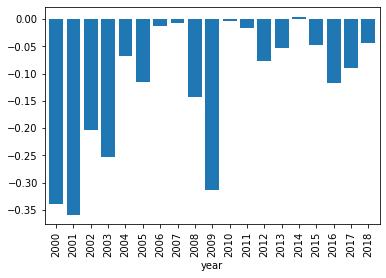

In [68]:
import statsmodels.api as sm

def get_beta(x):
    fit_lm = sm.OLS(x['R6M_Usd'], sm.add_constant(x['Mkt_Cap_6M_Usd'])).fit()
    return fit_lm.params[1]

data_ml.groupby('year').apply(get_beta).plot.bar(width=0.8)
plt.show()

The bars in Figure 14.5 highlight the concept drift: overall, the relationship between capitalization and returns is negative (the **size effect** again). Sometimes, it is markedly negative, sometimes, not so much. The ability of capitalization to explain returns is time-varying and models must adapt accordingly.

### Online Learning

Online learning refers to a subset of machine learning in which new information arrives progressively and the integration of this flow is performed iteratively (the term '*online*' is not linked to the Internet). In order to take the latest data updates into account, it is imperative to update the model (stating the obvious). This is clearly the case in finance and this topic is closely related to the discussion on learning windows in Section 12.1.

The problem is that for each year, the model will have to be re-trained with the whole dataset, which can be heavy. Including just the *latest* points in the learning process would substantially decrease the computationally cost. In neural networks, the sequential batch updating of weights can allow a progressive change in the model. Nonetheless, this is typically impossible for decision trees because the splits are decided once and for all.

The simplest example of online learning is the *Widrow-Hodd algorithm* (originally from Widrow and Hoff (1960)). Originally, the idea comes from the so-called *ADALINE* (ADAptive LInear NEuron) model which is a neural network with one hidden layer with linear activation function (i.e., like a perceptron, but with a different activation).

Suppose the model is linear $\textbf{y}=\textbf{Xb}+\textbf{e}$ and that the amount of data is both *massive* and coming in at a high frequency so that updating the model on the full sample is proscribed and technically intractable. A simple and heuristic way to update the values of b is to compute
$$\textbf{b}_{t+1} \longleftarrow \textbf{b}_t-\eta (\textbf{x}_t\textbf{b}-y_t)\textbf{x}_t'$$
where $\textbf{x}_t$ is the row vector of instance $t$. The justification is simple. The quadratic error $(\textbf{x}_t\textbf{b}-y_t)^2$ has a gradient w.r.t. $\textbf{b}$ equal to $2(\textbf{x}_t\textbf{b}-y_t)\textbf{x}_t'$; therefore, the above update is a simple example of gradient descent. $\eta$ must be of course quite small to avoid a volatile model.

An exhaustive review of techniques pertaining to online learning is presented in Hoi et al. (2018) (section 4.11 is even dedicated to portfolio selection). The book Hazan and others (2016) covers online convex optimization which is a very close domain with a large overlap with online learning. The presentation below is adapted from the second and third parts of the first survey.

Datasets are indexed by time: we write $\textbf{X}_t$ and $\textbf{y}_t$ for feature and labels. Time has a bounded horizon $T$. The machine learning model depends on some parameters $\boldsymbol{\theta}$ and we denote it with $f_{\boldsymbol{\theta}}$. At time $t$ (when dataset $(\textbf{X}_t, \textbf{y}_t)$ is gathered), the loss function $L$ of the trained model naturally depends on the data $(\textbf{X}_t, \textbf{y}_t)$ and on the model via $\boldsymbol{\theta}_t$ which are the parameter values fitted to the time-$t$ data. For notational simplicity, we henceforth write $L_t(\boldsymbol{\theta}_t)=L(\textbf{X}_t,\textbf{y}_t,\boldsymbol{\theta}_t)$. The key quantity in online learning is the regret over the whole time sequence:
$$R_T=\sum_{t=1}^TL_t(\boldsymbol{\theta}_t)-\underset{\boldsymbol{\theta}^*\in \boldsymbol{\Theta}}{\inf} \ \sum_{t=1}^TL_t(\boldsymbol{\theta}^*).$$
The regret is the total loss incurred by the models $\boldsymbol{\theta}_t$ minus the minimal loss that could have been obtained with full knowledge of the data sequence (hence computed in hindsight).

The basic methods in online learning are in fact quite similar to the batch-training of neural networks. The updating of the parameter is based on $$\textbf{z}_{t+1}=\boldsymbol{\theta}_t-\eta_t\nabla L_t(\boldsymbol{\theta}_t)$$
where $\nabla L_t(\boldsymbol{\theta}_t)$ denotes the gradient of the current loss $L_t$. One problem that can arise is when $\textbf{z}_{t+1}$ falls out of the bounds that are prescribed for $\boldsymbol{\theta}_t$. Thus, the candidate vector for the new parameters, $\textbf{z}_{t+1}$ is projected onto the feasible domain which we call $S$ here:
$$\boldsymbol{\theta}_{t+1}=\Pi_S(\textbf{z}_{t+1}), \quad \text{with} \quad \Pi_S(\textbf{u}) = \underset{\boldsymbol{\theta}\in S}{\text{argmin}} \ ||\boldsymbol{\theta}-\textbf{u}||_2$$
Hence $\boldsymbol{\theta}_{t+1}$ is as close as possible to the intermediate choice $\textbf{z}_{t+1}$. (a PGD algorithm?) In Hazan et al. (2007), it is shown that under suitable assumptions (e.g., $L_t$ being strictly convex with bounded gradient $\left|\left|\underset{\boldsymbol{\theta}}{\sup} \, \nabla L_t(\boldsymbol{\theta})\right|\right|\le G$), the regret $R_T$ satisfies
$$R_T \le \frac{G^2}{2H}(1+\log(T))$$
where $H$ is a scaling factor for the learning rate (also called step sizes): $\eta_t=(Ht)^{-1}$.

More sophisticated online algorithms generalize the previous algorithm by intergrating the Hessian matrix $\nabla^2 L_t(\boldsymbol{\theta}):=[\nabla^2 L_t]_{i,j}=\frac{\partial}{\partial \boldsymbol{\theta}_i \partial \boldsymbol{\theta}_j}L_t( \boldsymbol{\theta})$ and/or by including penalizations to reduce instability in $\boldsymbol{\theta}_t$. We refer to section 2 in Hoi et al. (2018) for more details on these extensions.

An interesting stream of parameter updating is that of the *passive-aggressive* algorithms (PAAs) formalized in Crammer et al. (2006). The base case involves classification tasks, but we stick to the regression setting below (section 5 in Crammer et al. (2006)). One strong limitation with PAAs is that they rely on the set of parameters where the loss is either zero or negligible: $\boldsymbol{\Theta}^*_\epsilon=\{\boldsymbol{\theta}, L_t(\boldsymbol{\theta})< \epsilon\}$. For general loss functions and learner $f$, this set is larly inaccessible. Thus, the algorithms in Crammer et al. (2006) are restricted to a particular case, namely linear $f$ and $\epsilon$-insensitive hinge loss:
$$L_\epsilon(\boldsymbol{\theta})=\left\{ \begin{array}{ll}
0 & \text{if } \ |\boldsymbol{\theta}'\textbf{x}-y|\le \epsilon \quad (\text{close enough prediction}) \\
|\boldsymbol{\theta}'\textbf{x}-y|- \epsilon & \text{if } \  |\boldsymbol{\theta}'\textbf{x}-y| >  \epsilon \quad (\text{prediction too far})
\end{array}\right.$$
for some parameter $\epsilon>0$. If the weight $\boldsymbol{\theta}$ is such that the model is close enough to the true value, then the loss is zero; if not, it is equal to the absolute value of the error minus $\epsilon$. In PAA, the update of the parameter is given by
$$\boldsymbol{\theta}_{t+1}= \underset{\boldsymbol{\theta}}{\text{argmin}} ||\boldsymbol{\theta}-\boldsymbol{\theta}_t||_2^2, \quad \text{subject to} \quad L_\epsilon(\boldsymbol{\theta})=0$$
hence the new parameter values are chosen such that two conditions are satisfied:

- The loss is zero (by the definition of the loss, this means that the model is close enough to the true value);
- and, the parameter is as close as possible to the previous parameter values.

By construction, if the model is good enough, the model does not move (passive phase), but if not, it is rapidly shifted towards values that yield satisfactory results (aggressive phase).

We end this section with a historical note. Some of the ideas from online learning stem from the financial literature and from the concept of **universal portfolios** originally coined by Cover (1991) in particular. The setting is the following. The function $f$ is assumed to be linear $f(\textbf{x}_t)=\boldsymbol{\theta}'\textbf{x}_t$ and the data $\textbf{x}_t$ consists of asset returns, thus the values are portfolio returns as long as $\boldsymbol{\theta}'\textbf{1}_N=1$ (the budget constraint). The loss functions $L_t$ correspond to a concave utility function (e.g., logarithmic) and the regret is reversed:
$$R_T=\underset{\boldsymbol{\theta}^*\in \boldsymbol{\Theta}}{\sup} \ \sum_{t=1}^TL_t(\textbf{r}_t'\boldsymbol{\theta}^*)-\sum_{t=1}^TL_t(\textbf{r}_t'\boldsymbol{\theta}_t)$$
where $\textbf{r}_t'$ are the returns. Thus, the program is transformed to maximize a concave function. Most contributions work with price data only, with the notable exception of Cover and Ordentlich (1996), which mentions external data ('*side information*'). In the latter article, it is proven that constantly rebalanced portfolios distributed according to two random distributions achieve growth rates that are close to the unattainable optimal rates. The two distributions are the uniform law (equally weighting, once again) and the Dirichlet distribution with constant parameters equal to 1/2. Under this universal distribution, Cover and Ordentlich (1996) show that the wealth obtained is bounded below by:
$$\text{wealth universal} \ge \frac{\text{wealth from optimal strategy}}{2(n+1)^{(m-1)/2}}$$
where $m$ is the number of assets and $n$ is the number of periods.

The literature on online portfolio allocation is reviewed in Li and Hoi (2014) and outlined in more details in Li and Hoi (2018). Online learning, combined to early stopping for neural networks, is applied to factor investing in Wong et al. (2020). Finally, online learning is associated to clustering methods for portfolio choice in Khedmati and Azin (2020).

### Homogeneous Transfer Learning

This subsection is mostly conceptual and will not be illustrated by coded applications. The ideas behind transfer learning can be valuable in that they can foster novel ideas, which is why we briefly present them below.

Suppose we are given two datasets $D_S$ (source) and $D_T$ (target). Each dataset has its own features $\textbf{X}^S$ and $\textbf{X}^T$ and labels $\textbf{y}^S$ and $\textbf{y}^T$. In classical supervised learning, the patterns of the target set are learned only through $\textbf{X}^T$ and $\textbf{y}^T$. Transfer learning proposes to improve the function $f^T$ (obtained by minimizing the fit $y_i^T=f^T(\textbf{x}_i^T)+\epsilon_i^T$ on the target data) via the function $f^S$ (from $y_i^S=f^S(\textbf{x}_i^S)+\epsilon_i^S$ on the source data). *Homogeneous* transfer learning is when the *feature space does not change*, which is the case in our setting. In asset management, this may not always be the case if for instance new predictors are included (e.g., based on alternative data like sentiment, satellite imagery, credit card logs, etc.).

There are many subcategories in transfer learning depending on what changes between the source $S$ and the target $T$: is it the feature space, the distribution of the labels, and/or the relationship between the two? These are the same questions as in Section 14.2. The latter case is of interest in finance because the link with non-stationarity is evident: it is when the model $f$ in $\textbf{y}=f(\textbf{X})$ changes through time. In transfer learning jargon, it is written as $P[\textbf{y}^S|\textbf{X}^S]\neq P[\textbf{y}^T|\textbf{X}^T]$: the conditional law of the label knowing the features is not the same when switching from the source to the target. Often, the term '*domain adaptation*' is used as synonym to transfer learning. Because of a data shift, we must adapt the model to increase its accuracy. These topics are reviewed in a series of chapters in the collection by Quionero-Candela et al. (2009).

An important and elegant result in the theory was proven by Ben-David et al. (2010) in the case of binary classification. We state it below. We consider $f$ and $h$ two classifiers with values in $\{0,1\}$. The average error between the two over the domain $S$ is defined by
$$\epsilon_S(f,h)=\mathbb{E}_S[|f(\textbf{x})-h(\textbf{x})|]$$
Then,
$$\epsilon_T(f_T,h)\le \epsilon_S(f_S,h)+\underbrace{2 \sup_B|P_S(B)-P_T(B)|}_{\text{ difference between domains }} + \underbrace{ \min\left(\mathbb{E}_S[|f_S(\textbf{x})-f_T(\textbf{x})|],\mathbb{E}_T[|f_S(\textbf{x})-f_T(\textbf{x})|]\right)}_{\text{difference between the two learning tasks}}$$
where $P_S$ and $P_T$ denote the distribution of the two domains. The above inequality is a bound on the generalization performance of $h$. If we take $f_S$ to be the best possible classifier for $S$ and $f_T$ the best for $T$, then the error generated by $h$ in $T$ is smaller than the sum of three components:

- The error in the $S$ space;
- The distance between the two domains (by how much the data space has shifted);
- The distance between the two best models (generators).

One solution that is often mentioned in transfer learning is instance weighting. We present it here in a general setting. In machine learning, we seek to minimize
$$\epsilon_T(f)=\mathbb{E}_T[L(y,f(\textbf{X}))]$$
where $L$ is some loss function. This can be arranged
\begin{align*}
\epsilon_T(f)&=\mathbb{E}_T \left[\frac{P_S(\textbf{y},\textbf{X})}{P_S(\textbf{y},\textbf{X})} L(\text{y},f(\textbf{X})) \right]  \\
&=\sum_{\textbf{y},\textbf{X}}P_T(\textbf{y},\textbf{X})\frac{P_S(\textbf{y},\textbf{X})}{P_S(\textbf{y},\textbf{X})} L(\text{y},f(\textbf{X})) \\
&=\mathbb{E}_S \left[\frac{P_T(\textbf{y},\textbf{X})}{P_S(\textbf{y},\textbf{X})} L(\text{y},f(\textbf{X})) \right]
\end{align*}
The key quantity is thus the transition ratio $\frac{P_T(\textbf{y},\textbf{X})}{P_S(\textbf{y},\textbf{X})}$ (*Radon-Nikodym derivative* under som eassumptions). Of course this ratio is largely inaccessible in practice, but it is possible to find a weighting scheme (over the instances) that yields improvements over the error in the target space. The weighting scheme, just as in Coqueret and Guida (2020), can be *binary*, thereby simply excluding some observations in the computation of the error. Simply *removing* observations from the training sample can have beneficial effects.

More generally, the above expression can be viewed as a theoretical *invitation* for user-specified *instance weighting* (as in Section 6.4.7). In the asset allocation parlance, this can be viewed as introducing views as to which observations are the most interesting, e.g., value stocks can be allowed to have a larger weight in the computation of the loss if the user believes they carry more relevant information. Naturally, it then always remains to minimize this loss.

We close this topic by mentioning a practical application of transfer learning developed in Koshiyama et al. (2020). The authors propose a neural network architecture that allows to share the learning process from different strategies across several markets. This method is, among other things, aimed at alleviating the backtest overfitting problem.

## Takeaways

- Causality
  - Most ML tools are designed for *correlations* instead of *causalities*
  - Granger causality: a linear (and statistical) form, no proof for causality
  - Causal additive models
    - Confounding factors
    - Structural Causal Model (**SCM**)
    - Directed acyclic graphs (**DAGs**)
    - CAM: additive of some non-linear models
    - PC model
  - Structural Time Series Models
    - A general form with state variables $\boldsymbol{\alpha}_t$
    - Regime changes and breaking points in time-series
- Non-stationarity
  - **Invariances** in CV and NLP are crucial, but the case is not likely for factor investing since the market is constantly *evolving*
  - **Covariate shift VS Concept drift**: we focus on the latter (relationship change)
  - **Stability-plasticity dilemma**: two solutions
    - Alter the chronological path of the training sample (Section 12.1)
    - Allow more weight to recent instances (Section 6.3), **weighted least squares** (WLS)
  - Non-stationarity: the distribution of returns is usually not stationary, implying model adaption
  - Online learning: including just the latest points in the learning process
    - Widrow-Hodd algorithm (and ADALINE): a simple gradient descent for a linear model
    - Online convex optimization: regret, PGD (projected gradient descent)
    - More sophisticated: Hessian matrix involved
    - Passive-aggressive algorithms (PAAs): a linear $f$ and $\epsilon$-insensitive hinge loss
    - Universal portfolios and wealth
    - Other applications: portfolio allocation, clustering, early stopping in NN
  - Homogeneous transfer learning: the feature space does not change
    - Interested: relationships between the features and the label are not the same when switching cases
    - Error in transfer learning in binary classification is smaller than the sum of 3 components.
    - One solution: instance weighting

# Unsupervised Learning

All algorithms presented in Chapters 5 to 9 belong to the larger class of supervised learning tools. Such tools seek to unveil a mapping between predictors $\textbf{X}$ and a label $\textbf{Z}$. The supervision comes from the fact that it is asked that the data tries to explain this particular variable $\textbf{Z}$. Another important part of machine learning consists of unsupervised tasks, that is, when $\textbf{Z}$ is not specified and the algorithm tries to make sense of $\textbf{X}$ on its own. Often, relationships between the components of $\textbf{X}$ are identified. This field is much too vast to be summarized in one book, let alone one chapter. The purpose here is to briefly explain in what ways unsupervised learning can be used, especially in the data pre-processing phase.

## The problem with correlated predictors

Often, it is tempting to supply all predictors to a ML-fueled predictive engine. That may *not* be a good idea when some predictors are highly correlated. To illustrate this, the simplest example is a regression on two variables with zero mean and covariance and precisions matrices:
$$\boldsymbol{\Sigma}=\textbf{X}'\textbf{X}=\begin{bmatrix} 1 & \rho \\ \rho & 1 \end{bmatrix},  \quad \boldsymbol{\Sigma}^{-1}=\frac{1}{1-\rho^2}\begin{bmatrix} 1 & -\rho \\ -\rho & 1 \end{bmatrix}$$

When the covariance/correlation $\rho$ increase towards 1 (the two variables are co-linear), the scaling denominator in $\boldsymbol{\Sigma}^{-1}$ goes to 0 and the formula $\hat{\boldsymbol{\beta}}=\boldsymbol{\Sigma}^{-1}\textbf{X}'\textbf{Z}$ implies that one coefficient will be highly positive and one highly negative. The regression creates a spurious arbitrage between the two variables which is very inefficient and yields disastrous results out-of-sample.

We illustrate what happens when many variables are used in the regression below. One elucidation of the aforementioned phenomenon comes from the variables `Mkt_Cap_12M_Usd` and `Mkt_Cap_6M_Usd`, which have a correlation of 99.6% in the training sample. Both are singled out as highly significant but their signs are contradictory. Moreover, the magnitude of their coefficients are very close (0.21 versus 0.18) so that their net effect cancels out. Naturally, providing the regression with only one of these two inputs would have been wiser.

In [20]:
import pandas as pd
import numpy as np

data_ml = pd.read_pickle('./data/data_ml.pkl')
separation_date = pd.to_datetime('2014-01-15')

training_sample = data_ml[data_ml['date'] < separation_date]
test_sample = data_ml[data_ml['date'] > separation_date]
features = data_ml.columns[2:95]
features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]

In [21]:
import statsmodels.api as sm

fit_lm = sm.OLS(training_sample['R1M_Usd'], sm.add_constant(training_sample[features])).fit()

In [22]:
result_table = fit_lm.summary2().tables[1]
result_table[result_table['t'].abs() > 3]

Coef.  Std.Err.         t         P>|t|    [0.025   
const              0.040574  0.005343  7.594323  3.107512e-14  0.030103  \
Ebitda_Margin      0.013237  0.003493  3.789999  1.506925e-04  0.006392   
Ev_Ebitda          0.006814  0.002256  3.020213  2.526288e-03  0.002392   
Fa_Ci              0.007231  0.002347  3.081471  2.060090e-03  0.002632   
Fcf_Bv             0.025054  0.005131  4.882465  1.048492e-06  0.014996   
Fcf_Yld           -0.015893  0.003736 -4.254127  2.099628e-05 -0.023215   
Mkt_Cap_12M_Usd    0.204738  0.027432  7.463476  8.461142e-14  0.150972   
Mkt_Cap_6M_Usd    -0.179780  0.045939 -3.913443  9.101987e-05 -0.269819   
Mom_5M_Usd        -0.018669  0.004431 -4.212972  2.521442e-05 -0.027354   
Mom_Sharp_11M_Usd  0.017817  0.004695  3.795131  1.476096e-04  0.008616   
Ni                 0.015461  0.004497  3.438361  5.853680e-04  0.006648   
Ni_Avail_Margin    0.011814  0.003861  3.059359  2.218407e-03  0.004245   
Ocf_Bv            -0.019811  0.005294 -3.742277  1.824119e-04 -0.030187   
Pb                -0.017897  0.003129 -5.720637  1.062777e-08 -0.024029   
Pe                -0.008991  0.002354 -3.819565  1.337278e-04 -0.013604   
Sales_Ps          -0.015786  0.004628 -3.411062  6.472325e-04 -0.024856   
Vol1Y_Usd          0.011425  0.002792  4.091628  4.285247e-05  0.005952   
Vol3Y_Usd          0.008459  0.002795  3.026169  2.477060e-03  0.002980   

                     0.975]  
const              0.051046  
Ebitda_Margin      0.020083  
Ev_Ebitda          0.011237  
Fa_Ci              0.011830  
Fcf_Bv             0.035111  
Fcf_Yld           -0.008571  
Mkt_Cap_12M_Usd    0.258504  
Mkt_Cap_6M_Usd    -0.089740  
Mom_5M_Usd        -0.009984  
Mom_Sharp_11M_Usd  0.027019  
Ni                 0.024274  
Ni_Avail_Margin    0.019382  
Ocf_Bv            -0.009435  
Pb                -0.011765  
Pe                -0.004377  
Sales_Ps          -0.006715  
Vol1Y_Usd          0.016898  
Vol3Y_Usd          0.013937

In fact, there are several indicators for the market capitalization and maybe only one would suffice, but it is not obvious to tell which one is the best choice.

To further depict correlation issues, we compute the correlation matrix of the predictors below (on the training sample). Because of its dimension, we show it graphically.

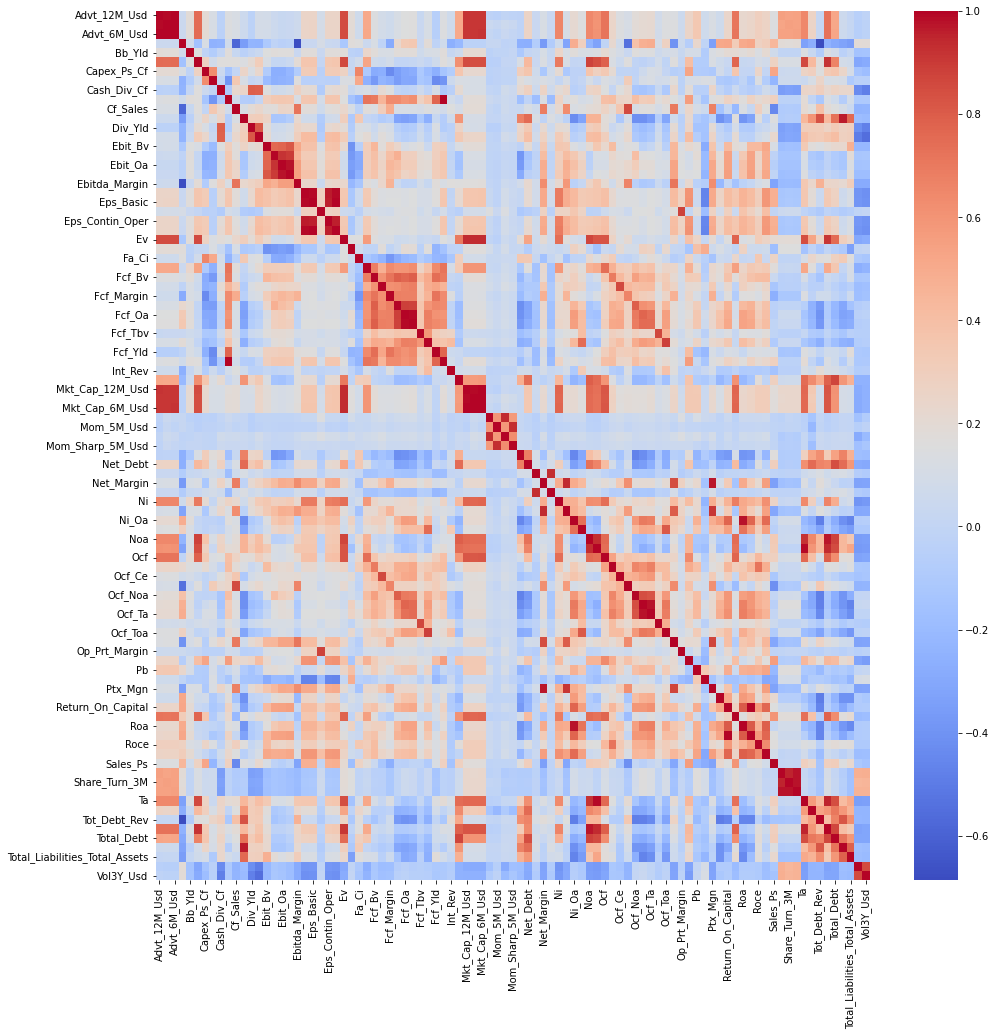

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
sns.heatmap(training_sample[features].corr(), cmap='coolwarm')
plt.show()

The graph of Figure 15.1 reveals several hot squares around the diagonal. These local correlation patterns occur several times in the dataset and explain why it is not a good idea to use simple regression with this set of features.

In full disclosure, **multicollinearity** (when predictors are correlated) can be *much less a problem* for ML tools than it is for pure statistical inference. In statistics, one central goal is to study the properties of $\beta$ coefficients. Collinearity perturbs this kind of analysis. In machine learning, the aim is to maximize out-of-sample accuracy. If having many predictors can be helpful, then so be it. What does matter is that the large spectrum of features helps improve the generalization ability of the model. Their collinearity is irrelevant.

In the remainder of the chapter, we present two approaches that help reduce the number of predictors:

- The first one aims at *creating new variables* uncorrelated with each other but sacrifices interpretablity;
- The second one gathers predictors into *homogeneous clusters* and only one feature should be chosen out of this cluster. Here the rationale is reversed: interpretability is favored over statistical properties because the resulting set of features may still include high correlations.

## Principal Component Analysis (PCA) and Autoencoders

The first method is a cornerstone in *dimensionality reduction*. It seeks to determine a smaller number of factors $(K'<K)$ such that:

- i) The level of explanatory power remains as high as possible;
- ii) The resulting factors are linear combinations of the original variables;
- iii) The resulting factors are orthogonal.

### A bit of algebra

We work with matrices for the derivation of PCA. An $I \times K$ matrix $\textbf{X}$ is orthonormal if $I>K$ and $\textbf{X}'\textbf{X}=\textbf{I}_K$. When $I=K$, the (square) matrix is called orthogonal and $\textbf{X}'\textbf{X}=\textbf{X}\textbf{X}'=\textbf{I}_K$, i.e., $\textbf{X}^{-1}=\textbf{X}'$.

One foundational result in matrix theory is the *Singular Value Decomposition* (SVD, see, e.g., chapter 5 in Meyer (2000)). The SVD is formulated as follows: any $I\times K$ matrix $\textbf{X}$ can be decomposed into $$\textbf{X}=\textbf{U}\boldsymbol{\Delta}\textbf{V}'$$
where $\textbf{U}(I\times I)$ and $\textbf{V}(K\times K)$ are orthogonal and $\boldsymbol{\Delta} (I\times K)$ is diagonal ($\Delta_{i,k}=0$ whenever $i=k$). In addition, $\Delta_{i,i}\geq 0$: the diagonal terms of $\boldsymbol{\Delta}$ are non-negative.

For simplicity, we assume below that $\textbf{1}_I'\textbf{X}=\textbf{0}_K'$, i.e., that all columns have zero sum (and hence zero mean).[^1] This allows to write that the covariance matrix is equal to its sample estimate $\boldsymbol{\Sigma}_X=\frac{1}{I-1} \textbf{X}'\textbf{X}$.

One crucial feature of covariance matrices is their symmetry. Indeed, real-valued symmetric (square) matrices enjoy a SVD which is much more powerful: when $\textbf{X}$ is symmetric, there exist an orthogonal matrix $\textbf{Q}$ and a diagonal matrix $\textbf{D}$ such that
$$\textbf{X}=\textbf{Q}\textbf{DQ}'$$
This process is called **diagonalization** (see chapter 7 in Meyer (2000)) and conveniently applies to covariance matrices.

[^1]: In practice, this is not a major problem; since we work with features that are uniformly distributed, de-meaning amounts to remove 0.5 to all feature values.

### PCA

The goal of PCA is to build a dataset $\tilde{\textbf{X}}$ that has fewer columns but that keeps as much information as possible when compressing the original one $\textbf{X}$. The key notion is the **change of base**, which is a linear transformation of $\textbf{X}$ into $\textbf{Z}$, a matrix with identical dimension, via $$\textbf{Z}=\textbf{XP}$$
where $\textbf{P}$ is a $K\times K$ matrix. There are of course an infinite number of ways to transform $\textbf{X}$ into $\textbf{Z}$, but two fundamental constraints help reduce the possibilities:

- The first constraint is that the columns of $\textbf{Z}$ be *uncorrelated*: they tell different stories and have zero redundancy.
- The second constraint is that the *variance* of the columns of $\textbf{Z}$ is highly *concentrated*. This means that a few factors (columns) will capture most of the explanatory power (signal), while most (the others) will consist predominantly of noise. 

All of this is coded in the covariance matrix of $\textbf{Y}$:

- The first condition imposes that the covariance matrix be *diagonal*;
- The second condition imposes that the diagonal elements, when ranked in decreasing magnitude, see their value decline (sharply if possible).

The covariance matrix of $\textbf{Z}$ is $$\boldsymbol{\Sigma}_Y=\frac{1}{I-1}\textbf{Z}'\textbf{Z}=\frac{1}{I-1}\textbf{P}'\textbf{X}'\textbf{XP}=\frac{1}{I-1}\textbf{P}'\boldsymbol{\Sigma}_X\textbf{P}$$
In this expression, we plug the decomposition of $\boldsymbol{\Sigma}_X$:
$$\boldsymbol{\Sigma}_Y=\frac{1}{I-1}\textbf{P}'\textbf{Q}\textbf{DQ}'\textbf{P}$$
thus picking $\textbf{P}=\textbf{Q}$, we get, by orthogonality, $\boldsymbol{\Sigma}_Y=\frac{1}{I-1}\textbf{D}$, that is, a diagonal covariance matrix for $\textbf{Z}$. The columns of $\textbf{Z}$ can then be re-shuffled in decreasing order of variance so that the diagonal elements of $\boldsymbol{\Sigma}_Y$ progressively shrink. This is useful because it helps locate the factors with most informational content (the first factors). In the limit, a constant vector (with zero variance) carries no signal.

The matrix $\textbf{Z}$ is a linear transformation of $\textbf{X}$, thus, it is expected to carry the same information, even though this information is coded differently. Since the columns are ordered according to their relative important, it is simple to omit some of them. The new set of features $\tilde{\textbf{X}}$ consists in the first $K'$ (with $K'<K$) columns of $\textbf{Z}$.

Below, we show how to perform PCA and visualize the output with the `sklearn` package. To ease readability, we use the smaller sample with few predictors.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(training_sample[features_short])
print("Explained variances ratios:")
print(pca.explained_variance_ratio_)

pd.DataFrame(pca.components_.T, index=features_short, columns=['PC' + str(i) for i in range(1, len(features_short) + 1)])

Explained variances ratios:
[0.35718238 0.1940806  0.15561321 0.10434453 0.09601422 0.07017118
 0.02259388]


PC1       PC2       PC3       PC4       PC5       PC6   
Div_Yld         -0.271599  0.579099  0.045725 -0.528956  0.226626  0.506566  \
Eps             -0.420407  0.150082 -0.024767  0.337373 -0.771377  0.301883   
Mkt_Cap_12M_Usd -0.523868 -0.343239  0.172289  0.062495  0.252781  0.002987   
Mom_11M_Usd     -0.047238 -0.057714 -0.897160  0.241015  0.250559  0.258477   
Ocf             -0.532947 -0.195890  0.185039  0.234371  0.357596  0.049015   
Pb              -0.152413 -0.580806 -0.221048 -0.682136 -0.308665  0.038675   
Vol1Y_Usd        0.406890 -0.381139  0.282162  0.155411  0.061575  0.762588   

                      PC7  
Div_Yld          0.032012  
Eps              0.011965  
Mkt_Cap_12M_Usd  0.714319  
Mom_11M_Usd      0.043179  
Ocf             -0.676866  
Pb              -0.168799  
Vol1Y_Usd        0.008632

The rotation gives the matrix $\mathbb{P}$: it's the tool that changes the base. The first row of the output indicates that the standard deviation of each new factor (column). Each factor is indicated via a PC index (principal component). Often, the first PC loads positively (or simutaneously negatively) on all initial features: a convex weighted average of all predictors is expected to carry a lot of information. The second PC is an arbitrage between price-to-book and dividend yield. The third is contrarian as it loads heavily (and negatively) on momentum. Not all principal components are easy to interpret.

Sometimes, it can be useful to visualize the way the principal components are built. In the following Figure 15.2, we show one popular representation that is used for two factors (usually the first two) with the aid of the python package `pca`.

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


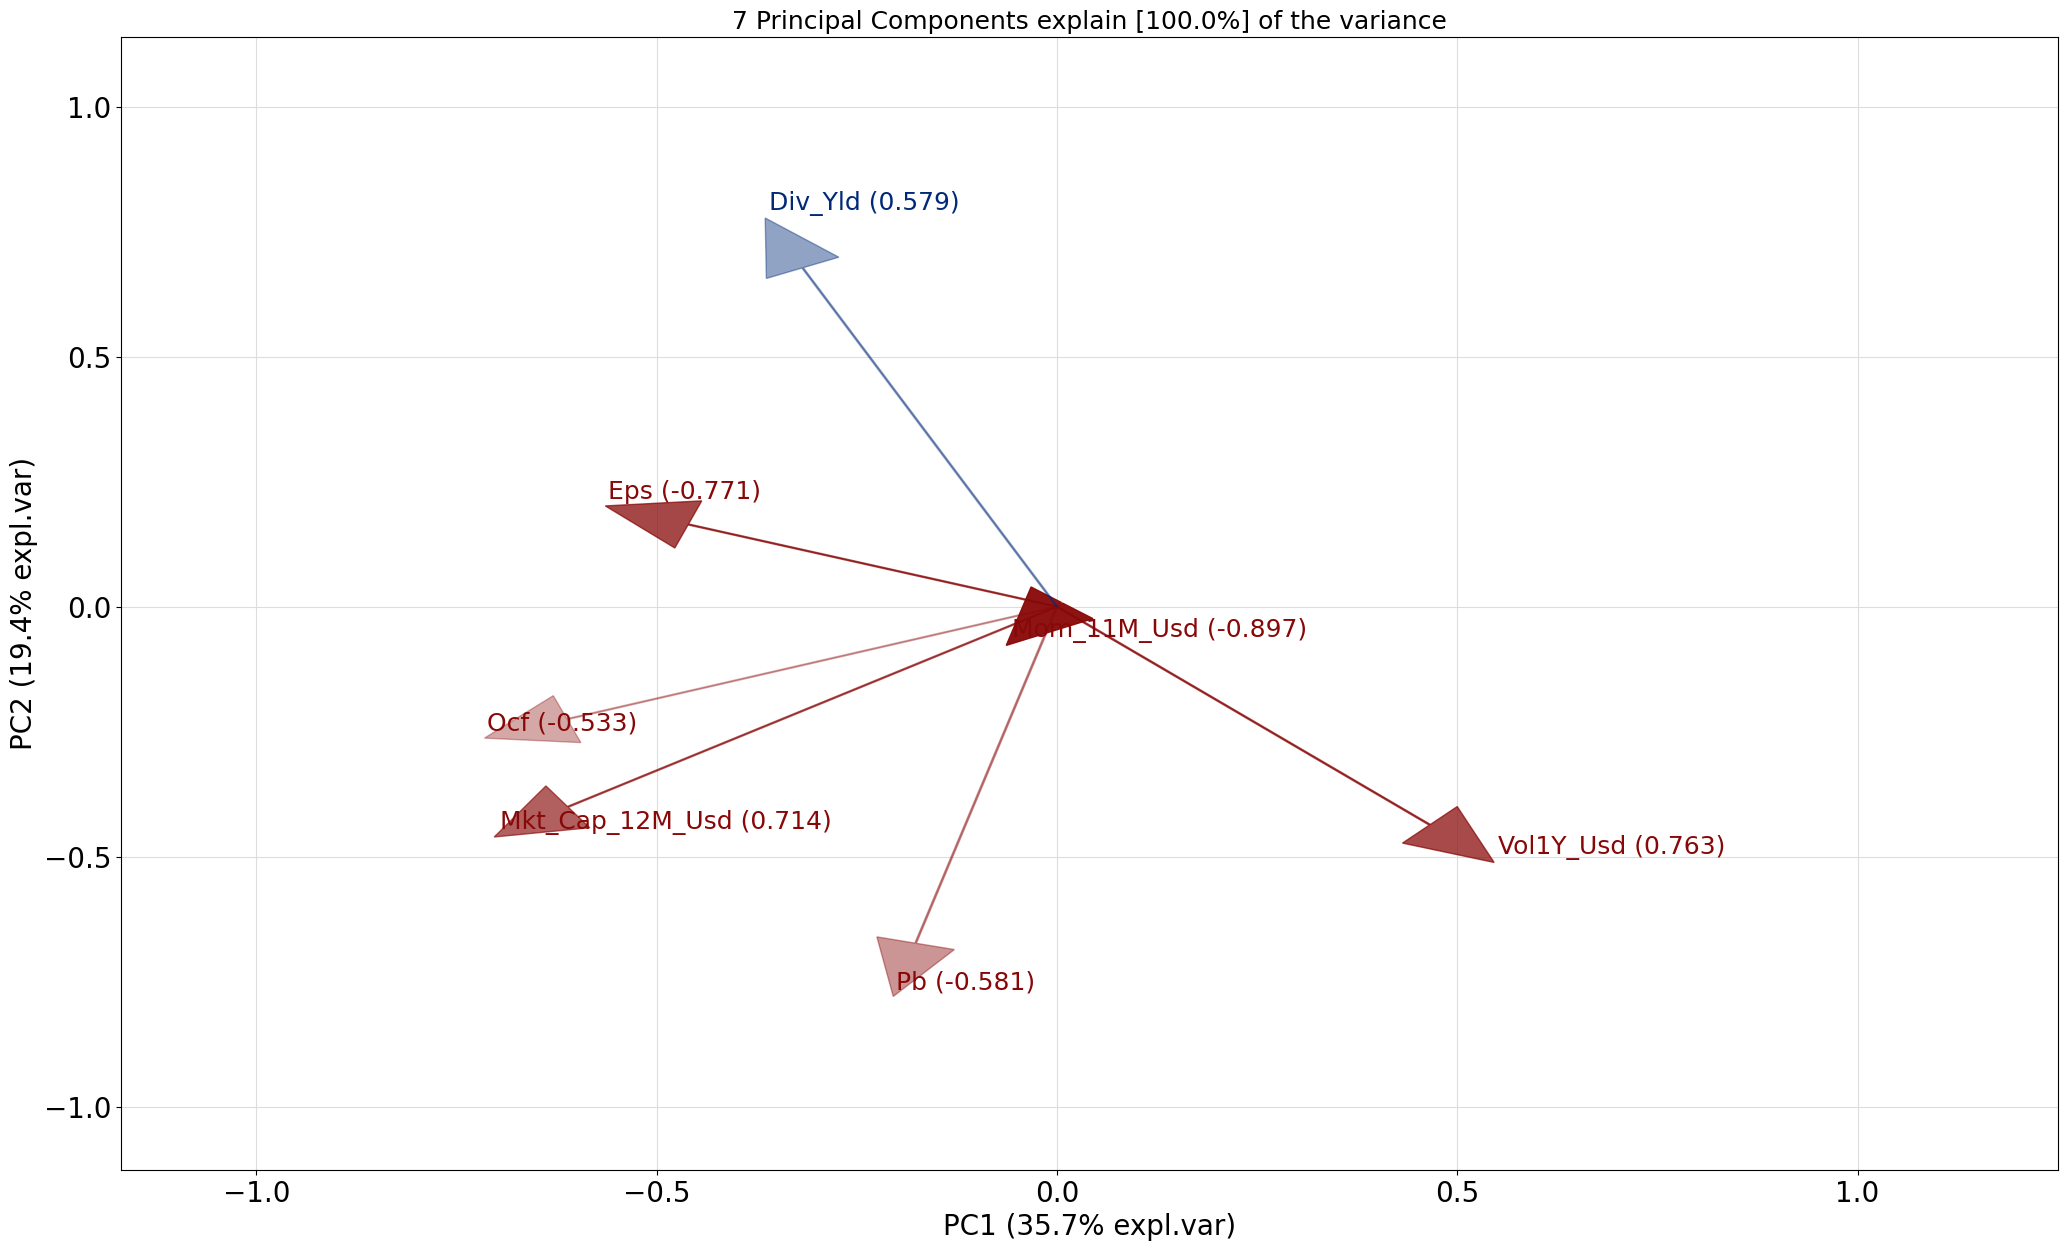

In [ ]:
from pca import pca

fit_pca = pca(n_components=7)
fit_pca.fit_transform(training_sample[features_short])

fit_pca.biplot(n_feat=7, PC=[0, 1], cmap=None)
plt.show()

The numbers indicated along the axes are the proportion of explained variance of each PC. Compared to the figures in the first line of the output, the numbers are squared and then divided by the total sum of squares.

Once the rotation is known, it is possible to select a subsample of the transformed data. From the original 7 features, it is easy to pick just 4.

In [ ]:
from sklearn.decomposition import PCA

fit_pca_sklearn = PCA()
fit_pca_sklearn.fit(training_sample[features_short])
pd.DataFrame(np.dot(training_sample[features_short], fit_pca_sklearn.components_.T[:, :4]), columns=['PC1', 'PC2', 'PC3', 'PC4']).head()

PC1       PC2       PC3       PC4
0 -0.398967 -0.757813 -0.139152  0.313258
1 -0.428470 -0.758727 -0.401643  0.374525
2 -0.521530 -0.567912 -0.105339  0.257495
3 -0.544536 -0.533562 -0.088339  0.228179
4 -0.567264 -0.533975 -0.060924  0.232094

These 4 factors can then be used as orthogonal features in any ML engine. The fact that the features are *uncorrelated* is undoubtedly an asset. But the price of this convenience is high: the features are no longer immediately interpretable. De-correlating the predictors adds yet another layer of “blackbox-ing” in the algorithm.

PCA can also be used to estimate factor models. In $\textbf{Z}=\textbf{XP}$, it suffices to replace $\textbf{Z}$ with returns, $\textbf{X}$ with factor values and $\textbf{P}$ with factor loadings. Most recently, Lettau and Pelger (2020a) and Lettau and Pelger (2020b) propose a thorough analysis of PCA estimation techniques. They notably argue that first moments of returns are important and should be included in the objective function, alongside the optimization on the second moments.

We end this subsection with a technical note. Usually, PCA is performed on the *covariance* matrix of returns. Sometimes, it may be preferable to decompose the **correlation** matrix. The result may adjust substantially if the variables have very different variances (which is not really the case in the equity space). If the investment universe encompasses several asset classes, then a correlation-based PCA will reduce the importance of the most volatile class. In this case, it is as if all returns are scaled by their respective volatilities.

### Autoencoders

In PCA, the coding from $\textbf{X}$ to $\textbf{Z}$ is straightforward, linear and works in both ways:
$$\textbf{Z}=\textbf{X}\textbf{P} \quad \text{and} \quad \textbf{X}=\textbf{YP}'$$
so that we recover $\textbf{X}$ from $\textbf{Z}$. This can be written differently:
$$\textbf{X} \quad \overset{\text{encode via }\textbf{P}}{\longrightarrow} \quad \textbf{Z} \quad \overset{\text{decode via } \textbf{P}'}{\longrightarrow} \quad \textbf{X}$$
If we take the truncated version and seek a smaller output (with only $K'$ columns), this gives
$$\textbf{X}, \ (I\times K) \quad \overset{\text{encode via }\textbf{P}_{K'}}{\longrightarrow} \quad \tilde{\textbf{X}}, \ (I \times K') \quad \overset{\text{decode via } \textbf{P}'_{K'}}{\longrightarrow} \quad \breve{\textbf{X}},\ (I \times K)$$
where $\textbf{P}_{K'}$ is the restriction of $\textbf{P}$ to the $K'$ columns that correspond to the factors with the largest variances. The dimensions of matrices are indicated inside the brackets. In this case, the recoding cannot recover $\textbf{P}$ exactly but only an approximation, which we write $\breve{\textbf{X}}$. This approximation is coded with less information, hence this new data $\breve{\textbf{X}}$ is *compressed* and provides a parsimonious representation of the original sample $\textbf{X}$.

An autoencoder generalizes this concept to nonlinear coding functions. Simple linear autoencoders are linked to latent factor models (see Proposition 1 in for the case of single layer autoencoders.) The scheme is the following
$$\textbf{X},\ (I\times K) \quad \overset{\text{encode via } N} {\longrightarrow} \quad \tilde{\textbf{X}}=N(\textbf{X}), \ (I \times K') \quad \overset{\text{decode via } N'}{\longrightarrow} \quad \breve{\textbf{X}}=N'(\tilde{\textbf{X}}), \ (I \times K)$$
where the encoding and decoding functions $N$ and $N'$ are often taken to be neural networks. The term **autoencoder** comes from the fact that the target output, which we often write $\textbf{Z}$ is the original sample $\textbf{X}$. Thus, the algorithm seeks to determine the function that *minimizes the distance* (to be defined) between $\textbf{X}$ and output value $\breve{\textbf{X}}$. The encoder generates an alternative representation of $\textbf{X}$, whereas the decoder tries to recode it back to its original values. Naturally, the intermediate (coded version) $\breve{\textbf{X}}$ is targeted to have a smaller dimension compared to $\textbf{X}$.

### Application

Autoencoders are easy to code in `Keras` (see Chapter 7 for more details). We will use the functional API to code a NN. For simplicity, we work with the small number of predictors (7). The structure of the network consists of two symmetric networks with only one intermediate layer containing 32 units. The activation function is sigmoid; this makes sense since the input has values in the unit interval.

In [25]:
from keras.layers import Input, Dense
from keras.models import Model
import keras.backend as K

input_layer = Input(shape=(7, ))
x = input_layer
x = Dense(32, activation='sigmoid')(x)
encoder = Dense(4)(x)

encoder = Dense(32, activation='sigmoid')(encoder)
decoder = Dense(7)(encoder)

model = Model(inputs=input_layer, outputs=decoder)
model.compile(
    loss='mse', 
    optimizer='Adam',
    metrics=['mae']
)

In the training part, we optimize the MSE and use an Adam update of the weights. 

Finally, we are ready to train the data onto itself! The evolution of loss on the training and testing samples is depicted in the following figure. The decreasing pattern shows the progress of the quality in compression.

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
 dense_2 (Dense)             (None, 32)                160       
                                                                 
 dense_3 (Dense)             (None, 7)                 231       
                                                                 
Total params: 779
Trainable params: 779
Non-trainable params: 0
_________________________________________________________________


In [26]:
from plot_keras_history import plot_history

fit_ae = model.fit(
    training_sample[features_short],
    training_sample[features_short],
    epochs=15, batch_size=512,
    validation_data=(
        test_sample[features_short], 
        test_sample[features_short]
    )
)

Epoch 1/15
387/387 [==============================] - 4s 4ms/step - loss: 0.0796 - mae: 0.2346 - val_loss: 0.0471 - val_mae: 0.1740
Epoch 2/15
387/387 [==============================] - 1s 3ms/step - loss: 0.0333 - mae: 0.1411 - val_loss: 0.0257 - val_mae: 0.1225
Epoch 3/15
387/387 [==============================] - 2s 4ms/step - loss: 0.0206 - mae: 0.1076 - val_loss: 0.0179 - val_mae: 0.0995
Epoch 4/15
387/387 [==============================] - 2s 4ms/step - loss: 0.0170 - mae: 0.0969 - val_loss: 0.0168 - val_mae: 0.0961
Epoch 5/15
387/387 [==============================] - 2s 4ms/step - loss: 0.0163 - mae: 0.0938 - val_loss: 0.0164 - val_mae: 0.0932
Epoch 6/15
387/387 [==============================] - 2s 4ms/step - loss: 0.0161 - mae: 0.0917 - val_loss: 0.0163 - val_mae: 0.0914
Epoch 7/15
387/387 [==============================] - 1s 4ms/step - loss: 0.0160 - mae: 0.0903 - val_loss: 0.0162 - val_mae: 0.0902
Epoch 8/15
387/387 [==============================] - 1s 3ms/step - loss: 0.

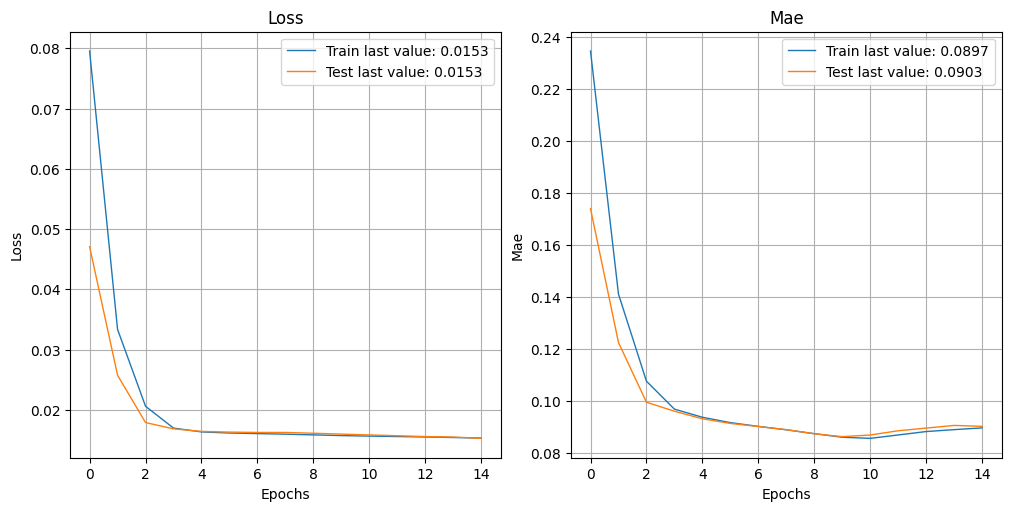

In [27]:
from plot_keras_history import show_history
show_history(fit_ae)

In order to get the details of all weights and biases, the syntax is the following.

In [28]:
ae_weights = model.get_weights()

Retrieving the encoder and processing the data into the compressed format is just a matter of matrix manipulation. In practice, it is possible to build a submodel by loading the weights from the encoder (see exercise below).

## Clustering via K-means

The second family of unsupervised tools pertains to *clustering*. Features are grouped into homogeneous families of predictors. It is then possible to single out one among the group (or to create a synthetic average of all of them). Mechanically, the number of predictors is reduced.

The principle is simple: among a group of variables (the reasoning would be the same for observations in the other dimension) $\textbf{x}_{1\leq j \leq J}$, find the combination of $k<J$ groups that minimize
$$\sum_{i=1}^k\sum_{\textbf{x}\in S_i}||\textbf{x}-\textbf{m}_i||^2$$
where $||\cdot||$ is some norm which is usually taken to be the Euclidean $l^2$-norm. The $S_i$ are the groups and the minimization is run on the whole set of groups $\textbf{S}$. The $\textbf{m}_i$ are the group means (also called *centroids* or *barycenters*): $\textbf{m}_i=(\text{card}(S_i))^{-1}\sum_{\textbf{x}\in S_i}\textbf{x}$.

In order to ensure optimality, all possible arrangements must be tested, which is prohibitively long when $k$ and $J$ are large. Therefore, the problem is usually solved with greedy algorithms that seek (and find) solutions that are not optimal but 'good enough'.

One heuristic way to proceed is the following:

1. Start with a (possibly random) partition of $k$ clusters.
2. For each cluster, compute the optimal mean values $\textbf{m}_i^*$ that minimizes expression. This is a simple quadratic program.
3. Given the optimal centers $\textbf{m}_i^*$, reassign the points $\textbf{x}_i$ so that they are all the closest to their center.
4. Repeat steps 2. and 3. until the points do not change cluster at step 3.
   
Below, we illustrate this process with an example. From all 93 features, we build 10 clusters.

In [9]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=10, n_init='auto')
k_means.fit(training_sample[features].T)

clusters = pd.DataFrame([features, k_means.labels_], index=["factor", "cluster"]).T
clusters[clusters['cluster'] == 2]

factor cluster
3                   Asset_Turnover       2
21                    Eps_Basic_Gr       2
25                       Ev_Ebitda       2
54                           Ni_Oa       2
68                   Op_Prt_Margin       2
70                              Pb       2
73  Recurring_Earning_Total_Assets       2
74               Return_On_Capital       2
76                             Roa       2
77                             Roc       2
78                            Roce       2
79                             Roe       2

We single out the fourth cluster which is composed mainly of accounting ratios related mainly to EPS. Given these 10 clusters, we can build a much smaller group of features that can then be fed to the predictive engines described in Chapters 5 to 9. The representative of a cluster can be the member that is closest to the center, or simply the center itself. This pre-processing step can nonetheless cause problems in the forecasting phase. Typically, it requires that the training data be also clustered. The extension to the testing data is not straightforward (the clusters may not be the same).

## Nearest Neighbors

To the best of our knowledge, nearest neighbors are *not* used in large-scale portfolio choice applications. The reason is simple: *computational cost*. Nonetheless, the concept of neighbors is widespread in unsupervised learning and can be used locally in complement to interpretability tools. Theoretical results on k-NN relating to bounds for error rates on classification tasks can be found in section 6.2 of Ripley (2007). The rationale is the following. If:

1. The training sample is able to accurately span the distribution of $(\textbf{y},\textbf{X})$; **and**
2. The testing sample follows the *same* distribution as the training sample (or close enough);

Then the neighbourhood of one instance $\textbf{x}_i$ from the testing featreus computed on the training sample will yield valuable information on $y_i$.

In what follows, we thus seek to find neighbors of one particular instance $\textbf{x}_i$ (a $K$-dimensional row vector). Note that there is a major difference with the previous section: the clustering is intended at the *observation* level (row) and not at the predictor level (column).

Given a dataset with the same (corresponding) columns $\textbf{X}_{i,k}$, the neighbors are defined via a similarity measure (or distance)
$$D(\textbf{x}_j,\textbf{x}_i)=\sum_{k=1}^Kc_k d_k(x_{j,k},x_{i,k})$$
where the distance functions $d_k$ can operate on various data types (numerical, categorical, etc.). For numerical values, $d_k(x_{j,k}, x_{i,k})=(x_{j,k}-x_{i,k})^2$ or $d_k(x_{j,k}, x_{i,k})=|x_{j,k}-x_{i,k}|$. For categorical values, we refer to  the exhaustive survey by Boriah, Chandola, and Kumar (2008) which lists 14 possible measures. Finally the $c_k$ allow some flexibility by weighting measures. This is useful because both raw values ($x_{i,k}$ versus $x_{i,k'}$) or measure outputs ($d_k$ versus $d_{k'}$) can have different scales.

Once the distances are computed over the whole sample, they are ranked using indices $l_1^i,\dots,l_I^i$:
$$D\left(\textbf{x}_{l_1^i},\textbf{x}_i\right) \le D\left(\textbf{x}_{l_2^i},\textbf{x}_i\right) \le \dots, \le D\left(\textbf{x}_{l_I^i},\textbf{x}_i\right)$$

The nearest neighbors are those indexed by $l_m^i$ for $m=1,\dots,k$. We leave out the case when there are problematic equalities of the type $D\left(\textbf{x}_{l_m^i},\textbf{x}_i\right)=D\left(\textbf{x}_{l_{m+1}^i},\textbf{x}_i\right)$ for the sake of simplicity and because they rarely occur in practice as long as there are sufficiently many numerical predictors.

Given these neighbors, it is now possible to build a prediction for the label side $y_i$. The rationale is straightforward: if $\textbf{x}_i$ is close to other instances $\textbf{x}_j$, then the label value $y_i$ should also be close to $y_j$ (under the assumption that the features carry some predictive information over the label $y$).

An intuitive prediction for $y_i$ is the following weighted average:
$$\hat{y}_i=\frac{\sum_{j\neq i} h(D(\textbf{x}_j,\textbf{x}_i)) y_j}{\sum_{j\neq i} h(D(\textbf{x}_j,\textbf{x}_i))}$$
where $h$ is a decreasing function. Thus, the further $\textbf{x}_j$ is from $\textbf{x}_i$, the smaller the weight in the average. A typical choice is $h(z)=e^{-az}$ for some parameter $a>0$ that determines how penalizing the distance $D(\textbf{x}_j,\textbf{x}_i)$ is. Of course, the average can be taken in the set of $k$ nearest neighbors, in which case the $h$ is equal to zero beyond a particular distance threshold:
$$\hat{y}_i=\frac{\sum_{j \text{ neighbor}} h(D(\textbf{x}_j,\textbf{x}_i)) y_j}{\sum_{j \text{ neighbor}} h(D(\textbf{x}_j,\textbf{x}_i))}$$
A more agnostic rule is to take $h:=1$ over the set of neighbors and in this case, all neighbors have the same weight. For classification tasks, the procedure involves a voting rule whereby the class with the most votes wins the contest, with possible tie-breaking methods. The interested reader can have a look at the short survey in Bhatia et al. (2010).

For the choice of optimal $k$, several complicated techniques and criteria exist (see, e.g., Ghosh (2006) and Hall et al. (2008)). Heuristic values often do the job pretty well. A rule of thumb is that $k=\sqrt{I}$ ($I$ being the total number of instances) is not too far from the optimal value, unless $I$ is exceedingly large.

Below, we illustrate this concept. We pick one date (31th of December 2006) and single out one asset (with stock_id equal to 13). We then seek to find the $k=30$ stocks that are the closest to this asset at this particular date. We will continue to resort to the `sklearn` package. 

In [10]:
from sklearn.neighbors import NearestNeighbors

knn_data = data_ml[data_ml['date'] == '2006-12-31']
knn_target = knn_data[knn_data['stock_id'] == 13][features]
knn_sample = knn_data[knn_data['stock_id'] != 13][features]
neighbors = NearestNeighbors(n_neighbors=30, n_jobs=-1)
neighbors.fit(knn_sample)

NearestNeighbors(n_jobs=-1, n_neighbors=30)

In [12]:
neighbors.kneighbors(knn_target, 30)[1][0]

array([ 904,  875,  729,  547, 1035,  500,  334,  116,  788,   53,  617,
        129,  341,  359,  672,  152,  264,  857,  829,  285, 1149,  165,
        945,  191,  339,  161,  950,  375,  784,    1], dtype=int64)

Once the neighbors and distances are known, we can compute a prediction for the return of the target stock. We use the function $h(z)=e^{-z}$ for the weighting of instances.

In [15]:
from sklearn.neighbors import KNeighborsRegressor

weights_function = lambda x: np.exp(-x)
fit_knn_regressor = KNeighborsRegressor(30, weights=weights_function)
fit_knn_regressor.fit(knn_sample, knn_data[knn_data['stock_id'] != 13]['R1M_Usd'])

KNeighborsRegressor(n_neighbors=30,
                    weights=<function <lambda> at 0x00000222ADA2A8C0>)

In [19]:
fit_knn_regressor.predict(knn_target)[0], knn_data[knn_data['stock_id'] == 13]['R1M_Usd'].values[0]

(0.03636731312624231, 0.089)

The prediction is neither very good, nor very bad (the sign is correct!). However, note that this example cannot be used for predictive purposes because we use data from 2006-12-31 to predict a return at the same date. In order to avoid the forward-looking bias, the `knn_sample` variable should be chosen from a prior point in time.

The above computations are fast (a handful of seconds at most), but hold for only one asset. In a $k$-NN exercise, each stock gets a customed prediction and the set of neighbors must be re-assessed each time. For $N$ assets, $N(N-1)/2$ distances must be evaluated. This is particularly *costly* in a backtest, especially when several parameters can be tested (the number of neighbors $k$ or $a$ in the weighting function $h(z)=e^{-az}$). When the investment universe is small (when trading indices for instance), $k$-NN methods become computationally attractive (see for instance Chen and Hao (2017)).

## Coding Exercise

Code the compressed version of the data (narrow training sample) via the encoder part of the autoencoder.

In [29]:
model.save_weights('./models/autoencoder_weights.h5')

In [30]:
encoder_model = Model(inputs=input_layer, outputs=encoder)
encoder_model.load_weights('./models/autoencoder_weights.h5', skip_mismatch=True, by_name=True)
encoder_model.compile(
    loss='mse',
    optimizer='Adam',
    metrics=['mae']
)

In [31]:
encoder_model.predict_on_batch(training_sample[features_short])

array([[0.32461667, 0.69813424, 0.48692712, ..., 0.10308014, 0.41212717,
        0.59466714],
       [0.3481856 , 0.6648091 , 0.45105785, ..., 0.06401528, 0.43180168,
        0.6072334 ],
       [0.38025203, 0.6507643 , 0.48428643, ..., 0.14395556, 0.38990664,
        0.56758124],
       ...,
       [0.41130975, 0.5508394 , 0.49103728, ..., 0.1727788 , 0.5677421 ,
        0.54895216],
       [0.39041862, 0.5650211 , 0.4949579 , ..., 0.10555072, 0.57148325,
        0.5646937 ],
       [0.40988845, 0.5447226 , 0.49742228, ..., 0.12064968, 0.5698912 ,
        0.5538498 ]], dtype=float32)

## Takeaways

*Unsupervised learning*: no label specification and simply tries to make sense of $\textbf{X}$ on its own.

- The problem with correlated predictors
  - For linear regression: 'arbitrage' between features
  - For ML tools, **multicollinearity** is not a serious problem since statistical inference is not required but out-of-sample accuracy is pursued.
- Principal Component Analysis (PCA) and Autoencoders
  - PCA has 3 characteristics
    1. Results have *high explanation power*;
    2. Results are *linear combinations* of the original features;
    3. Results are *orthogonal*.
  - Definitions for orthogonal, SVD and **diagonalization** for symmetric square matrices
  - PCA: find a matrix $\textbf{Z}=\textbf{XP}$ with uncorrelated columns and concentrated variances (columns reshuffled for the most informational principle components)
  - PCA can add the '*blackboxing*' in the algorithm
  - PCA can also be applied to estimate factor models
  - Usually performed on the **covariance** matrix, but if volatilities are omitted, **correlation** matrix can be used
  - Autoencoders: **nonlinear** coding functions to *compress* data into an alternative representation with most information
- Clustering via K-means
  - To reduce the number of predictors
  - Find a combination of a smaller number of groups that minimize the total sum of distances to the cluster center
  - A greedy algorithm might be used to find 'good enough' solutions
  - EM algorihm, iteratively
- Nearest Neighbors
  - Usually not used in large-scale portfolio choice applications for high computational cost
  - Neighbors are defined via a similarity measure and a (weighted) average of distances
  - Use nearest neighbors for prediction (a weighted average of the labels for the NNs)
  - Weight function: $h(z):=1$ or $h(z)=e^{-az}$
  - Choices for $k$: a rule of thumb for $k=\sqrt{I}$ (number of instances)
  - Usage recommendation: small universe

# Reinforcement Learning

Due to its increasing popularity within the Machine Learning community, we dedicate a chapter to reinforcement learning (RL). In 2022 only, more than 148 papers dedicated to RL have been submitted to (or updated on) arXiv under the **q:fin** (quantitative finance) classification. Moreover, an early survey of RL-based portfolios is compiled in Sato (2019) (see also Zhang, Zohren, and Roberts (2020)) and general financial applications are discussed in Kolm and Ritter (2019b), Meng and Khushi (2019), Charpentier, Elie, and Remlinger (2020) and Mosavi et al. (2020). This shows that RL has recently gained traction among the quantitative finance community.

While RL is a framework much more than a particular algorithm, its efficient application in portfolio management is not straightforward, as we will show.

## Theoretical Layout

### General Framework

In this section, we introduce the core concepts of RL and follow relatively closely the notations (and layout) of Sutton and Barto (2018), which is widely considered as a solid reference in the field, along with Bertsekas (2017). One central tool in the field is called the **Markov Decision Process** (**MDP**, see Chapter 3 in Sutton and Barto (2018)).

MDPs, like all RL frameworks, involve the interaction between an **agent** (e.g., a trader or portfolio manager) and an **environment** (e.g., a financial market). The agent performs **actions** that may alter the state of environment and gets a reward (possibly negative) for each action. This short sequence can be repeated an arbitrary number of times, as is shown in Figure 16.1.

![FIGURE 16.1: Scheme of Markov Decision Process. R, S and A stand for reward, state and action, respectively.](images/figure16-1.png)

Given initialized values for the state of the environments ($S_0$) and reward (usually $R_0=0$), the agent performs an action (e.g., invests in some assets). This generates a reward $R_1$ (e.g., returns, profits, Sharpe Ratio) and also a future state of the environment ($S_1$). Based on that, the agent performs a new action and the sequence continues. When the sets of states, actions and rewards are finite, the MDP is logically called *finite*. In a financial framework, this is somewhat unrealistic and we discuss this issue later on. It nevertheless is not hard to think of simplified and discretized financial problems. For instance, the reward can be binary: win money versus lose money. In the case of only one asset, the action can also be dual: investing versus not investing. When the number of assets is sufficiently small, it is possible to set fixed proportions that lead to a reasonable number of combinations of portfolio choices, etc.

We pursue our exposé with *finite* MDPs; they are the most common in the literature and their formal treatment is simpler. The relative simplicity of MDPs helps grasp the concepts that are common to other RL techniques. As is often the case with Markovian objects, the key notion is that of transition probability:
$$p(s',r|s,a)=\mathbb{P}\left[S_t=s',R_t=r | S_{t-1}=s,A_{t-1}=a \right]$$
which is the probability of reaching state $s'$ and reward $r$ and time $t$, conditionally on being in state $s$ and performing action $a$ at time $t-1$. The finite sets of states and actions will be denoted with $\mathcal{S}$ and $\mathcal{A}$ henceforth. Sometimes, this probability is averaged over the set of rewards which gives the following decomposition:
\begin{align*}
\sum_r rp(s',r|s,a)&=\mathcal{P}_{ss}^a \mathcal{R}_{ss}^a, \quad \text{where}\\
\mathcal{P}_{ss}^a &=\mathbb{P}[S_t=s'|S_{t-1}=s,A_{t-1}=a], \quad \text{and}\\
\mathcal{R}_{ss}^a &=\mathbb{E}[R_t|S_{t-1}=s,S_t=s',A_{t-1}=a].
\end{align*}
The goal of the agent is to maximize some function of the stream of rewards. This gain is usually defined as 
\begin{align*}
G_t&=\sum_{k=0}^T\gamma^kR_{t+k+1}\\
&=R_{t+1} +\gamma G_{t+1},
\end{align*}
i.e., it is a *discounted* version of the reward, where the discount factor is $\gamma \in (0,1]$. The horizon $T$ may be infinite, which is why $\gamma$ was originally introduced. Assuming the rewards are bounded, the infinite sum may diverge for $\gamma=1$. This is the case if rewards don't decrease with time and there is no reason why they should. When $\gamma<1$ and rewards are bounded, convergence is assured. When $T$ is finite, the task is called *episodic* and, otherwise, it is said to be *continuous*.

In RL, the focal unknown to be optimized or learned is the **policy** $\pi$, which drives the actions of the agent. More precisely, $\pi(a,s)=\mathbb{P}[A_t=a|S_t=s]$, that is $\pi$ equals the probability of taking action $a$ if the state of the environment is $s$. This means that actions are subject to randomness, just like for *mixed strategies* in game theory. While this may seem disappointing because an investor would want to be sure to take the best action, it is also a good reminder that the best way to face random outcomes may well be to randomize actions as well.

Finally, in order to tty to deterimine the *best* policy, one key indicator is the so-called *value* function:
$$v_{\pi}(s)=\mathbb{E}_{\pi}[G_t|S_t=s]$$
where the time index $t$ is not very relevent and omitted in the notation of the function. The index $\pi$ under the expectation operator $\mathbb{E}[\cdot]$ simply indicates that the average is taken when the policy $\pi$ is enforced. The value function is simply equal to the average gain conditionally on the state being equal to $s$. In financial terms, this is equivalent to the average profit if the agent takes actions driven by $\pi$ when the market environment is $s$. More generally, it is also possible to condition not only on the state, but also on the action taken. We thus introduce the $q_{\pi}$ *action-value function*:
$$q_{\pi}(s,a)=\mathbb{E}_{\pi}[G_t|S_t=s,A_t=a]$$
The $q_{\pi}$ function is highly important because it gives the average gain when the state and action are fixed. Hence, if the current state is known, then one obvious choice is to select the action for which $q_{\pi}(s,\cdot)$ is the highest. Of course, this is the best solution if the optimal value of $q_{\pi}$ is known, which is not always the case in practice. The value function can easily be accessed via $q_{\pi}: v_\pi(s)=\sum_a \pi(a,s)q_{\pi}(s,a)$.

The optimal $v_\pi$ and $q_\pi$ are straightforwardly defined as
$$v_*(s)=\underset{\pi}{\max} \, v_\pi(s), \ \forall s\in \mathcal{S}, \quad \text{ and } \quad q_*(s,a) =\underset{\pi}{\max} \, q_\pi(s,a), \ \forall (s,a)\in \mathcal{S}\times \mathcal{A}.$$

If only $v_*(s)$ is known, then the agent must span the set of actions and find those that yield the maximum value for any given state $s$.

Finding these optimal values is a very complicated task and many articles are dedicated to solving this challenge. One reason why finding the best $q_\pi(s,a)$ is difficult is because it depends on two elements ($s$ and $a$) on one side and $\pi$ on the other. Usually, for a fixed policy $\pi$, it can be time consuming to evaluate $q_\pi(s,a)$ for a given stream of actions, states and rewards. Once $q_\pi(s,a)$ is estimated, then a new policy $\pi'$ must be tested and evaluated to determine if it is better than the original one. Thus, this iterative search for a good policy can take long. For more details on policy improvement and value function updating, we recommend chapter 4 of Sutton and Barto (2018) which is dedicated to dynamic programming.

### Q-learning

An interesting shortcut to the problem of finding $v_*(s)$ and $q_*(s,a)$ is to remove the dependence on the policy. Consequently, there is then of course no need to iteratively improve it. The central relationship that is required to do this is the so-called *Bellman equation* that is satisfied by $q_\pi(s,a)$. We detail its derivation below. First of all, we recall that
\begin{align*}
q_\pi(s,a) &= \mathbb{E}_\pi[G_t|S_t=s,A_t=a] \\
&= \mathbb{E}_\pi[R_{t+1}+ \gamma G_{t+1}|S_t=s,A_t=a],
\end{align*}
The expression $\mathbb{E}_\pi[R_{t+1}|S_t=s,A_t=a]$ can be further decomposed. Since the expectation runs over $\pi$, we need to sum over all possible actions $a'$ and states $s'$ and resort to $\pi(a',s')$. In addition, the sum on the $s'$ and $r$ arguments of the probability $p(s',r|s,a)=\mathbb{P}[S_{t+1}=s',R_{t+1}=r|S_t=s,A_t=a]$ gives access to the distribution of the random couple $(S_{t+1},R_{t+1})$ so that in the end $\mathbb{E}_\pi[R_{t+1}|S_t=s,A_t=a]=\sum_{a', r,s'}\pi(a',s')p(s',r|s,a) r$. A similar reasoning applies to the second portion of $q_\pi$ and:
\begin{align*}
q_\pi(s,a) &=\sum_{a',r, s'}\pi(a',s')p(s',r|s,a) \left[ r+\gamma \mathbb{E}_\pi[ G_{t+1}|S_t=s',A_t=a']\right]\\
&=\sum_{a',r,s'}\pi(a',s')p(s',r|s,a) \left[ r+\gamma q_\pi(s',a')\right].
\end{align*}
This equation links $q_\pi(s,a)$ to the future $q_\pi(s',a')$ from the states and actions $(s',a')$ that are accessible from $(s,a)$.

Notably, the previous equation is also true for the optimal action-value function $q_*=\max_{\pi}q_\pi(s,a)$:
\begin{align*}
q_*(s,a) &= \underset{a'}{\max} \sum_{r,s'}p(s',r|s,a) \left[ r+\gamma q_*(s',a')\right], \\ 
&= \mathbb{E}_{\pi^*}[r|s,a]+ \gamma \, \sum_{r,s'}p(s',r|s,a) \left(  \underset{a'}{\max}  q_*(s',a') \right)
\end{align*}
because one optimal policy is one that maximizes $q_\pi(s,a)$, for a given state $s$ and over all possible actions $a$. This expression is central to a cornerstone algorithm in RL called $Q$-learning (the formal proof of convergence is outlined in Watkins and Dayan (1992)). In $Q$-learning, the state-action function no longer depends on the policy and is written with capital $Q$. The process is the following:

Initialize values $Q(s,a)$ for all states $s$ and actions $a$. For each episode:
$$
(\textbf{QL}) \quad \left\{
\begin{array}{l}
\text{0. Initialize state } S_0 \text{ and for each iteration } i \text{ until the end of the episode;}   \\
\text{1. observe state } s_i;    \\
\text{2. perform action } a_i \text{(depending on } Q);   \\
\text{3. receive reward }r_{i+1} \text{ and observe state } s_{i+1};  \\
\text{4. Update } Q \text{ as follows: }
\end{array} \right.
$$
$$Q_{i+1}(s_i,a_i) \longleftarrow Q_i(s_i,a_i) + \eta  \left(\underbrace{r_{i+1}+\gamma \, \underset{a}{\max} \, Q_i(s_{i+1},a)}_{\text{echo of } (16.7)}-Q_i(s_i,a_i) \right)$$

The underlying reason this update rule works can be linked to fixed point theorems of contraction mappings. If a function $f$ satisfies $|f(x)-f(y)|<\delta|x-y|$ (Lipshitz continuity), then a fixed point $z$ satisfying $f(z)=z$ can be iteratively obtained via $z \leftarrow f(z)$. This
updating rule converges to the fixed point. The previous equation can be solved using a similar principle, except that a learning rate $\eta$ slows the learning process but also technically ensures convergence under technical assumptions.

More generally, (16.8) has a form that is widespread in reinforcement learning that is summarized in Equation (2.4) of Sutton and Barto (2018):
$$\text{New estimate} \leftarrow \text{Old estimate + Step size (}i.e., \text{ learning rate)} \times (\text{Target - Old estimate})$$
where the last part can be viewed as an error term. Starting from the old estimate, the new estimate therefore goes in the 'right' (or sought) direction, modulo a discount term that makes sure that the magnitude of this direction is not too large. The update rule is often referred to as '*temporal difference*' learning because it is driven by the improvement yielded by estimates that are known at time $t+1$ (target) versus those known at time $t$.

One important step of the $Q$-learning sequence (**QL**) is the second one where the action $a_i$ is picked. In RL, the best algorithms combine two features: **exploitation** and **exploration**. Exploitation is when the machine uses the current information at its disposal to choose the next action. In this case, for a given state $s_i$, it chooses the action $a_i$ that maximizes the expected reward $Q_i(s_i,a_i)$. While obvious, this choice is not optimal if the current function $Q_i$ is relatively far from the *true* $Q$. Repeating the locally optimal strategy is likely to favor a limited number of actions, which will narrowly improve the accuracy of the $Q$ function.

In order to gather new information stemming from actions that have not been tested much (but that can potentially generate higher rewards), **exploration** is needed. This is when an action $a_i$ is chosen randomly. The most common way to combine these two concepts is called $\epsilon$-greedy exploration. The action $a_i$ is assigned according to:
$$a_i=\left\{ \begin{array}{c l}
\underset{a}{\text{argmax}} \ Q_i(s_i,a) & \text{ with probability } 1-\epsilon \\
\text{randomly (uniformly) over } \mathcal{A} & \text{ with probability } \epsilon
\end{array}\right.$$
Thus, with probability $\epsilon$, the algorithm explores and with probability $1-\epsilon$, it exploits the current knowledge of the expected reward and picks the best action. Because all actions have a non-zero probability of being chosen, the policy is called "soft". Indeed, the best action has a probability of selection equal to $1-\epsilon(1-\text{card}(\mathcal{A})^{-1})$, while all other actions are picked with probability $\epsilon/\text{card}(\mathcal{A})$.

### SARSA

In $Q$-learning, the algorithm seeks to find the action value function of the optimal policy. Thus, the policy that is followed to pick actions is different from the one that is learned (via $Q$). Such algorithms are called *off-policy*. *On-policy* algorithms seek to improve the estimation by continuously acting *according to the policy* $\pi$. One canonical example of on-policy learning is the SARSA method which requires two consecutive states and actions **SARSA**. The way the quintuple $(S_t,A_t,R_{t+1},S_{t+1},A_{t+1})$ is processed is presented below.

The main difference between $Q$-learning and SARSA is the update rule. In SARSA, it is given by
$$Q_{i+1}(s_i,a_i) \longleftarrow Q_i(s_i,a_i) + \eta  \left(r_{i+1}+\gamma \, Q_i(s_{i+1},a_{i+1})-Q_i(s_i,a_i) \right)$$
The improvement comes only from the **local** point $Q_i(s_{i+1},a_{i+1})$ that is based on the new states and actions $(s_{i+1},a_{i+1})$, whereas in $Q$-learning, it comes from all possible actions which only the best is retained $\max_a Q_i(s_{i+1},a)$.

A more robust but also more computationally demanding version of SARSA is *expected* SARSA in which the target $Q$ function is averaged over all actions:
$$Q_{i+1}(s_i,a_i) \longleftarrow Q_i(s_i,a_i) + \eta  \left(r_{i+1}+\gamma \, \sum_a \pi(a,s_{i+1}) Q_i(s_{i+1},a) -Q_i(s_i,a_i) \right)$$
Expected SARSA is *less volatile* than SARS because the latter is strongly impacted by the random choice of $a_{i+1}$. In expected SARSA, the average smoothes the learning process.

## The Curse of Dimensionality

Let us first recall that reinforcement learning is a framework that is not linked to a particular algorithm. In fact, different tools can very well co-exist in a RL task (AlphaGo combined both tree methods and neural networks, see Silver et al. (2016)). Nonetheless, any RL attempt will always rely on the three key concepts: the states, actions and rewards. In factor investing, they are fairly easy to identify, though there is always room for interpretation:
- Actions are evidently defined by *portfolio compositions*. 
- The states can be viewed as the current values that describe the economy: as a first-order approximation, it can be assumed that the *feature* levels fulfill this role (possibly conditioned or complemented with macro-economic data). 
- The rewards are even more straightforward. *Returns* or any relevant performance metric can account for rewards.

A major problem lies in the dimensionality of both states and actions. Assuming an absence of leverage (no negative weights), the actions take values on the simplex
$$\mathbb{S}_N=\left\{ \mathbf{x} \in \mathbb{R}^N\left|\sum_{n=1}^Nx_n=1, \ x_n\ge 0, \ \forall n=1,\dots,N \right.\right\}$$
and assuming that all features have been uniformized, their space is $[0,1]^{NK}$. Needless to say, the dimensions of both spaces are numerically impractical.

A simple solution to this problem is *discretization*: each space is divided into a small number of categories. Some authors do take this route. In Yang, Yu, and Almahdi (2018), the state space is discretized into three values depending on volatility, and actions are also split into three categories. Bertoluzzo and Corazza (2012) and Xiong et al. (2018) also choose three possible actions (buy, hold, sell). In Almahdi and Yang (2019), the learner is expected to yield binary signals for buying or shorting. Garcı́a-Galicia, Carsteanu, and Clempner (2019) consider a larger state space (8 elements) but restrict the action set to 3 options. In terms of the state space, all articles assume that the state of the economy is determined by prices (or returns).

One strong limitation of these approaches is the marked simplification they imply. Realistic discretizations are numerically intractable when investing in multiple assets. Indeed, splitting the unit interval in $h$ points yields $h^{NK}$ possibilities for feature values. The number of options for weight combinations is exponentially increasing $N$. As an example: just 10 possible values for 10 features of 10 stocks yield $10^{100}$ permutations.

The problems mentioned above are of course not restricted to portfolio construction. Many solutions have been proposed to solve Markov Decision Processes in continuous spaces. We refer for instance to Section 4 in Powell and Ma (2011) for a review of early methods (outside finance).

This curse of dimensionality is accompanied by the fundamental question of training data. Two options are conceivable: *market data versus simulations*. Under a given controlled generator of samples, it is hard to imagine that the algorithm will beat the solution that maximizes a given utility function. If anything, it should converge towards the static optimal solution under a stationary data generating process (see, e.g., Chaouki et al. (2020) for trading tasks), which is by the way a very strong modelling assumption.

This leaves market data as a preferred solution but even with large datasets, there is little chance to cover all the (actions, states) combinations mentioned above. Characteristics-based datasets have depths that run through a few decades of monthly data, which means several hundreds of time-stamps at most. This is by far too limited to allow for a reliable learning process. It is always possible to generate synthetic data (as in Yu et al. (2019)), but it is unclear that this will solidly improve the performance of the algorithm.

## Policy Gradient

### Principle

Beyond the discretization of action and state spaces, a powerful trick is **parametrization**. When $a$ and $s$ can take discrete values, action-value functions must be computed for all pairs $(a,s)$, which can be prohibitively cumbersome. An elegant way to circumvent this problem is to assume that the policy is driven by a relatively modest number of *parameters*. The learning process is then focused on optimizing this set of parameters $\boldsymbol{\theta}$. We then write $\pi_{\boldsymbol{\theta}}(a,s)$ for the probability of choosing action $a$ in state $s$. One intuitive way to define $\pi_{\boldsymbol{\theta}}(a,s)$ is to resort to a *softmax* form:
$$\pi_{\boldsymbol{\theta}}(a,s) = \frac{e^{\boldsymbol{\theta}'\textbf{h}(a,s)}}{\sum_{b}e^{\boldsymbol{\theta}'\textbf{h}(b,s)}}$$
where the output of function $\mathbf{h}(a,s)$, which has the same dimension as $\boldsymbol{\theta}$ is called a feature vector representing the pair $(a,s)$. Typically, $\textbf{h}$ can very well be a simple neural network with two input units and an output dimension equal to the length of $\boldsymbol{\theta}$.

One desired property for $\pi_{\boldsymbol{\theta}}$ is that it can be *differentiable* w.r.t. $\boldsymbol{\theta}$ so that $\boldsymbol{\theta}$ can be improved via some gradient method. The most simple and intuitive results about policy gradients are known in the case of episodic tasks (finite horizon) for which it is sought to maximize the average gain $\mathbb{E}_{\boldsymbol{\theta}}[G_t]$ where the gain is defined as $G_t=R_{t+1}+\gamma G_{t+1}$. The expectation is computed according to a particular policy that depends on $\boldsymbol{\theta}$, this is why we use a simple subscript. One central result is the so-called policy gradient theorem which states that $$\nabla \mathbb{E}_{\boldsymbol{\theta}}[G_t]=\mathbb{E}_{\boldsymbol{\theta}} \left[G_t\frac{\nabla \pi_{\boldsymbol{\theta}}}{\pi_{\boldsymbol{\theta}}} \right]$$
This result can then be used for **gradient ascent**: when seeking to maximize a quantity, the parameter change must go in the upward direction: $$\boldsymbol{\theta} \leftarrow \boldsymbol{\theta} + \eta \nabla \mathbb{E}_{\boldsymbol{\theta}}[G_t]$$
This simple update rule is known as the **REINFORCE** algorithm. One improvement of this simple idea is to add a baseline, and we refer to section 13.4 of Sutton and Barto (2018) for a detailed account on this topic.

### Extensions

A popular extension of REINFORCE is the so-called **actor-critic** (AC) method which combines policy gradient with $Q$- or $v$-learning. The AC algorithm can be viewed as some kind of mix between policy gradient and SARSA. A central requirement is that the state-value function $v(\cdot)$ be a differentiable functioni of some parameter vector $\boldsymbol{w}$ (often taken to be a neural network). The update rule is then 
$$\boldsymbol{\theta} \leftarrow \boldsymbol{\theta} + \eta \left(R_{t+1}+\gamma v(S_{t+1},\textbf{w})-v(S_t,\textbf{w}) \right)\frac{\nabla \pi_{\boldsymbol{\theta}}}{\pi_{\boldsymbol{\theta}}}$$
but the trick is that the vector $\textbf{w}$ must also be updated. The actor is the policy side which is what drives decision making. The critic side is the value function that evaluates the actor's performance. As learning progresses (each time both sets of parameters are updated), both sides improve. The exact algorithmic formulation is a bit long and we refer to Section 13.5 in Sutton and Barto (2018) for the precise sequence of steps of AC.

Another interesting application of parametric policies is outlined in Aboussalah and Lee (2020). In their article, the authors define a trading policy that is based on a recurrent neural network. Thus, the parameter $\boldsymbol{\theta}$ in this case encompasses all weights and biases in the network.

Another favorable feature of parametric policies is that they are compatible with continuous sets of actions. Beyond the softmax form, there are other ways to shape $\pi_{\boldsymbol{\theta}}$. If $\mathcal{A}$ is a subset of $\mathbb{R}$, and $f_{\boldsymbol{\Omega}}$ us a density function with parameters $\boldsymbol{\Omega}$, then a candidate form for $\pi_{\boldsymbol{\theta}}$ is
$$\pi_{\boldsymbol{\theta}}=f_{\boldsymbol{\Omega}(s,\boldsymbol{\theta})}(a)$$
in which the parameters $\boldsymbol{\Omega}$ are in turn functions of the states and of the underlying (second order) parameters $\boldsymbol{\theta}$.

While the *Gaussian distribution* (see section 13.7 in Sutton and Barto (2018)) is often a preferred choice, they would require some processing to lie inside the unit interval. One easy way to obtain such values is to apply the normal *cumulative distribution function* to the output. In Wang and Zhou (2019), the multivariate Gaussian policy is theoretically explored, but it assumes no constraint on weights.

Some natural parametric distributions emerge as alternatives. If only one asset is traded, then the *Bernoulli* distribution can be used to determine whether or not to buy the asset. If a riskless asset is available, the beta distribution offers more flexibility because the values for the proportion invested in the risky asset span the whole interval; the remainder can be invested into the safe asset. When many assets are traded, things become more complicated because of the budget constraint. One ideal candidate is the *Dirichlet* distribution because it is defined on a simplex:
$$f_{\boldsymbol{\alpha}}(w_1,\dots,w_n)=\frac{1}{B(\boldsymbol{\alpha})}\prod_{n=1}^Nw_n^{\alpha_n-1}$$
where $B(\boldsymbol{\alpha})$ is the multinomial beta function:
$$B(\boldsymbol{\alpha})=\frac{\prod_{n=1}^N\Gamma(\alpha_n)}{\Gamma\left(\sum_{n=1}^N\alpha_n \right)}$$
If we set $\pi=\pi_{\boldsymbol{\alpha}}=f_{\boldsymbol{\alpha}}$, the link with factors or characteristics can be coded through $\boldsymbol{\alpha}$ via a linear form:
$$(\textbf{F1}) \quad  \alpha_{n,t}=\theta_{0,t} + \sum_{k=1}^K \theta_{t}^{(k)}x_{t,n}^{(k)}$$
which is highly tractable, but may violate the condition that $\alpha_{n,t}>0$ for some values of $\theta_{k,t}$. Indeed, during the learning process, an update in $\boldsymbol{\theta}$ might yield values that are out of the feasible set of $\boldsymbol{\alpha}_t$. In this case, it is possible to resort to a trick that is widely used in *online learning*. The idea is simply to find the acceptable solution that is closest to the suggestion from the algorithm. If we call $\boldsymbol{\theta}^*$ the result of an update rule from a given algorithm, then the closest feasible vector is $$\boldsymbol{\theta}= \underset{\textbf{z} \in \Theta(\textbf{x}_t)}{\min} ||\boldsymbol{\theta}^*-\textbf{z}||^2$$
where $||\cdot||$ is the Euclidean norm and $\Theta(\textbf{x}_t)$ is the feasible set, that is, the set of vectors $\boldsymbol{\theta}$ such that $\alpha_{n,t}=\theta_{0,t} + \sum_{k=1}^K \theta_{t}^{(k)}x_{t,n}^{(k)}$ are all non-negative.

A second option for the form of the policy, $\pi_{\boldsymbol{\theta}_t}^2$, is slightly more complex but remains always valid (i.e., has positive $\alpha_{n,t}$ values):
$$(\textbf{F2}) \quad  \alpha_{n,t}=\exp \left(\theta_{0,t} + \sum_{k=1}^K \theta_{t}^{(k)}x_{t,n}^{(k)}\right)$$
which is simply the exponential of the first version. With some algebra, it is possible to derive the policy gradients. The policies $\pi_{\boldsymbol{\theta}_t}^j$ are defined by the Equations (**Fj**) above. Let $\digamma$ denote the *digamma* function. Let $\boldsymbol{1}$ denote the $\mathbb{R}^N$ vector of all ones. We have
\begin{align*}
\frac{\nabla_{\boldsymbol{\theta}_t} \pi^1_{\boldsymbol{\theta}_t}}{\pi^1_{\boldsymbol{\theta}_t}}&= \sum_{n=1}^N \left( \digamma \left( \textbf{1}'\textbf{X}_t\boldsymbol{\theta}_t \right) - \digamma(\textbf{x}_{t,n}\boldsymbol{\theta}_t) + \ln w_n \right) \textbf{x}_{t,n}' \\
\frac{\nabla_{\boldsymbol{\theta}_t} \pi^2_{\boldsymbol{\theta}_t}}{\pi^2_{\boldsymbol{\theta}_t}}&= \sum_{n=1}^N \left( \digamma \left( \textbf{1}'e^{\textbf{X}_{t}\boldsymbol{\theta}_t} \right) - \digamma(e^{\textbf{x}_{t,n}\boldsymbol{\theta}_t}) + \ln w_n \right) e^{\textbf{x}_{t,n}\boldsymbol{\theta}_t} \textbf{x}_{t,n}' 
\end{align*}
where $e^{\textbf{X}}$ is the element-wise exponential of a matrix $\textbf{X}$.

The allocation can then either be made by direct sampling, or using the mean of the distribution $(\boldsymbol{1}'\boldsymbol{\alpha})^{-1}\boldsymbol{\alpha}$. Lastly, a technical note: Dirichlet distributions can only be used for *small* portfolios because the scaling constant in the density becomes numerically intractable for large values of $N$ (e.g., above 50).

## Simple Examples

### Q-learning with Simulations

To illustrate the gist of the problems mentioned above, we propose two implementations of $Q$-learning. For simplicity, the first one is based on simulations. This helps understand the learning process in a simplified framework. 

We consider two assets: one risky and one riskless, with return equal to zero. The returns for the risky process follow an autoregressive model of order one (AR(1)): $r_{t+1}=a+\rho r_t+\epsilon_{t+1}$ with $|\rho|<1$ and $\epsilon$ following a standard white noise with variance $\sigma^2$. In practice, individual (monthly) returns are seldom autocorrelated, but adjusting the autocorrelation helps understand if the algorithm learns correctly (see exercise below).

The environment consists only in observing the past return $r_t$. Since we seek to estimate the $Q$ function, we need to discretize this state variable. The simplest choice is to resort to a binary variable: equal to -1 (negative) if $r_t<0$ and to +1 (positive) if $r_t \geq 0$. The actions are summarized by the quantity invested in the risky asset. It can take 5 values: 0 (risk-free portfolio), 0.25, 0.5, 0.75 and 1 (fully invested in the risky asset). This is for instance the same choice as in Pendharkar and Cusatis (2018).

We will hard-code the simulation and the $Q$-learning process in Python. It requires a dataset with the usual inputs: state, action, reward and subsequent state. We start by simulating the returns: they drive the states and the rewards (portfolio returns). The actions are sampled randomly. The data is built in the chunk below.

In [198]:
from statsmodels.tsa.arima_process import ArmaProcess
import pandas as pd
import numpy as np

n_sample = int(1e5)
rho = 0.8
sd = 0.4
a = 0.06 * rho

ar1_process = ArmaProcess(ar=np.array([1, -rho]))
returns = a / rho + ar1_process.generate_sample(nsample=n_sample, scale=sd)
action = np.round(np.random.uniform(0, 1, n_sample) * 4) / 4

data_RL = pd.DataFrame([returns, action], index=['returns', 'action']).T
data_RL['new_state'] = data_RL['returns'].apply(lambda x: 'neg' if x < 0 else 'pos')
data_RL['reward'] = data_RL['returns'] * data_RL['action']
data_RL['state'] = data_RL['new_state'].shift(1)
data_RL = data_RL.dropna() # remove the last sample where the new_state is N/A
data_RL

returns  action new_state    reward state
1     -0.375426    0.50       neg -0.187713   pos
2     -0.975589    0.75       neg -0.731691   neg
3      0.144108    0.50       pos  0.072054   neg
4      0.663847    0.00       pos  0.000000   pos
5     -0.081382    0.25       neg -0.020346   pos
...         ...     ...       ...       ...   ...
99995 -0.546845    0.00       neg -0.000000   neg
99996 -1.126224    0.50       neg -0.563112   neg
99997 -1.185559    0.50       neg -0.592780   neg
99998 -1.016677    0.75       neg -0.762508   neg
99999 -0.859250    0.00       neg -0.000000   neg

[99999 rows x 5 columns]

There are 3 parameters in the implementation of the $Q$-learning algorithms:

- $\eta$, which is the learning rate in the $Q$-learning process.
- $\gamma$, the discounting rate for the rewards;
- and $\epsilon$, which controls the rate of exploration versus exploitation.

In [199]:
def q_learning_sim(eta, gamma, epsilon, data_RL: pd.DataFrame):

    records = data_RL.to_dict(orient='records')
    actions = data_RL.action.unique()
    states = data_RL.state.unique()
    fit_RL = {state: {action: 0 for action in actions} for state in states} # Initialization of Q
    r_final = 0

    for record in records:
        cur_state, cur_action = record['state'], record['action'] # s_i, a_i
        new_state = record['new_state'] # s_{i+1}
        if(np.random.random() <= epsilon): # exploration
            best_action = np.random.choice(actions) # random choice over A
            best_Q = fit_RL[new_state][best_action]
        else: # exploitation
            best_Q = max(fit_RL[new_state].values()) # max Q_i(s_{i+1}, a)
        
        fit_RL[cur_state][cur_action] += eta * (record['reward'] + gamma * best_Q - fit_RL[cur_state][cur_action]) # Q-learning
        r_final += record['reward']
    
    return fit_RL, r_final

eta = 0.1
gamma = 0.7
epsilon = 0.1
fit_RL, r_final = q_learning_sim(eta, gamma, epsilon, data_RL)
Q_func = pd.DataFrame.from_dict(fit_RL).T.sort_index(axis=1)
display(Q_func)
print(f'Reward (last iteration): {r_final}')

0.00      0.25      0.50      0.75      1.00
pos  0.658828  0.739241  0.999412  0.763612  1.072064
neg  0.397690  0.286704  0.072400  0.094711 -0.057815

Reward (last iteration): 2257.339198401797


The output shows the $Q$ function, which depends naturally both on states and actions. When the state is negative, large risky positions (action equal to 0.75 or 1.00) are associated with the smallest average rewards (even negative). When the state is positive, the average rewards are the highest for the largest allocations. The rewards in both cases are almost a monotonic function of the proportion invested in the risky asset. Thus, the recommendation of the algorithm (i.e., the policy) is to be fully invested in a positive state and to refrain from investing in a negative state. Given the positive autocorrelation of the underlying process, this does make sense.

Basically, the algorithm has simply learned that positive (*resp*. negative) returns are more likely to follow positive (*resp*. negative) returns. While this is somewhat reassuring, it is by no means impressive, and much simpler tools would yield similar conclusions and guidance.

### Q-learning with Market Data

The second application is based on the financial dataset. To reduce the dimensionality of the problem, we will assume that:

- Only *one* feature (price-to-book ratio) captures the state of the environment. This feature is processed so that is has only a limited number of possible values;
- Actions take values over a discrete set consisting of three positions: +1 (buy the market), -1 (sell the market) and 0 (hold no risky positions);
- Only *two* assets are traded: those with `stock_id` 3 and 4 - they both have 245 days of trading data.

The construction of the dataset is unelegantly coded below.

In [212]:
data_ml = pd.read_pickle('./data/data_ml.pkl')

return_3 = data_ml[data_ml['stock_id'] == 3]['R1M_Usd'].values
return_4 = data_ml[data_ml['stock_id'] == 4]['R1M_Usd'].values
pb_3 = data_ml[data_ml['stock_id'] == 3]['Pb'].values
pb_4 = data_ml[data_ml['stock_id'] == 4]['Pb'].values
action_3 = np.floor(np.random.uniform(0, 1, len(pb_3)) * 3) - 1
action_4 = np.floor(np.random.uniform(0, 1, len(pb_4)) * 3) - 1

RL_data = pd.DataFrame([return_3, return_4, pb_3, pb_4, action_3, action_4], index=['return_3', 'return_4', 'pb_3', 'pb_4', 'action_3', 'action_4']).T
RL_data['action'] = RL_data['action_3'].astype('int64').apply(str) + " " + RL_data['action_4'].astype('int64').apply(str)
RL_data['pb_3'] = np.round(5 * RL_data['pb_3']) # simplifying
RL_data['pb_4'] = np.round(5 * RL_data['pb_4']) # simplifying
RL_data['state'] = RL_data['pb_3'].astype('int64').apply(str) + " " + RL_data['pb_4'].astype('int64').apply(str)
RL_data['reward'] = RL_data['action_3'] * RL_data['return_3'] + RL_data['action_4'] * RL_data['return_4']
RL_data['new_state'] = RL_data['state'].shift(-1)

RL_data = RL_data[['action', 'state', 'reward', 'new_state']][:-1]
RL_data

action state  reward new_state
0     -1 1   1 1  -0.093       1 1
1      1 1   1 1  -0.024       1 1
2     1 -1   1 1  -0.135       1 1
3     1 -1   1 1   0.038       1 1
4     1 -1   1 1   0.036       1 1
..     ...   ...     ...       ...
222   1 -1   1 2   0.037       1 2
223   -1 0   1 2   0.049       1 2
224  -1 -1   1 2   0.095       1 2
225    0 0   1 2   0.000       1 2
226    1 0   1 2  -0.070       1 3

[227 rows x 4 columns]

Actions and states have to be merged to yield all possible combinations. To simplify the states, we round 5 times the price-to-book ratios.

We keep the same hyperparameters as in the previous example. Columns below stand for actions: the first (*resp.* second) number notes the position in the first (*resp.* second) asset. The rows correspond to states.

In [213]:
fit_RL, r_final = q_learning_sim(eta, gamma, epsilon, RL_data)
Q_func = pd.DataFrame.from_dict(fit_RL).T.sort_index(axis=1)
# display(Q_func.style.format(precision=4))
print(Q_func.to_string(float_format=lambda x: '{:.4f}'.format(x)))
print(f'Reward (last iteration): {r_final}')

      -1 -1    -1 0    -1 1    0 -1    0 0     0 1    1 -1     1 0     1 1
1 1  0.0071  0.0346  0.0371 -0.0017 0.0126  0.0154  0.0078  0.0182  0.0461
2 1 -0.0231  0.0027  0.0399  0.0077 0.0046  0.0120  0.0051  0.0025 -0.0082
2 2 -0.0001  0.0116  0.0000  0.0000 0.0000  0.0039 -0.0001 -0.0010 -0.0238
3 1 -0.0006  0.0052  0.0000  0.0000 0.0004  0.0000  0.0000  0.0000  0.0000
1 2  0.0137  0.0017  0.0422  0.0118 0.0140  0.0241  0.0212  0.0290  0.0073
2 3  0.0326  0.0000  0.0000 -0.0042 0.0000  0.0000  0.0000  0.0000  0.0000
1 3  0.0000 -0.0041  0.0094  0.0040 0.0015  0.0004  0.0000  0.0086  0.0081
0 3  0.0000  0.0000  0.0000  0.0093 0.0000  0.0000  0.0119  0.0000  0.0000
0 2  0.0000  0.0000 -0.0110  0.0000 0.0000 -0.0041  0.0000  0.0000  0.0000
Reward (last iteration): 2.141999999999999


The output shows that there are many combinations of states and actions that are not spanned by the data: basically, the $Q$ function has a zero and it is likely that the combination has not been explored. Some states seem to be more often represented(`1 1`, `1 2` and `1 1`), others, less(`3 1`, `2 3`). It is hard to make any sense of the recommendations. Some states close (like `1 1` and `1 2`) but the outcomes are very different. Moreoever, there is no coherence and no monotonicity in actions with respect to individual state values: low values of states can be associated to very different actions.

One reason why these conclusions do not appear trustworthy pertains to the data size. With only 200+ time points and 99 state-action pairs (11 times 9), this yields on average only two data points to compute the $Q$ function. This could be improved by testing more random actions, but the limits of the sample size would eventually (rapidly) be reached anyway. This is left as an exercise (see below).

## Concluding Remarks

Reinforcement learning has been applied to financial problems for a long time. Early contributions in the late 1990s include Neuneier (1996), Moody and Wu (1997), Moody et al. (1998) and Neuneier (1998). Since then, many researchers in the computer science field have sought to apply RL techniques to portfolio problems. The *advent of massive datasets* and the *increase in dimensionality* make it hard for RL tools to adapt well to very rich environments that are encountered in factor investing.

Recently, some approaches seek to adapt RL to *continuous action spaces* (Wang and Zhou (2019), Aboussalah and Lee (2020)) but not to high-dimensional state spaces. These spaces are those required in factor investing because all firms yield hundreds of data points characterizing their economic situation. In addition, applications of RL in financial frameworks have a particularity compared to many typical RL tasks: in financial markets, actions of agents have **no impact on the environment** (unless the agent is able to perform massive trades, which is rare and ill-advised because it pushes prices in the wrong direction). This lack of impact of actions may possibly *mitigate the efficiency* of traditional RL approaches.

Those are challenges that will need to be solved in order for RL to become competitive with alternative (supervised) methods. Nevertheless, the progressive (online-like) way RL works seems suitable for *non-stationary* environments: the algorithm slowly shifts paradigms as new data arrives. In stationary environments, it has been shown that RL manages to converge to optimal solutions (Kong et al. (2019), Chaouki et al. (2020)). Therefore, in non-stationary markets, RL could be a recourse to build dynamic predictions that *adapt to changing macroeconomic conditions*. More research needs to be carried out in this field on large dimensional datasets.

We end this chapter by underlining that reinforcement learning has also been used to *estimate complex theoretical models* (Halperin and Feldshteyn (2018), Garcı́a-Galicia, Carsteanu, and Clempner (2019)). The research in the field is incredibly diversified and is orientated towards many directions. It is likely that captivating work will be published in the near future.

## Exercises

1. Test what happens if the process for generating returns has a negative autocorrelation. What is the impact on the $Q$ function and the policy.

We will re-conduct the process in Section 16.4.1 with a negative $\rho$.

In [196]:
rho = -0.8 # NEGATIVE
sd = 0.4
a = 0.06 * rho

ar1_process = ArmaProcess(ar=np.array([1, -rho]))
returns = a / rho + ar1_process.generate_sample(nsample=n_sample, scale=sd)
action = np.round(np.random.uniform(0, 1, n_sample) * 4) / 4

data_RL = pd.DataFrame([returns, action], index=['returns', 'action']).T
data_RL['new_state'] = data_RL['returns'].apply(lambda x: 'neg' if x < 0 else 'pos')
data_RL['reward'] = data_RL['returns'] * data_RL['action']
data_RL['state'] = data_RL['new_state'].shift(1)
data_RL = data_RL.dropna()

In [197]:
eta = 0.1
gamma = 0.7
epsilon = 0.1
fit_RL, r_final = q_learning_sim(eta, gamma, epsilon, data_RL)
Q_func = pd.DataFrame.from_dict(fit_RL).T.sort_index(axis=1)
display(Q_func)
print(f'Reward (last iteration): {r_final}')

0.00      0.25      0.50      0.75      1.00
neg  0.437242  0.508467  0.636388  0.808101  1.046243
pos  0.556519  0.509264  0.521704  0.354364  0.263849

Reward (last iteration): 2882.6919890304275


In this case, the negative state is associated with large profits when the portfolio is fully invested, while the positive state has the best average reward when the agent refrains from investing.

2. Keeping the same 2 assets as in Section 16.4.2, increases the size of RL_data by testing **all possible action combinations** for each original data point. Re-run the $Q$-learning function and see what happens.

In [193]:
import itertools
pos_3 = [-1, 0, 1]
pos_4 = [-1, 0, 1]
pos = itertools.product(pos_3, pos_4)
pos_combinations = pd.DataFrame(pos, columns=['pos_3', 'pos_4'])

RL_data = pd.DataFrame([return_3, return_4, pb_3, pb_4], index=['return_3', 'return_4', 'pb_3', 'pb_4']).T
# NOTE: repeat the original data for 9 times to match all the combinations
RL_data = pd.concat([RL_data] * len(pos_combinations), ignore_index=True)
# NOTE: repeat the combinations for N (the length of records) times
pos_combinations = pd.DataFrame(np.repeat(pos_combinations, len(return_3), axis=0), columns=['pos_3', 'pos_4'])
RL_data = pd.concat([RL_data, pos_combinations], axis=1)

# Processing
RL_data['action'] = RL_data['pos_3'].astype('int64').apply(str) + " " + RL_data['pos_4'].astype('int64').apply(str)
RL_data['pb_3'] = np.round(5 * RL_data['pb_3']) # simplifying
RL_data['pb_4'] = np.round(5 * RL_data['pb_4']) # simplifying
RL_data['state'] = RL_data['pb_3'].astype('int64').apply(str) + " " + RL_data['pb_4'].astype('int64').apply(str)
RL_data['reward'] = RL_data['pos_3'] * RL_data['return_3'] + RL_data['pos_4'] * RL_data['return_4']
RL_data['new_state'] = RL_data['state'].shift(-1)

RL_data = RL_data[['action', 'state', 'reward', 'new_state']][:-1]
RL_data

action state  reward new_state
0     -1 -1   1 1  -0.061       1 1
1     -1 -1   1 1   0.024       1 1
2     -1 -1   1 1  -0.171       1 1
3     -1 -1   1 1  -0.016       1 1
4     -1 -1   1 1  -0.064       1 1
...     ...   ...     ...       ...
2046    1 1   1 2   0.029       1 2
2047    1 1   1 2  -0.013       1 2
2048    1 1   1 2  -0.095       1 2
2049    1 1   1 2   0.036       1 2
2050    1 1   1 2  -0.158       1 3

[2051 rows x 4 columns]

In [211]:
fit_RL, r_final = q_learning_sim(eta, gamma, epsilon, RL_data)
Q_func = pd.DataFrame.from_dict(fit_RL).T.sort_index(axis=1)
# display(Q_func.style.format(precision=4))
print(Q_func.to_string(float_format=lambda x: '{:.4f}'.format(x)))
print(f'Reward (last iteration): {r_final}')

      -1 -1    -1 0    -1 1    0 -1     0 0     0 1    1 -1     1 0     1 1
1 1 -0.0309 -0.0059  0.0366  0.0021  0.0196  0.0474  0.0179  0.0412  0.0670
2 1  0.0034  0.0136  0.0372  0.0170  0.0203  0.0294  0.0098  0.0161  0.0367
2 2  0.0377  0.0460  0.0442  0.0248  0.0191  0.0111 -0.0074 -0.0127 -0.0196
3 1  0.0020  0.0020  0.0029  0.0028  0.0030  0.0027  0.0017  0.0016 -0.0001
1 2  0.0148  0.0222  0.0252  0.0167  0.0157  0.0176  0.0081  0.0108  0.0178
2 3  0.0538  0.0569  0.0529  0.0079  0.0068  0.0060 -0.0413 -0.0411 -0.0443
1 3 -0.0362 -0.0269 -0.0173 -0.0023  0.0043  0.0175  0.0367  0.0480  0.0573
0 3 -0.0128 -0.0194 -0.0261  0.0066 -0.0003 -0.0084  0.0307  0.0243  0.0207
0 2 -0.0166 -0.0184 -0.0202  0.0018  0.0003 -0.0004  0.0234  0.0248  0.0239
Reward (last iteration): -0.07300000000000206


The matrix is less sparse; we have covered much more ground! The change occurs for the states for which only a few points were available in the first trial. With more data, the decision is altered.

## Takeaways

- Theoretical Layout
  - **Markov Decision Process** (MDP)
  - Elements
    - Agent (e.g., a trader or portfolio manager)
    - Environment (e.g., a financial market)
    - Actions (positions)
    - State
    - Reward (returns, Sharpe ratio, etc.)
    - Transition probability $p(s',r|s,a)$
    - Gain and discount rate $\gamma$
    - The focal to be optimized: **policy** $\pi=\pi(a,s)=\mathbb{P}[A_t=a|S_t=s]$
    - Value function: $v_\pi(s)=\mathbb{E}_\pi[G_t|S_t=s]$
    - Action-value function $q_\pi(s,a)=\mathbb{E}_\pi[G_t|S_t=s,A_t=a]$
    - Find the optimal $v_\pi$ and $q_\pi$: challenging
  - $Q$-learning
    - Remove the dependence on policy -> no iteration needed
    - $q_*(s,a)=\mathbb{E}_{\pi^*}[r|s,a]+ \gamma \, \sum_{r,s'}p(s',r|s,a) \left(  \underset{a'}{\max}  q_*(s',a') \right)$
    - A itertion process with $Q$ updated as $Q_{i+1}(s_i,a_i) \longleftarrow Q_i(s_i,a_i) + \eta  \left(r_{i+1}+\gamma \, \underset{a}{\max} \, Q_i(s_{i+1},a)-Q_i(s_i,a_i) \right)$
    - $\epsilon$-greedy (exploitation VS exploration): "explore" with probability $\epsilon$ to gather new information when $Q_i$ is relatively far from the *true* $Q$
  - SARSA
    - On-policy learning ($Q$-learning as off-policy)
    - Similar to $Q$-learning with improvement only from the **local** point $Q_i(s_{i+1},a_{i+1})$
    - Expected SARSA: the target $Q$ from is averaged over all actions, less impacted by the random choice $a_{i+1}$ thus less volatile
- The curse of dimensionality
  - The action take values on a simplex with space $[0,1]^{NK}$
  - Numerically impractical dimensions
  - A simple solution: discretization, divide the space into a small number of categories
    - Could over-simplify
    - Realistic discretizations are numerically intractable when investing in multiple assets
  - Training data: simulated data not preferred since a simple utility function maximization would be suffice, but market data can be small in scale
- Policy Gradient
  - **Parametrization** for $\pi_{\boldsymbol{\theta}}(a,s)$
    - One form: soft-max form
    - Policy gradient theorem and gradient ascent: REINFORCE algorithm
  - Extensions
    - Actor-critic (AC) method that mixes policy gradient and SARSA
    - Updated by $\boldsymbol{\theta} \leftarrow \boldsymbol{\theta} + \eta \left(R_{t+1}+\gamma v(S_{t+1},\textbf{w})-v(S_t,\textbf{w}) \right)\frac{\nabla \pi_{\boldsymbol{\theta}}}{\pi_{\boldsymbol{\theta}}}$
    - Other forms for $\pi_{\boldsymbol{\theta}}=f_{\boldsymbol{\Omega}(s,\boldsymbol{\theta})}(a)$: a Dirichlet distribution for a small number of assets
- Concluding Remarks
  - Main issue for RL in finance: massive datasets and increase in dimensionality
  - A particularity: actions of agents typically have no impact on the environment which may possibly mitigate the efficiency of traditional RL approaches
  - Possible contributions: suitable for non-stationary markets
  - Other applications: estimation for complex theoretical models